In [2]:
import os
import numpy as np
import scipy
from collections import Counter
import sys
from IPython.display import SVG
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import matplotlib as ml
from sklearn.decomposition import PCA

In [25]:
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=12)

In [7]:
category_dict = {
'KAZA': 'EAST',
 'SLOV': 'WEST',
 'URAL': 'EAST',
 'RUSS': 'EAST',
 'BAJK': 'EAST',
 'JAPA': 'EAST',
 'CHEH': 'WEST',
 'KRAS': 'EAST',
 'STOC': 'SWEDEN',
 'VAST': 'SWEDEN',
 'SMAL': 'SWEDEN',
 'ALTA': 'EAST',
 'KALM': 'SWEDEN',
 'POLA': 'WEST',
 'VORO': 'WEST',
 'BELA': 'WEST',
 'GAST': 'SWEDEN',
 'UPPS': 'SWEDEN',
 'DALA': 'SWEDEN',
 'ITAL': 'WEST'}

# PCA


In [3]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.historical.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

FullID      PCA1      PCA2      PCA3      PCA4  \
0     GAST_7_1965_GAST_7_1965 -0.076568 -0.049429 -0.037776 -0.071212   
1     KALM_2_1955_KALM_2_1955 -0.032070  0.011742 -0.053602  0.108455   
2   GAST_10_1965_GAST_10_1965 -0.052269  0.023025 -0.018199 -0.036101   
3     GAST_8_1965_GAST_8_1965 -0.077998  0.023599  0.101821 -0.677222   
4     KALM_5_1961_KALM_5_1961 -0.036677  0.011519 -0.058748  0.136051   
5     ITAL_1_1946_ITAL_1_1946  0.791287 -0.566623 -0.084931 -0.060082   
6   GAST_11_1965_GAST_11_1965 -0.040547  0.001457 -0.054425  0.111565   
7     UPPS_3_1969_UPPS_3_1969 -0.039020  0.008526 -0.059028  0.090803   
8     GAST_1_1941_GAST_1_1941 -0.056492 -0.021607 -0.056299 -0.047870   
9     UPPS_2_1958_UPPS_2_1958 -0.041084 -0.006334 -0.074577  0.140883   
10    STOC_4_1965_STOC_4_1965 -0.036436 -0.002821 -0.048249  0.029452   
11    SMAL_2_1967_SMAL_2_1967 -0.016057  0.032875 -0.052801  0.107602   
12    KALM_3_1955_KALM_3_1955 -0.025160  0.008279 -0.046341  0.113113   
13  GAST_12_1969_GAST_12_1969 -0.035615 -0.009818 -0.049690  0.081429   
14    SMAL_1_1967_SMAL_1_1967 -0.072542 -0.029230  0.014275 -0.102885   
15    SMAL_3_1967_SMAL_3_1967 -0.045247 -0.031154 -0.036624  0.059205   
16    GAST_2_1941_GAST_2_1941 -0.053530 -0.019622 -0.016450 -0.069534   
17    STOC_3_1965_STOC_3_1965 -0.056454  0.014169  0.107066 -0.339204   
18    STOC_5_1965_STOC_5_1965 -0.042576 -0.009588 -0.030922  0.082709   
19    GAST_3_1941_GAST_3_1941 -0.024154 -0.007252 -0.066713  0.104394   
20    DALA_1_1965_DALA_1_1965 -0.058834 -0.010836 -0.095159 -0.027454   
21  GAST_13_1969_GAST_13_1969 -0.048190 -0.042055 -0.009513 -0.352729   
22    KALM_7_1961_KALM_7_1961 -0.053354  0.011117 -0.020046 -0.170742   
23    UPPS_1_1951_UPPS_1_1951 -0.068425 -0.010066  0.031466 -0.106759   
24    KALM_4_1957_KALM_4_1957  0.540666  0.796179  0.145442 -0.006103   
25  GAST_14_1969_GAST_14_1969 -0.040444  0.019017 -0.069081  0.100118   
26    GAST_5_1943_GAST_5_1943 -0.040141 -0.008897 -0.087697  0.090192   
27    KALM_6_1961_KALM_6_1961 -0.028101 -0.018003 -0.082298  0.010430   
28    KALM_8_1969_KALM_8_1969 -0.028108 -0.000265 -0.059959  0.125413   
29    GAST_4_1941_GAST_4_1941 -0.038212  0.016476 -0.039216  0.137757   
30    GAST_6_1965_GAST_6_1965 -0.080643 -0.002619 -0.060472  0.112005   
31    STOC_2_1965_STOC_2_1965 -0.047891  0.013812 -0.063530  0.036025   
32    GAST_9_1965_GAST_9_1965 -0.080232 -0.027351  0.067257  0.003751   
33    STOC_1_1965_STOC_1_1965 -0.048666 -0.180978  0.928689  0.205182   

        PCA5      PCA6      PCA7      PCA8      PCA9            ID popID  
0   0.140711 -0.257551  0.053043  0.227008 -0.104466   GAST_7_1965  GAST  
1  -0.060299  0.021081  0.019708  0.013952 -0.043981   KALM_2_1955  KALM  
2   0.349492 -0.052437  0.569462 -0.299808  0.504647  GAST_10_1965  GAST  
3  -0.570747  0.018692  0.210924  0.234400  0.158962   GAST_8_1965  GAST  
4  -0.022237 -0.024968  0.026921  0.023759 -0.071439   KALM_5_1961  KALM  
5  -0.016225 -0.032828 -0.002444 -0.010911  0.020242   ITAL_1_1946  ITAL  
6  -0.023724  0.010717 -0.033073  0.031640 -0.004550  GAST_11_1965  GAST  
7  -0.076344  0.029525  0.050102  0.043708 -0.068638   UPPS_3_1969  UPPS  
8   0.005242  0.079642 -0.119471  0.000352  0.063159   GAST_1_1941  GAST  
9  -0.052179  0.040729  0.057690  0.051924 -0.024270   UPPS_2_1958  UPPS  
10 -0.008278 -0.071909 -0.000307 -0.039515  0.009504   STOC_4_1965  STOC  
11 -0.021520  0.026619  0.047431  0.029183 -0.074118   SMAL_2_1967  SMAL  
12  0.022463  0.021512  0.047200  0.043367 -0.049135   KALM_3_1955  KALM  
13 -0.077197 -0.056554  0.025583  0.035470 -0.072700  GAST_12_1969  GAST  
14 -0.024599 -0.017451 -0.437584 -0.428142  0.481996   SMAL_1_1967  SMAL  
15 -0.119631 -0.010144 -0.000661  0.037439  0.020482   SMAL_3_1967  SMAL  
16  0.084903  0.211457  0.268461  0.058631 -0.152650   GAST_2_1941  GAST  
17  0.370203 -0.616261  0.038489 -0.071847 -0.282956   STOC_3_1965  STOC  
18  0.006988 -0.005171  0.061164 -0.019463

In [4]:
df['ID']

0      GAST_7_1965
1      KALM_2_1955
2     GAST_10_1965
3      GAST_8_1965
4      KALM_5_1961
5      ITAL_1_1946
6     GAST_11_1965
7      UPPS_3_1969
8      GAST_1_1941
9      UPPS_2_1958
10     STOC_4_1965
11     SMAL_2_1967
12     KALM_3_1955
13    GAST_12_1969
14     SMAL_1_1967
15     SMAL_3_1967
16     GAST_2_1941
17     STOC_3_1965
18     STOC_5_1965
19     GAST_3_1941
20     DALA_1_1965
21    GAST_13_1969
22     KALM_7_1961
23     UPPS_1_1951
24     KALM_4_1957
25    GAST_14_1969
26     GAST_5_1943
27     KALM_6_1961
28     KALM_8_1969
29     GAST_4_1941
30     GAST_6_1965
31     STOC_2_1965
32     GAST_9_1965
33     STOC_1_1965
Name: ID, dtype: object

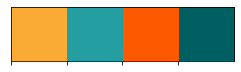

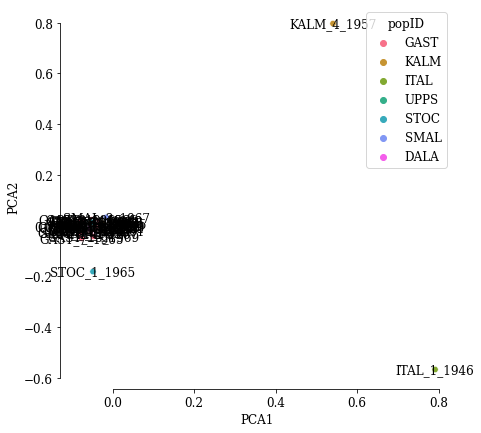

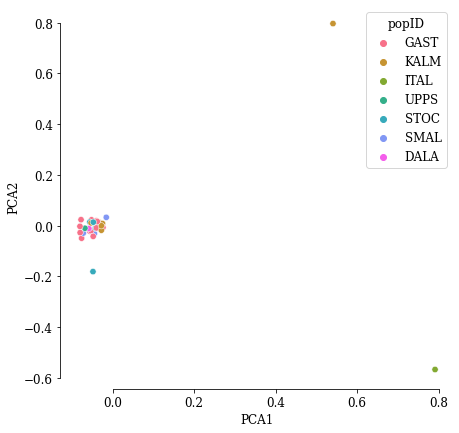

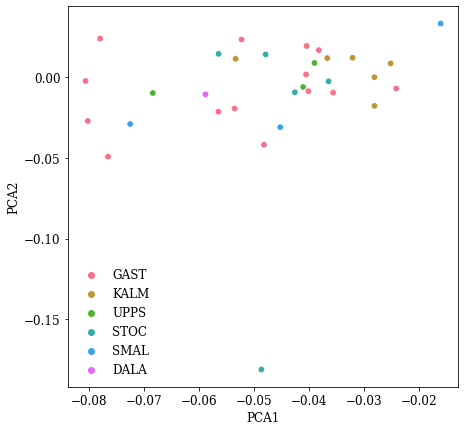

In [49]:
#print(df['loc'])
#eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
#split_eigval = eigval.split('\n')
#print(split_eigval[2])


flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
sns.despine(offset=2, trim=True)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
#sns.despine(offset=2, trim=True)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()


filtered_df = df.drop([5, 24])

# Plot the scatter plot
sns.scatterplot(x=filtered_df['PCA1'], y=filtered_df['PCA2'], hue=filtered_df['popID'], s=40)

# Add labels to each dot
#for i in range(len(filtered_df)):
#    plt.text(filtered_df['PCA1'].iloc[i], filtered_df['PCA2'].iloc[i], filtered_df['ID'].iloc[i], ha='center', va='center')

# Adjust plot aesthetics
#sns.despine(offset=2, trim=True)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)

plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()
##df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
##data=df[df["alpha"] == 1]
##sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
##plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
#plt.show()





#df

#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)

#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

In [43]:
filtered_df = df.drop([5, 24])
filtered_df

FullID      PCA1      PCA2      PCA3      PCA4  \
0     GAST_7_1965_GAST_7_1965 -0.076568 -0.049429 -0.037776 -0.071212   
1     KALM_2_1955_KALM_2_1955 -0.032070  0.011742 -0.053602  0.108455   
2   GAST_10_1965_GAST_10_1965 -0.052269  0.023025 -0.018199 -0.036101   
3     GAST_8_1965_GAST_8_1965 -0.077998  0.023599  0.101821 -0.677222   
4     KALM_5_1961_KALM_5_1961 -0.036677  0.011519 -0.058748  0.136051   
6   GAST_11_1965_GAST_11_1965 -0.040547  0.001457 -0.054425  0.111565   
7     UPPS_3_1969_UPPS_3_1969 -0.039020  0.008526 -0.059028  0.090803   
8     GAST_1_1941_GAST_1_1941 -0.056492 -0.021607 -0.056299 -0.047870   
9     UPPS_2_1958_UPPS_2_1958 -0.041084 -0.006334 -0.074577  0.140883   
10    STOC_4_1965_STOC_4_1965 -0.036436 -0.002821 -0.048249  0.029452   
11    SMAL_2_1967_SMAL_2_1967 -0.016057  0.032875 -0.052801  0.107602   
12    KALM_3_1955_KALM_3_1955 -0.025160  0.008279 -0.046341  0.113113   
13  GAST_12_1969_GAST_12_1969 -0.035615 -0.009818 -0.049690  0.081429   
14    SMAL_1_1967_SMAL_1_1967 -0.072542 -0.029230  0.014275 -0.102885   
15    SMAL_3_1967_SMAL_3_1967 -0.045247 -0.031154 -0.036624  0.059205   
16    GAST_2_1941_GAST_2_1941 -0.053530 -0.019622 -0.016450 -0.069534   
17    STOC_3_1965_STOC_3_1965 -0.056454  0.014169  0.107066 -0.339204   
18    STOC_5_1965_STOC_5_1965 -0.042576 -0.009588 -0.030922  0.082709   
19    GAST_3_1941_GAST_3_1941 -0.024154 -0.007252 -0.066713  0.104394   
20    DALA_1_1965_DALA_1_1965 -0.058834 -0.010836 -0.095159 -0.027454   
21  GAST_13_1969_GAST_13_1969 -0.048190 -0.042055 -0.009513 -0.352729   
22    KALM_7_1961_KALM_7_1961 -0.053354  0.011117 -0.020046 -0.170742   
23    UPPS_1_1951_UPPS_1_1951 -0.068425 -0.010066  0.031466 -0.106759   
25  GAST_14_1969_GAST_14_1969 -0.040444  0.019017 -0.069081  0.100118   
26    GAST_5_1943_GAST_5_1943 -0.040141 -0.008897 -0.087697  0.090192   
27    KALM_6_1961_KALM_6_1961 -0.028101 -0.018003 -0.082298  0.010430   
28    KALM_8_1969_KALM_8_1969 -0.028108 -0.000265 -0.059959  0.125413   
29    GAST_4_1941_GAST_4_1941 -0.038212  0.016476 -0.039216  0.137757   
30    GAST_6_1965_GAST_6_1965 -0.080643 -0.002619 -0.060472  0.112005   
31    STOC_2_1965_STOC_2_1965 -0.047891  0.013812 -0.063530  0.036025   
32    GAST_9_1965_GAST_9_1965 -0.080232 -0.027351  0.067257  0.003751   
33    STOC_1_1965_STOC_1_1965 -0.048666 -0.180978  0.928689  0.205182   

        PCA5      PCA6      PCA7      PCA8      PCA9            ID popID  
0   0.140711 -0.257551  0.053043  0.227008 -0.104466   GAST_7_1965  GAST  
1  -0.060299  0.021081  0.019708  0.013952 -0.043981   KALM_2_1955  KALM  
2   0.349492 -0.052437  0.569462 -0.299808  0.504647  GAST_10_1965  GAST  
3  -0.570747  0.018692  0.210924  0.234400  0.158962   GAST_8_1965  GAST  
4  -0.022237 -0.024968  0.026921  0.023759 -0.071439   KALM_5_1961  KALM  
6  -0.023724  0.010717 -0.033073  0.031640 -0.004550  GAST_11_1965  GAST  
7  -0.076344  0.029525  0.050102  0.043708 -0.068638   UPPS_3_1969  UPPS  
8   0.005242  0.079642 -0.119471  0.000352  0.063159   GAST_1_1941  GAST  
9  -0.052179  0.040729  0.057690  0.051924 -0.024270   UPPS_2_1958  UPPS  
10 -0.008278 -0.071909 -0.000307 -0.039515  0.009504   STOC_4_1965  STOC  
11 -0.021520  0.026619  0.047431  0.029183 -0.074118   SMAL_2_1967  SMAL  
12  0.022463  0.021512  0.047200  0.043367 -0.049135   KALM_3_1955  KALM  
13 -0.077197 -0.056554  0.025583  0.035470 -0.072700  GAST_12_1969  GAST  
14 -0.024599 -0.017451 -0.437584 -0.428142  0.481996   SMAL_1_1967  SMAL  
15 -0.119631 -0.010144 -0.000661  0.037439  0.020482   SMAL_3_1967  SMAL  
16  0.084903  0.211457  0.268461  0.058631 -0.152650   GAST_2_1941  GAST  
17  0.370203 -0.616261  0.038489 -0.071847 -0.282956   STOC_3_1965  STOC  
18  0.006988 -0.005171  0.061164 -0.019463 -0.024675   STOC_5_1965  STOC  
19 -0.006044  0.046248  0.088710  0.040808  0.019564   GAST_3_1941  GAST  
20  0.000653 -0.050037 -0.011152 -0.048411  0.025078   DALA_1_1965  DALA  
21  0.475425  0.615552 -0.126048  0.07

In [59]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.all.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))
df["year"] = df.iloc[:, 0].apply(lambda x: ''.join(x.split('_')[2]))
df

df.to_csv('/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.all.meta.csv', index=False)

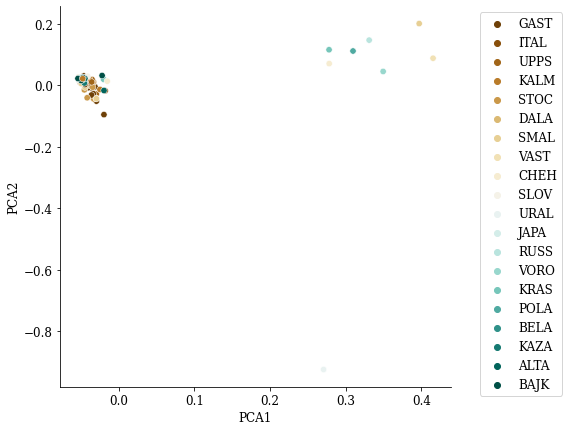

In [92]:
# Plot scatterplot with the custom palette
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette=palette)
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=8)

# Adjust plot aesthetics
sns.despine()
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

#plt.scatter(df['PCA1'], df['PCA2'], c=df['popID'], s=40, cmap='magma')

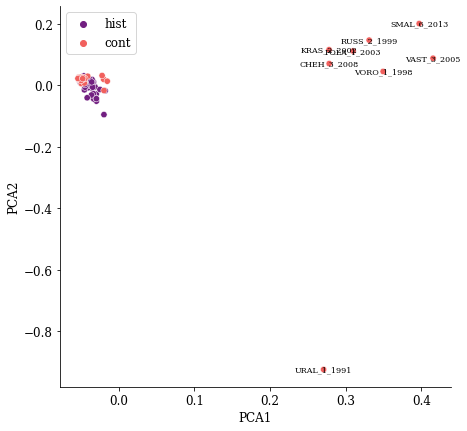

In [70]:
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['time'], s=40,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=True)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
for i in range(len(df)):
    if df['PCA1'][i] > 0.2:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=8)


# Adjust plot aesthetics
sns.despine() #(offset=2, trim=True) #plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

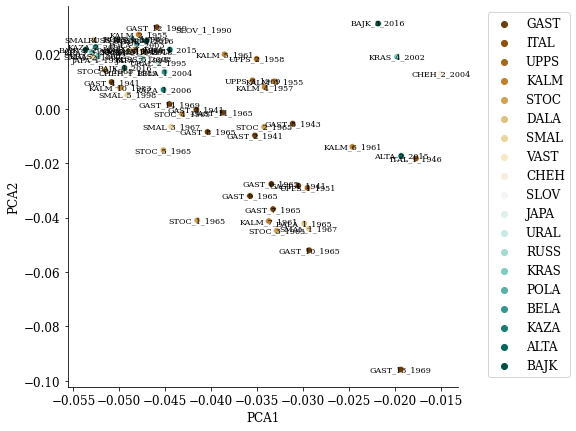

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[df['PCA1'] < 0.2]

sns.scatterplot(x=filtered_df['PCA1'], y=filtered_df['PCA2'], hue=filtered_df['popID'], s=40, palette="BrBG")
sns.despine()
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
for i in range(len(df)):
    if df['PCA1'][i] < 0.2:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=8)
#plt.legend(frameon=True)
plt.show()



### Contemporary only freebayes call


In [3]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp.PCA.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

FullID      PCA1      PCA2      PCA3      PCA4  \
0     SMAL_4_1996_SMAL_4_1996 -0.085182 -0.006093 -0.001303  0.010554   
1     KAZA_1_2006_KAZA_1_2006 -0.075742 -0.008960 -0.002688  0.013381   
2     POLA_2_2003_POLA_2_2003 -0.083855 -0.006312 -0.001895  0.010599   
3     KRAS_4_2002_KRAS_4_2002 -0.073198 -0.002247 -0.000557  0.007588   
4     RUSS_3_1999_RUSS_3_1999 -0.085457 -0.004465 -0.002245  0.008148   
5     KALM_9_1981_KALM_9_1981 -0.082904 -0.007120 -0.002398  0.011128   
6     RUSS_4_2008_RUSS_4_2008 -0.082286 -0.005134 -0.001633  0.009124   
7     RUSS_1_1998_RUSS_1_1998 -0.083040 -0.005794 -0.000699  0.010417   
8     BELA_1_2004_BELA_1_2004 -0.082426 -0.006182 -0.003314  0.008503   
9     RUSS_5_2008_RUSS_5_2008 -0.079035 -0.007095 -0.005329  0.011129   
10    KAZA_2_2006_KAZA_2_2006 -0.083663 -0.005527 -0.000670  0.008919   
11    URAL_2_1995_URAL_2_1995 -0.071427 -0.009467 -0.000375  0.008929   
12    URAL_1_1991_URAL_1_1991  0.397781 -0.902446 -0.014342  0.005776   
13    KALM_1_2018_KALM_1_2018 -0.075699 -0.006618  0.000296  0.012098   
14  KALM_10_1983_KALM_10_1983 -0.082959 -0.005109 -0.002904  0.011846   
15    VAST_3_2005_VAST_3_2005  0.386063  0.196593  0.521844  0.708359   
16    CHEH_1_1989_CHEH_1_1989 -0.085391 -0.005423 -0.002115  0.009978   
17    BAJK_3_2016_BAJK_3_2016 -0.065764 -0.011070 -0.004685  0.008393   
18    JAPA_2_1994_JAPA_2_1994 -0.085575 -0.006024 -0.004092  0.009019   
19    VORO_1_1998_VORO_1_1998  0.309977  0.160771  0.096582 -0.377391   
20    SMAL_5_1998_SMAL_5_1998 -0.077021 -0.010753 -0.003075  0.011748   
21    RUSS_2_1999_RUSS_2_1999  0.269997  0.150702  0.074018 -0.236194   
22    KRAS_2_2002_KRAS_2_2002  0.233238  0.115327  0.018546 -0.082648   
23    ALTA_2_2015_ALTA_2_2015 -0.058803 -0.017784 -0.003836  0.009226   
24    SLOV_1_1990_SLOV_1_1990 -0.085102 -0.005423 -0.003289  0.010683   
25    POLA_1_2003_POLA_1_2003  0.251090  0.136157  0.098447 -0.338256   
26    JAPA_1_1994_JAPA_1_1994 -0.086179 -0.004453 -0.001770  0.008082   
27    ALTA_1_2015_ALTA_1_2015 -0.078485 -0.008464 -0.003387  0.007752   
28    CHEH_3_2008_CHEH_3_2008  0.259918  0.145239  0.108748 -0.293720   
29    KRAS_1_2002_KRAS_1_2002 -0.083355 -0.004928 -0.003458  0.011973   
30    SMAL_6_2013_SMAL_6_2013  0.371511  0.209468 -0.831013  0.298585   
31    STOC_6_1965_STOC_6_1965 -0.083549 -0.005545 -0.003657  0.009797   
32    CHEH_2_2004_CHEH_2_2004 -0.075449 -0.003784  0.000093  0.008314   
33    VAST_2_1999_VAST_2_1999 -0.082377 -0.004062 -0.001471  0.011005   
34    BAJK_1_2016_BAJK_1_2016 -0.081204 -0.005493 -0.001317  0.009611   
35    BAJK_2_2016_BAJK_2_2016 -0.081178 -0.005147 -0.001837  0.014942   
36    BAJK_4_2016_BAJK_4_2016 -0.082057 -0.006881 -0.002758  0.012672   
37    VAST_1_1983_VAST_1_1983 -0.083013 -0.007081 -0.002663  0.010616   
38    KRAS_3_2002_KRAS_3_2002 -0.085818 -0.004626 -0.002729  0.009711   

        PCA5      PCA6      PCA7      PCA8      PCA9            ID popID  
0  -0.001963 -0.003571  0.005044 -0.005262  0.028512   SMAL_4_1996  SMAL  
1  -0.001407 -0.000051 -0.000992 -0.005715  0.064680   KAZA_1_2006  KAZA  
2  -0.001034 -0.001805  0.005543 -0.003511  0.033334   POLA_2_2003  POLA  
3  -0.004807 -0.002151 -0.000450 -0.003951  0.016120   KRAS_4_2002  KRAS  
4  -0.003112 -0.002966  0.004992 -0.002380  0.033284   RUSS_3_1999  RUSS  
5  -0.003656 -0.000620  0.004600 -0.002340  0.034106   KALM_9_1981  KALM  
6  -0.002692  0.000656  0.005238 -0.005533  0.032854   RUSS_4_2008  RUSS  
7  -0.001466 -0.003350  0.005376 -0.002253  0.029518   RUSS_1_1998  RUSS  
8  -0.002042  0.001940  0.002845 -0.001445  0.026943   BELA_1_2004  BELA  
9  -0.001969 -0.000770  0.006558 -0.006750  0.042381   RUSS_5_2008  RUSS  
10 -0.002697 -0.001856  0.004364 -0.002966  0.037265   KAZA_2_2006  KAZA  
11 -0.001482  0.000971  0.001698 -0.007240  0.078830   URAL_2_1995  URAL  
12  0.003468  0.002818  0.001739 -0.014885  0.019797   URAL_1_1991  URAL  
13  0.001389 -0.005466  0.004751 -0.006196  0.057696

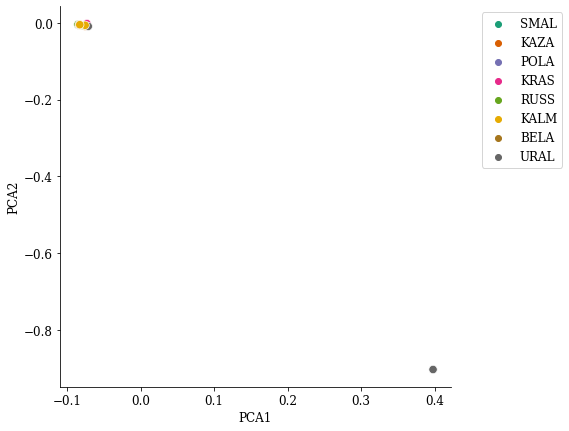

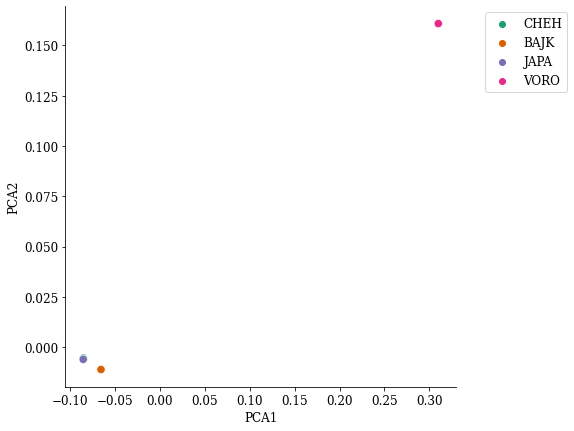

In [18]:
# Plot scatterplot with the custom palette
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette=palette)
sns.scatterplot(x=df['PCA1'][0:15], y=df['PCA2'][0:15], hue=df['popID'][0:15], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()
#plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

#plt.scatter(df['PCA1'], df['PCA2'], c=df['popID'], s=40, cmap='magma')

# Plot scatterplot with the custom palette
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette=palette)
sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()
#plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

### Contemporary reduced set call with mpileup

### No pruning

In [9]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp.reduced.noprune.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0  URAL_2_1995_URAL_2_1995  0.118951  0.007918  0.273857 -0.115483  0.003557   
1  RUSS_4_2008_RUSS_4_2008  0.157938  0.057527 -0.356124 -0.094191  0.041531   
2  JAPA_1_1994_JAPA_1_1994  0.167099  0.063977 -0.279391 -0.033481  0.045643   
3  CHEH_1_1989_CHEH_1_1989  0.152715  0.041291  0.562081 -0.619793 -0.159944   
4  KRAS_2_2002_KRAS_2_2002 -0.397926 -0.858931 -0.044048 -0.008355 -0.001944   
5  RUSS_1_1998_RUSS_1_1998  0.146125  0.041848  0.148953  0.582253 -0.708965   
6  URAL_1_1991_URAL_1_1991 -0.810656  0.492663 -0.003029 -0.003390  0.000817   
7  STOC_6_1965_STOC_6_1965  0.149802  0.048637 -0.272483 -0.069493  0.047463   
8  VAST_1_1983_VAST_1_1983  0.143001  0.033632  0.375832  0.483539  0.680494   
9  SMAL_4_1996_SMAL_4_1996  0.172951  0.071437 -0.405648 -0.121607  0.051350   

       PCA6      PCA7      PCA8      PCA9     PCA10           ID popID  
0 -0.889874 -0.048416  0.052678  0.021120 -0.316228  URAL_2_1995  URAL  
1  0.015578  0.356973  0.263583 -0.732923 -0.316228  RUSS_4_2008  RUSS  
2  0.116745 -0.829279  0.291272  0.023443 -0.316228  JAPA_1_1994  JAPA  
3  0.384365  0.038673  0.008995  0.000306 -0.316228  CHEH_1_1989  CHEH  
4  0.040083 -0.000449  0.012508  0.010771 -0.316228  KRAS_2_2002  KRAS  
5  0.097406  0.057117  0.006831  0.016182 -0.316228  RUSS_1_1998  RUSS  
6  0.008282 -0.000848  0.004082  0.003605 -0.316228  URAL_1_1991  URAL  
7  0.008104 -0.060041 -0.888353 -0.031995 -0.316228  STOC_6_1965  STOC  
8  0.184615  0.075907  0.017933  0.011042 -0.316228  VAST_1_1983  VAST  
9  0.034697  0.410362  0.230470  0.678448 -0.316228  SMAL_4_1996  SMAL

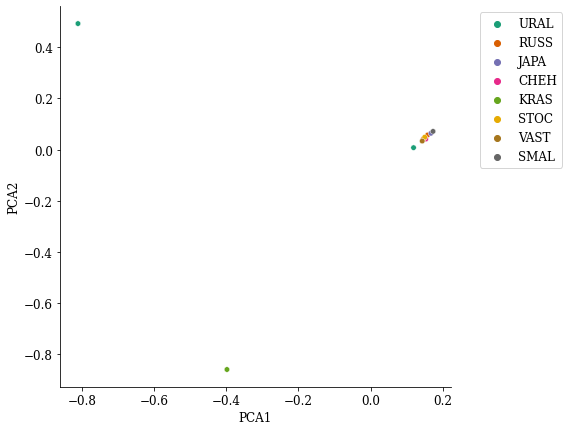

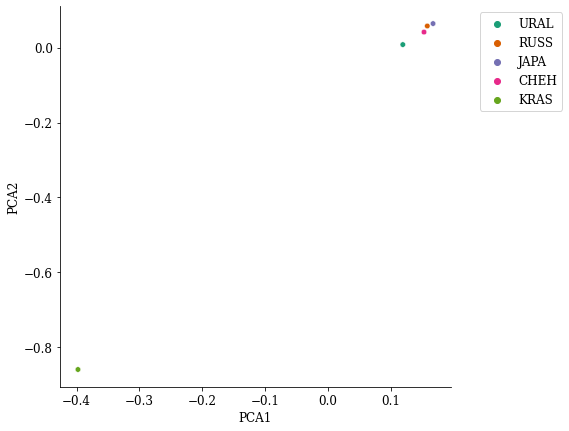

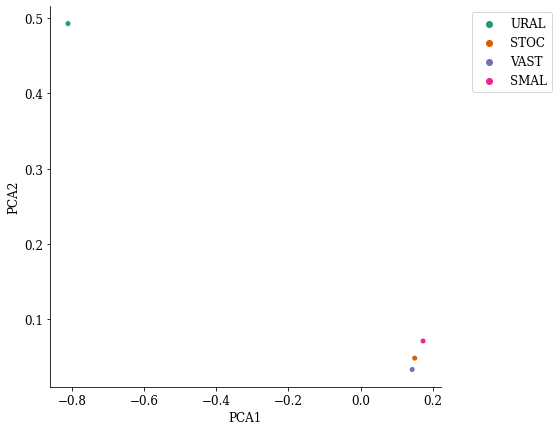

In [21]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'][0:5], y=df['PCA2'][0:5], hue=df['popID'][0:5], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'][6:10], y=df['PCA2'][6:10], hue=df['popID'][6:10], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

### LD pruned

In [7]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp.reduced.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0  URAL_2_1995_URAL_2_1995  0.010492  0.415741 -0.423697  0.201229  0.021331   
1  RUSS_4_2008_RUSS_4_2008  0.265265 -0.352533 -0.102796  0.159539 -0.381180   
2  JAPA_1_1994_JAPA_1_1994  0.238994 -0.165673  0.104963 -0.309004  0.675922   
3  CHEH_1_1989_CHEH_1_1989  0.052799  0.450649 -0.394323  0.182145  0.143682   
4  KRAS_2_2002_KRAS_2_2002 -0.584356 -0.176321  0.005273 -0.038680  0.012924   
5  RUSS_1_1998_RUSS_1_1998  0.076506  0.236443  0.750414  0.518492  0.044881   
6  URAL_1_1991_URAL_1_1991 -0.623089 -0.193082 -0.010606  0.011242 -0.003506   
7  STOC_6_1965_STOC_6_1965  0.221050 -0.246261 -0.056664 -0.147486  0.263551   
8  VAST_1_1983_VAST_1_1983  0.055860  0.394297  0.249210 -0.704939 -0.425837   
9  SMAL_4_1996_SMAL_4_1996  0.286479 -0.363260 -0.121774  0.127462 -0.351769   

       PCA6      PCA7      PCA8      PCA9     PCA10           ID popID  
0  0.709295 -0.057400  0.000366  0.013703 -0.316228  URAL_2_1995  URAL  
1 -0.037389 -0.213215 -0.001656 -0.690779 -0.316228  RUSS_4_2008  RUSS  
2  0.042002 -0.499083 -0.032347  0.012972 -0.316228  JAPA_1_1994  JAPA  
3 -0.695988  0.015593  0.007739 -0.010644 -0.316228  CHEH_1_1989  CHEH  
4 -0.017820 -0.026791  0.724370  0.000998 -0.316228  KRAS_2_2002  KRAS  
5  0.023475  0.058184  0.005349  0.017546 -0.316228  RUSS_1_1998  RUSS  
6 -0.028376 -0.005270 -0.687875  0.014951 -0.316228  URAL_1_1991  URAL  
7  0.068618  0.828088  0.000582 -0.075046 -0.316228  STOC_6_1965  STOC  
8 -0.010447  0.009306 -0.028780 -0.002162 -0.316228  VAST_1_1983  VAST  
9 -0.053368 -0.109412  0.012251  0.718461 -0.316228  SMAL_4_1996  SMAL

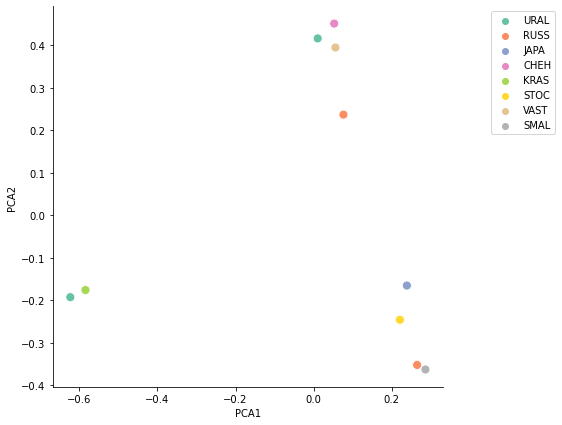

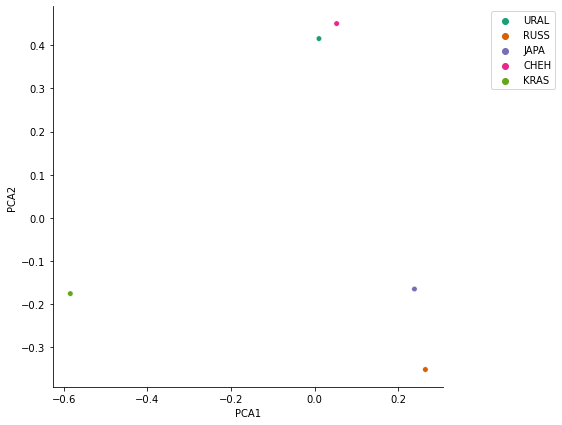

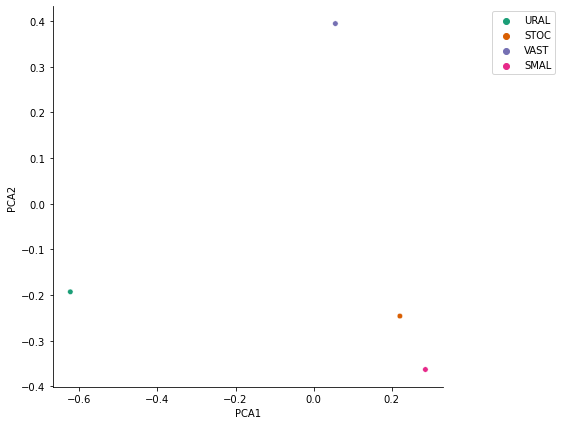

In [8]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=80,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'][0:5], y=df['PCA2'][0:5], hue=df['popID'][0:5], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'][6:10], y=df['PCA2'][6:10], hue=df['popID'][6:10], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

### Testing m caller in mpile up

In [1]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp_mcalling.reduced.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0  URAL_2_1995_URAL_2_1995 -0.003274  0.476334  0.493703 -0.266262  0.233774   
1  RUSS_4_2008_RUSS_4_2008  0.296616 -0.345327  0.112614 -0.339588 -0.340228   
2  JAPA_1_1994_JAPA_1_1994  0.232250 -0.134003 -0.063535  0.377880  0.304051   
3  CHEH_1_1989_CHEH_1_1989  0.019311  0.426067  0.265329 -0.022641  0.010728   
4  KRAS_2_2002_KRAS_2_2002 -0.591438 -0.227938  0.018024  0.017814 -0.003108   
5  RUSS_1_1998_RUSS_1_1998  0.052004  0.220368 -0.771492 -0.421532  0.265501   
6  URAL_1_1991_URAL_1_1991 -0.593731 -0.221442  0.021539 -0.004924  0.002339   
7  STOC_6_1965_STOC_6_1965  0.253895 -0.238924  0.050177  0.429751  0.432601   
8  VAST_1_1983_VAST_1_1983  0.020928  0.371940 -0.240194  0.489590 -0.637712   
9  SMAL_4_1996_SMAL_4_1996  0.296268 -0.330737  0.113755 -0.260891 -0.269640   

       PCA6      PCA7      PCA8      PCA9     PCA10           ID popID  
0  0.531604 -0.143315  0.001071  0.009461 -0.317136  URAL_2_1995  URAL  
1 -0.002256 -0.035322  0.023557 -0.667055 -0.319750  RUSS_4_2008  RUSS  
2 -0.155658 -0.750786  0.018150  0.007376 -0.317071  JAPA_1_1994  JAPA  
3 -0.779940  0.195432 -0.008355 -0.017411 -0.316535  CHEH_1_1989  CHEH  
4 -0.000075 -0.017946 -0.703003 -0.019717 -0.320419  KRAS_2_2002  KRAS  
5  0.020386  0.066947 -0.004299  0.006095 -0.316861  RUSS_1_1998  RUSS  
6 -0.012260  0.001286  0.709962  0.026831 -0.305017  URAL_1_1991  URAL  
7  0.169203  0.607158  0.005747 -0.074341 -0.318239  STOC_6_1965  STOC  
8  0.235756  0.033757  0.014221  0.001897 -0.316587  VAST_1_1983  VAST  
9 -0.008959  0.041895 -0.023046  0.740212 -0.314401  SMAL_4_1996  SMAL

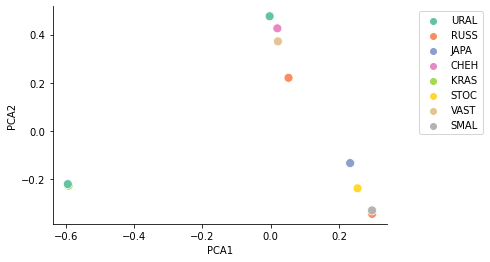

In [4]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=80,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

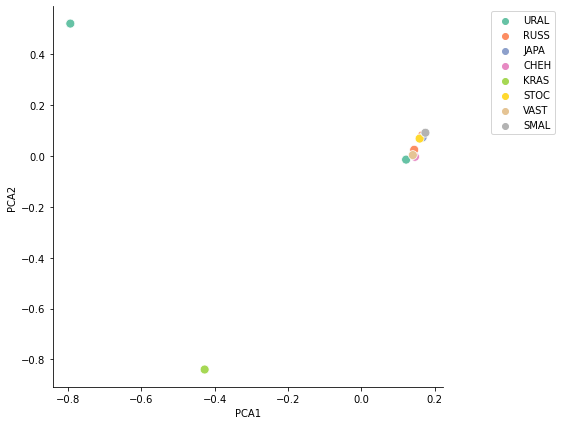

In [6]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp_mcalling.reduced.noprune.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=80,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

### Testing m caller in mpileup: full set, 15 chromosomes

#### Pruned

In [9]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp_mcalling.full.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0  URAL_2_1995_URAL_2_1995 -0.071007  0.411938  0.410990  0.160152  0.727239   
1  RUSS_4_2008_RUSS_4_2008 -0.208758 -0.342859  0.081935 -0.035032  0.006561   
2  JAPA_1_1994_JAPA_1_1994 -0.215986 -0.301336  0.035752 -0.034800 -0.028366   
3  CHEH_1_1989_CHEH_1_1989 -0.100899  0.460356  0.421275  0.174858 -0.684840   
4  KRAS_2_2002_KRAS_2_2002  0.589895 -0.094897  0.002590 -0.001235 -0.000342   
5  RUSS_1_1998_RUSS_1_1998 -0.125667  0.206678 -0.715622  0.571251  0.010852   
6  URAL_1_1991_URAL_1_1991  0.659065 -0.106719 -0.006486 -0.003312 -0.032035   
7  STOC_6_1965_STOC_6_1965 -0.198808 -0.279215  0.040458 -0.016277  0.004687   
8  VAST_1_1983_VAST_1_1983 -0.100432  0.387002 -0.353296 -0.783387  0.005093   
9  SMAL_4_1996_SMAL_4_1996 -0.216335 -0.345227  0.083696 -0.032224 -0.008801   

       PCA6      PCA7      PCA8      PCA9     PCA10           ID popID  
0  0.008707  0.027811 -0.024078  0.006127 -0.316797  URAL_2_1995  URAL  
1 -0.419982 -0.001436 -0.063148 -0.741802 -0.316606  RUSS_4_2008  RUSS  
2  0.678541  0.032804 -0.545383  0.002776 -0.316716  JAPA_1_1994  JAPA  
3 -0.014851 -0.003164  0.003087 -0.008692 -0.317052  CHEH_1_1989  CHEH  
4  0.012174 -0.736443 -0.026642  0.009767 -0.315767  KRAS_2_2002  KRAS  
5 -0.043795  0.005128 -0.018335 -0.004345 -0.317227  RUSS_1_1998  RUSS  
6 -0.005332  0.674865  0.014651 -0.003278 -0.312198  URAL_1_1991  URAL  
7  0.321197 -0.010767  0.819582  0.073753 -0.316471  STOC_6_1965  STOC  
8 -0.030661  0.005310 -0.001096  0.000249 -0.317230  VAST_1_1983  VAST  
9 -0.506655  0.013305 -0.158130  0.666367 -0.316182  SMAL_4_1996  SMAL

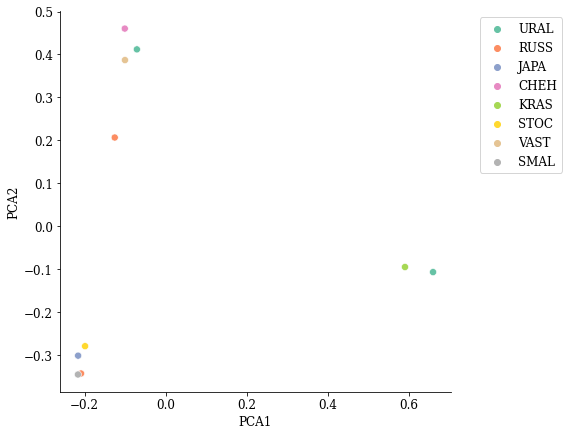

In [10]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

In [11]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp_mcalling.full.noprune.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0  URAL_2_1995_URAL_2_1995  0.121927  0.036288  0.335716 -0.205957 -0.000626   
1  RUSS_4_2008_RUSS_4_2008  0.162313 -0.089349 -0.323903 -0.066889  0.063730   
2  JAPA_1_1994_JAPA_1_1994  0.174379 -0.102204 -0.335082 -0.052736  0.062000   
3  CHEH_1_1989_CHEH_1_1989  0.145936  0.029729  0.521868 -0.602680 -0.012774   
4  KRAS_2_2002_KRAS_2_2002 -0.435014  0.828541 -0.153469 -0.005539  0.004518   
5  RUSS_1_1998_RUSS_1_1998  0.144070 -0.012433  0.158990  0.435966 -0.807300   
6  URAL_1_1991_URAL_1_1991 -0.789139 -0.524547  0.053417 -0.002216  0.000729   
7  STOC_6_1965_STOC_6_1965  0.157034 -0.076495 -0.262602 -0.040527  0.036018   
8  VAST_1_1983_VAST_1_1983  0.139661  0.017385  0.373255  0.623196  0.577008   
9  SMAL_4_1996_SMAL_4_1996  0.173738 -0.106925 -0.371203 -0.083584  0.077079   

       PCA6      PCA7      PCA8      PCA9     PCA10           ID popID  
0  0.852247 -0.010339  0.045093 -0.013842 -0.316284  URAL_2_1995  URAL  
1 -0.009451  0.346757  0.024676  0.794580 -0.316111  RUSS_4_2008  RUSS  
2 -0.049965 -0.751868  0.414904 -0.004460 -0.316660  JAPA_1_1994  JAPA  
3 -0.491352  0.009230  0.008362  0.000302 -0.317025  CHEH_1_1989  CHEH  
4 -0.031747 -0.002764  0.011982 -0.006380 -0.315404  KRAS_2_2002  KRAS  
5 -0.097250  0.027371  0.036813 -0.004886 -0.316901  RUSS_1_1998  RUSS  
6 -0.003415 -0.001007  0.002535 -0.001254 -0.315009  URAL_1_1991  URAL  
7 -0.002277 -0.169856 -0.858484 -0.178906 -0.315804  STOC_6_1965  STOC  
8 -0.135199  0.020385  0.018682 -0.005436 -0.317000  VAST_1_1983  VAST  
9 -0.030017  0.533139  0.293759 -0.579938 -0.316073  SMAL_4_1996  SMAL

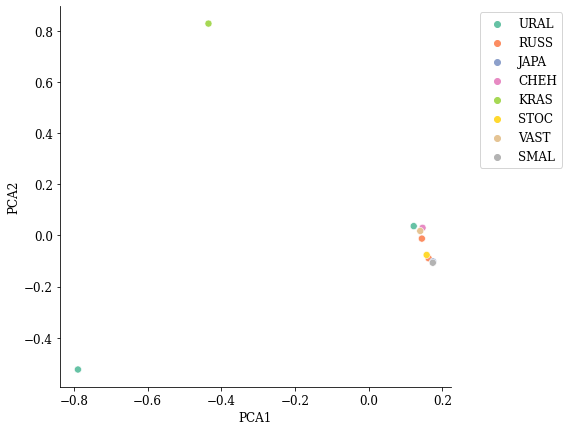

In [12]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

## Full call mpileup

### Miss3 filter set

#### Pruned

In [5]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

1         2         3         4         5         6  \
0   BAJK_1_2016_BAJK_1_2016 -0.058014 -0.007330 -0.041921  0.013289  0.007449   
1   KAZA_1_2006_KAZA_1_2006 -0.063427 -0.010419 -0.048217  0.013829  0.006722   
2   SLOV_1_1990_SLOV_1_1990 -0.053899 -0.030144  0.220447 -0.067302 -0.028743   
3   URAL_2_1995_URAL_2_1995 -0.054966 -0.033291  0.224375 -0.069328 -0.027227   
4   RUSS_4_2008_RUSS_4_2008 -0.075882 -0.015374 -0.033649  0.012485  0.008391   
..                      ...       ...       ...       ...       ...       ...   
68  KALM_4_1957_KALM_4_1957  0.402516 -0.696513 -0.223710 -0.534743  0.012630   
69  GAST_3_1941_GAST_3_1941 -0.069061 -0.008821 -0.086343  0.024920  0.010283   
70  ITAL_1_1946_ITAL_1_1946  0.248055 -0.160924  0.027193  0.341151 -0.060341   
71  GAST_5_1943_GAST_5_1943 -0.065267 -0.005327 -0.101521  0.025992  0.011848   
72  UPPS_2_1958_UPPS_2_1958 -0.064609 -0.008718 -0.076678  0.023002  0.010525   

           7         8         9        10  ...        14        15        16  \
0   0.018563  0.002942  0.053572  0.074127  ... -0.035851  0.053506  0.024554   
1   0.018345  0.006328  0.066927  0.084952  ... -0.044987  0.070236  0.030580   
2  -0.023837 -0.003827 -0.130944  0.058787  ...  0.014122  0.001371 -0.642555   
3  -0.019038 -0.006004 -0.226754  0.082296  ... -0.010420  0.008547  0.382949   
4   0.034180  0.009515  0.107362  0.134512  ... -0.065113  0.101007  0.042217   
..       ...       ...       ...       ...  ...       ...       ...       ...   
68  0.044031 -0.019483  0.003656  0.006867  ... -0.003475  0.001454 -0.000411   
69  0.014091  0.006542  0.003241  0.018075  ... -0.018274  0.029911  0.002299   
70 -0.872962 -0.007828  0.084751  0.047480  ... -0.010513  0.020828  0.009502   
71  0.000919  0.002670 -0.041785 -0.044170  ...  0.015458 -0.025671 -0.008692   
72  0.016528  0.008335  0.017375  0.061781  ... -0.038359  0.056679 -0.025449   

          17        18        19        20        21           ID  popID  
0   0.050651  0.010575  0.001013  0.007390  0.010494  BAJK_1_2016   BAJK  
1   0.056550  0.003396 -0.003762  0.005088  0.012213  KAZA_1_2006   KAZA  
2  -0.030471  0.310411  0.316232 -0.466921  0.056889  SLOV_1_1990   SLOV  
3   0.036045  0.028915  0.018291 -0.342218  0.010570  URAL_2_1995   URAL  
4   0.062527  0.002847 -0.017235 -0.005410  0.016270  RUSS_4_2008   RUSS  
..       ...       ...       ...       ...       ...          ...    ...  
68 -0.002661 -0.000498 -0.000714 -0.001081  0.000648  KALM_4_1957   KALM  
69 -0.037876 -0.005077 -0.034449 -0.012375 -0.010126  GAST_3_1941   GAST  
70 -0.006417 -0.004667 -0.004747 -0.006414 -0.005787  ITAL_1_1946   ITAL  
71 -0.037267 -0.015105  0.003984  0.009862 -0.010555  GAST_5_1943   GAST  
72  0.020580  0.037296  0.021567 -0.017351  0.019833  UPPS_2_1958   UPPS  

[73 rows x 23 columns]

In [8]:
# Set max display rows
pd.set_option('display.max_rows', None)

# Then print your column
print(df['ID'])

0      BAJK_1_2016
1      KAZA_1_2006
2      SLOV_1_1990
3      URAL_2_1995
4      RUSS_4_2008
5      JAPA_1_1994
6      CHEH_1_1989
7      KRAS_2_2002
8      RUSS_1_1998
9      URAL_1_1991
10     STOC_6_1965
11     VAST_1_1983
12     SMAL_4_1996
13     RUSS_3_1999
14     CHEH_3_2008
15     BAJK_2_2016
16     SMAL_5_1998
17     VAST_3_2005
18     ALTA_2_2015
19     JAPA_2_1994
20     KALM_9_1981
21     RUSS_2_1999
22     KRAS_3_2002
23     POLA_1_2003
24     KALM_1_2018
25     KRAS_4_2002
26     SMAL_6_2013
27     VORO_1_1998
28    KALM_10_1983
29     BAJK_3_2016
30     BAJK_4_2016
31     ALTA_1_2015
32     CHEH_2_2004
33     RUSS_5_2008
34     VAST_2_1999
35     POLA_2_2003
36     KRAS_1_2002
37     BELA_1_2004
38     KAZA_2_2006
39     GAST_6_1965
40     STOC_4_1965
41    GAST_14_1969
42     UPPS_1_1951
43     KALM_3_1955
44     GAST_4_1941
45     KALM_5_1961
46     GAST_2_1941
47     UPPS_3_1969
48     KALM_7_1961
49    GAST_10_1965
50     SMAL_2_1967
51     STOC_2_1965
52     GAST_

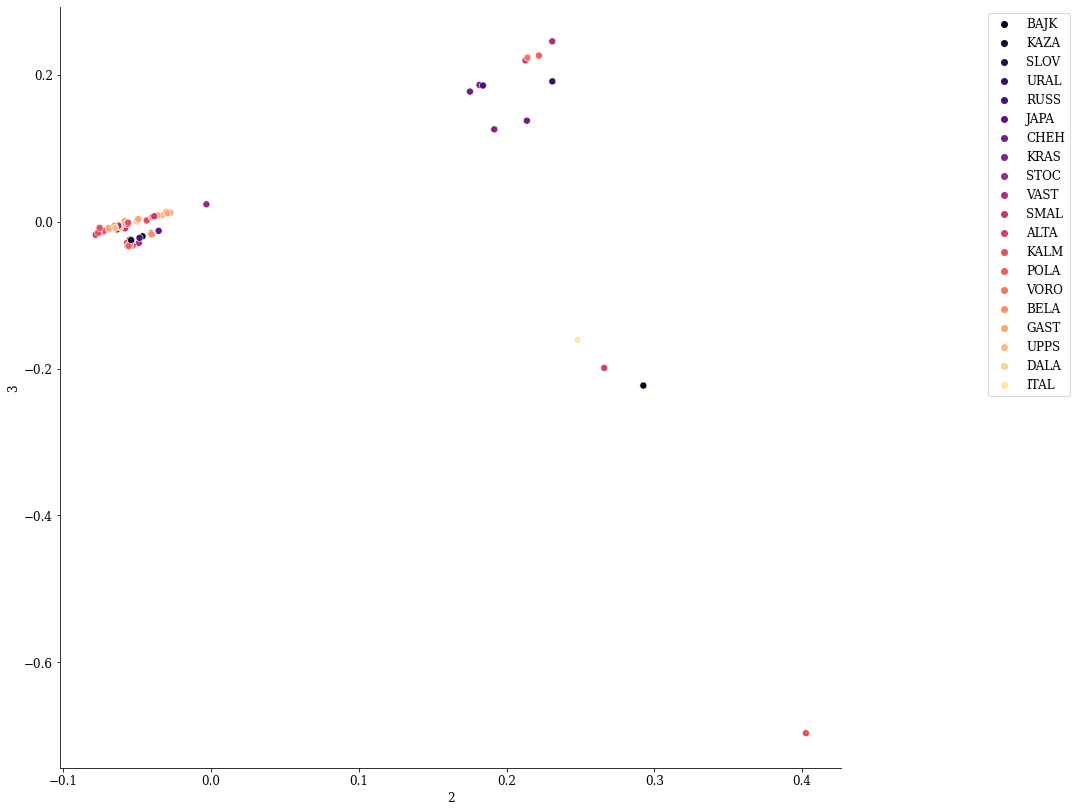

In [12]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=50,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

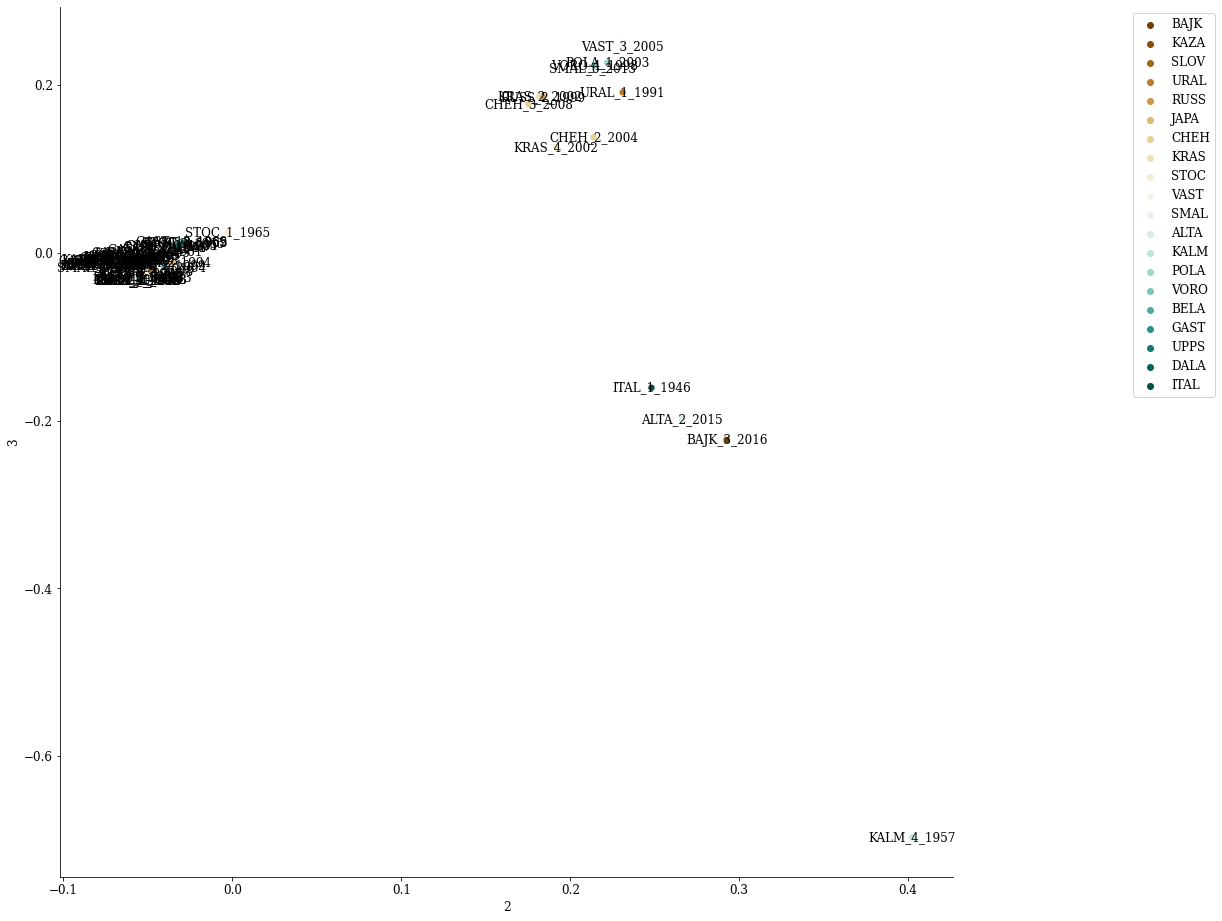

In [13]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=50,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

for i in range(len(df)):
    plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center')
    
plt.show()

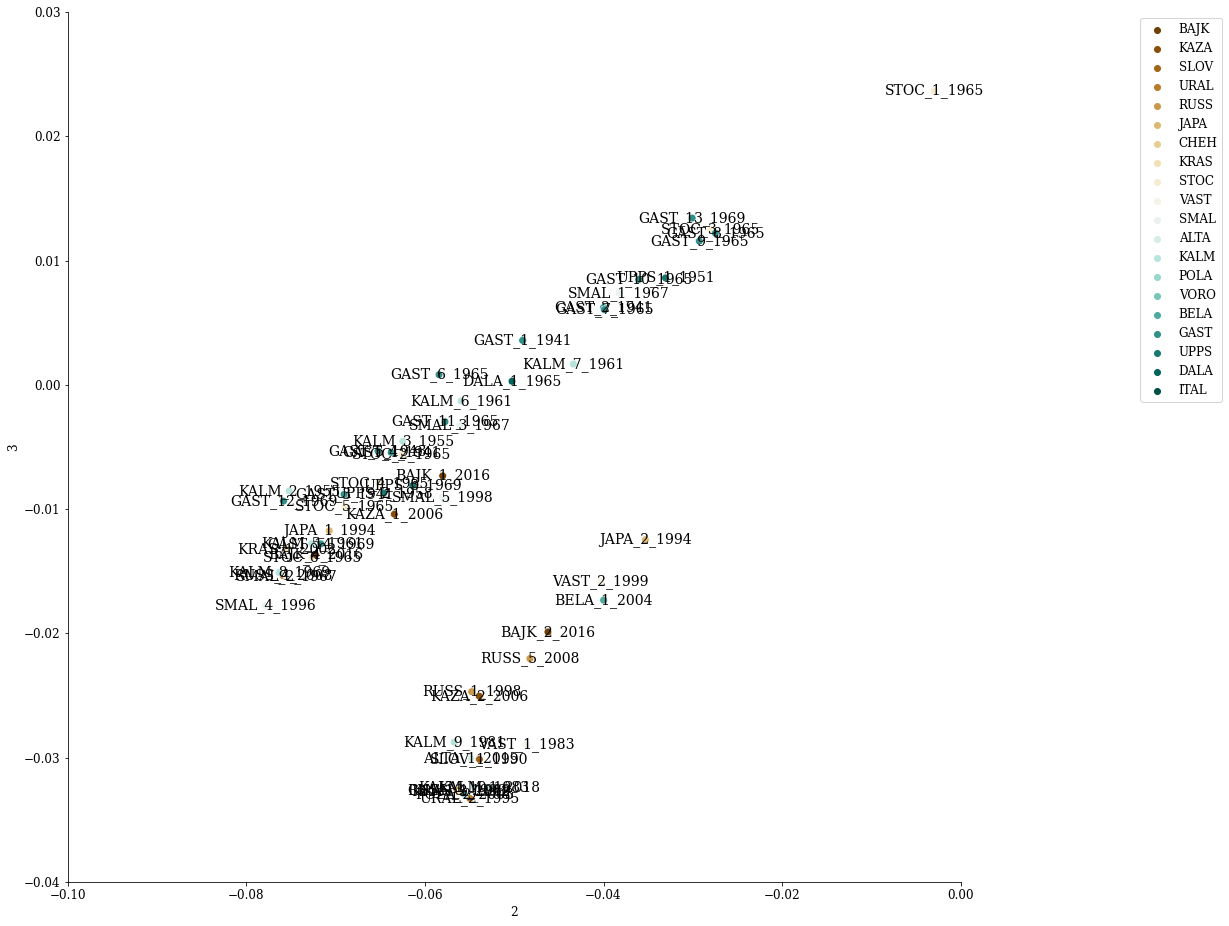

In [27]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=60,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)
for i in range(len(df)):
    if df[2][i] < 0.1:
        plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center', fontsize=14)
    
plt.show()

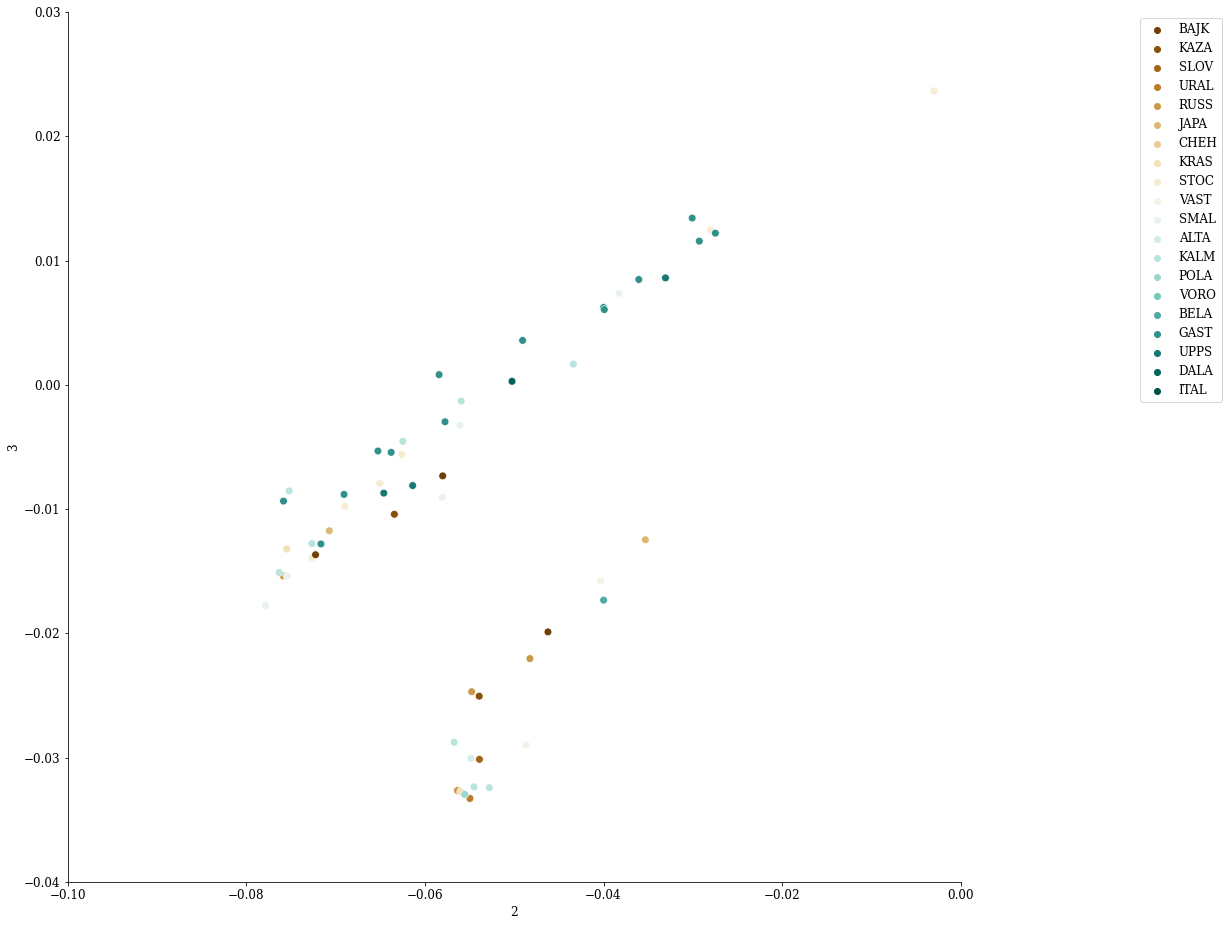

In [28]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=60,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)
#for i in range(len(df)):
#    if df[2][i] < 0.1:
#        plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center', fontsize=14)
    
plt.show()

In [4]:
import pandas as pd
import re

# Read the data from the file
#df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.autosomes.pruned.eigenvec", delimiter=' ', header=None)
df = pd.read_csv("/Users/dariashipilina/Documents/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.autosomes.pruned.eigenvec", delimiter=' ', header=None)
df

# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))


category_dict = {
'KAZA': 'EAST',
 'SLOV': 'WEST',
 'URAL': 'EAST',
 'RUSS': 'EAST',
 'BAJK': 'EAST',
 'JAPA': 'EAST',
 'CHEH': 'WEST',
 'KRAS': 'EAST',
 'STOC': 'SWEDEN',
 'VAST': 'SWEDEN',
 'SMAL': 'SWEDEN',
 'ALTA': 'EAST',
 'KALM': 'SWEDEN',
 'POLA': 'SWEDEN',
 'VORO': 'WEST',
 'BELA': 'WEST',
 'GAST': 'SWEDEN',
 'UPPS': 'SWEDEN',
 'DALA': 'SWEDEN',
 'ITAL': 'WEST'}

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})

# Categorization dictionary
age_dict = {
    '1940s': 'hist',
    '1950s': 'hist',
    '1960s': 'hist',
    '1980s': 'hist',
    '1990s': 'cont',
    '2000s': 'cont',
    '2010s': 'cont'
}

df['Age'] = df['Decade'].map(age_dict)


df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dariashipilina/Documents/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.autosomes.pruned.eigenvec'

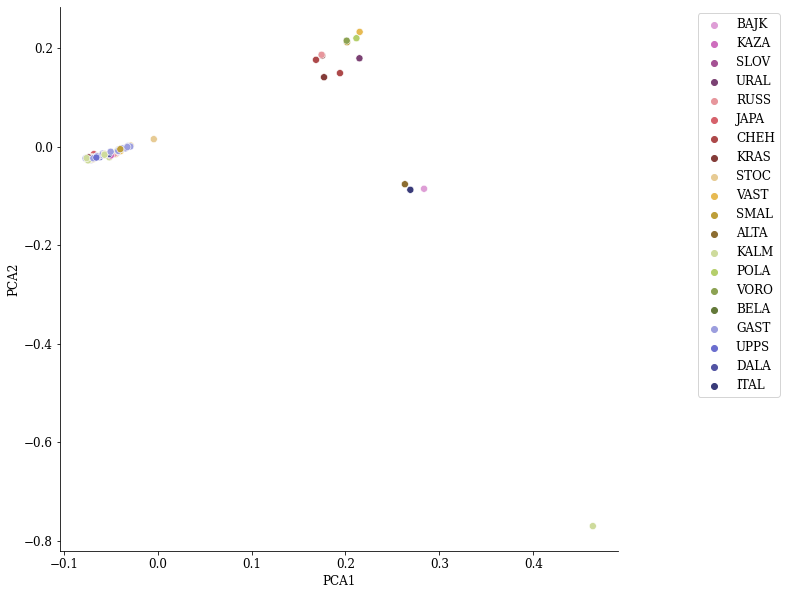

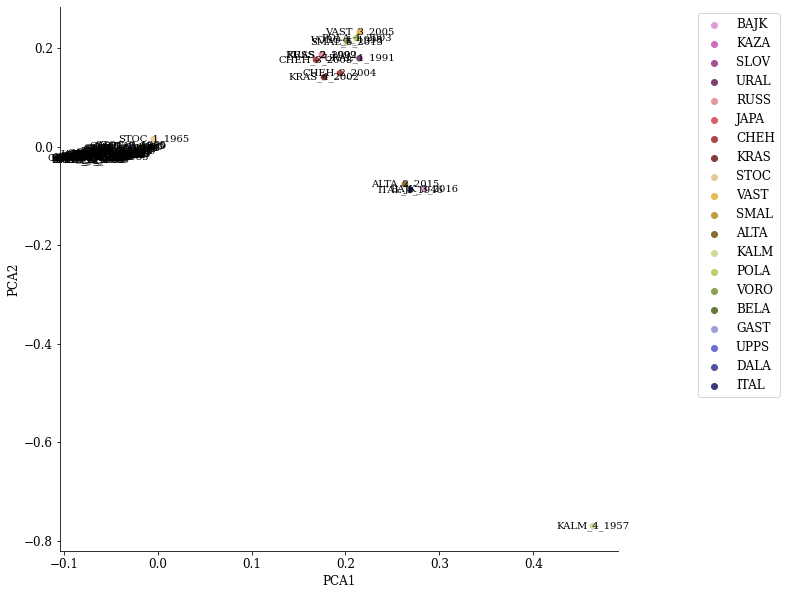

In [127]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50,palette="tab20b_r") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center',fontsize=10)


# Show the plot
plt.show()




# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50,palette="tab20b_r") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center',fontsize=10)


# Show the plot
plt.show()

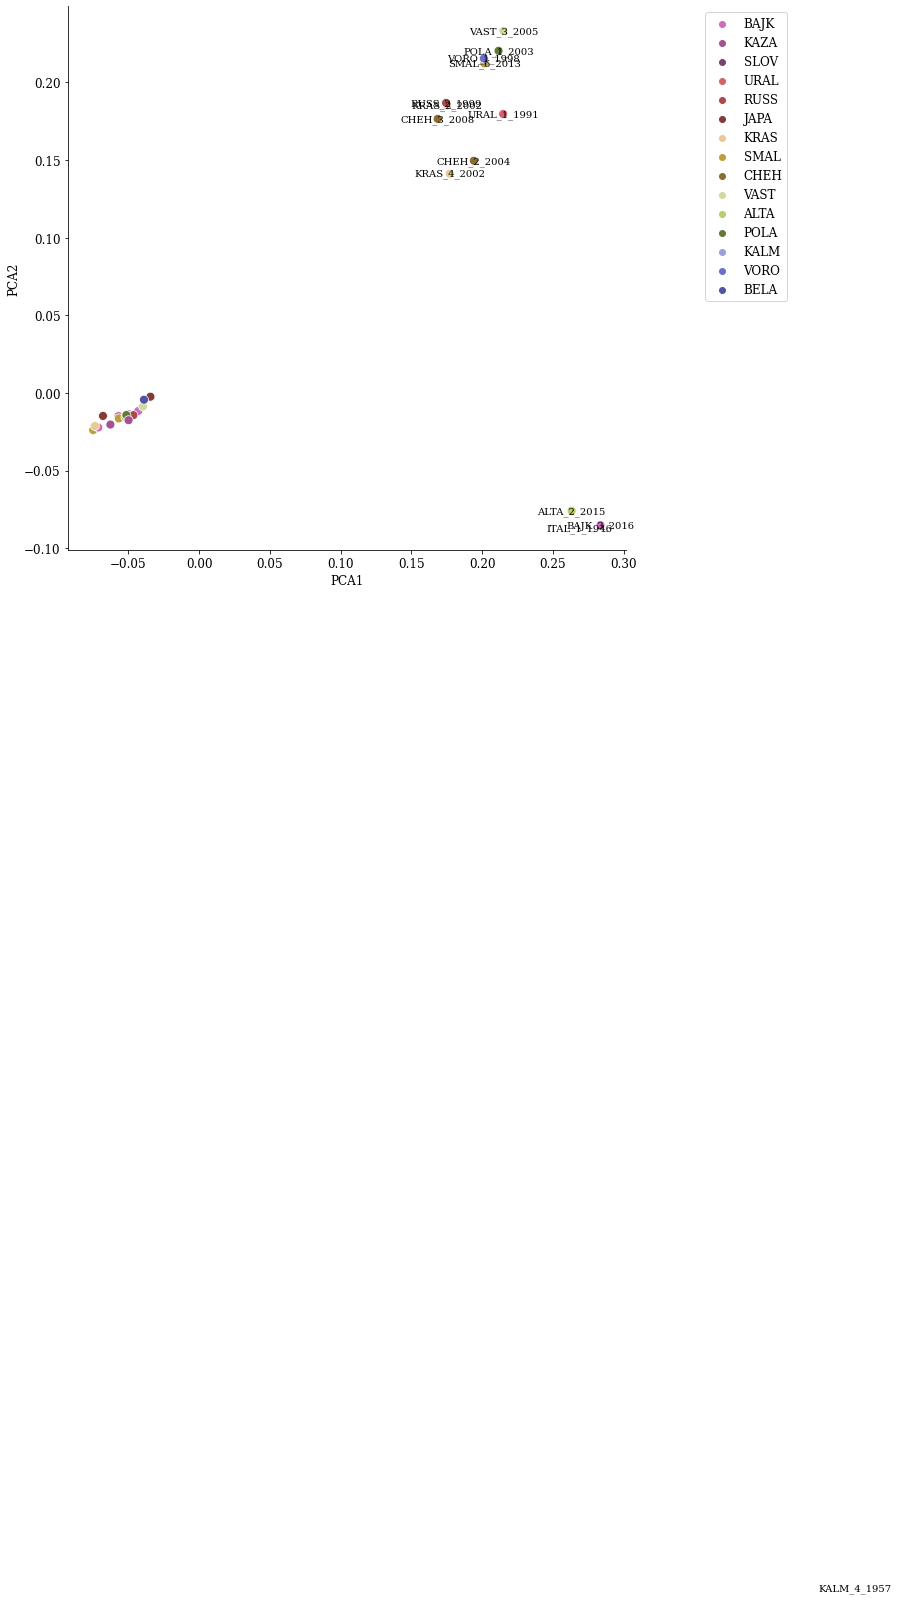

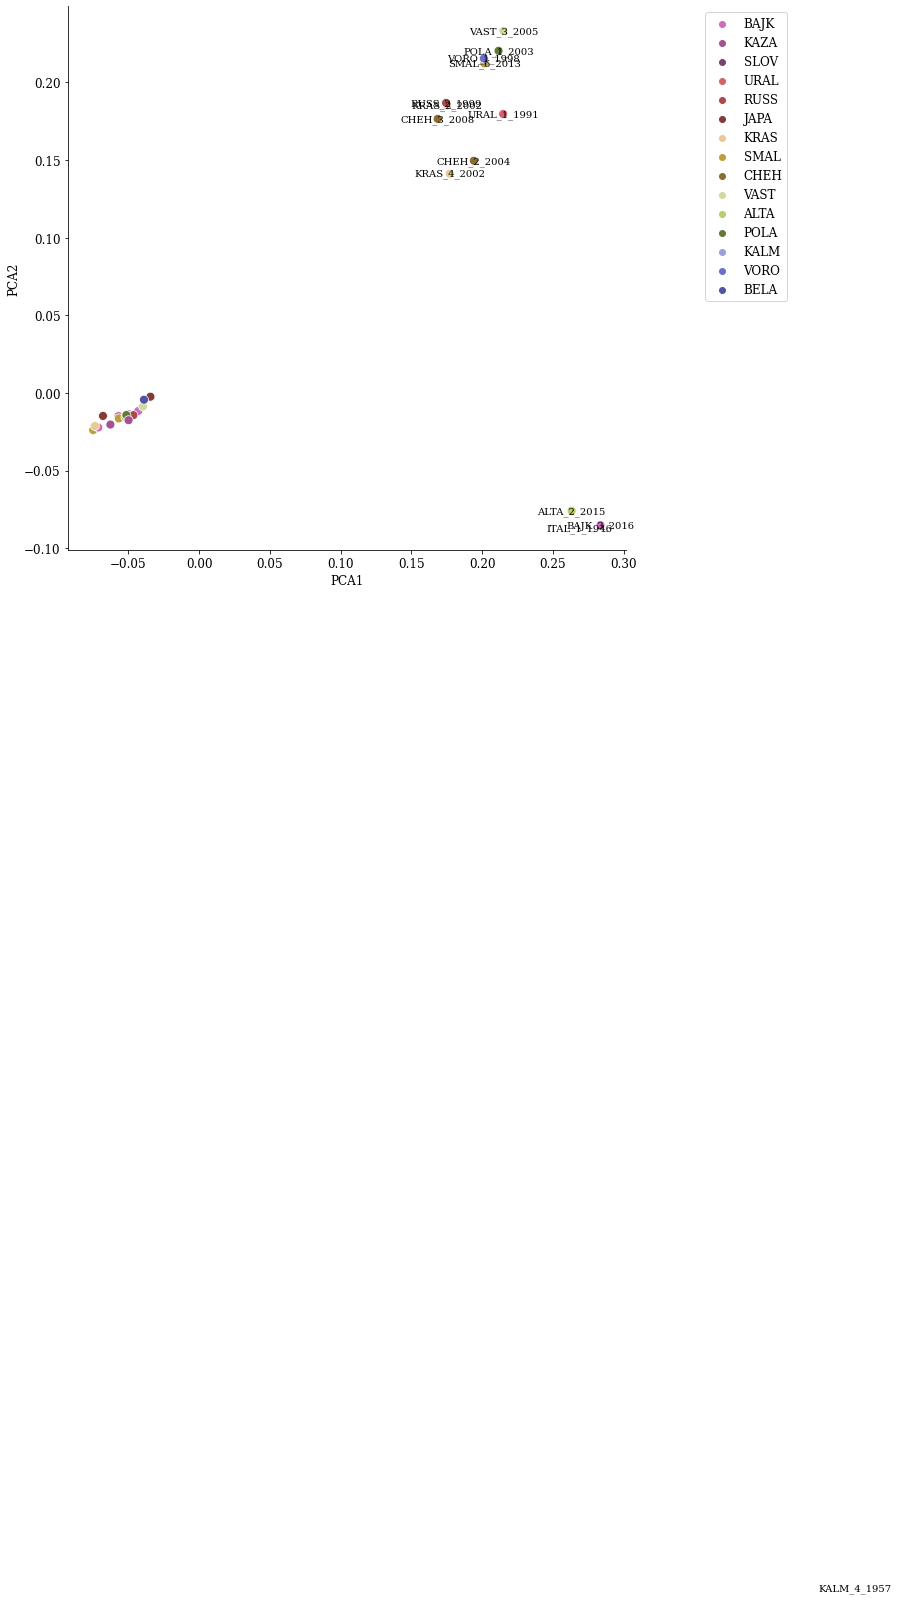

In [136]:
cont_data = df[df['Age'] == 'cont']
cont_data

# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['popID'], s=80,palette="tab20b_r") #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#for i in range(len(cont_data)):  
#    plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=14)
    
    
#for i in range(len(cont_data)):
#    plt.text(cont_data['PCA1'].iloc[i], cont_data['PCA2'].iloc[i], cont_data['ID'].iloc[i], ha='center', va='center', fontsize=14)

for i in range(len(df)):
    if df['PCA1'][i] > 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)    

        
#plt.legend(frameon=False)
#plt.savefig("/Users/dariashipilina/Documents/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_cont_miss3_auto.pdf",bbox_inches="tight")
        
# Show the plot
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['popID'], s=80,palette="tab20b_r") #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

for i in range(len(df)):
    if df['PCA1'][i] > 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)    
        
# Show the plot
plt.show()

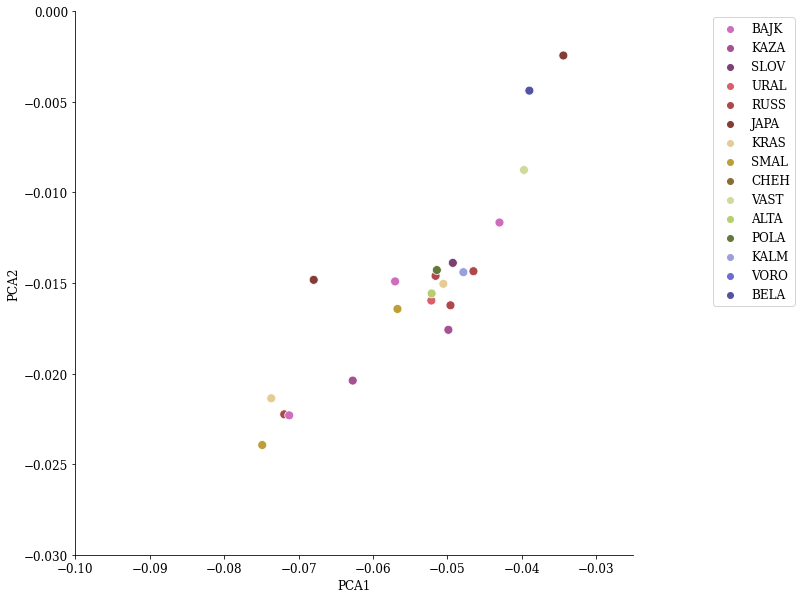

In [143]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['popID'], s=80,palette="tab20b_r") #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#for i in range(len(df)):
#    if cont_data['PCA1'][i] < -0.03:       
#        plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=10) 
        
plt.xlim(-0.1,-0.025)
plt.ylim(-0.03,0)
        
# Show the plot
plt.show()

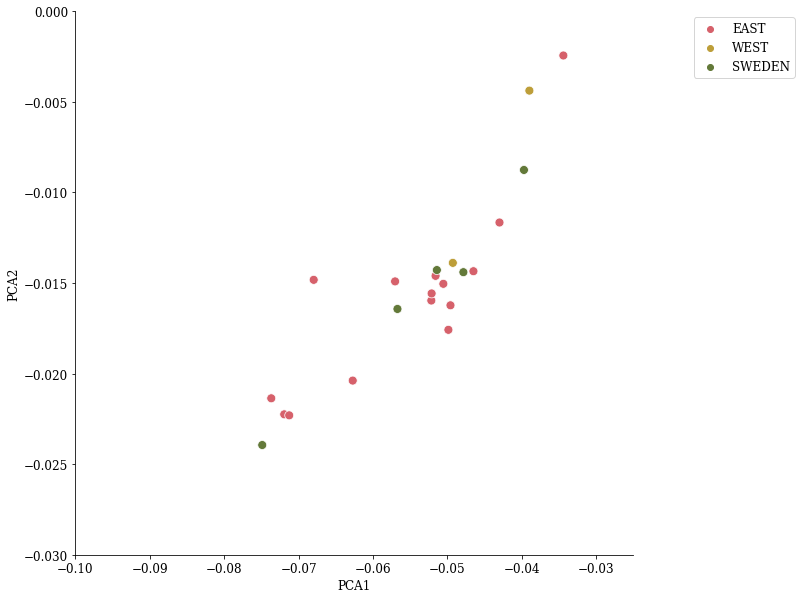

In [144]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['Category'], s=80,palette="tab20b_r") #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#for i in range(len(df)):
#    if cont_data['PCA1'][i] < -0.03:       
#        plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=10) 
        
plt.xlim(-0.1,-0.025)
plt.ylim(-0.03,0)
        
# Show the plot
plt.show()

#### w/o prunning

In [29]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.noprune.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

1         2         3         4         5         6  \
0   BAJK_1_2016_BAJK_1_2016 -0.021607 -0.038400  0.036554 -0.003799  0.003191   
1   KAZA_1_2006_KAZA_1_2006 -0.022329 -0.040539  0.039715 -0.004198  0.002507   
2   SLOV_1_1990_SLOV_1_1990 -0.022281 -0.039101  0.041636 -0.011949  0.009736   
3   URAL_2_1995_URAL_2_1995 -0.022180 -0.038755  0.042506 -0.013505  0.009991   
4   RUSS_4_2008_RUSS_4_2008 -0.023914 -0.043860  0.044926 -0.006175  0.005110   
..                      ...       ...       ...       ...       ...       ...   
68  KALM_4_1957_KALM_4_1957  0.979577 -0.157465  0.035402 -0.004383  0.020435   
69  GAST_3_1941_GAST_3_1941 -0.022792 -0.041566  0.039905 -0.002461  0.000977   
70  ITAL_1_1946_ITAL_1_1946  0.050310  0.283125  0.025682  0.047707 -0.947306   
71  GAST_5_1943_GAST_5_1943 -0.022337 -0.040611  0.036886 -0.001057 -0.000250   
72  UPPS_2_1958_UPPS_2_1958 -0.022448 -0.040269  0.038333 -0.003152  0.001426   

           7         8         9        10  ...        14        15        16  \
0   0.000666  0.046892 -0.003607  0.001302  ... -0.006429  0.017833 -0.003404   
1   0.000116  0.051488 -0.003200  0.003027  ... -0.006210  0.019674 -0.007971   
2  -0.015449 -0.237306  0.001947  0.000508  ...  0.111743  0.015038  0.003101   
3  -0.014730 -0.235125  0.005888 -0.001293  ...  0.165363 -0.031490 -0.002269   
4  -0.001553  0.036422 -0.004357  0.003251  ... -0.009818  0.032289 -0.006651   
..       ...       ...       ...       ...  ...       ...       ...       ...   
68  0.003769  0.000486 -0.001940  0.000899  ...  0.002099 -0.000446 -0.000297   
69  0.002713  0.090805 -0.003121  0.003860  ...  0.016726 -0.007306 -0.006479   
70  0.004173 -0.033884 -0.038887  0.004160  ...  0.004160  0.001284 -0.002327   
71  0.004281  0.103352 -0.005421  0.002291  ...  0.023518 -0.018955 -0.001493   
72  0.001855  0.082830 -0.003862  0.002611  ...  0.016235  0.003587 -0.003642   

          17        18        19        20        21           ID  popID  
0  -0.022345  0.011039 -0.007339  0.014178 -0.034471  BAJK_1_2016   BAJK  
1  -0.023226  0.007635 -0.007053  0.014741 -0.043834  KAZA_1_2006   KAZA  
2   0.007158  0.009001 -0.003247  0.093762 -0.359621  SLOV_1_1990   SLOV  
3  -0.007121  0.037753 -0.004138 -0.030278  0.275367  URAL_2_1995   URAL  
4  -0.038370  0.015236 -0.016709  0.039454 -0.082321  RUSS_4_2008   RUSS  
..       ...       ...       ...       ...       ...          ...    ...  
68 -0.000001  0.000192 -0.000832  0.000751 -0.001182  KALM_4_1957   KALM  
69  0.002439 -0.003439 -0.009633  0.015295 -0.025869  GAST_3_1941   GAST  
70 -0.003282  0.000978 -0.002683  0.004417 -0.005592  ITAL_1_1946   ITAL  
71  0.023375 -0.008213 -0.002420 -0.001249  0.010981  GAST_5_1943   GAST  
72  0.000089  0.000145 -0.006552  0.022484 -0.048313  UPPS_2_1958   UPPS  

[73 rows x 23 columns]

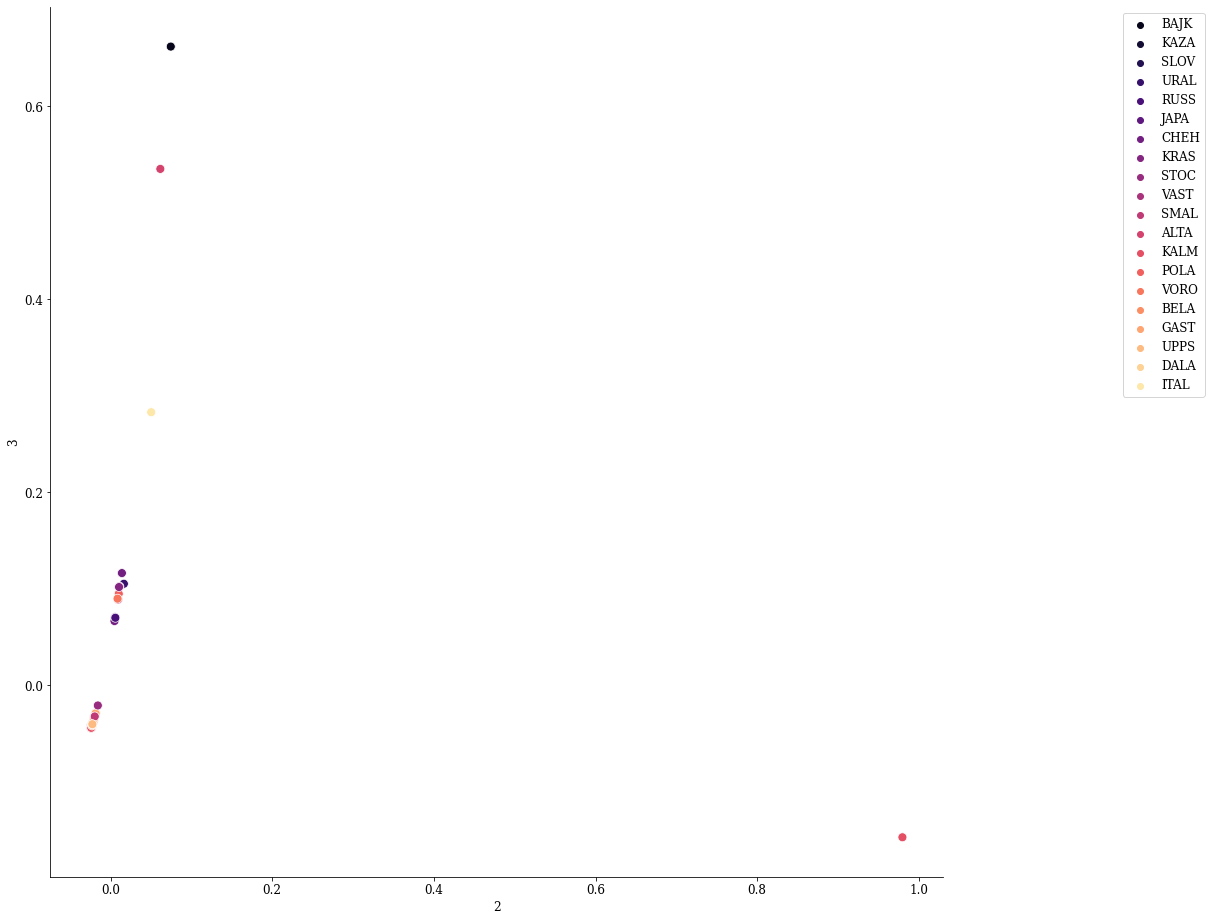

In [31]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=80,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

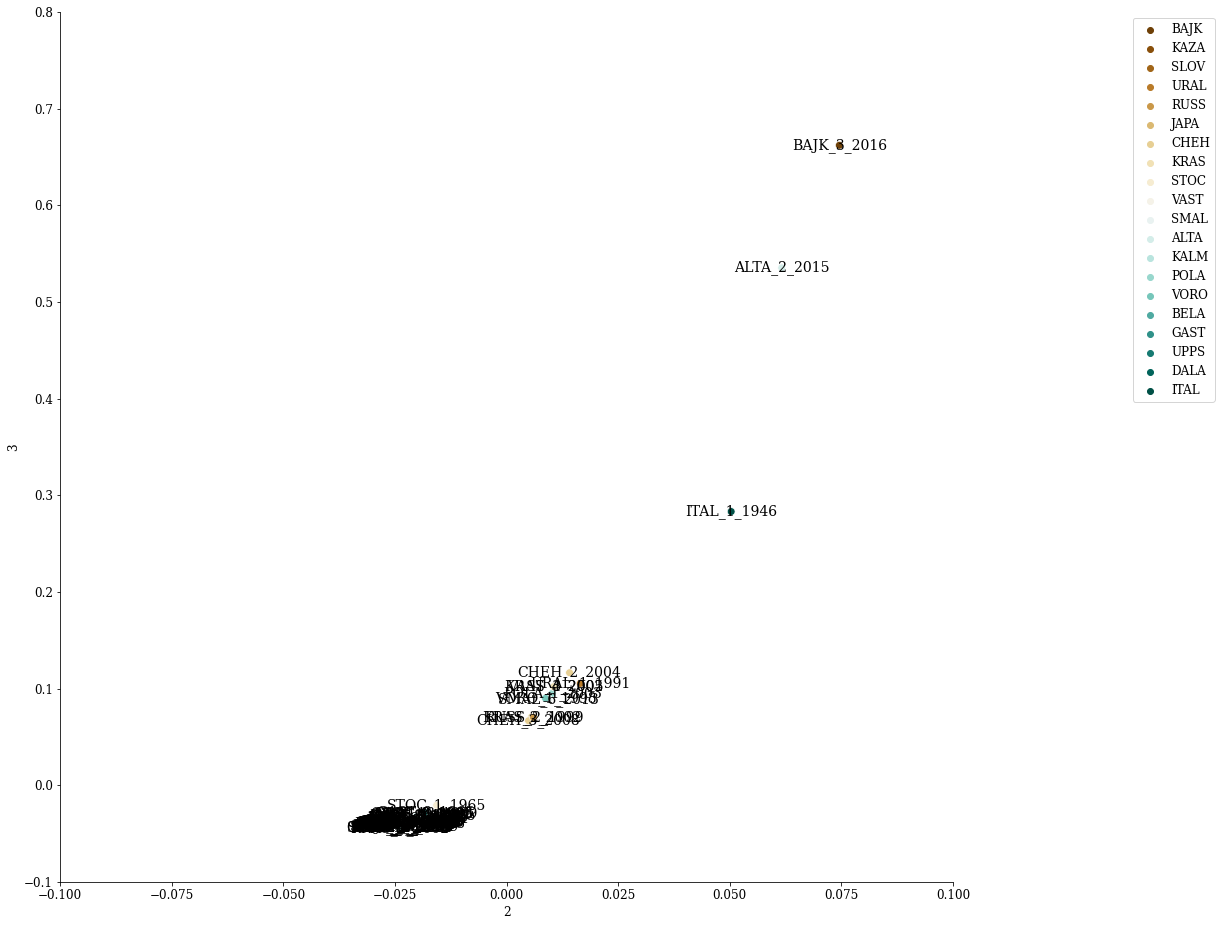

In [33]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=60,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.8)
for i in range(len(df)):
    if df[2][i] < 0.1:
        plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center', fontsize=14)
    
plt.show()

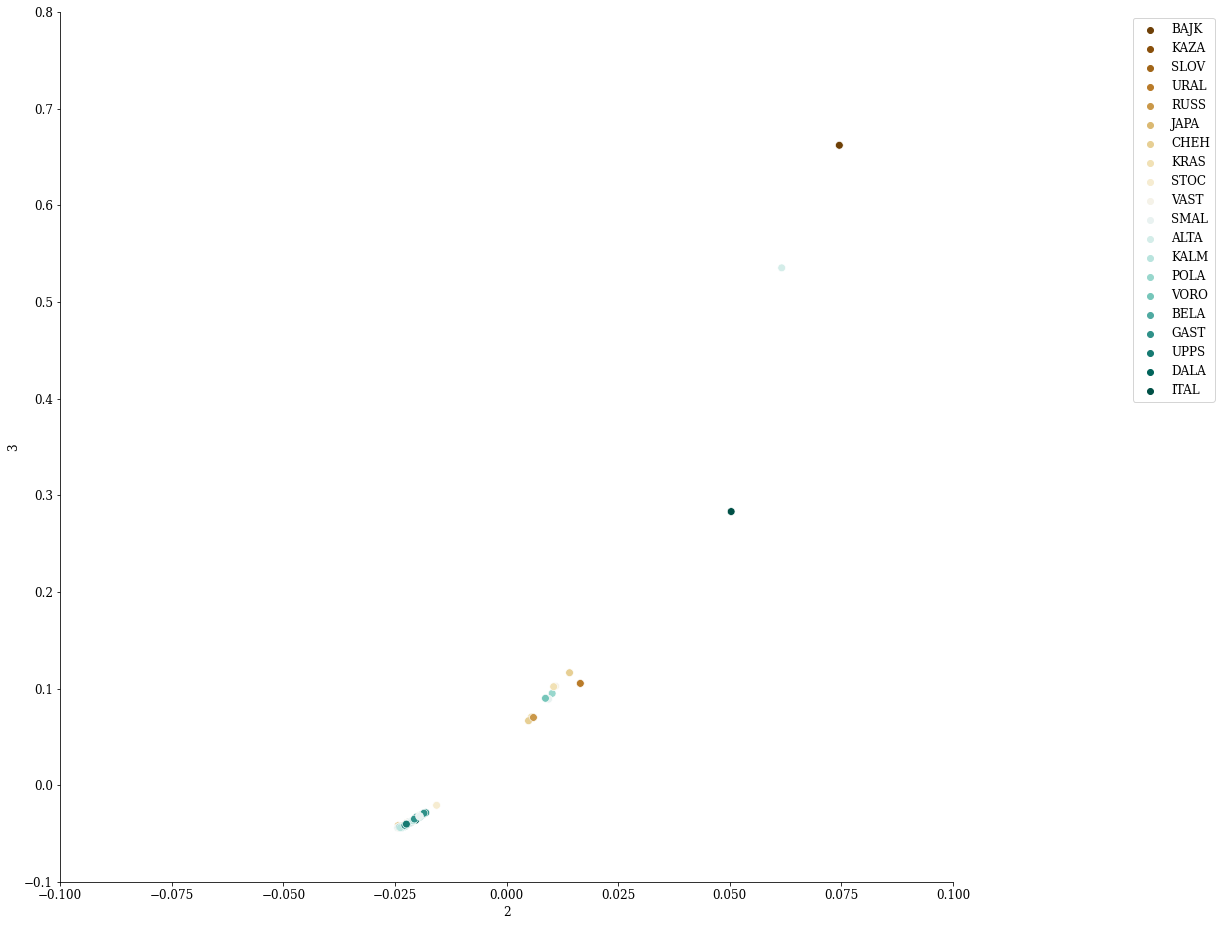

In [34]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=60,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.8)
#for i in range(len(df)):
#    if df[2][i] < 0.1:
#        plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center', fontsize=14)
    
plt.show()

### miss20

#### pruned

In [2]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss20.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

1         2         3         4         5         6  \
0   BAJK_1_2016_BAJK_1_2016 -0.065484 -0.000880 -0.051408 -0.036077  0.017175   
1   KAZA_1_2006_KAZA_1_2006 -0.071009 -0.002774 -0.054913 -0.037967  0.018390   
2   SLOV_1_1990_SLOV_1_1990 -0.059085 -0.032594  0.187884  0.132751 -0.060703   
3   URAL_2_1995_URAL_2_1995 -0.054745 -0.028753  0.174404  0.123287 -0.057473   
4   RUSS_4_2008_RUSS_4_2008 -0.078534 -0.005518 -0.046994 -0.034117  0.018024   
..                      ...       ...       ...       ...       ...       ...   
68  KALM_4_1957_KALM_4_1957  0.317591 -0.564413 -0.476783  0.573775  0.042471   
69  GAST_3_1941_GAST_3_1941 -0.064753  0.001886 -0.075042 -0.051006  0.022479   
70  ITAL_1_1946_ITAL_1_1946  0.205541 -0.208961  0.033410 -0.195269 -0.028559   
71  GAST_5_1943_GAST_5_1943 -0.063599  0.005297 -0.085498 -0.056019  0.023562   
72  UPPS_2_1958_UPPS_2_1958 -0.063746  0.002366 -0.072182 -0.049318  0.022086   

           7         8         9        10  ...        14        15        16  \
0   0.012470  0.005862  0.012934 -0.008651  ...  0.003877  0.146554 -0.020154   
1   0.016598  0.009504  0.019736 -0.009173  ...  0.006368  0.200449 -0.029309   
2  -0.011963 -0.008197 -0.148635 -0.032952  ... -0.002195  0.179281  0.117884   
3  -0.015103 -0.011880 -0.214190 -0.045517  ...  0.003457 -0.076507 -0.031761   
4   0.023592  0.012632  0.033834 -0.012505  ...  0.007195  0.281592 -0.040521   
..       ...       ...       ...       ...  ...       ...       ...       ...   
68  0.076819 -0.020387 -0.007039  0.000672  ...  0.000159  0.005640 -0.001264   
69  0.009122  0.004132 -0.014757  0.011310  ...  0.001511  0.009972 -0.005402   
70 -0.920847 -0.076755  0.037369 -0.005350  ...  0.003575  0.052993 -0.007990   
71  0.004912  0.002060 -0.032629  0.019260  ... -0.001449 -0.081193  0.010282   
72  0.008403  0.003247 -0.012467  0.007093  ...  0.002230  0.078876 -0.012323   

          17        18        19        20        21           ID  popID  
0   0.011742  0.085141 -0.012962  0.000419  0.023468  BAJK_1_2016   BAJK  
1   0.018029  0.114191 -0.017339  0.000973  0.030681  KAZA_1_2006   KAZA  
2  -0.750241 -0.280879 -0.441026 -0.023138  0.075672  SLOV_1_1990   SLOV  
3   0.187045  0.040363 -0.041425 -0.122991  0.373872  URAL_2_1995   URAL  
4   0.023267  0.155848 -0.021328  0.001796  0.039637  RUSS_4_2008   RUSS  
..       ...       ...       ...       ...       ...          ...    ...  
68  0.001175 -0.000230 -0.000319  0.000691 -0.000818  KALM_4_1957   KALM  
69  0.003264 -0.005669  0.003177 -0.002207 -0.003416  GAST_3_1941   GAST  
70  0.006023  0.016146 -0.003121 -0.000043  0.002142  ITAL_1_1946   ITAL  
71 -0.006406 -0.056900  0.009970 -0.002147 -0.017574  GAST_5_1943   GAST  
72 -0.000208  0.041125 -0.012863  0.001047  0.008121  UPPS_2_1958   UPPS  

[73 rows x 23 columns]

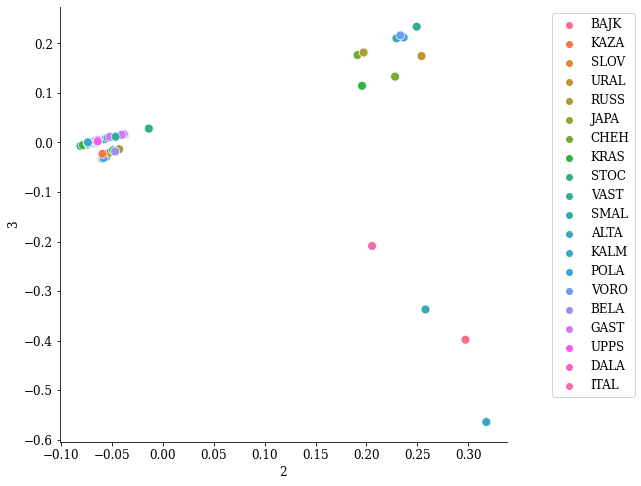

In [10]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

## mtDNA

In [8]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.mtDNA.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})


df

1      PCA1      PCA2         4         5         6  \
0   BAJK_1_2016_BAJK_1_2016 -0.038360 -0.044800  0.010885  0.010552  0.000078   
1   KAZA_1_2006_KAZA_1_2006 -0.038934 -0.047468  0.011151  0.010687  0.000870   
2   SLOV_1_1990_SLOV_1_1990 -0.037526 -0.045732  0.012103  0.006571  0.000474   
3   URAL_2_1995_URAL_2_1995 -0.036944 -0.048646  0.015367  0.011326  0.001602   
4   RUSS_4_2008_RUSS_4_2008 -0.039602 -0.046787  0.011308  0.010554  0.000742   
..                      ...       ...       ...       ...       ...       ...   
68  KALM_4_1957_KALM_4_1957  0.877463 -0.452337 -0.107324  0.007309  0.006391   
69  GAST_3_1941_GAST_3_1941 -0.039663 -0.048751  0.012761  0.012156 -0.000541   
70  ITAL_1_1946_ITAL_1_1946  0.193685  0.299507  0.437553  0.084167  0.037177   
71  GAST_5_1943_GAST_5_1943 -0.039480 -0.048414  0.012616  0.011502 -0.000505   
72  UPPS_2_1958_UPPS_2_1958 -0.039041 -0.045876  0.011069  0.008847  0.000941   

           7         8         9        10  ...        17        18        19  \
0  -0.000800 -0.004507 -0.004617 -0.225413  ... -0.005536  0.002244 -0.005381   
1  -0.002071 -0.003911 -0.006228 -0.256613  ... -0.001498  0.013305 -0.016329   
2  -0.000614  0.015114 -0.007943  0.040745  ... -0.016281  0.016860  0.259702   
3  -0.001538  0.024718 -0.004027  0.031850  ... -0.010828  0.023941  0.209988   
4  -0.001932 -0.004253 -0.006430 -0.252715  ... -0.000974  0.011622 -0.013801   
..       ...       ...       ...       ...  ...       ...       ...       ...   
68  0.002715  0.003897  0.003995 -0.002665  ... -0.000765  0.000807 -0.000639   
69 -0.001609  0.047924 -0.003565  0.100495  ... -0.002870  0.003489 -0.018731   
70 -0.811619  0.004921  0.013096 -0.000191  ...  0.001093 -0.000110  0.001097   
71 -0.001462  0.043215 -0.003267  0.090761  ...  0.000158 -0.001919 -0.016325   
72 -0.003347 -0.000422 -0.006046 -0.230382  ... -0.003553  0.008733 -0.020399   

          20        21           ID  popID  Category  Year  Decade  
0  -0.003972 -0.011678  BAJK_1_2016   BAJK      EAST  2016   2010s  
1   0.005053 -0.018674  KAZA_1_2006   KAZA      EAST  2006   2000s  
2  -0.030748 -0.076878  SLOV_1_1990   SLOV      WEST  1990   1990s  
3  -0.025518  0.000365  URAL_2_1995   URAL      EAST  1995   1990s  
4   0.006497 -0.016397  RUSS_4_2008   RUSS      EAST  2008   2000s  
..       ...       ...          ...    ...       ...   ...     ...  
68  0.000167  0.000974  KALM_4_1957   KALM    SWEDEN  1957   1950s  
69  0.003575  0.019397  GAST_3_1941   GAST    SWEDEN  1941   1940s  
70 -0.000846  0.001145  ITAL_1_1946   ITAL      WEST  1946   1940s  
71  0.003129  0.008545  GAST_5_1943   GAST    SWEDEN  1943   1940s  
72  0.005543 -0.008535  UPPS_2_1958   UPPS    SWEDEN  1958   1950s  

[73 rows x 26 columns]

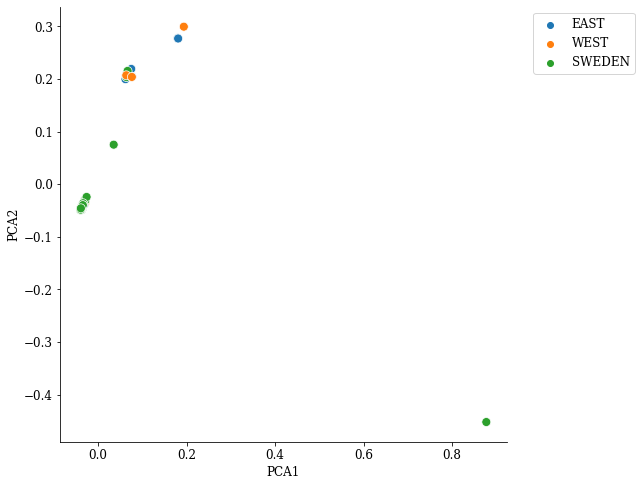

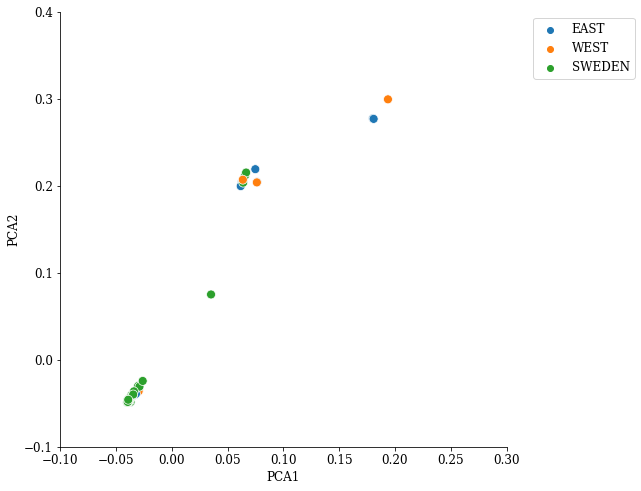

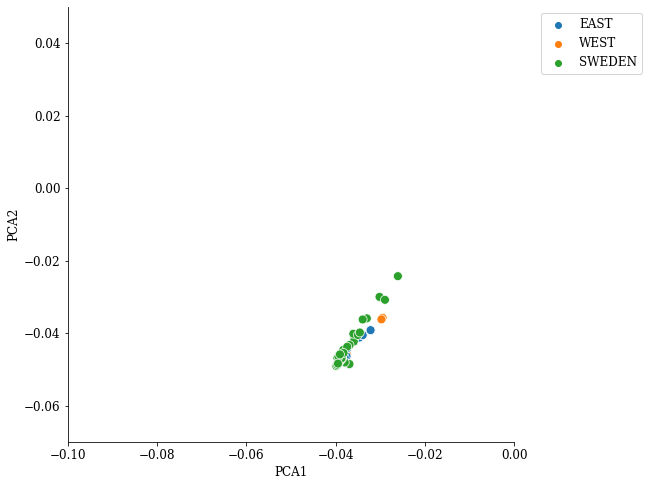

In [16]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0.3)
plt.ylim(-0.1,0.4)
plt.show()


sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0.0)
plt.ylim(-0.07,0.05)
plt.show()

#### sweden

In [8]:
import pandas as pd
import re

# Read the data from the file
#df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.mtDNA.eigenvec", delimiter=' ', header=None)
df = pd.read_csv("/Users/dariashipilina/Documents/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.mtDNA.sweden.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})


df

1      PCA1      PCA2         4         5  \
0     STOC_6_1965_STOC_6_1965  0.033609 -0.036993  0.008816  0.289296   
1     VAST_1_1983_VAST_1_1983  0.026072 -0.022169 -0.006038  0.141976   
2     SMAL_4_1996_SMAL_4_1996  0.033754 -0.037640  0.010623  0.308735   
3     SMAL_5_1998_SMAL_5_1998  0.033516 -0.037065  0.010405  0.280594   
4     VAST_3_2005_VAST_3_2005 -0.109335  0.635593  0.223801  0.006084   
5     KALM_9_1981_KALM_9_1981  0.030774 -0.034309  0.004313  0.106527   
6     KALM_1_2018_KALM_1_2018  0.030261 -0.042654  0.010700 -0.007616   
7     SMAL_6_2013_SMAL_6_2013 -0.108593  0.648000  0.228684  0.005009   
8   KALM_10_1983_KALM_10_1983  0.029888 -0.035554  0.004966  0.114469   
9     VAST_2_1999_VAST_2_1999 -0.051788  0.286488 -0.943815 -0.012950   
10    GAST_6_1965_GAST_6_1965  0.033188 -0.039357  0.013785 -0.100498   
11    STOC_4_1965_STOC_4_1965  0.023818 -0.007921  0.018241 -0.070091   
12  GAST_14_1969_GAST_14_1969  0.034665 -0.043418  0.013729 -0.100761   
13    UPPS_1_1951_UPPS_1_1951  0.033507 -0.039369  0.014603 -0.112255   
14    KALM_3_1955_KALM_3_1955  0.034364 -0.042675  0.014163 -0.097790   
15    GAST_4_1941_GAST_4_1941  0.033987 -0.042038  0.013799 -0.093430   
16    KALM_5_1961_KALM_5_1961  0.033733 -0.040735  0.014140 -0.103612   
17    GAST_2_1941_GAST_2_1941  0.031487 -0.034314  0.015269 -0.102138   
18    UPPS_3_1969_UPPS_3_1969  0.032592 -0.034613  0.009623  0.275375   
19    KALM_7_1961_KALM_7_1961  0.033831 -0.037824  0.010716  0.308256   
20  GAST_10_1965_GAST_10_1965  0.031957 -0.034153  0.013182 -0.106812   
21    SMAL_2_1967_SMAL_2_1967  0.033252 -0.039986  0.013516 -0.093524   
22    STOC_2_1965_STOC_2_1965  0.022228 -0.010147  0.007902 -0.083882   
23    GAST_7_1965_GAST_7_1965  0.033948 -0.040830  0.014325 -0.108772   
24  GAST_11_1965_GAST_11_1965  0.033852 -0.041338  0.013899 -0.092737   
25  GAST_12_1969_GAST_12_1969  0.034126 -0.042101  0.013336 -0.089713   
26    STOC_3_1965_STOC_3_1965  0.030018 -0.024586  0.021084 -0.103827   
27    DALA_1_1965_DALA_1_1965  0.033598 -0.039966  0.014896 -0.111357   
28    SMAL_3_1967_SMAL_3_1967  0.033480 -0.037137  0.010457  0.277334   
29    STOC_5_1965_STOC_5_1965  0.019919 -0.002978  0.015274 -0.115443   
30    KALM_6_1961_KALM_6_1961  0.033408 -0.040869  0.013609 -0.099425   
31  GAST_13_1969_GAST_13_1969  0.028669 -0.021983  0.013701 -0.109777   
32    GAST_1_1941_GAST_1_1941  0.033899 -0.040411  0.014932 -0.101848   
33    KALM_8_1969_KALM_8_1969  0.033422 -0.040582  0.013778 -0.094924   
34    GAST_8_1965_GAST_8_1965  0.032974 -0.037539  0.014859 -0.101278   
35    KALM_2_1955_KALM_2_1955  0.034283 -0.042703  0.013530 -0.101091   
36    GAST_9_1965_GAST_9_1965  0.028556 -0.028968  0.014435 -0.110108   
37    SMAL_1_1967_SMAL_1_1967  0.033644 -0.037533  0.010583  0.306183   
38    STOC_1_1965_STOC_1_1965  0.029385 -0.029931  0.012417 -0.102444   
39    KALM_4_1957_KALM_4_1957 -0.966271 -0.206311  0.015413  0.002260   
40    GAST_3_1941_GAST_3_1941  0.034501 -0.043310  0.014212 -0.100881   
41    GAST_5_1943_GAST_5_1943  0.034354 -0.042785  0.013422 -0.092112   
42    UPPS_2_1958_UPPS_2_1958  0.033445 -0.036651  0.009587  0.288719   

           6         7         8         9        10  ...        17        18  \
0  -0.009345 -0.082857 -0.063043 -0.005537 -0.007055  ...  0.001018  0.240504   
1   0.129502  0.935116 -0.247230  0.025541 -0.019291  ... -0.006960  0.000483   
2  -0.010469 -0.093078 -0.074508 -0.008241 -0.008276  ... -0.037447 -0.407183   
3  -0.009363 -0.082637 -0.063670 -0.006424 -0.003478  ... -0.001096  0.138482   
4  -0.707656  0.087912 -0.009868  0.032178 -0.020141  ...  0.002745 -0.004086   
5   0.002506  0.111525  0.541024  0.011630 -0.008041  ...  0.032107 -0.008859   
6   0.001200  0.010493  0.027019  0.032148  0.399737  ... -0.010740  0.005344   
7   0.693444 -0.098917  0.013584  0.037621  0.007882  ...  0.004613 -0.002988   
8   0.010517  0.145774  0.770144  0.015289 -0.067213  ... -0.012114  0.001537   
9  -0

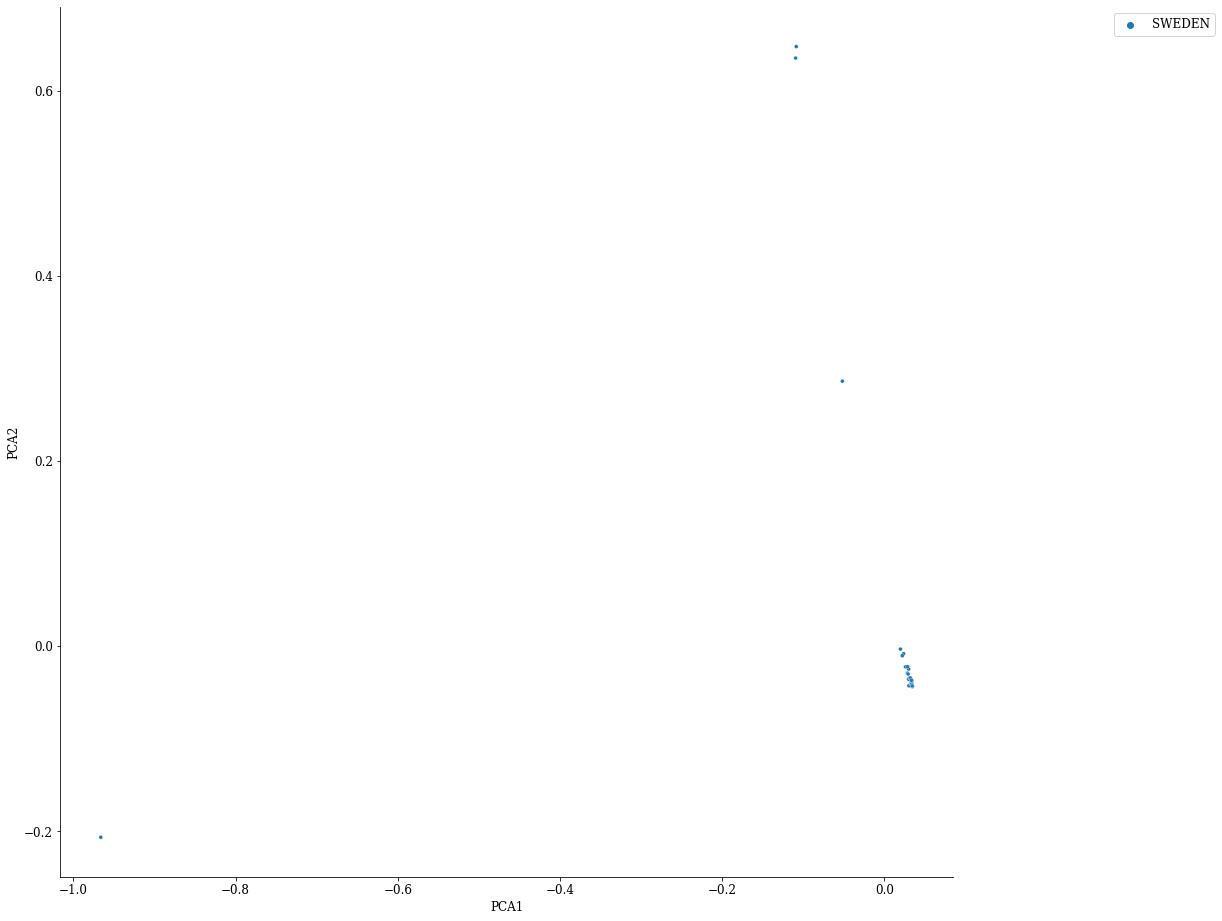

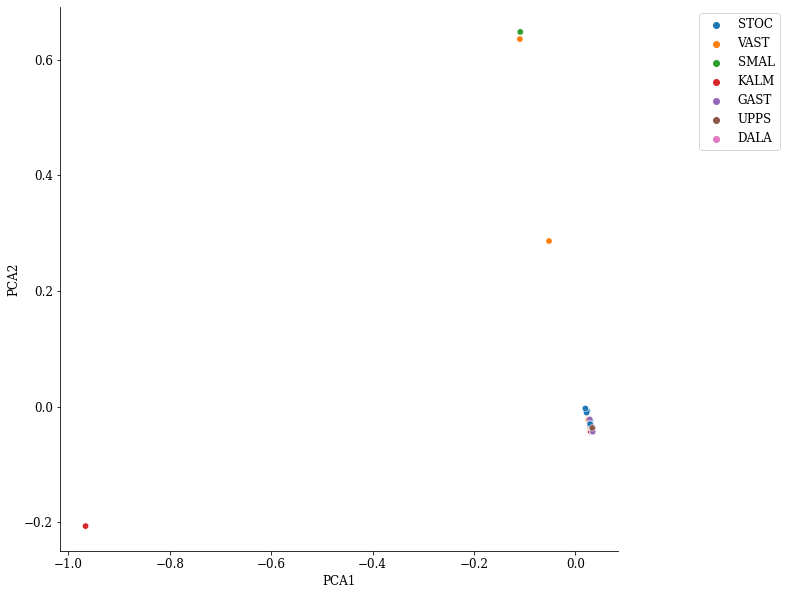

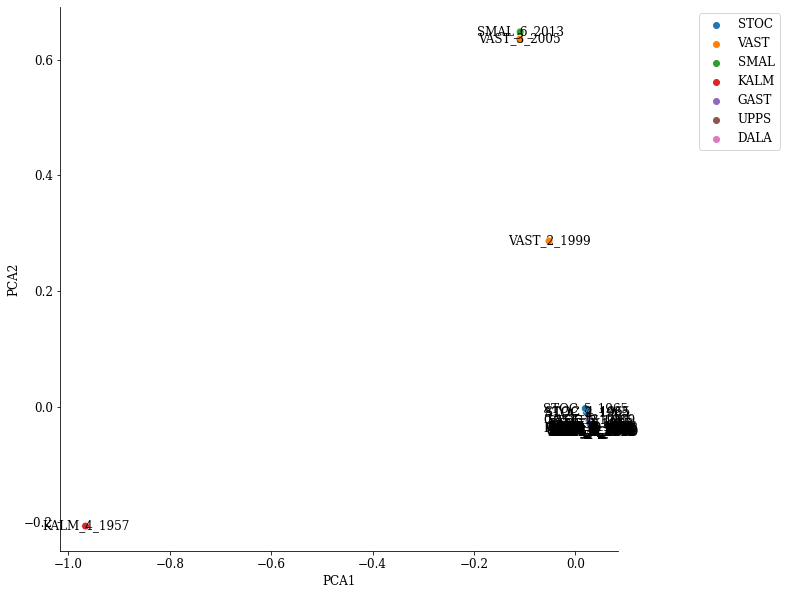

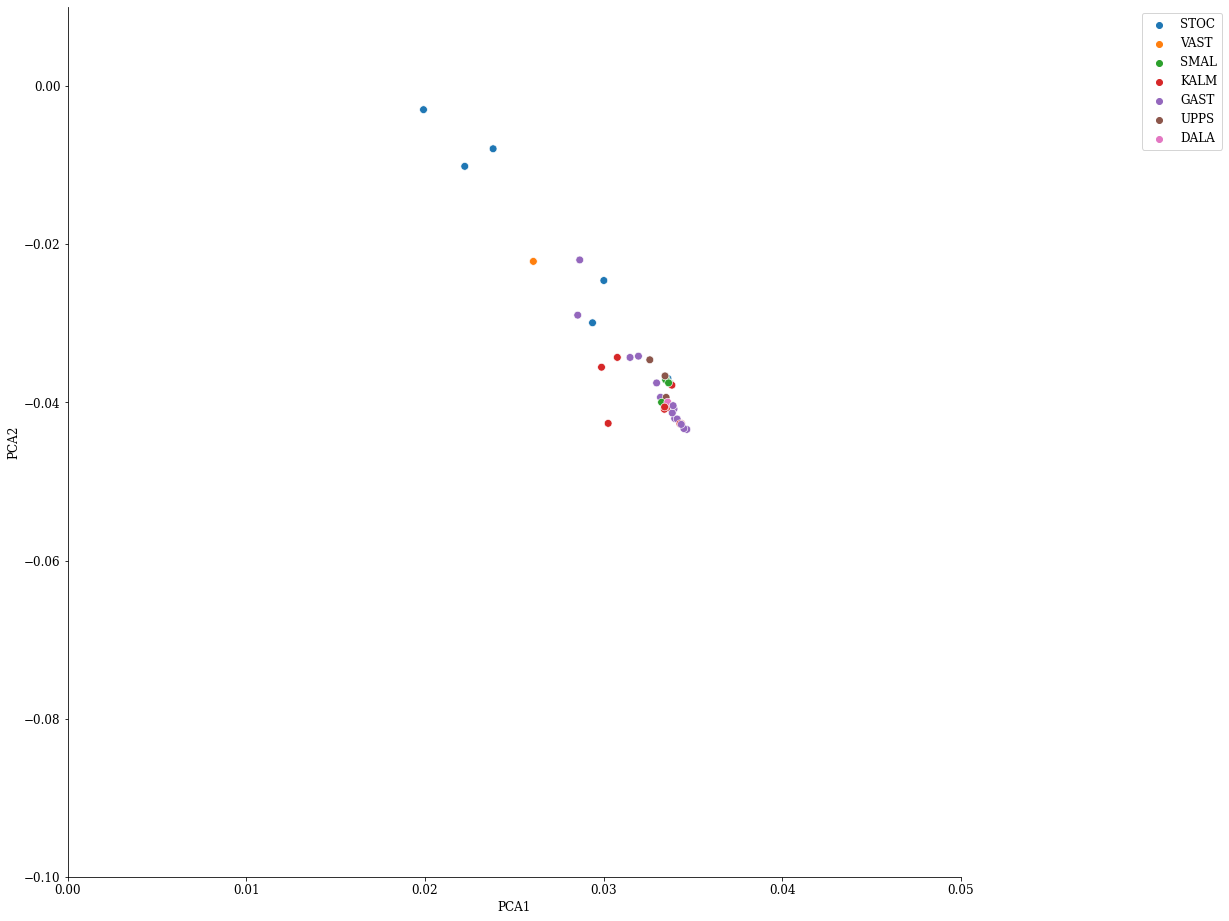

In [24]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=15) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()



# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.xlim(-0.1,0.1)
#plt.ylim(-0.1,0.8)
#for i in range(len(df)):
#    if df[2][i] < 0.1:
#        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')
    
plt.show()


# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.1,0.01)
#for i in range(len(df)):
#    if df[2][i] < 0.1:
#        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')
    
plt.show()

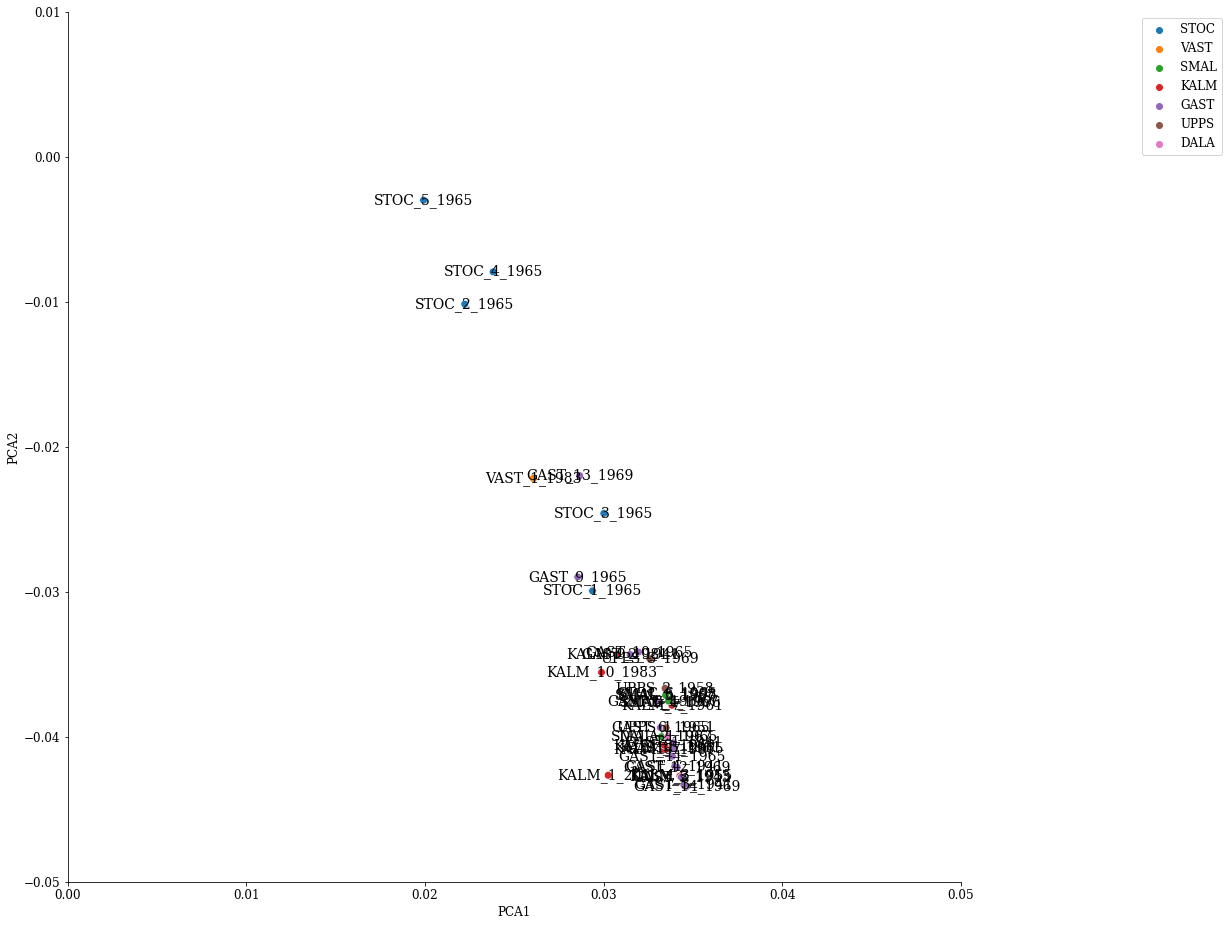

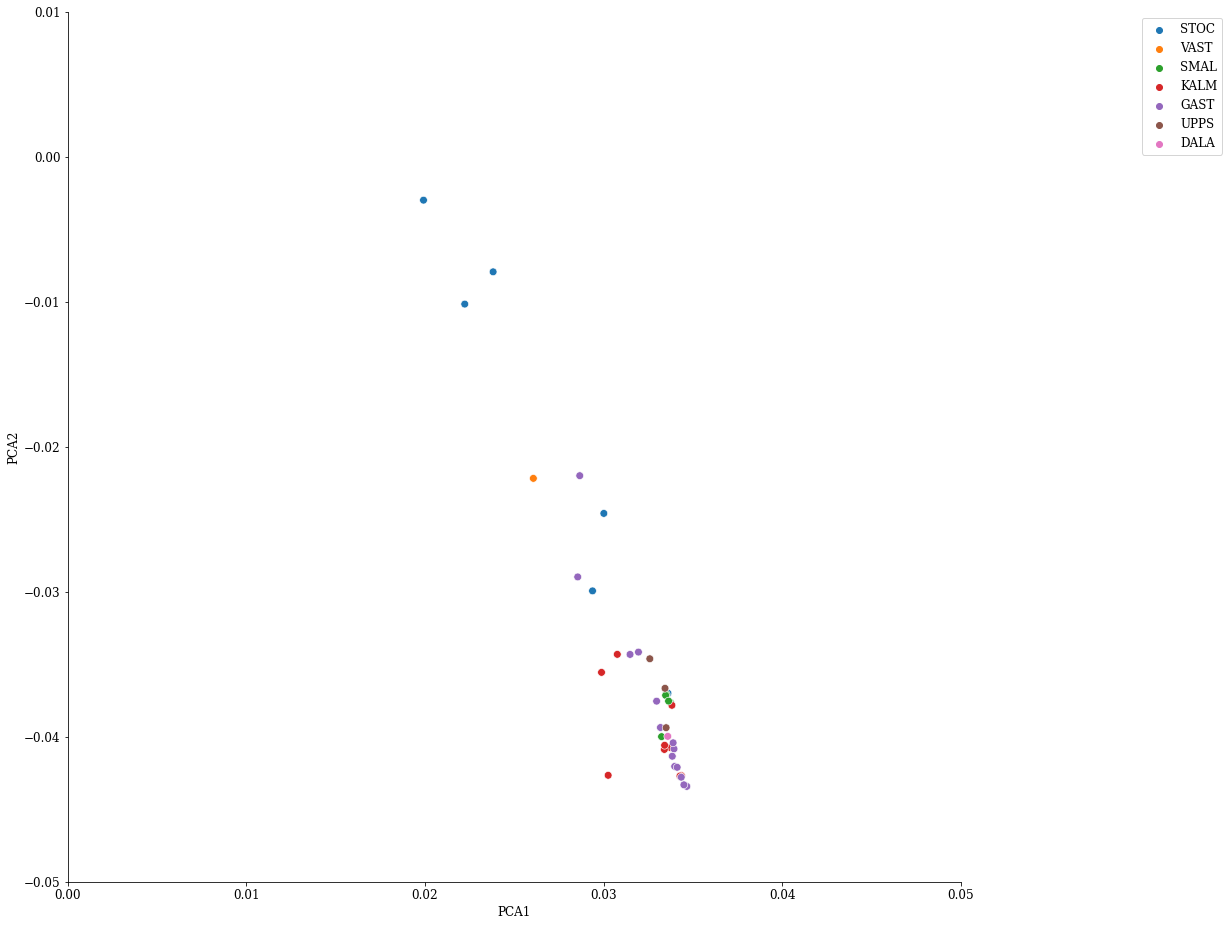

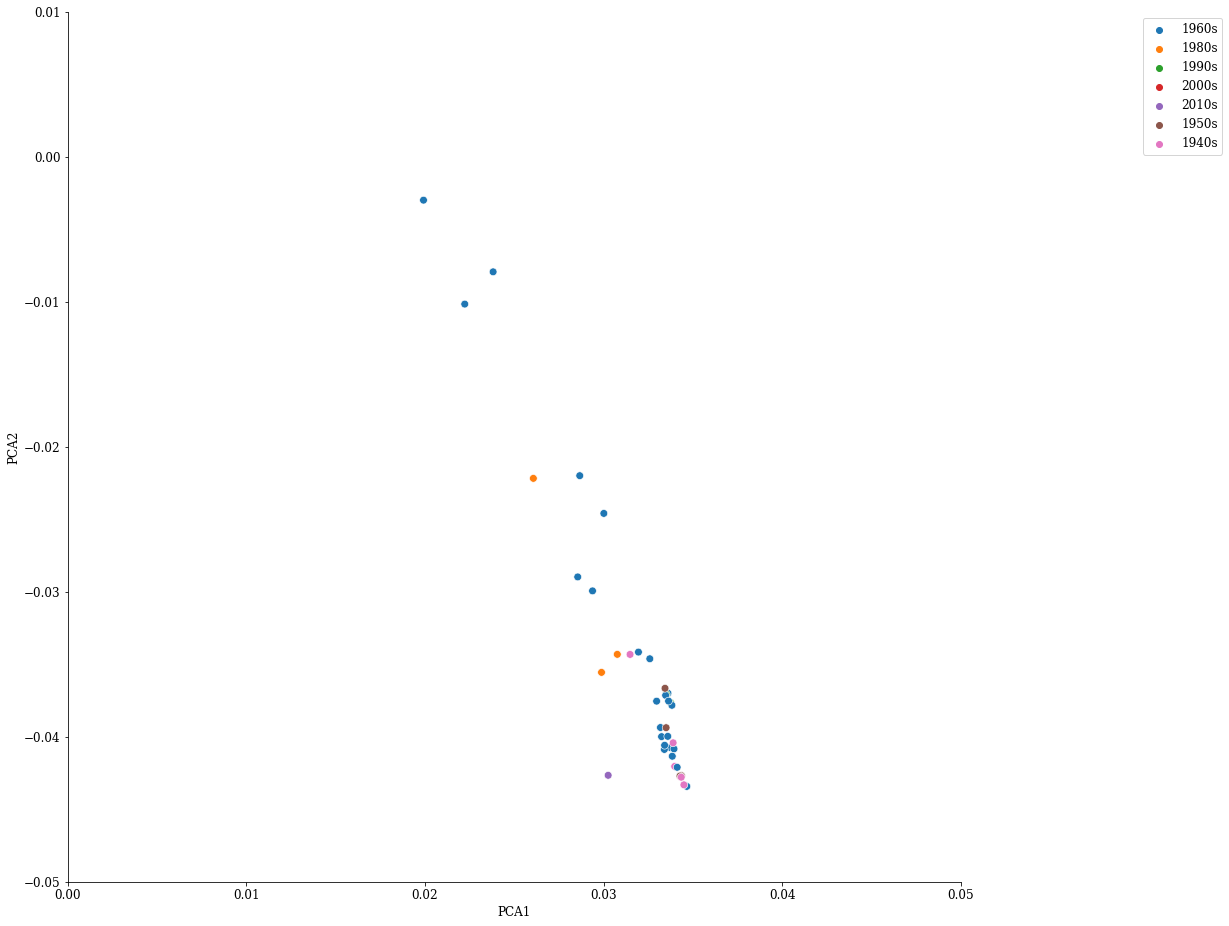

In [36]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.05,0.01)
for i in range(len(df)):
    if df['PCA1'][i] > 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i]) #, ha='center', va='center')
    
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.05,0.01)
#for i in range(len(df)):
#    if df['PCA1'][i] > 0:       
#        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i]) #, ha='center', va='center')
    
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Decade'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.05,0.01)
    
plt.show()

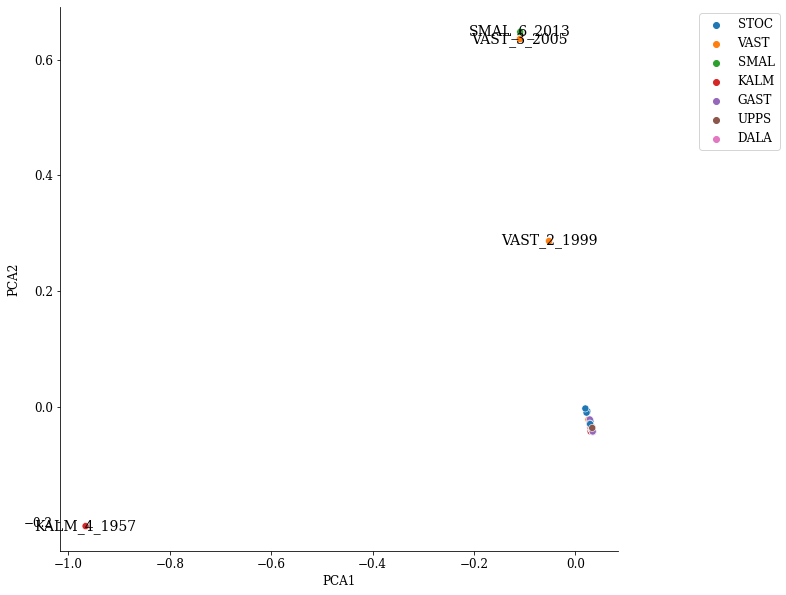

In [39]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
for i in range(len(df)):
    if df['PCA1'][i] < 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)

# Show the plot
plt.show()

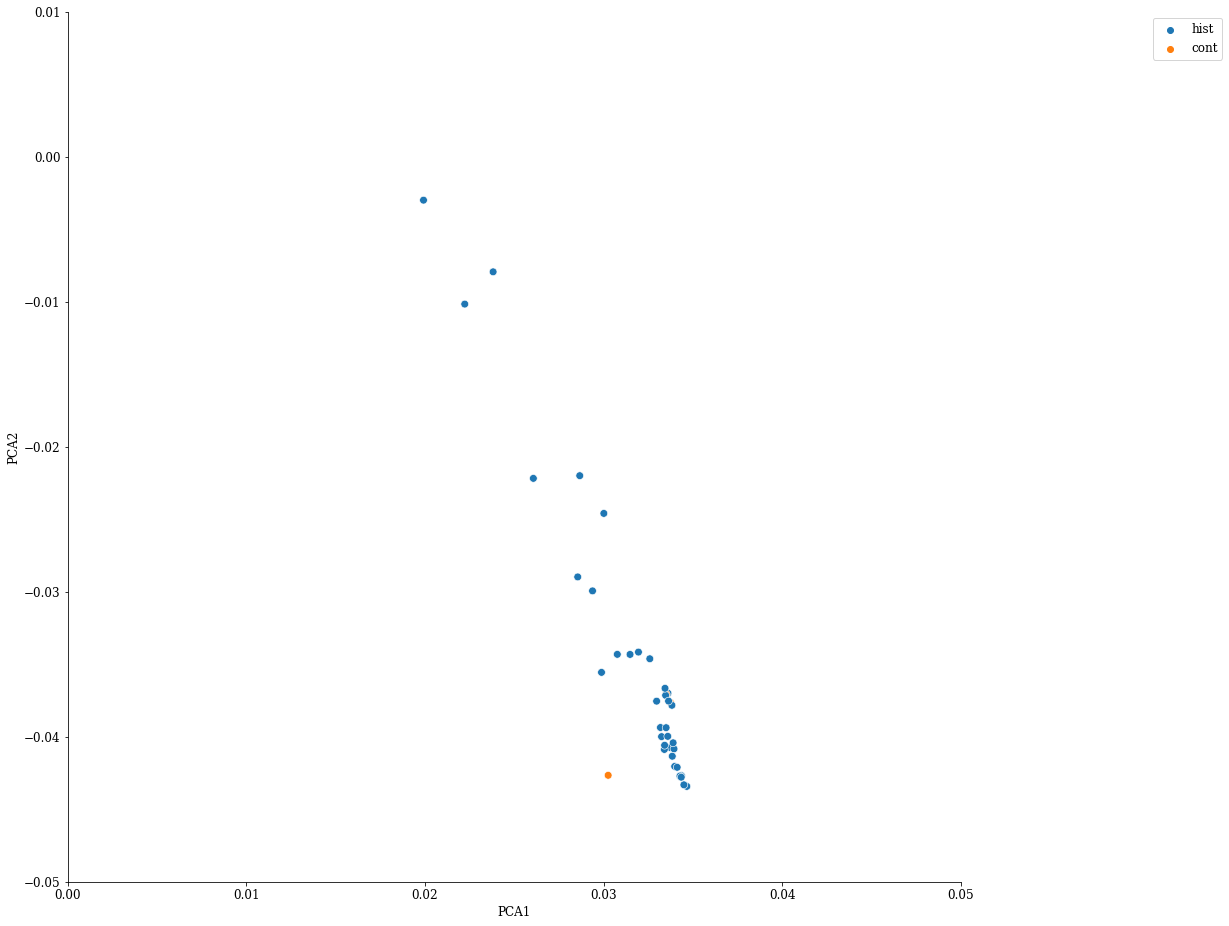

In [45]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Age'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.05,0.01)
    
plt.show()

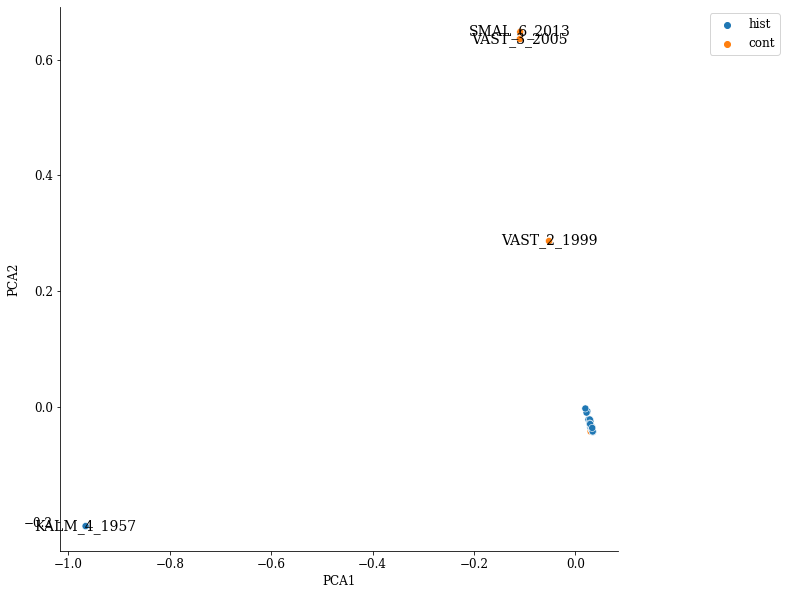

In [47]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Age'], s=50) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
for i in range(len(df)):
    if df['PCA1'][i] < 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)

# Show the plot
plt.show()

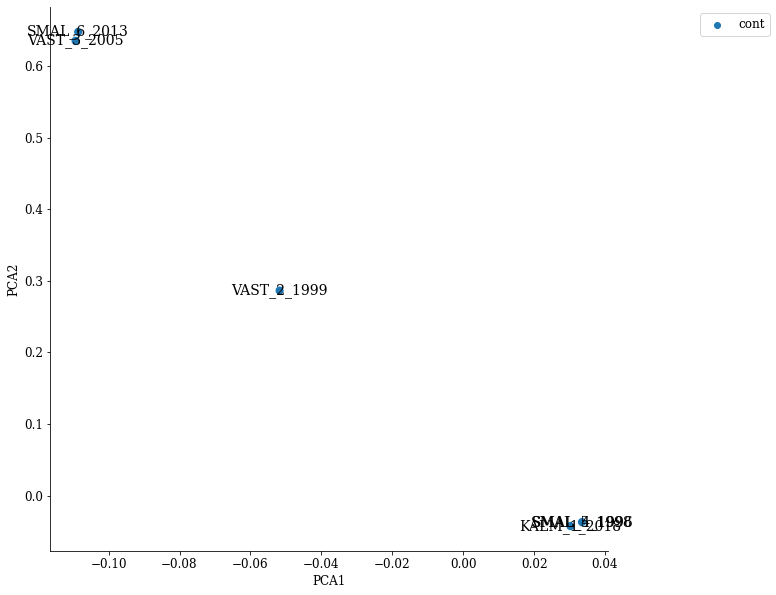

In [69]:
cont_data = df[df['Age'] == 'cont']
cont_data

# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['Age'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#for i in range(len(cont_data)):  
#    plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=14)
    
    
for i in range(len(cont_data)):
    plt.text(cont_data['PCA1'].iloc[i], cont_data['PCA2'].iloc[i], cont_data['ID'].iloc[i], ha='center', va='center', fontsize=14)

#for i in range(len(df)):
#    if df['PCA1'][i] < 0:       
#        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)    

# Show the plot
plt.show()

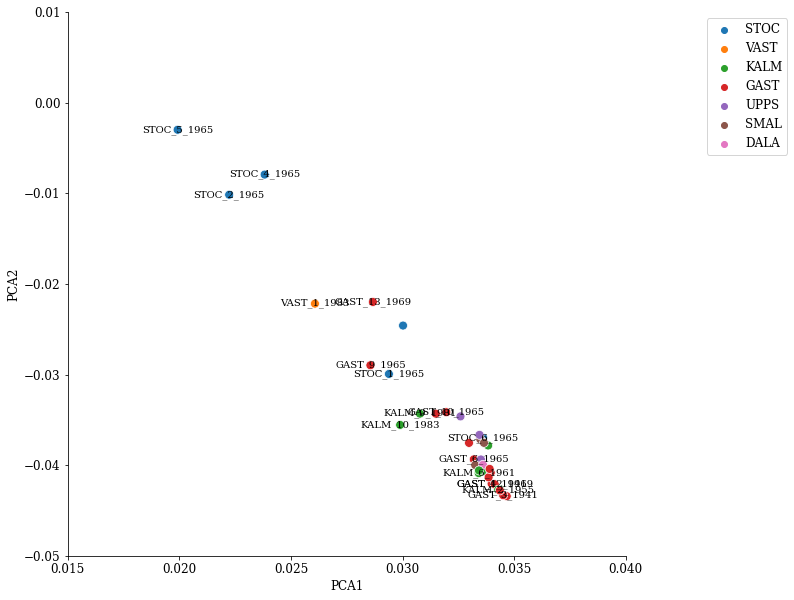

In [83]:
hist_data = df[df['Age'] == 'hist']
hist_data

# Plot scatterplot with the custom palette
sns.scatterplot(x=hist_data['PCA1'], y=hist_data['PCA2'], hue=hist_data['popID'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#for i in range(len(cont_data)):  
#    plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=14)


plt.xlim(0.015,0.04)
plt.ylim(-0.05,0.01)


for i in range(len(df)):
    if 0.015 < df['PCA1'][i] < 0.03:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)  
    
n = 5
for i in range(0, len(df), n):
    if df['PCA1'][i] > 0:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)  

# Show the plot
plt.show()

In [60]:
cont_data

1      PCA1      PCA2         4         5         6  \
2  SMAL_4_1996_SMAL_4_1996  0.033754 -0.037640  0.010623  0.308735 -0.010469   
3  SMAL_5_1998_SMAL_5_1998  0.033516 -0.037065  0.010405  0.280594 -0.009363   
4  VAST_3_2005_VAST_3_2005 -0.109335  0.635593  0.223801  0.006084 -0.707656   
6  KALM_1_2018_KALM_1_2018  0.030261 -0.042654  0.010700 -0.007616  0.001200   
7  SMAL_6_2013_SMAL_6_2013 -0.108593  0.648000  0.228684  0.005009  0.693444   
9  VAST_2_1999_VAST_2_1999 -0.051788  0.286488 -0.943815 -0.012950 -0.002279   

          7         8         9        10  ...        18        19        20  \
2 -0.093078 -0.074508 -0.008241 -0.008276  ... -0.407183 -0.130667  0.055222   
3 -0.082637 -0.063670 -0.006424 -0.003478  ...  0.138482  0.039618 -0.029757   
4  0.087912 -0.009868  0.032178 -0.020141  ... -0.004086  0.006504 -0.004412   
6  0.010493  0.027019  0.032148  0.399737  ...  0.005344  0.013920  0.018085   
7 -0.098917  0.013584  0.037621  0.007882  ... -0.002988  0.002301 -0.005861   
9 -0.022268 -0.004425  0.015916  0.003951  ... -0.001399 -0.002394 -0.001779   

         21           ID  popID  Category  Year  Decade   Age  
2 -0.007156  SMAL_4_1996   SMAL    SWEDEN  1996   1990s  cont  
3 -0.005669  SMAL_5_1998   SMAL    SWEDEN  1998   1990s  cont  
4  0.005394  VAST_3_2005   VAST    SWEDEN  2005   2000s  cont  
6 -0.025436  KALM_1_2018   KALM    SWEDEN  2018   2010s  cont  
7  0.004825  SMAL_6_2013   SMAL    SWEDEN  2013   2010s  cont  
9  0.000029  VAST_2_1999   VAST    SWEDEN  1999   1990s  cont  

[6 rows x 27 columns]

#### sweden: autosomes

In [108]:
import pandas as pd
import re

# Read the data from the file
#df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.mtDNA.eigenvec", delimiter=' ', header=None)
df = pd.read_csv("/Users/dariashipilina/Documents/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.autosomes.sweden.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))


category_dict = {
'KAZA': 'EAST',
 'SLOV': 'WEST',
 'URAL': 'EAST',
 'RUSS': 'EAST',
 'BAJK': 'EAST',
 'JAPA': 'EAST',
 'CHEH': 'WEST',
 'KRAS': 'EAST',
 'STOC': 'SWEDEN',
 'VAST': 'SWEDEN',
 'SMAL': 'SWEDEN',
 'ALTA': 'EAST',
 'KALM': 'SWEDEN',
 'POLA': 'SWEDEN',
 'VORO': 'WEST',
 'BELA': 'WEST',
 'GAST': 'SWEDEN',
 'UPPS': 'SWEDEN',
 'DALA': 'SWEDEN',
 'ITAL': 'WEST'}

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})

# Categorization dictionary
age_dict = {
    '1940s': 'hist',
    '1950s': 'hist',
    '1960s': 'hist',
    '1980s': 'hist',
    '1990s': 'cont',
    '2000s': 'cont',
    '2010s': 'cont'
}

df['Age'] = df['Decade'].map(age_dict)


df

1      PCA1      PCA2         4         5  \
0     STOC_6_1965_STOC_6_1965  0.028591 -0.040801  0.007618 -0.034684   
1     VAST_1_1983_VAST_1_1983  0.024031 -0.028087  0.006467 -0.463288   
2     SMAL_4_1996_SMAL_4_1996  0.028799 -0.041919  0.007797 -0.042992   
3     SMAL_5_1998_SMAL_5_1998  0.026057 -0.035126  0.003817  0.012408   
4     VAST_3_2005_VAST_3_2005 -0.025370  0.767504  0.621380  0.009461   
5     KALM_9_1981_KALM_9_1981  0.025225 -0.032546  0.011869 -0.489050   
6     KALM_1_2018_KALM_1_2018  0.023523 -0.028607  0.007549 -0.422814   
7     SMAL_6_2013_SMAL_6_2013 -0.021079  0.601063 -0.782681 -0.011478   
8   KALM_10_1983_KALM_10_1983  0.024477 -0.031966  0.011636 -0.417524   
9     VAST_2_1999_VAST_2_1999  0.023615 -0.024362  0.006013 -0.201826   
10    GAST_6_1965_GAST_6_1965  0.026913 -0.033477  0.003271  0.079946   
11    STOC_4_1965_STOC_4_1965  0.027701 -0.038922  0.005220  0.053802   
12  GAST_14_1969_GAST_14_1969  0.027893 -0.042347  0.006479  0.040711   
13    UPPS_1_1951_UPPS_1_1951  0.023743 -0.022922 -0.000911  0.083549   
14    KALM_3_1955_KALM_3_1955  0.027445 -0.037729  0.004740  0.060482   
15    GAST_4_1941_GAST_4_1941  0.027642 -0.038692  0.005198  0.060626   
16    KALM_5_1961_KALM_5_1961  0.028149 -0.041568  0.006852  0.030124   
17    GAST_2_1941_GAST_2_1941  0.024475 -0.025531 -0.000426  0.083847   
18    UPPS_3_1969_UPPS_3_1969  0.026793 -0.037008  0.005397  0.057618   
19    KALM_7_1961_KALM_7_1961  0.024596 -0.027441  0.001439  0.065640   
20  GAST_10_1965_GAST_10_1965  0.023998 -0.024243 -0.000582  0.084647   
21    SMAL_2_1967_SMAL_2_1967  0.028446 -0.044061  0.006938  0.029190   
22    STOC_2_1965_STOC_2_1965  0.027202 -0.036529  0.004934  0.051211   
23    GAST_7_1965_GAST_7_1965  0.024650 -0.026532 -0.000347  0.090363   
24  GAST_11_1965_GAST_11_1965  0.026848 -0.035701  0.004392  0.069425   
25  GAST_12_1969_GAST_12_1969  0.029204 -0.042705  0.006252  0.040848   
26    STOC_3_1965_STOC_3_1965  0.023367 -0.020307 -0.002615  0.081223   
27    DALA_1_1965_DALA_1_1965  0.025469 -0.030795  0.001893  0.082757   
28    SMAL_3_1967_SMAL_3_1967  0.026433 -0.033440  0.003813  0.050507   
29    STOC_5_1965_STOC_5_1965  0.028027 -0.040959  0.005102  0.051058   
30    KALM_6_1961_KALM_6_1961  0.026169 -0.032843  0.003295  0.079664   
31  GAST_13_1969_GAST_13_1969  0.023433 -0.018396 -0.002954  0.095749   
32    GAST_1_1941_GAST_1_1941  0.025904 -0.029770  0.000798  0.085553   
33    KALM_8_1969_KALM_8_1969  0.028626 -0.044023  0.010130  0.027501   
34    GAST_8_1965_GAST_8_1965  0.023023 -0.020536 -0.002244  0.090971   
35    KALM_2_1955_KALM_2_1955  0.029192 -0.042222  0.007946  0.043270   
36    GAST_9_1965_GAST_9_1965  0.023460 -0.020639 -0.002828  0.086657   
37    SMAL_1_1967_SMAL_1_1967  0.024354 -0.023969 -0.000132  0.072314   
38    STOC_1_1965_STOC_1_1965  0.019926 -0.004272 -0.006624  0.092714   
39    KALM_4_1957_KALM_4_1957 -0.985735 -0.067560  0.005042  0.003055   
40    GAST_3_1941_GAST_3_1941  0.027881 -0.040070  0.005915  0.048548   
41    GAST_5_1943_GAST_5_1943  0.027480 -0.037163  0.005129  0.066244   
42    UPPS_2_1958_UPPS_2_1958  0.027550 -0.038850  0.005610  0.048879   

           6         7         8         9        10  ...        18        19  \
0   0.022841 -0.007998  0.003577 -0.099623  0.312989  ...  0.013159 -0.034637   
1   0.198638 -0.710065 -0.424313  0.180681 -0.055677  ... -0.004134  0.001558   
2   0.022304 -0.016055  0.017637 -0.107509  0.387836  ...  0.108012 -0.087426   
3   0.004640 -0.005046  0.006308 -0.037729  0.117032  ...  0.321469 -0.154811   
4   0.002056 -0.000158  0.000407 -0.000333  0.023765  ... -0.001228  0.000908   
5   0.440888  0.671735 -0.250557  0.153436 -0.052342  ...  0.000005  0.000960   
6  -0.865677  0.160341 -0.118855  0.076990  0.003025  ...  0.001247 -0.002243   
7   0.005463  0.003100  0.005454 -0.004941  0.039872  ... -0.003131  0.001881   
8   0.104263 -0.131248  0.860836  0.150789 -0.086838  ... -0.003066  0.002998   
9   0

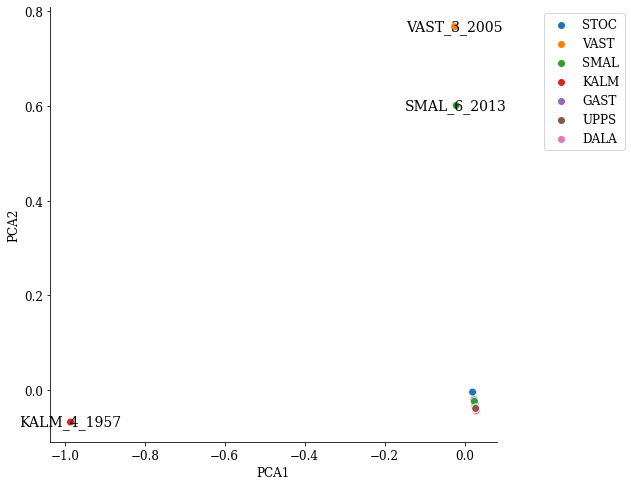

In [101]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.xlim(-0.1,0.1)
#plt.ylim(-0.1,0.8)
for i in range(len(df)):
    if df['PCA1'][i] < 0:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')
    
plt.show()

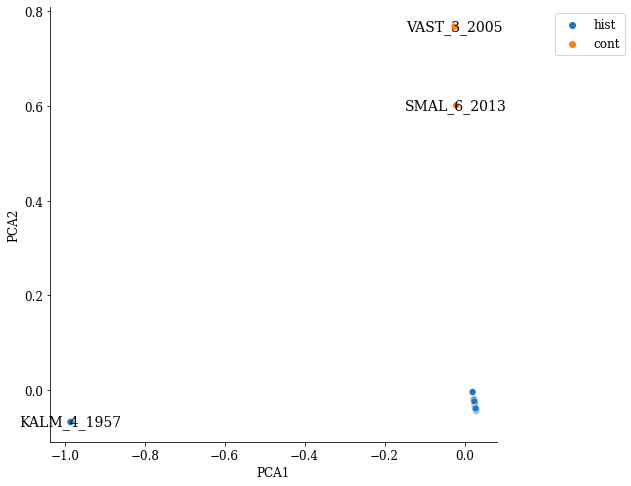

In [103]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Age'], s=50) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

for i in range(len(df)):
    if df['PCA1'][i] < 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)

# Show the plot
plt.show()

## Removing other species

In [20]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.HQ.miss0.GQfilteredNPASS.autosomes.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})


df

1      PCA1      PCA2         4         5  \
0     BAJK_1_2016_BAJK_1_2016 -0.018991  0.013897 -0.013404 -0.011857   
1     KAZA_1_2006_KAZA_1_2006 -0.019324  0.014915 -0.011138 -0.012365   
2     SLOV_1_1990_SLOV_1_1990 -0.020627  0.046630 -0.063086 -0.006597   
3     URAL_2_1995_URAL_2_1995 -0.019898  0.029565 -0.032878 -0.033097   
4     RUSS_4_2008_RUSS_4_2008 -0.019120  0.013872 -0.014334 -0.012753   
5     JAPA_1_1994_JAPA_1_1994 -0.018976  0.014172 -0.013944 -0.010534   
6     CHEH_1_1989_CHEH_1_1989 -0.021064  0.053156 -0.062688 -0.125614   
7     RUSS_1_1998_RUSS_1_1998 -0.020537  0.016034 -0.040200 -0.037605   
8     STOC_6_1965_STOC_6_1965 -0.019359  0.015178 -0.013429 -0.013024   
9     VAST_1_1983_VAST_1_1983 -0.020720  0.020538 -0.061345  0.978332   
10    SMAL_4_1996_SMAL_4_1996 -0.019257  0.015012 -0.012297 -0.011147   
11    RUSS_3_1999_RUSS_3_1999 -0.019492  0.032281 -0.032625 -0.043572   
12    BAJK_2_2016_BAJK_2_2016 -0.018598  0.018668 -0.023655 -0.033069   
13    SMAL_5_1998_SMAL_5_1998 -0.019030  0.013812 -0.013077 -0.010760   
14    JAPA_2_1994_JAPA_2_1994 -0.019718  0.020154 -0.021931 -0.023674   
15    KALM_9_1981_KALM_9_1981 -0.021165 -0.986637  0.047280 -0.003601   
16    KRAS_3_2002_KRAS_3_2002 -0.020786  0.036866 -0.042462 -0.040293   
17    KALM_1_2018_KALM_1_2018 -0.020226  0.023597 -0.018840 -0.028031   
18  KALM_10_1983_KALM_10_1983 -0.020513  0.072859  0.982396  0.029715   
19    BAJK_3_2016_BAJK_3_2016  0.990326 -0.001455  0.000818  0.000944   
20    ALTA_1_2015_ALTA_1_2015 -0.020286  0.025922 -0.052683 -0.074231   
21    RUSS_5_2008_RUSS_5_2008 -0.020377  0.034627 -0.039107 -0.058411   
22    VAST_2_1999_VAST_2_1999 -0.020032  0.028443 -0.018962 -0.038628   
23    POLA_2_2003_POLA_2_2003 -0.019701  0.030989 -0.042010 -0.031235   
24    KRAS_1_2002_KRAS_1_2002 -0.019095  0.014300 -0.012642 -0.011811   
25    BELA_1_2004_BELA_1_2004 -0.019336  0.021758 -0.019497 -0.017227   
26    KAZA_2_2006_KAZA_2_2006 -0.019619  0.026971 -0.044909 -0.042170   
27    GAST_6_1965_GAST_6_1965 -0.018928  0.013138 -0.011719 -0.009936   
28    STOC_4_1965_STOC_4_1965 -0.019048  0.014202 -0.013396 -0.011866   
29  GAST_14_1969_GAST_14_1969 -0.019237  0.014322 -0.012694 -0.011659   
30    UPPS_1_1951_UPPS_1_1951 -0.018065  0.013348 -0.012508 -0.010869   
31    KALM_3_1955_KALM_3_1955 -0.018749  0.013758 -0.012921 -0.011537   
32    GAST_4_1941_GAST_4_1941 -0.019088  0.013058 -0.012232 -0.010555   
33    KALM_5_1961_KALM_5_1961 -0.019065  0.012242 -0.013020 -0.011501   
34    GAST_2_1941_GAST_2_1941 -0.018678  0.012343 -0.012339 -0.010866   
35    UPPS_3_1969_UPPS_3_1969 -0.018841  0.012572 -0.012647 -0.011609   
36  GAST_10_1965_GAST_10_1965 -0.018711  0.012483 -0.011879 -0.010807   
37    SMAL_2_1967_SMAL_2_1967 -0.018994  0.013788 -0.012932 -0.011307   
38    STOC_2_1965_STOC_2_1965 -0.018966  0.011947 -0.012656 -0.011180   
39    GAST_7_1965_GAST_7_1965 -0.018965  0.013365 -0.011985 -0.010877   
40  GAST_11_1965_GAST_11_1965 -0.019067  0.013211 -0.010881 -0.010607   
41  GAST_12_1969_GAST_12_1969 -0.018899  0.013821 -0.013038 -0.011471   
42    DALA_1_1965_DALA_1_1965 -0.019119  0.013849 -0.011606 -0.009348   
43    SMAL_3_1967_SMAL_3_1967 -0.018862  0.013905 -0.013098 -0.011608   
44    STOC_5_1965_STOC_5_1965 -0.019268  0.014579 -0.013035 -0.012136   
45    KALM_6_1961_KALM_6_1961 -0.019100  0.013406 -0.011675 -0.010940   
46    GAST_1_1941_GAST_1_1941 -0.019095  0.012804 -0.011326 -0.010954   
47    KALM_8_1969_KALM_8_1969 -0.019264  0.013902 -0.013003 -0.012134   
48    KALM_2_1955_KALM_2_1955 -0.019077  0.012918 -0.012545 -0.010779   
49    GAST_3_1941_GAST_3_1941 -0.019175  0.013843 -0.012044 -0.011302   
50    GAST_5_1943_GAST_5_1943 -0.019115  0.013349 -0.011958 -0.010791   
51    UPPS_2_1958_UPPS_2_1958 -0.019100  0.013724 -0.012214 -0.011048   

           6         7         8         9        10  ...        17        18  \
0  -0.022392 -0.013457 -0.002559 -0.001276 -0.003382  ... -0.060599  0.015609

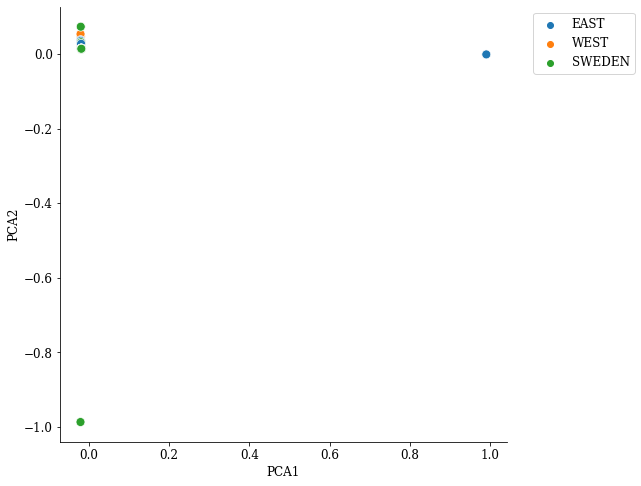

In [21]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

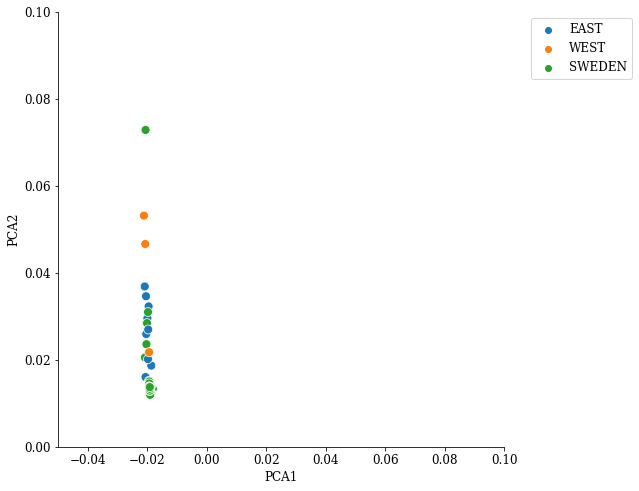

In [15]:
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.05,0.1)
plt.ylim(0,0.1)
plt.show()

In [22]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.HQ.miss0.GQfilteredNPASS.mtDNA.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})


df

1      PCA1      PCA2         4         5  \
0     BAJK_1_2016_BAJK_1_2016  0.024835 -0.014618  0.114391 -0.066559   
1     KAZA_1_2006_KAZA_1_2006  0.026926 -0.016596  0.293828 -0.228080   
2     SLOV_1_1990_SLOV_1_1990  0.025532 -0.018972 -0.081542  0.018445   
3     URAL_2_1995_URAL_2_1995  0.025722 -0.015423 -0.010164 -0.000849   
4     RUSS_4_2008_RUSS_4_2008  0.026926 -0.016596  0.293828 -0.228080   
5     JAPA_1_1994_JAPA_1_1994  0.026663 -0.012623 -0.067975  0.015550   
6     CHEH_1_1989_CHEH_1_1989  0.022522 -0.016096 -0.001466 -0.002378   
7     RUSS_1_1998_RUSS_1_1998  0.024624 -0.014406  0.076103 -0.027248   
8     STOC_6_1965_STOC_6_1965  0.024835 -0.014618  0.114391 -0.066559   
9     VAST_1_1983_VAST_1_1983  0.026693 -0.016397  0.448547  0.872313   
10    SMAL_4_1996_SMAL_4_1996  0.026926 -0.016596  0.293828 -0.228080   
11    RUSS_3_1999_RUSS_3_1999  0.025722 -0.015423 -0.010164 -0.000849   
12    BAJK_2_2016_BAJK_2_2016  0.012245 -0.002657  0.064339 -0.021724   
13    SMAL_5_1998_SMAL_5_1998  0.024835 -0.014618  0.114391 -0.066559   
14    JAPA_2_1994_JAPA_2_1994  0.025250 -0.015628  0.146580 -0.071151   
15    KALM_9_1981_KALM_9_1981  0.026431 -0.016137  0.173118 -0.119858   
16    KRAS_3_2002_KRAS_3_2002  0.023706 -0.013581  0.053777 -0.017978   
17    KALM_1_2018_KALM_1_2018  0.025722 -0.015423 -0.010164 -0.000849   
18  KALM_10_1983_KALM_10_1983  0.025445 -0.015213  0.122330 -0.079082   
19    BAJK_3_2016_BAJK_3_2016 -0.959862 -0.241050  0.001191  0.002056   
20    ALTA_1_2015_ALTA_1_2015  0.027795 -0.017417 -0.024595 -0.002657   
21    RUSS_5_2008_RUSS_5_2008  0.012245 -0.002657  0.064339 -0.021724   
22    VAST_2_1999_VAST_2_1999 -0.221417  0.964697  0.005666 -0.000059   
23    POLA_2_2003_POLA_2_2003  0.026716 -0.016457 -0.026299  0.002845   
24    KRAS_1_2002_KRAS_1_2002  0.025479 -0.015138 -0.123217  0.031150   
25    BELA_1_2004_BELA_1_2004  0.022522 -0.016096 -0.001466 -0.002378   
26    KAZA_2_2006_KAZA_2_2006  0.006410 -0.023832  0.186272 -0.095803   
27    GAST_6_1965_GAST_6_1965  0.025479 -0.015138 -0.123217  0.031150   
28    STOC_4_1965_STOC_4_1965 -0.005832  0.001957 -0.188116  0.018620   
29  GAST_14_1969_GAST_14_1969  0.025479 -0.015138 -0.123217  0.031150   
30    UPPS_1_1951_UPPS_1_1951  0.025479 -0.015138 -0.123217  0.031150   
31    KALM_3_1955_KALM_3_1955  0.025479 -0.015138 -0.123217  0.031150   
32    GAST_4_1941_GAST_4_1941  0.025479 -0.015138 -0.123217  0.031150   
33    KALM_5_1961_KALM_5_1961  0.025479 -0.015138 -0.123217  0.031150   
34    GAST_2_1941_GAST_2_1941  0.025479 -0.015138 -0.123217  0.031150   
35    UPPS_3_1969_UPPS_3_1969  0.024835 -0.014618  0.114391 -0.066559   
36  GAST_10_1965_GAST_10_1965  0.025479 -0.015138 -0.123217  0.031150   
37    SMAL_2_1967_SMAL_2_1967  0.026663 -0.012623 -0.067975  0.015550   
38    STOC_2_1965_STOC_2_1965  0.017417 -0.007492 -0.070051  0.012325   
39    GAST_7_1965_GAST_7_1965  0.025479 -0.015138 -0.123217  0.031150   
40  GAST_11_1965_GAST_11_1965  0.025479 -0.015138 -0.123217  0.031150   
41  GAST_12_1969_GAST_12_1969  0.025479 -0.015138 -0.123217  0.031150   
42    DALA_1_1965_DALA_1_1965  0.025959 -0.015580 -0.144158  0.037460   
43    SMAL_3_1967_SMAL_3_1967  0.024835 -0.014618  0.114391 -0.066559   
44    STOC_5_1965_STOC_5_1965  0.015509 -0.017996 -0.043287  0.007915   
45    KALM_6_1961_KALM_6_1961  0.025479 -0.015138 -0.123217  0.031150   
46    GAST_1_1941_GAST_1_1941  0.025479 -0.015138 -0.123217  0.031150   
47    KALM_8_1969_KALM_8_1969  0.026663 -0.012623 -0.067975  0.015550   
48    KALM_2_1955_KALM_2_1955  0.025479 -0.015138 -0.123217  0.031150   
49    GAST_3_1941_GAST_3_1941  0.025479 -0.015138 -0.123217  0.031150   
50    GAST_5_1943_GAST_5_1943  0.025479 -0.015138 -0.123217  0.031150   
51    UPPS_2_1958_UPPS_2_1958  0.024835 -0.014618  0.114391 -0.066559   

           6         7         8         9        10  ...        17        18  \
0  -0.032089  0.033942 -0.003785 -0.000318  0.124077  ...  0.033894 -0.027499

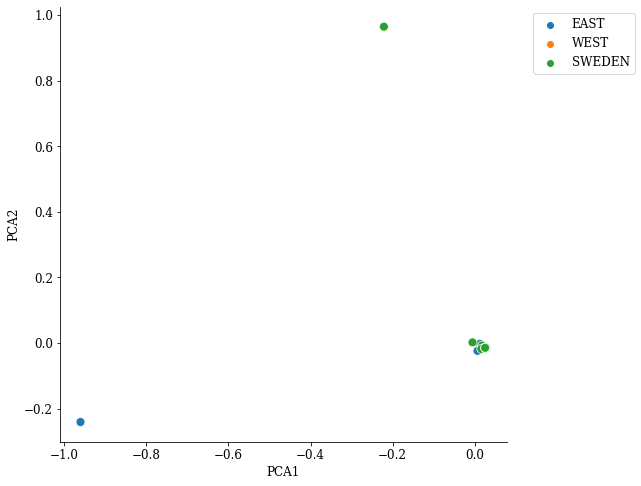

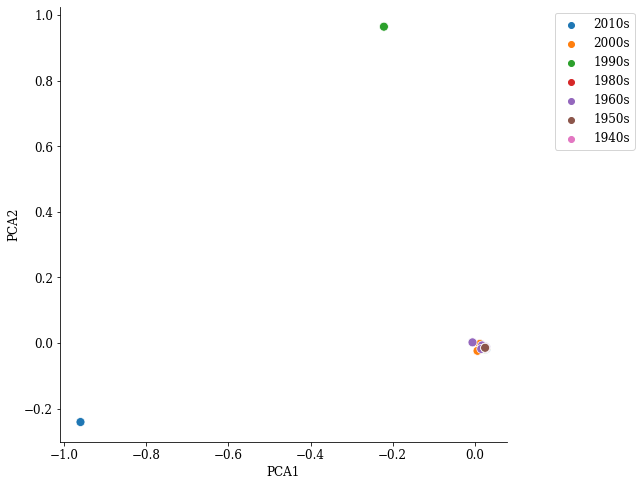

In [28]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()


# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

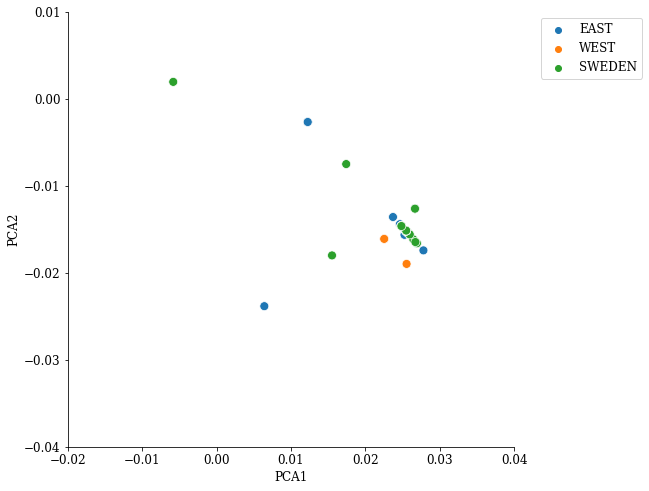

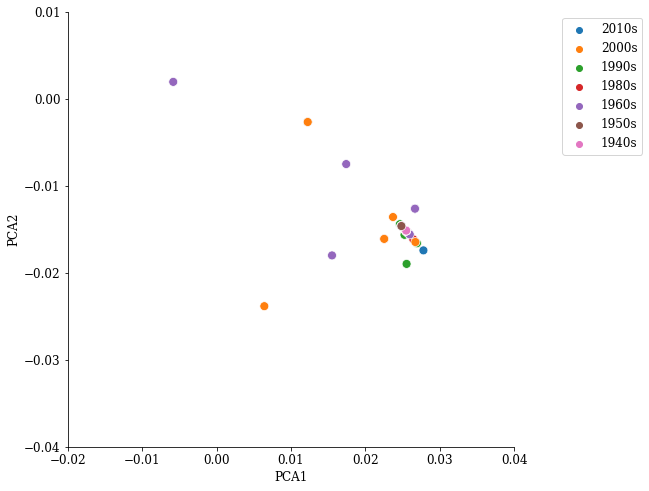

In [33]:
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.02,0.04)
plt.ylim(-0.04,0.01)
plt.show()

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.02,0.04)
plt.ylim(-0.04,0.01)
plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=80, palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine()
#ml.rcParams['figure.figsize'] = (8.0, 8.0)
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.xlim(-0.02,0.04)
#plt.ylim(-0.04,0.01)
#plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=80, palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine()
#ml.rcParams['figure.figsize'] = (8.0, 8.0)
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.xlim(0.02,0.04)
#plt.ylim(-0.02,-0.01)
#plt.show()

### Removing outliers

In [40]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/CallingQC/britomartis_all_mcaller.HQ.miss0.GQextra.filteredNPASS.autosomes.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})


df

1      PCA1      PCA2         4         5  \
0     BAJK_1_2016_BAJK_1_2016  0.014051  0.013905  0.011938 -0.022545   
1     KAZA_1_2006_KAZA_1_2006  0.015056  0.011627  0.012429 -0.021898   
2     SLOV_1_1990_SLOV_1_1990  0.047925  0.064672  0.009722  0.118450   
3     URAL_2_1995_URAL_2_1995  0.030309  0.034255  0.035109  0.009594   
4     RUSS_4_2008_RUSS_4_2008  0.014015  0.014831  0.012880 -0.018953   
5     JAPA_1_1994_JAPA_1_1994  0.014322  0.014457  0.010655 -0.021687   
6     CHEH_1_1989_CHEH_1_1989  0.053456  0.062357  0.127686  0.921081   
7     RUSS_1_1998_RUSS_1_1998  0.016143  0.040537  0.037743 -0.147474   
8     STOC_6_1965_STOC_6_1965  0.015330  0.013592  0.013084 -0.021885   
9     VAST_1_1983_VAST_1_1983  0.021772  0.060668 -0.977579  0.087647   
10    SMAL_4_1996_SMAL_4_1996  0.015163  0.012793  0.011222 -0.021497   
11    RUSS_3_1999_RUSS_3_1999  0.033833  0.034725  0.047464  0.003730   
12    BAJK_2_2016_BAJK_2_2016  0.019942  0.023489  0.037047 -0.196483   
13    SMAL_5_1998_SMAL_5_1998  0.013958  0.013543  0.010858 -0.021268   
14    JAPA_2_1994_JAPA_2_1994  0.020600  0.022791  0.024579 -0.006144   
15    KALM_9_1981_KALM_9_1981 -0.985786 -0.057592  0.002586  0.038829   
16    KRAS_3_2002_KRAS_3_2002  0.037721  0.043779  0.042978  0.038696   
17    KALM_1_2018_KALM_1_2018  0.024368  0.020046  0.029916  0.004288   
18  KALM_10_1983_KALM_10_1983  0.083805 -0.981364 -0.027735  0.041365   
19    ALTA_1_2015_ALTA_1_2015  0.025405  0.052881  0.078481  0.026258   
20    RUSS_5_2008_RUSS_5_2008  0.035017  0.040194  0.060447 -0.196280   
21    POLA_2_2003_POLA_2_2003  0.032028  0.043605  0.034015  0.023695   
22    KRAS_1_2002_KRAS_1_2002  0.014445  0.013123  0.011889 -0.021769   
23    BELA_1_2004_BELA_1_2004  0.022176  0.020314  0.018017 -0.004472   
24    KAZA_2_2006_KAZA_2_2006  0.027691  0.046211  0.044236 -0.108829   
25    GAST_6_1965_GAST_6_1965  0.013288  0.012179  0.010045 -0.018560   
26    STOC_4_1965_STOC_4_1965  0.014361  0.013881  0.011980 -0.018692   
27  GAST_14_1969_GAST_14_1969  0.014459  0.013165  0.011740 -0.020397   
28    UPPS_1_1951_UPPS_1_1951  0.013626  0.013095  0.011104 -0.019736   
29    KALM_3_1955_KALM_3_1955  0.013922  0.013412  0.011638 -0.016386   
30    GAST_4_1941_GAST_4_1941  0.013185  0.012669  0.010639 -0.018741   
31    KALM_5_1961_KALM_5_1961  0.012398  0.013468  0.011609 -0.020617   
32    GAST_2_1941_GAST_2_1941  0.012526  0.012821  0.011016 -0.017468   
33    UPPS_3_1969_UPPS_3_1969  0.012782  0.013145  0.011806 -0.019797   
34  GAST_10_1965_GAST_10_1965  0.012668  0.012365  0.010945 -0.019073   
35    SMAL_2_1967_SMAL_2_1967  0.013947  0.013410  0.011427 -0.020303   
36    STOC_2_1965_STOC_2_1965  0.012087  0.013097  0.011261 -0.019877   
37    GAST_7_1965_GAST_7_1965  0.013475  0.012442  0.010911 -0.019236   
38  GAST_11_1965_GAST_11_1965  0.013350  0.011334  0.010690 -0.018807   
39  GAST_12_1969_GAST_12_1969  0.013967  0.013536  0.011567 -0.019792   
40    DALA_1_1965_DALA_1_1965  0.013980  0.012064  0.009422 -0.019407   
41    SMAL_3_1967_SMAL_3_1967  0.014067  0.013589  0.011722 -0.019704   
42    STOC_5_1965_STOC_5_1965  0.014726  0.013516  0.012249 -0.021003   
43    KALM_6_1961_KALM_6_1961  0.013544  0.012127  0.011039 -0.019003   
44    GAST_1_1941_GAST_1_1941  0.012927  0.011761  0.011010 -0.017100   
45    KALM_8_1969_KALM_8_1969  0.014047  0.013470  0.012235 -0.020117   
46    KALM_2_1955_KALM_2_1955  0.012523  0.012967  0.010850 -0.020092   
47    GAST_3_1941_GAST_3_1941  0.013994  0.012213  0.011360 -0.020493   
48    GAST_5_1943_GAST_5_1943  0.013483  0.012406  0.010877 -0.019202   
49    UPPS_2_1958_UPPS_2_1958  0.013922  0.012428  0.011195 -0.018847   

           6         7         8         9        10  ...        17        18  \
0  -0.010359  0.008156 -0.001576  0.002303  0.014373  ...  0.031716 -0.028353   
1  -0.008720  0.010197 -0.001125  0.001777  0.013107  ...  0.034649 -0.035561   
2   0.734613 -0.583947 -0.215384 -0.017143 -0.025018  ...  0.

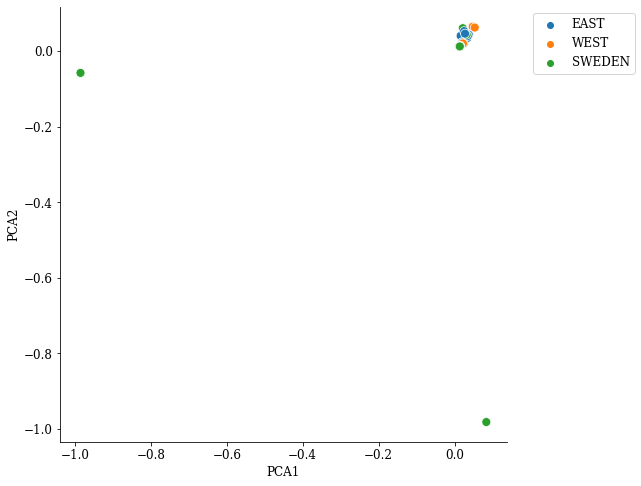

In [41]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

### Plus MAF filter

In [43]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/CallingQC/britomartis_all_mcaller.HQ.miss0.GQfiltered.MAF.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})


df

1      PCA1      PCA2         4         5  \
0     BAJK_1_2016_BAJK_1_2016 -0.053553  0.174989 -0.222163  0.064500   
1     KAZA_1_2006_KAZA_1_2006 -0.059408  0.215673 -0.167025  0.061387   
2     SLOV_1_1990_SLOV_1_1990  0.230285 -0.030180  0.000407 -0.050979   
3     URAL_2_1995_URAL_2_1995  0.228903 -0.072177  0.031448 -0.113962   
4     RUSS_4_2008_RUSS_4_2008 -0.058573  0.344691 -0.136582  0.074581   
5     JAPA_1_1994_JAPA_1_1994 -0.012878  0.263373 -0.084092 -0.003998   
6     CHEH_1_1989_CHEH_1_1989  0.230827 -0.030641  0.037559 -0.035140   
7     RUSS_1_1998_RUSS_1_1998  0.143657  0.072986  0.046970  0.159753   
8     STOC_6_1965_STOC_6_1965 -0.034117  0.288290 -0.058758  0.046928   
9     VAST_1_1983_VAST_1_1983  0.189913 -0.000440  0.022879  0.070244   
10    SMAL_4_1996_SMAL_4_1996 -0.041626  0.363870 -0.126473  0.091657   
11    RUSS_3_1999_RUSS_3_1999  0.236827 -0.036583  0.022402 -0.090342   
12    BAJK_2_2016_BAJK_2_2016  0.128805  0.045771  0.027866  0.173396   
13    SMAL_5_1998_SMAL_5_1998 -0.054724  0.174180 -0.242582  0.023309   
14    JAPA_2_1994_JAPA_2_1994  0.167596 -0.120518 -0.134619 -0.097016   
15    KALM_9_1981_KALM_9_1981  0.174607  0.016688  0.047566  0.049028   
16    KRAS_3_2002_KRAS_3_2002  0.238093 -0.059307  0.011847 -0.048840   
17    KALM_1_2018_KALM_1_2018  0.217852 -0.086539 -0.002893 -0.106258   
18  KALM_10_1983_KALM_10_1983  0.166328  0.009271  0.068847  0.067415   
19    ALTA_1_2015_ALTA_1_2015  0.211043 -0.084057  0.014062 -0.102772   
20    RUSS_5_2008_RUSS_5_2008  0.124649  0.041899  0.013581  0.194445   
21    POLA_2_2003_POLA_2_2003  0.241655 -0.048239  0.016546 -0.065140   
22    KRAS_1_2002_KRAS_1_2002 -0.060151  0.113356  0.109291  0.318815   
23    BELA_1_2004_BELA_1_2004  0.183051 -0.095728 -0.088447 -0.022613   
24    KAZA_2_2006_KAZA_2_2006  0.133008  0.075995  0.039159  0.141562   
25    GAST_6_1965_GAST_6_1965 -0.131827 -0.134780 -0.021405  0.091814   
26    STOC_4_1965_STOC_4_1965 -0.108171 -0.019757  0.125368  0.098118   
27  GAST_14_1969_GAST_14_1969 -0.105679  0.045482  0.171694 -0.080580   
28    UPPS_1_1951_UPPS_1_1951 -0.104578 -0.220177 -0.164723 -0.007938   
29    KALM_3_1955_KALM_3_1955 -0.124917 -0.126207  0.044399  0.079075   
30    GAST_4_1941_GAST_4_1941 -0.124956 -0.107793  0.059677  0.103702   
31    KALM_5_1961_KALM_5_1961 -0.097964  0.072053  0.308424 -0.217585   
32    GAST_2_1941_GAST_2_1941 -0.111461 -0.218884 -0.148735  0.001474   
33    UPPS_3_1969_UPPS_3_1969 -0.113479  0.076083 -0.196256 -0.435594   
34  GAST_10_1965_GAST_10_1965 -0.112853 -0.213191 -0.156446  0.017054   
35    SMAL_2_1967_SMAL_2_1967 -0.106473  0.084181  0.323007 -0.182952   
36    STOC_2_1965_STOC_2_1965 -0.105579 -0.032352  0.065190  0.086731   
37    GAST_7_1965_GAST_7_1965 -0.117047 -0.220370 -0.151554  0.016428   
38  GAST_11_1965_GAST_11_1965 -0.124052 -0.134878  0.002383  0.031982   
39  GAST_12_1969_GAST_12_1969 -0.113906 -0.027373  0.123491  0.146698   
40    DALA_1_1965_DALA_1_1965 -0.119575 -0.175396 -0.071819 -0.009409   
41    SMAL_3_1967_SMAL_3_1967 -0.105045  0.044596 -0.220232 -0.112698   
42    STOC_5_1965_STOC_5_1965 -0.110405 -0.001967  0.143861  0.106880   
43    KALM_6_1961_KALM_6_1961 -0.122235 -0.159240 -0.059537  0.064666   
44    GAST_1_1941_GAST_1_1941 -0.124680 -0.190280 -0.080714  0.038119   
45    KALM_8_1969_KALM_8_1969 -0.102593  0.099550  0.355343 -0.191738   
46    KALM_2_1955_KALM_2_1955 -0.116546 -0.009692  0.144840  0.154836   
47    GAST_3_1941_GAST_3_1941 -0.119387  0.040677  0.303667 -0.236987   
48    GAST_5_1943_GAST_5_1943 -0.139731 -0.116486  0.038624  0.073826   
49    UPPS_2_1958_UPPS_2_1958 -0.108929  0.109578 -0.185347 -0.435883   

           6         7         8         9        10  ...        17        18  \
0  -0.191395  0.095241  0.140628 -0.101946 -0.039426  ...  0.147095 -0.071577   
1  -0.225723  0.065099  0.091240 -0.124988 -0.130381  ... -0.126812  0.245240   
2   0.018227 -0.070017 -0.050689  0.066386 -0.027139  ...  0.

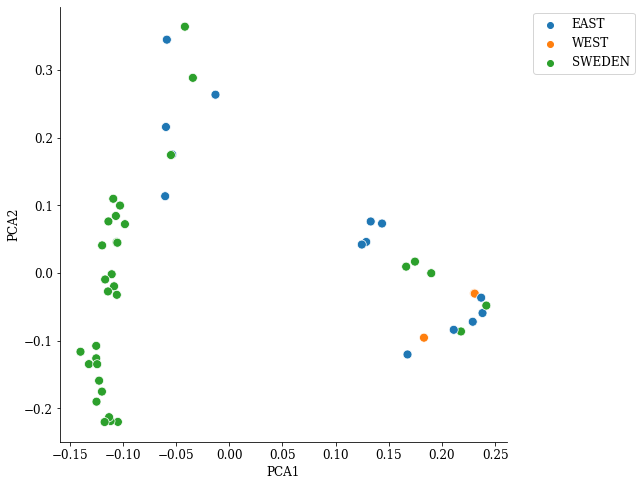

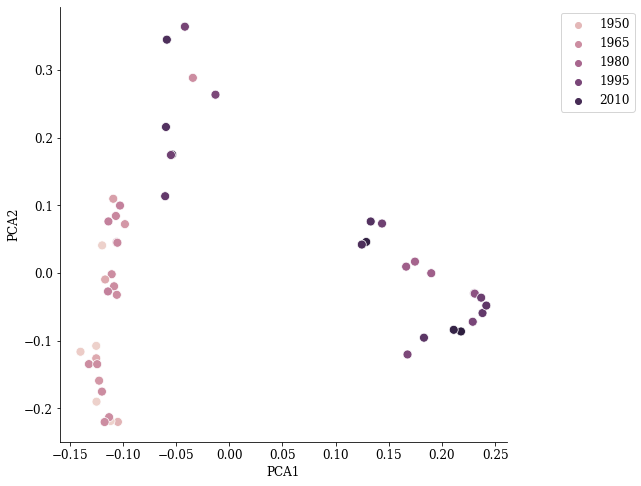

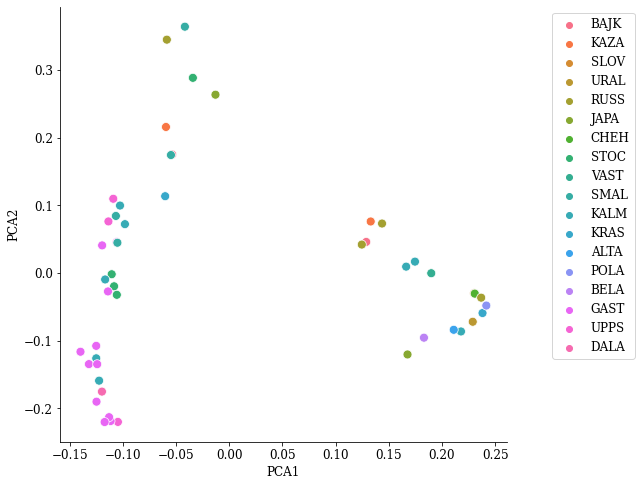

In [46]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Year'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

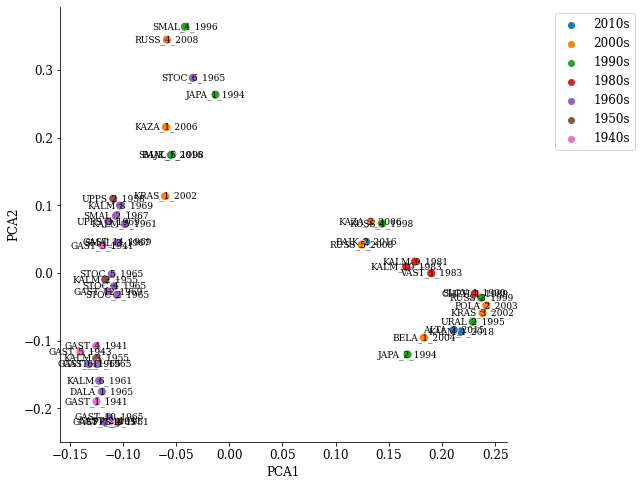

In [56]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

for i in range(len(df)):
    if -0.15 < df['PCA1'][i] < 0.28:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=9)  

# Show the plot
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.HQ.miss0.GQfiltered.MAF.PCA.pdf",bbox_inches="tight")
plt.show()

## Metadata adding development

In [87]:
import pandas as pd

# Sample dataframe
data = {
    'A': [1, 2, 3, 4],
    'B': ['KAZA_1_2006_KAZA_1_2006', 'SLOV_1_1990_SLOV_1_1990', 'URAL_2_1995_URAL_2_1995', 'RUSS_4_2008_RUSS_4_2008'],
    'Last': ['KAZA', 'SLOV', 'URAL', 'RUSS']
}

df = pd.DataFrame(data)

# Categorization dictionary
category_dict = {
    'KAZA': 'CENTRAL',
    'SLOV': 'WEST',
    'URAL': 'EAST',
    'RUSS': 'EAST'
}

# Create the new column
df['Category'] = df['Last'].map(category_dict)

print(df)

   A                        B  Last Category
0  1  KAZA_1_2006_KAZA_1_2006  KAZA  CENTRAL
1  2  SLOV_1_1990_SLOV_1_1990  SLOV     WEST
2  3  URAL_2_1995_URAL_2_1995  URAL     EAST
3  4  RUSS_4_2008_RUSS_4_2008  RUSS     EAST


In [12]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss20.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

1         2         3         4         5         6  \
0   BAJK_1_2016_BAJK_1_2016 -0.065484 -0.000880 -0.051408 -0.036077  0.017175   
1   KAZA_1_2006_KAZA_1_2006 -0.071009 -0.002774 -0.054913 -0.037967  0.018390   
2   SLOV_1_1990_SLOV_1_1990 -0.059085 -0.032594  0.187884  0.132751 -0.060703   
3   URAL_2_1995_URAL_2_1995 -0.054745 -0.028753  0.174404  0.123287 -0.057473   
4   RUSS_4_2008_RUSS_4_2008 -0.078534 -0.005518 -0.046994 -0.034117  0.018024   
..                      ...       ...       ...       ...       ...       ...   
68  KALM_4_1957_KALM_4_1957  0.317591 -0.564413 -0.476783  0.573775  0.042471   
69  GAST_3_1941_GAST_3_1941 -0.064753  0.001886 -0.075042 -0.051006  0.022479   
70  ITAL_1_1946_ITAL_1_1946  0.205541 -0.208961  0.033410 -0.195269 -0.028559   
71  GAST_5_1943_GAST_5_1943 -0.063599  0.005297 -0.085498 -0.056019  0.023562   
72  UPPS_2_1958_UPPS_2_1958 -0.063746  0.002366 -0.072182 -0.049318  0.022086   

           7         8         9        10  ...        14        15        16  \
0   0.012470  0.005862  0.012934 -0.008651  ...  0.003877  0.146554 -0.020154   
1   0.016598  0.009504  0.019736 -0.009173  ...  0.006368  0.200449 -0.029309   
2  -0.011963 -0.008197 -0.148635 -0.032952  ... -0.002195  0.179281  0.117884   
3  -0.015103 -0.011880 -0.214190 -0.045517  ...  0.003457 -0.076507 -0.031761   
4   0.023592  0.012632  0.033834 -0.012505  ...  0.007195  0.281592 -0.040521   
..       ...       ...       ...       ...  ...       ...       ...       ...   
68  0.076819 -0.020387 -0.007039  0.000672  ...  0.000159  0.005640 -0.001264   
69  0.009122  0.004132 -0.014757  0.011310  ...  0.001511  0.009972 -0.005402   
70 -0.920847 -0.076755  0.037369 -0.005350  ...  0.003575  0.052993 -0.007990   
71  0.004912  0.002060 -0.032629  0.019260  ... -0.001449 -0.081193  0.010282   
72  0.008403  0.003247 -0.012467  0.007093  ...  0.002230  0.078876 -0.012323   

          17        18        19        20        21           ID  popID  
0   0.011742  0.085141 -0.012962  0.000419  0.023468  BAJK_1_2016   BAJK  
1   0.018029  0.114191 -0.017339  0.000973  0.030681  KAZA_1_2006   KAZA  
2  -0.750241 -0.280879 -0.441026 -0.023138  0.075672  SLOV_1_1990   SLOV  
3   0.187045  0.040363 -0.041425 -0.122991  0.373872  URAL_2_1995   URAL  
4   0.023267  0.155848 -0.021328  0.001796  0.039637  RUSS_4_2008   RUSS  
..       ...       ...       ...       ...       ...          ...    ...  
68  0.001175 -0.000230 -0.000319  0.000691 -0.000818  KALM_4_1957   KALM  
69  0.003264 -0.005669  0.003177 -0.002207 -0.003416  GAST_3_1941   GAST  
70  0.006023  0.016146 -0.003121 -0.000043  0.002142  ITAL_1_1946   ITAL  
71 -0.006406 -0.056900  0.009970 -0.002147 -0.017574  GAST_5_1943   GAST  
72 -0.000208  0.041125 -0.012863  0.001047  0.008121  UPPS_2_1958   UPPS  

[73 rows x 23 columns]

In [13]:
unique_values = df.iloc[:, -1].unique()
print(unique_values)

['BAJK' 'KAZA' 'SLOV' 'URAL' 'RUSS' 'JAPA' 'CHEH' 'KRAS' 'STOC' 'VAST'
 'SMAL' 'ALTA' 'KALM' 'POLA' 'VORO' 'BELA' 'GAST' 'UPPS' 'DALA' 'ITAL']


In [44]:
# Categorization dictionary
age_dict = {
    '1940s': 'hist',
    '1950s': 'hist',
    '1960s': 'hist',
    '1980s': 'hist',
    '1990s': 'cont',
    '2000s': 'cont',
    '2010s': 'cont'
}

df['Age'] = df['Decade'].map(age_dict)

age_dict

df

1      PCA1      PCA2         4         5  \
0     STOC_6_1965_STOC_6_1965  0.033609 -0.036993  0.008816  0.289296   
1     VAST_1_1983_VAST_1_1983  0.026072 -0.022169 -0.006038  0.141976   
2     SMAL_4_1996_SMAL_4_1996  0.033754 -0.037640  0.010623  0.308735   
3     SMAL_5_1998_SMAL_5_1998  0.033516 -0.037065  0.010405  0.280594   
4     VAST_3_2005_VAST_3_2005 -0.109335  0.635593  0.223801  0.006084   
5     KALM_9_1981_KALM_9_1981  0.030774 -0.034309  0.004313  0.106527   
6     KALM_1_2018_KALM_1_2018  0.030261 -0.042654  0.010700 -0.007616   
7     SMAL_6_2013_SMAL_6_2013 -0.108593  0.648000  0.228684  0.005009   
8   KALM_10_1983_KALM_10_1983  0.029888 -0.035554  0.004966  0.114469   
9     VAST_2_1999_VAST_2_1999 -0.051788  0.286488 -0.943815 -0.012950   
10    GAST_6_1965_GAST_6_1965  0.033188 -0.039357  0.013785 -0.100498   
11    STOC_4_1965_STOC_4_1965  0.023818 -0.007921  0.018241 -0.070091   
12  GAST_14_1969_GAST_14_1969  0.034665 -0.043418  0.013729 -0.100761   
13    UPPS_1_1951_UPPS_1_1951  0.033507 -0.039369  0.014603 -0.112255   
14    KALM_3_1955_KALM_3_1955  0.034364 -0.042675  0.014163 -0.097790   
15    GAST_4_1941_GAST_4_1941  0.033987 -0.042038  0.013799 -0.093430   
16    KALM_5_1961_KALM_5_1961  0.033733 -0.040735  0.014140 -0.103612   
17    GAST_2_1941_GAST_2_1941  0.031487 -0.034314  0.015269 -0.102138   
18    UPPS_3_1969_UPPS_3_1969  0.032592 -0.034613  0.009623  0.275375   
19    KALM_7_1961_KALM_7_1961  0.033831 -0.037824  0.010716  0.308256   
20  GAST_10_1965_GAST_10_1965  0.031957 -0.034153  0.013182 -0.106812   
21    SMAL_2_1967_SMAL_2_1967  0.033252 -0.039986  0.013516 -0.093524   
22    STOC_2_1965_STOC_2_1965  0.022228 -0.010147  0.007902 -0.083882   
23    GAST_7_1965_GAST_7_1965  0.033948 -0.040830  0.014325 -0.108772   
24  GAST_11_1965_GAST_11_1965  0.033852 -0.041338  0.013899 -0.092737   
25  GAST_12_1969_GAST_12_1969  0.034126 -0.042101  0.013336 -0.089713   
26    STOC_3_1965_STOC_3_1965  0.030018 -0.024586  0.021084 -0.103827   
27    DALA_1_1965_DALA_1_1965  0.033598 -0.039966  0.014896 -0.111357   
28    SMAL_3_1967_SMAL_3_1967  0.033480 -0.037137  0.010457  0.277334   
29    STOC_5_1965_STOC_5_1965  0.019919 -0.002978  0.015274 -0.115443   
30    KALM_6_1961_KALM_6_1961  0.033408 -0.040869  0.013609 -0.099425   
31  GAST_13_1969_GAST_13_1969  0.028669 -0.021983  0.013701 -0.109777   
32    GAST_1_1941_GAST_1_1941  0.033899 -0.040411  0.014932 -0.101848   
33    KALM_8_1969_KALM_8_1969  0.033422 -0.040582  0.013778 -0.094924   
34    GAST_8_1965_GAST_8_1965  0.032974 -0.037539  0.014859 -0.101278   
35    KALM_2_1955_KALM_2_1955  0.034283 -0.042703  0.013530 -0.101091   
36    GAST_9_1965_GAST_9_1965  0.028556 -0.028968  0.014435 -0.110108   
37    SMAL_1_1967_SMAL_1_1967  0.033644 -0.037533  0.010583  0.306183   
38    STOC_1_1965_STOC_1_1965  0.029385 -0.029931  0.012417 -0.102444   
39    KALM_4_1957_KALM_4_1957 -0.966271 -0.206311  0.015413  0.002260   
40    GAST_3_1941_GAST_3_1941  0.034501 -0.043310  0.014212 -0.100881   
41    GAST_5_1943_GAST_5_1943  0.034354 -0.042785  0.013422 -0.092112   
42    UPPS_2_1958_UPPS_2_1958  0.033445 -0.036651  0.009587  0.288719   

           6         7         8         9        10  ...        18        19  \
0  -0.009345 -0.082857 -0.063043 -0.005537 -0.007055  ...  0.240504  0.066768   
1   0.129502  0.935116 -0.247230  0.025541 -0.019291  ...  0.000483 -0.003667   
2  -0.010469 -0.093078 -0.074508 -0.008241 -0.008276  ... -0.407183 -0.130667   
3  -0.009363 -0.082637 -0.063670 -0.006424 -0.003478  ...  0.138482  0.039618   
4  -0.707656  0.087912 -0.009868  0.032178 -0.020141  ... -0.004086  0.006504   
5   0.002506  0.111525  0.541024  0.011630 -0.008041  ... -0.008859 -0.014888   
6   0.001200  0.010493  0.027019  0.032148  0.399737  ...  0.005344  0.013920   
7   0.693444 -0.098917  0.013584  0.037621  0.007882  ... -0.002988  0.002301   
8   0.010517  0.145774  0.770144  0.015289 -0.067213  ...  0.001537  0.002843   
9  -0

In [107]:
category_dict = {
'KAZA': 'EAST',
 'SLOV': 'WEST',
 'URAL': 'EAST',
 'RUSS': 'EAST',
 'BAJK': 'EAST',
 'JAPA': 'EAST',
 'CHEH': 'WEST',
 'KRAS': 'EAST',
 'STOC': 'SWEDEN',
 'VAST': 'SWEDEN',
 'SMAL': 'SWEDEN',
 'ALTA': 'EAST',
 'KALM': 'SWEDEN',
 'POLA': 'SWEDEN',
 'VORO': 'WEST',
 'BELA': 'WEST',
 'GAST': 'SWEDEN',
 'UPPS': 'SWEDEN',
 'DALA': 'SWEDEN',
 'ITAL': 'WEST'}

In [19]:
df['Category'] = df['popID'].map(category_dict)

df

1         2         3         4         5         6  \
0   BAJK_1_2016_BAJK_1_2016 -0.065484 -0.000880 -0.051408 -0.036077  0.017175   
1   KAZA_1_2006_KAZA_1_2006 -0.071009 -0.002774 -0.054913 -0.037967  0.018390   
2   SLOV_1_1990_SLOV_1_1990 -0.059085 -0.032594  0.187884  0.132751 -0.060703   
3   URAL_2_1995_URAL_2_1995 -0.054745 -0.028753  0.174404  0.123287 -0.057473   
4   RUSS_4_2008_RUSS_4_2008 -0.078534 -0.005518 -0.046994 -0.034117  0.018024   
..                      ...       ...       ...       ...       ...       ...   
68  KALM_4_1957_KALM_4_1957  0.317591 -0.564413 -0.476783  0.573775  0.042471   
69  GAST_3_1941_GAST_3_1941 -0.064753  0.001886 -0.075042 -0.051006  0.022479   
70  ITAL_1_1946_ITAL_1_1946  0.205541 -0.208961  0.033410 -0.195269 -0.028559   
71  GAST_5_1943_GAST_5_1943 -0.063599  0.005297 -0.085498 -0.056019  0.023562   
72  UPPS_2_1958_UPPS_2_1958 -0.063746  0.002366 -0.072182 -0.049318  0.022086   

           7         8         9        10  ...        15        16        17  \
0   0.012470  0.005862  0.012934 -0.008651  ...  0.146554 -0.020154  0.011742   
1   0.016598  0.009504  0.019736 -0.009173  ...  0.200449 -0.029309  0.018029   
2  -0.011963 -0.008197 -0.148635 -0.032952  ...  0.179281  0.117884 -0.750241   
3  -0.015103 -0.011880 -0.214190 -0.045517  ... -0.076507 -0.031761  0.187045   
4   0.023592  0.012632  0.033834 -0.012505  ...  0.281592 -0.040521  0.023267   
..       ...       ...       ...       ...  ...       ...       ...       ...   
68  0.076819 -0.020387 -0.007039  0.000672  ...  0.005640 -0.001264  0.001175   
69  0.009122  0.004132 -0.014757  0.011310  ...  0.009972 -0.005402  0.003264   
70 -0.920847 -0.076755  0.037369 -0.005350  ...  0.052993 -0.007990  0.006023   
71  0.004912  0.002060 -0.032629  0.019260  ... -0.081193  0.010282 -0.006406   
72  0.008403  0.003247 -0.012467  0.007093  ...  0.078876 -0.012323 -0.000208   

          18        19        20        21           ID  popID  Category  
0   0.085141 -0.012962  0.000419  0.023468  BAJK_1_2016   BAJK      EAST  
1   0.114191 -0.017339  0.000973  0.030681  KAZA_1_2006   KAZA      EAST  
2  -0.280879 -0.441026 -0.023138  0.075672  SLOV_1_1990   SLOV      WEST  
3   0.040363 -0.041425 -0.122991  0.373872  URAL_2_1995   URAL      EAST  
4   0.155848 -0.021328  0.001796  0.039637  RUSS_4_2008   RUSS      EAST  
..       ...       ...       ...       ...          ...    ...       ...  
68 -0.000230 -0.000319  0.000691 -0.000818  KALM_4_1957   KALM    SWEDEN  
69 -0.005669  0.003177 -0.002207 -0.003416  GAST_3_1941   GAST    SWEDEN  
70  0.016146 -0.003121 -0.000043  0.002142  ITAL_1_1946   ITAL      WEST  
71 -0.056900  0.009970 -0.002147 -0.017574  GAST_5_1943   GAST    SWEDEN  
72  0.041125 -0.012863  0.001047  0.008121  UPPS_2_1958   UPPS    SWEDEN  

[73 rows x 24 columns]

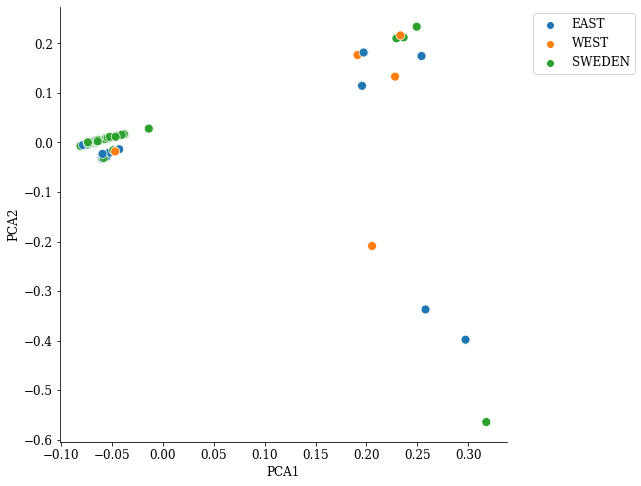

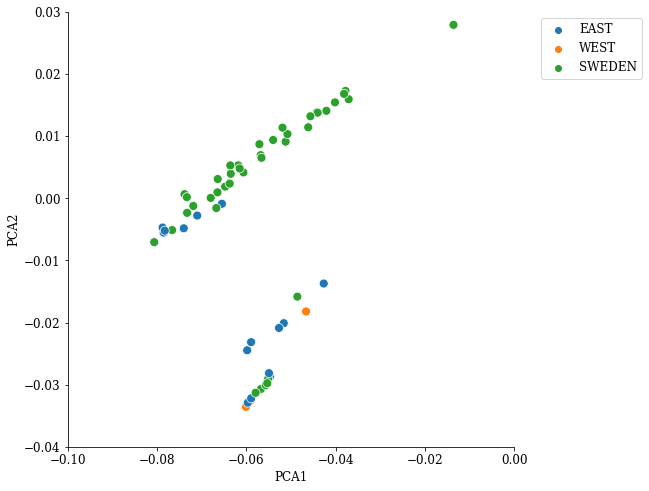

In [36]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

In [26]:
df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})

df

1      PCA1      PCA2         4         5         6  \
0   BAJK_1_2016_BAJK_1_2016 -0.065484 -0.000880 -0.051408 -0.036077  0.017175   
1   KAZA_1_2006_KAZA_1_2006 -0.071009 -0.002774 -0.054913 -0.037967  0.018390   
2   SLOV_1_1990_SLOV_1_1990 -0.059085 -0.032594  0.187884  0.132751 -0.060703   
3   URAL_2_1995_URAL_2_1995 -0.054745 -0.028753  0.174404  0.123287 -0.057473   
4   RUSS_4_2008_RUSS_4_2008 -0.078534 -0.005518 -0.046994 -0.034117  0.018024   
..                      ...       ...       ...       ...       ...       ...   
68  KALM_4_1957_KALM_4_1957  0.317591 -0.564413 -0.476783  0.573775  0.042471   
69  GAST_3_1941_GAST_3_1941 -0.064753  0.001886 -0.075042 -0.051006  0.022479   
70  ITAL_1_1946_ITAL_1_1946  0.205541 -0.208961  0.033410 -0.195269 -0.028559   
71  GAST_5_1943_GAST_5_1943 -0.063599  0.005297 -0.085498 -0.056019  0.023562   
72  UPPS_2_1958_UPPS_2_1958 -0.063746  0.002366 -0.072182 -0.049318  0.022086   

           7         8         9        10  ...        17        18        19  \
0   0.012470  0.005862  0.012934 -0.008651  ...  0.011742  0.085141 -0.012962   
1   0.016598  0.009504  0.019736 -0.009173  ...  0.018029  0.114191 -0.017339   
2  -0.011963 -0.008197 -0.148635 -0.032952  ... -0.750241 -0.280879 -0.441026   
3  -0.015103 -0.011880 -0.214190 -0.045517  ...  0.187045  0.040363 -0.041425   
4   0.023592  0.012632  0.033834 -0.012505  ...  0.023267  0.155848 -0.021328   
..       ...       ...       ...       ...  ...       ...       ...       ...   
68  0.076819 -0.020387 -0.007039  0.000672  ...  0.001175 -0.000230 -0.000319   
69  0.009122  0.004132 -0.014757  0.011310  ...  0.003264 -0.005669  0.003177   
70 -0.920847 -0.076755  0.037369 -0.005350  ...  0.006023  0.016146 -0.003121   
71  0.004912  0.002060 -0.032629  0.019260  ... -0.006406 -0.056900  0.009970   
72  0.008403  0.003247 -0.012467  0.007093  ... -0.000208  0.041125 -0.012863   

          20        21           ID  popID  Category  Year  Decade  
0   0.000419  0.023468  BAJK_1_2016   BAJK      EAST  2016   2010s  
1   0.000973  0.030681  KAZA_1_2006   KAZA      EAST  2006   2000s  
2  -0.023138  0.075672  SLOV_1_1990   SLOV      WEST  1990   1990s  
3  -0.122991  0.373872  URAL_2_1995   URAL      EAST  1995   1990s  
4   0.001796  0.039637  RUSS_4_2008   RUSS      EAST  2008   2000s  
..       ...       ...          ...    ...       ...   ...     ...  
68  0.000691 -0.000818  KALM_4_1957   KALM    SWEDEN  1957   1950s  
69 -0.002207 -0.003416  GAST_3_1941   GAST    SWEDEN  1941   1940s  
70 -0.000043  0.002142  ITAL_1_1946   ITAL      WEST  1946   1940s  
71 -0.002147 -0.017574  GAST_5_1943   GAST    SWEDEN  1943   1940s  
72  0.001047  0.008121  UPPS_2_1958   UPPS    SWEDEN  1958   1950s  

[73 rows x 26 columns]

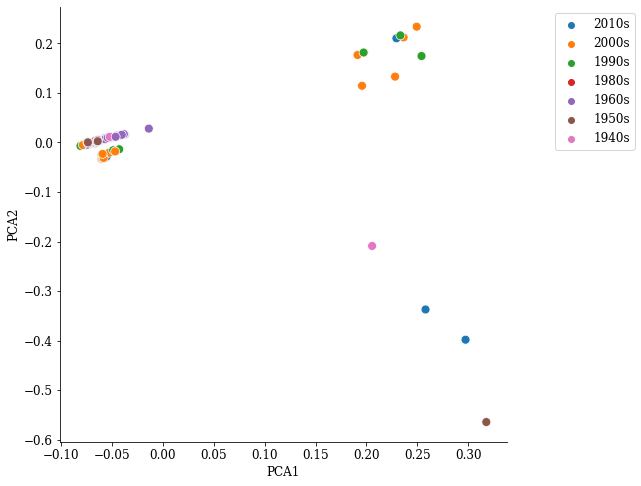

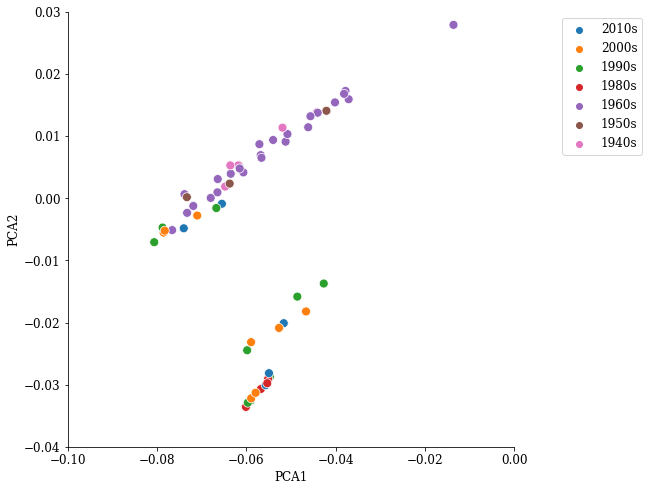

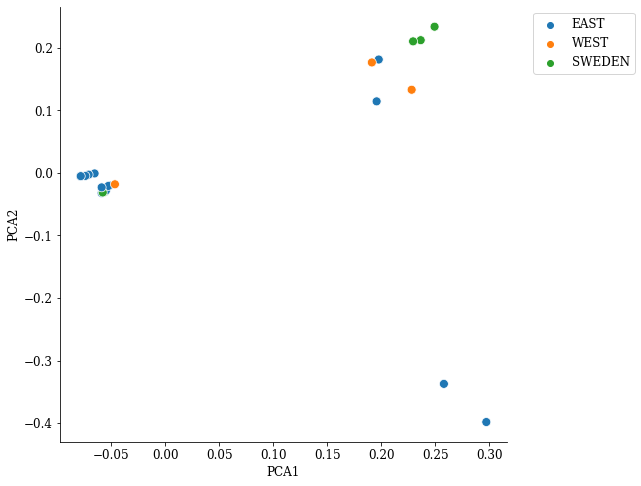

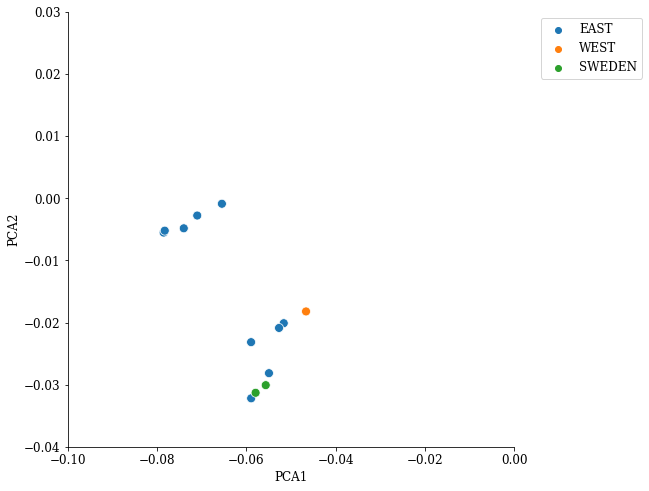

In [32]:
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()


sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()


filtered_df = df[df['Decade'].isin(['2000s', '2010s'])]
sns.scatterplot(x=filtered_df["PCA1"], y=filtered_df["PCA2"], hue=filtered_df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


filtered_df = df[df['Decade'].isin(['2000s', '2010s'])]
sns.scatterplot(x=filtered_df["PCA1"], y=filtered_df["PCA2"], hue=filtered_df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)
plt.show()

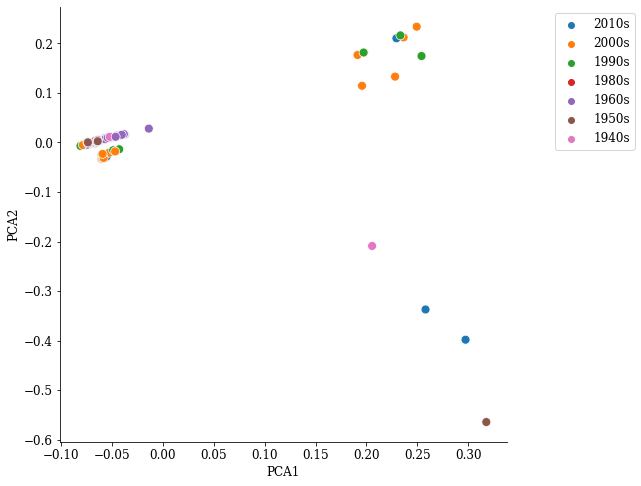

In [33]:
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

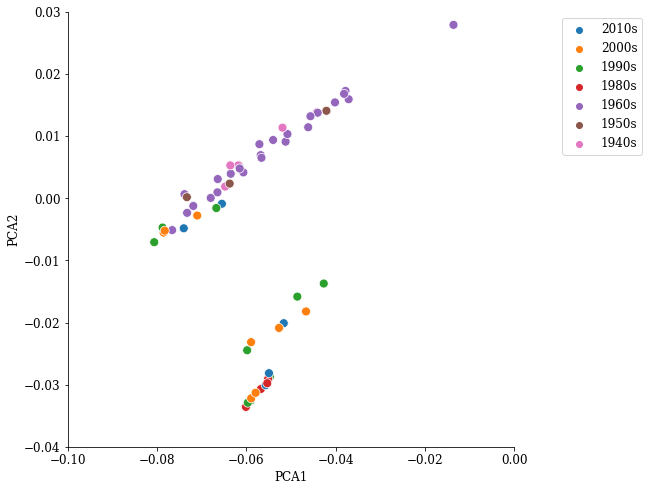

In [37]:
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

# Full call extended QC

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

def generate_lists(from_chr,till_chr):
    color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]
    #label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
    file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]

    
def plot_quality_distribution(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.xlabel("Quality")
        plt.ylabel("Count")
        plt.title("Full Distribution of Quality Scores")
        sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)

    #plt.legend()
    plt.show()

def plot_quality_scores_below_200(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.xlabel("Quality")
        plt.ylabel("Count")
        plt.title("Quality Scores below 200")
        qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
        plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
        mean_qual = np.mean(var_qual["qual"])

    plt.show()


def plot_quality_scores_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Quality Scores Along the Chromosome")
        
    plt.legend()
    plt.show()

def plot_quality_scores_along_chromosome2(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
        
        plt.plot(var_qual['pos'],var_qual['qual'])
        #plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Quality Scores Along the Chromosome")
        
    plt.legend()
    plt.show()   


def plot_mean_depth(file_paths_gen, color_list,label_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                                names=["chr", "pos", "mean_depth", "var_depth"])
        sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3, label=label_list[i])
        plt.xlabel("Mean Depth")
        plt.ylabel("Count")
        plt.title("Mean Depth")
    plt.show()
    
    
def plot_depth_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Depth Along the Chromosome")
        
    plt.legend()
    plt.show()

def plot_mean_depth_100(file_paths_gen, color_list):    
    for i, file_path_gen in enumerate(file_paths_gen): 
        var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
        var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
        plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
        mean_depth = np.mean(var_depth["mean_depth"])
        #print(mean_depth)
        #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
        plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
        plt.xlabel("Mean Depth")
        plt.ylabel("Count")
        plt.title("Mean Depth below 200")
    plt.show() 
    
def plot_allele_frquency(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
        var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
        plt.xlabel("Allele Frequency")
        plt.ylabel("Count")
        plt.title("Distribution of Allele Frequency")
        plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
        mean_freq = np.mean(var_freq["maf"])
        #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
        plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
    plt.show()

def plot_minor_alleles(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
        var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
        plt.xlabel("Allele Frequency")
        plt.ylabel("Count")
        plt.title("Minor Allele Frequency")
        var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
        plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
    plt.show()

def plot_missing_sites(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
        plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
        plt.xlabel("Missingness")
        plt.ylabel("Count")
        plt.title("Missing Data")
    plt.show()

def plot_depth_per_indiv(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
        sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
        plt.xlabel("Mean Depth")
        plt.ylabel("Number of individuals")
        plt.title("Per Individual Depth")
    plt.show()

def plot_inbreding_coefficient(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                           names=["ind", "ho", "he", "nsites", "f"])
        plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
        plt.xlabel("f")
        plt.ylabel("Number of individuals")
        plt.title("Inbreeding coeficient")
    plt.show()



# Custom PCA from ANGSD

In [9]:
cov_matrix = np.genfromtxt("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/mtDNA_assmann.cov") # Reads in estimated covariance matrix (text)
cov_matrix

array([[ 3.8589177, -0.1095158,  3.0036066, ..., -0.1172133, -0.2902786,
        -0.4463871],
       [-0.1095158,  1.384788 , -0.1236971, ...,  1.1106426, -0.3501095,
        -0.0102592],
       [ 3.0036066, -0.1236971,  3.288584 , ..., -0.1313946, -0.0053025,
        -0.4010691],
       ...,
       [-0.1172133,  1.1106426, -0.1313946, ...,  1.4193753, -0.3724404,
        -0.0299344],
       [-0.2902786, -0.3501095, -0.0053025, ..., -0.3724404,  2.2622879,
        -0.6360399],
       [-0.4463871, -0.0102592, -0.4010691, ..., -0.0299344, -0.6360399,
         0.8000255]])

In [19]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(cov_matrix)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([5.88230586e-01, 2.26465579e-01, 9.75789684e-02, 3.66257517e-02,
       1.70284301e-02, 1.30627499e-02, 5.48842631e-03, 3.68762637e-03,
       2.52573355e-03, 2.10542642e-03, 1.54942172e-03, 1.21179525e-03,
       8.73668955e-04, 6.93743898e-04, 6.11892968e-04, 4.88308252e-04,
       4.06320630e-04, 2.55288814e-04, 2.17031073e-04, 1.72348912e-04,
       1.30763230e-04, 1.07312091e-04, 7.61037486e-05, 6.65252002e-05,
       6.33524103e-05, 4.96343015e-05, 4.00795674e-05, 3.45048729e-05,
       3.12006443e-05, 2.25337156e-05, 2.02302382e-05, 1.80479465e-05,
       1.71864424e-05, 1.02143975e-05, 8.85963096e-06, 7.55363347e-06,
       6.34410464e-06, 4.22875091e-06, 1.79856246e-06, 1.59931841e-06,
       1.00531532e-06, 6.59438589e-07, 6.01230517e-07, 3.35563030e-07,
       1.47850532e-07, 5.51410752e-08, 2.30643137e-08, 1.30916050e-09,
       2.71454906e-16, 1.03317377e-31])

In [10]:
pca_result
# Create a DataFrame from the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sample_mtDNA.list", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
labels

pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

NameError: name 'pca_result' is not defined

In [57]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6  \
0                                                                          
BAJK_2_2016   1.452960  3.927633  5.094114 -1.343187 -0.023758  0.047459   
URAL_2_1995  -0.987640  0.354597  0.304254  1.359261  1.928770 -0.337992   
RUSS_1_1998   1.967631  3.017918  4.380521 -1.285956  0.102282 -0.033811   
KAZA_1_2006   6.866083 -2.494957 -0.255339 -0.299004  0.052104  0.027109   
SMAL_2_1967  -3.087975 -1.008923 -0.137632 -0.099337  0.131790  2.065475   
UPPS_3_1969   6.427650 -2.562989 -0.331669 -0.433850 -0.113161 -0.009470   
CHEH_1_1989   2.797416  7.375803 -4.161277 -1.105309  0.150783 -0.002823   
GAST_4_1941  -3.218378 -1.022598 -0.292450 -0.326772 -0.215281 -0.205136   
KALM_3_1955  -3.316580 -1.001023 -0.250398 -0.311051 -0.178770 -0.277627   
UPPS_1_1951  -3.488034 -1.061942 -0.312777 -0.435141 -0.186304 -0.308223   
KRAS_1_2002  -3.069745 -0.667514 -0.107695 -0.104186  0.018519 -0.035382   
STOC_4_1965  -1.859370  0.624107 -0.092050 -0.146853 -0.056295 -0.305565   
UPPS_2_1958   6.593246 -2.582529 -0.311234 -0.391827 -0.031775  0.027245   
DALA_1_1965  -3.473000 -1.058913 -0.082938 -0.363507 -0.235065 -0.303313   
GAST_10_1965 -3.282899 -0.822386 -0.430393 -0.423030 -0.181842 -0.311297   
VAST_1_1983   1.769234  3.111072 -1.026432  0.536418 -0.429573  0.229265   
GAST_1_1941  -3.337653 -1.135966 -0.308967 -0.440726 -0.253179 -0.370116   
KALM_10_1983  1.262918  1.682939  0.720466  2.862330 -1.499491 -0.055310   
GAST_5_1943  -3.484212 -1.158715 -0.311974 -0.448697 -0.284500 -0.424268   
SLOV_1_1990  -0.730962  0.721652  0.274140  0.588750  0.906250 -0.180699   
GAST_14_1969 -3.251647 -1.001006 -0.158269 -0.303539 -0.163455 -0.227301   
GAST_12_1969 -3.128009 -0.963408 -0.207654 -0.204161 -0.144175 -0.164182   
GAST_3_1941  -3.160312 -1.031361 -0.147932 -0.242717 -0.162231 -0.077025   
STOC_5_1965  -2.293275  0.166027 -0.126757 -0.498389 -0.404299 -0.188738   
BAJK_1_2016   6.482520 -2.050832 -0.385149 -0.200829  0.195546 -0.009810   
KALM_1_2018  -0.998248  0.374378  0.295404  1.337437  1.933223 -0.348892   
GAST_6_1965  -3.350366 -1.122126 -0.306337 -0.444885 -0.306365 -0.390840   
RUSS_3_1999  -0.429215  0.594374  0.069142  0.889155  0.842299 -0.079958   
JAPA_1_1994  -2.932223 -0.544481 -0.119086  0.230560  0.179716  2.144822   
KALM_2_1955  -3.260964 -1.039812 -0.161261 -0.255422 -0.092391 -0.156366   
SMAL_3_1967   6.368082 -2.384364 -0.328777 -0.377115 -0.046686  0.006288   
SMAL_5_1998   6.503922 -2.312837 -0.241963 -0.279436  0.028582  0.006684   
STOC_2_1965  -1.896833  0.544314 -0.564807 -0.321328 -0.227444 -0.250851   
KALM_8_1969  -3.237287 -0.993433 -0.159500 -0.127689  0.096587  2.008986   
KAZA_2_2006   2.128708  4.263142 -0.914785 -0.075888 -0.394280  0.210367   
KALM_6_1961  -3.545360 -1.121726 -0.313915 -0.447785 -0.292354 -0.415670   
GAST_11_1965 -3.305992 -1.094101 -0.255701 -0.312767 -0.228031 -0.237815   
RUSS_5_2008   1.452960  3.927632  5.094113 -1.343187 -0.023758  0.047459   
JAPA_2_1994   1.556222  0.907452  0.882595  1.836809 -0.788484 -0.148884   
POLA_2_2003  -0.859441  0.608567  0.208610  0.767375  0.831810  0.082112   
KRAS_3_2002   1.632203  1.077090  0.692975  1.952240 -0.632301 -0.140718   
SMAL_4_1996   6.839561 -2.508883 -0.274040 -0.340925  0.045820  0.013342   
GAST_2_1941  -3.382671 -1.080258 -0.527339 -0.568720 -0.349998 -0.382458   
KALM_9_1981   1.363274  1.544391  0.460357  2.792584 -1.327109  0.054875   
BELA_1_2004   2.743459  7.406013 -4.148772 -1.089294  0.151191 -0.000640   
GAST_7_1965  -3.402882 -1.058456 -0.277349 -0.382357 -0.140038 -0.220164   
RUSS_4_2008   6.870771 -2.453197 -0.271340 -0.300356  0.082082  0.020580   
ALTA_1_2015  -0.895213  0.495645  0.205670  1.380227  1.828810 -0.326935   
STOC_6_1965   6.690545 -2.409933 -0.258306 -0.273047  0.044841  0.024246   
KALM_5_1961  -3.102978 -0.976078 -0.120096 -0.184877 -0.138612 -0.088034   

                   PC7       PC8       PC9      PC10  ...         

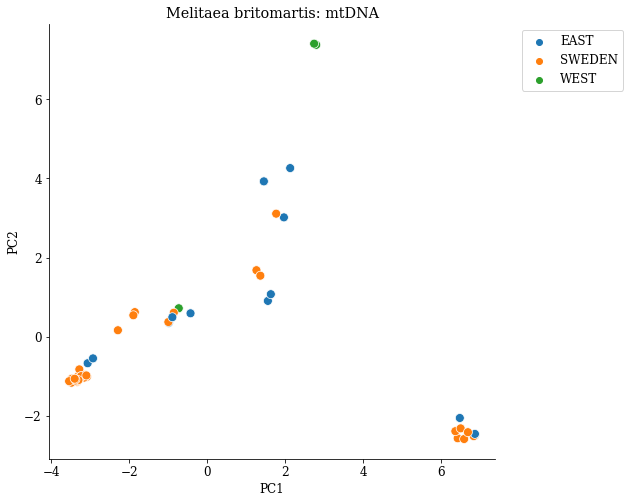

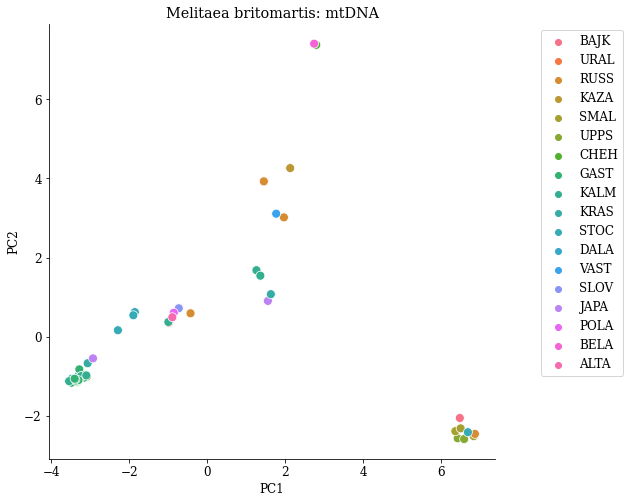

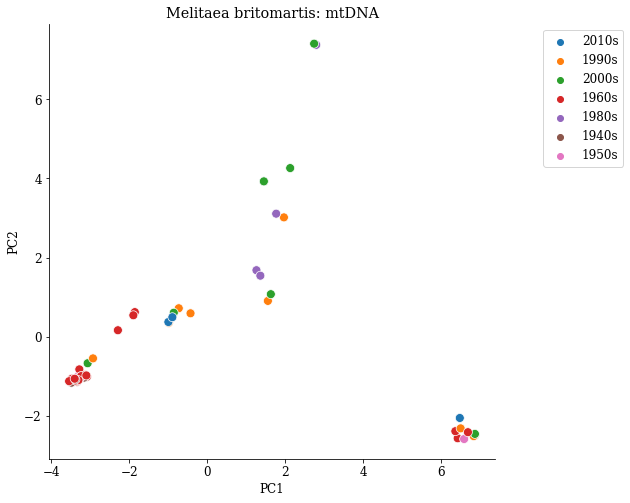

In [64]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Category'], s=80)


sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['popID'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Decade'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

In [66]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6  \
0                                                                          
BAJK_2_2016   1.452960  3.927633  5.094114 -1.343187 -0.023758  0.047459   
URAL_2_1995  -0.987640  0.354597  0.304254  1.359261  1.928770 -0.337992   
RUSS_1_1998   1.967631  3.017918  4.380521 -1.285956  0.102282 -0.033811   
KAZA_1_2006   6.866083 -2.494957 -0.255339 -0.299004  0.052104  0.027109   
SMAL_2_1967  -3.087975 -1.008923 -0.137632 -0.099337  0.131790  2.065475   
UPPS_3_1969   6.427650 -2.562989 -0.331669 -0.433850 -0.113161 -0.009470   
CHEH_1_1989   2.797416  7.375803 -4.161277 -1.105309  0.150783 -0.002823   
GAST_4_1941  -3.218378 -1.022598 -0.292450 -0.326772 -0.215281 -0.205136   
KALM_3_1955  -3.316580 -1.001023 -0.250398 -0.311051 -0.178770 -0.277627   
UPPS_1_1951  -3.488034 -1.061942 -0.312777 -0.435141 -0.186304 -0.308223   
KRAS_1_2002  -3.069745 -0.667514 -0.107695 -0.104186  0.018519 -0.035382   
STOC_4_1965  -1.859370  0.624107 -0.092050 -0.146853 -0.056295 -0.305565   
UPPS_2_1958   6.593246 -2.582529 -0.311234 -0.391827 -0.031775  0.027245   
DALA_1_1965  -3.473000 -1.058913 -0.082938 -0.363507 -0.235065 -0.303313   
GAST_10_1965 -3.282899 -0.822386 -0.430393 -0.423030 -0.181842 -0.311297   
VAST_1_1983   1.769234  3.111072 -1.026432  0.536418 -0.429573  0.229265   
GAST_1_1941  -3.337653 -1.135966 -0.308967 -0.440726 -0.253179 -0.370116   
KALM_10_1983  1.262918  1.682939  0.720466  2.862330 -1.499491 -0.055310   
GAST_5_1943  -3.484212 -1.158715 -0.311974 -0.448697 -0.284500 -0.424268   
SLOV_1_1990  -0.730962  0.721652  0.274140  0.588750  0.906250 -0.180699   
GAST_14_1969 -3.251647 -1.001006 -0.158269 -0.303539 -0.163455 -0.227301   
GAST_12_1969 -3.128009 -0.963408 -0.207654 -0.204161 -0.144175 -0.164182   
GAST_3_1941  -3.160312 -1.031361 -0.147932 -0.242717 -0.162231 -0.077025   
STOC_5_1965  -2.293275  0.166027 -0.126757 -0.498389 -0.404299 -0.188738   
BAJK_1_2016   6.482520 -2.050832 -0.385149 -0.200829  0.195546 -0.009810   
KALM_1_2018  -0.998248  0.374378  0.295404  1.337437  1.933223 -0.348892   
GAST_6_1965  -3.350366 -1.122126 -0.306337 -0.444885 -0.306365 -0.390840   
RUSS_3_1999  -0.429215  0.594374  0.069142  0.889155  0.842299 -0.079958   
JAPA_1_1994  -2.932223 -0.544481 -0.119086  0.230560  0.179716  2.144822   
KALM_2_1955  -3.260964 -1.039812 -0.161261 -0.255422 -0.092391 -0.156366   
SMAL_3_1967   6.368082 -2.384364 -0.328777 -0.377115 -0.046686  0.006288   
SMAL_5_1998   6.503922 -2.312837 -0.241963 -0.279436  0.028582  0.006684   
STOC_2_1965  -1.896833  0.544314 -0.564807 -0.321328 -0.227444 -0.250851   
KALM_8_1969  -3.237287 -0.993433 -0.159500 -0.127689  0.096587  2.008986   
KAZA_2_2006   2.128708  4.263142 -0.914785 -0.075888 -0.394280  0.210367   
KALM_6_1961  -3.545360 -1.121726 -0.313915 -0.447785 -0.292354 -0.415670   
GAST_11_1965 -3.305992 -1.094101 -0.255701 -0.312767 -0.228031 -0.237815   
RUSS_5_2008   1.452960  3.927632  5.094113 -1.343187 -0.023758  0.047459   
JAPA_2_1994   1.556222  0.907452  0.882595  1.836809 -0.788484 -0.148884   
POLA_2_2003  -0.859441  0.608567  0.208610  0.767375  0.831810  0.082112   
KRAS_3_2002   1.632203  1.077090  0.692975  1.952240 -0.632301 -0.140718   
SMAL_4_1996   6.839561 -2.508883 -0.274040 -0.340925  0.045820  0.013342   
GAST_2_1941  -3.382671 -1.080258 -0.527339 -0.568720 -0.349998 -0.382458   
KALM_9_1981   1.363274  1.544391  0.460357  2.792584 -1.327109  0.054875   
BELA_1_2004   2.743459  7.406013 -4.148772 -1.089294  0.151191 -0.000640   
GAST_7_1965  -3.402882 -1.058456 -0.277349 -0.382357 -0.140038 -0.220164   
RUSS_4_2008   6.870771 -2.453197 -0.271340 -0.300356  0.082082  0.020580   
ALTA_1_2015  -0.895213  0.495645  0.205670  1.380227  1.828810 -0.326935   
STOC_6_1965   6.690545 -2.409933 -0.258306 -0.273047  0.044841  0.024246   
KALM_5_1961  -3.102978 -0.976078 -0.120096 -0.184877 -0.138612 -0.088034   

                   PC7       PC8       PC9      PC10  ...      PC4

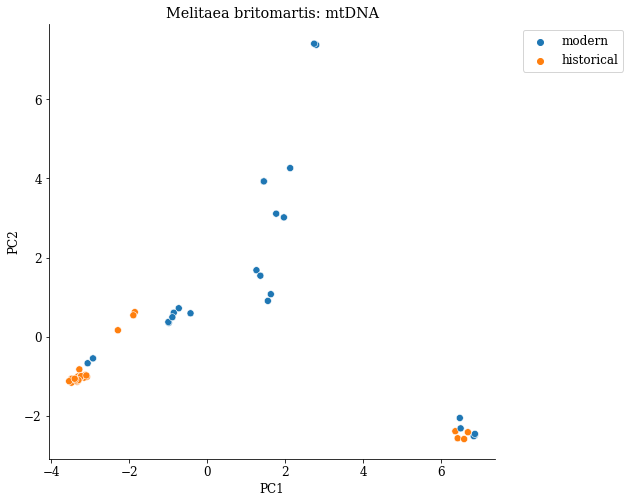

In [68]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['era'], s=50)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

### ANGSD and downsampling

In [5]:
cov_matrix = np.genfromtxt("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/mtDNA_assmann_downsamp.cov") # Reads in estimated covariance matrix (text)
cov_matrix

array([[ 1.5229694e+00, -2.0284030e-01, -1.3740870e-01, ...,
        -4.4812910e-01,  1.1826391e+00, -1.4933470e-01],
       [-2.0284030e-01,  2.3488097e+00, -2.5306950e-01, ...,
         1.8144562e+00, -4.0194860e-01,  7.1110000e-04],
       [-1.3740870e-01, -2.5306950e-01,  3.8153276e+00, ...,
        -3.3811210e-01, -1.0433330e-01,  2.3426560e-01],
       ...,
       [-4.4812910e-01,  1.8144562e+00, -3.3811210e-01, ...,
         2.2861471e+00, -4.4210190e-01, -1.3956320e-01],
       [ 1.1826391e+00, -4.0194860e-01, -1.0433330e-01, ...,
        -4.4210190e-01,  1.2423177e+00, -7.7680900e-02],
       [-1.4933470e-01,  7.1110000e-04,  2.3426560e-01, ...,
        -1.3956320e-01, -7.7680900e-02,  2.5910807e+00]])

In [12]:
pca = PCA()
pca_result = pca.fit_transform(cov_matrix)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([5.96755089e-01, 2.23443948e-01, 9.71006661e-02, 3.52580734e-02,
       1.65703349e-02, 1.32147881e-02, 5.04794410e-03, 3.02301467e-03,
       1.92377411e-03, 1.69715657e-03, 1.39516967e-03, 1.15256874e-03,
       6.72085426e-04, 5.53633540e-04, 4.66854274e-04, 2.89670413e-04,
       2.57484018e-04, 2.27209024e-04, 1.41646078e-04, 1.37895488e-04,
       1.12645566e-04, 8.54769567e-05, 7.62908191e-05, 6.56717911e-05,
       5.51484007e-05, 4.52824624e-05, 3.79480503e-05, 3.25697560e-05,
       2.95806571e-05, 2.37676130e-05, 2.03485985e-05, 1.63994290e-05,
       1.51467489e-05, 1.09275961e-05, 9.73778379e-06, 8.68432093e-06,
       6.40191306e-06, 5.38083460e-06, 3.98751701e-06, 2.67008303e-06,
       2.59809047e-06, 1.93170393e-06, 1.39010186e-06, 5.03443802e-07,
       3.18712440e-07, 1.85444181e-07, 6.59649496e-32])

In [13]:
pca_result

array([[-1.03863610e+00,  4.74318007e-01,  1.86719664e-01, ...,
        -3.05000411e-05,  7.13002693e-05,  1.25141518e-15],
       [ 6.35310436e+00, -2.13078303e+00, -3.15536334e-01, ...,
        -1.60065367e-04, -3.27816176e-04,  1.25141518e-15],
       [ 1.45173857e+00,  3.88892513e+00,  5.00364438e+00, ...,
         4.53745996e-03,  2.06357228e-03,  1.25141518e-15],
       ...,
       [ 6.21563820e+00, -2.59204724e+00, -2.49369718e-01, ...,
         2.39541229e-03,  1.31770835e-03,  1.25141518e-15],
       [-1.10998107e+00,  3.74574934e-01,  2.51833915e-01, ...,
        -7.10278551e-03, -2.76000231e-03,  1.25141518e-15],
       [ 1.74264816e+00,  3.27986743e+00, -1.19320360e+00, ...,
         1.43795349e-04, -4.08449807e-05,  1.25141518e-15]])

In [21]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sample_mtDNA_downsamp.list", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\_downsampled.bam', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\/crex/proj/uppstore2017185/b2014034_nobackup/Dasha/M.britomartis_Conservation/00_Mapping_Calling_sarek/08_ANGSD/mtDNAbams/', '', regex=True)
labels

pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df

PC1       PC2       PC3       PC4       PC5       PC6  \
0                                                                          
ALTA_1_2015  -1.038636  0.474318  0.186720  1.530191  1.893682 -0.094884   
BAJK_1_2016   6.353104 -2.130783 -0.315536 -0.225259  0.235964 -0.006297   
BAJK_2_2016   1.451739  3.888925  5.003644 -1.186043 -0.000022  0.058572   
BELA_1_2004   2.801755  7.020540 -4.046078 -1.186393  0.154383 -0.009882   
CHEH_1_1989   2.816686  7.021698 -4.040113 -1.174118  0.175690 -0.009568   
DALA_1_1965  -3.656029 -0.931419 -0.016161 -0.336829 -0.188815 -0.282083   
GAST_10_1965 -3.589927 -0.951512 -0.370102 -0.515830 -0.163151 -0.430604   
GAST_11_1965 -3.481538 -1.065315 -0.222993 -0.346901 -0.186688 -0.293893   
GAST_1_1941  -3.547179 -0.969192 -0.349679 -0.474991 -0.220981 -0.473462   
GAST_12_1969 -3.270074 -0.805106 -0.329317 -0.306042 -0.115790 -0.228647   
GAST_14_1969 -3.370103 -0.986684 -0.174195 -0.388059 -0.174675 -0.285361   
GAST_2_1941  -3.574708 -1.122790 -0.424628 -0.555578 -0.261670 -0.442573   
GAST_3_1941  -3.404435 -1.010921 -0.117845 -0.279660 -0.182900 -0.176841   
GAST_4_1941  -3.213219 -0.879142 -0.337771 -0.329891 -0.162455 -0.145383   
GAST_5_1943  -3.673225 -0.938695 -0.282235 -0.557959 -0.233276 -0.462390   
GAST_6_1965  -3.363336 -0.789690 -0.437864 -0.573245 -0.248077 -0.444746   
GAST_7_1965  -3.560121 -1.009819 -0.171235 -0.339219 -0.085331 -0.284764   
JAPA_1_1994  -3.208851 -0.589433 -0.143270  0.201873 -0.182815  2.128483   
JAPA_2_1994   1.431664  0.871620  0.824892  1.729091 -0.792155 -0.209557   
KALM_10_1983  1.097840  1.748249  0.500784  2.669329 -1.534038 -0.250771   
KALM_1_2018  -1.201463  0.267684  0.253925  1.331129  1.742163 -0.082571   
KALM_2_1955  -3.503857 -0.958815 -0.197676 -0.333659 -0.126740 -0.299027   
KALM_3_1955  -3.326069 -0.769127 -0.204828 -0.286730 -0.098664 -0.238287   
KALM_5_1961  -3.357607 -0.960185 -0.119115 -0.227628 -0.175109 -0.178044   
KALM_6_1961  -3.458825 -1.027438 -0.347502 -0.406148 -0.222913 -0.341293   
KALM_8_1969  -3.325725 -0.895109 -0.196669 -0.192365 -0.231801  1.989755   
KALM_9_1981   1.188328  1.438819  0.224151  2.591426 -1.366216 -0.109815   
KAZA_1_2006   6.667690 -2.523657 -0.197594 -0.295865  0.069564  0.053249   
KAZA_2_2006   2.166010  4.389773 -1.107327 -0.077739 -0.383796  0.126817   
KRAS_1_2002  -3.242022 -0.864381  0.011059 -0.226144 -0.019552 -0.129725   
KRAS_3_2002   1.546985  1.085995  0.569168  1.904991 -0.644065 -0.166892   
POLA_2_2003  -0.964864  0.723591 -0.012182  0.777205  0.873262  0.152999   
RUSS_1_1998   1.906788  3.114602  4.448696 -1.215821  0.076604 -0.037260   
RUSS_3_1999  -0.529509  0.645191  0.046482  0.949241  0.843397 -0.041083   
RUSS_4_2008   6.775195 -2.536553 -0.197769 -0.266037  0.048071  0.060348   
RUSS_5_2008   1.309140  3.916675  4.966468 -1.190505 -0.031383  0.035937   
SLOV_1_1990  -0.867705  0.886644  0.209767  0.520104  0.938444 -0.182337   
SMAL_2_1967  -3.222530 -0.806935 -0.184016 -0.113002 -0.132149  2.026571   
SMAL_3_1967   6.229685 -2.441208 -0.276934 -0.370366 -0.041088  0.000140   
SMAL_4_1996   6.721002 -2.570293 -0.238111 -0.361737  0.040317  0.034292   
SMAL_5_1998   6.311784 -2.318048 -0.201638 -0.259632  0.010650  0.005382   
STOC_6_1965   6.365810 -2.167484 -0.251464 -0.222962  0.040962  0.034942   
UPPS_1_1951  -3.519736 -0.972393 -0.313369 -0.430526 -0.142034 -0.332765   
UPPS_2_1958   6.481780 -2.564589 -0.229802 -0.334007 -0.031667  0.016442   
UPPS_3_1969   6.215638 -2.592047 -0.249370 -0.404295 -0.086620 -0.039098   
URAL_2_1995  -1.109981  0.374575  0.251834  1.380737  1.761170 -0.112586   
VAST_1_1983   1.742648  3.279867 -1.193204  0.405866 -0.437684  0.098557   

                   PC7       PC8       PC9      PC10  ...      PC44      PC45  \
0                                                     ...                       
ALTA_1_2015  -0.033420 -0.120123  0.039835 -0.281820  ...  0.001354 -0.000031   
BAJK_1_2016   0.037608 -0.081279  0.027522  0.08520

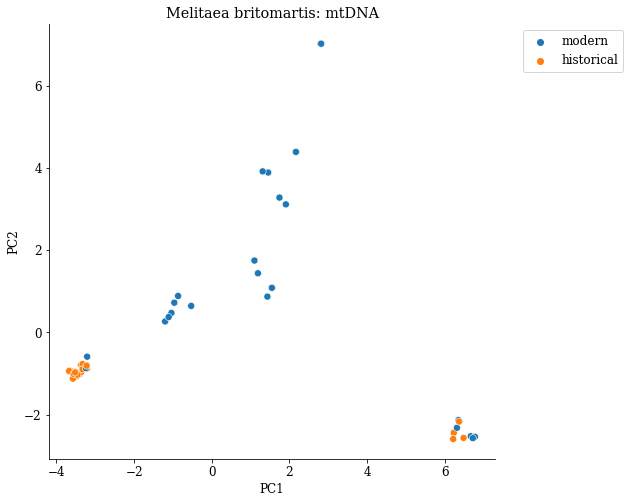

In [24]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['era'], s=50)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

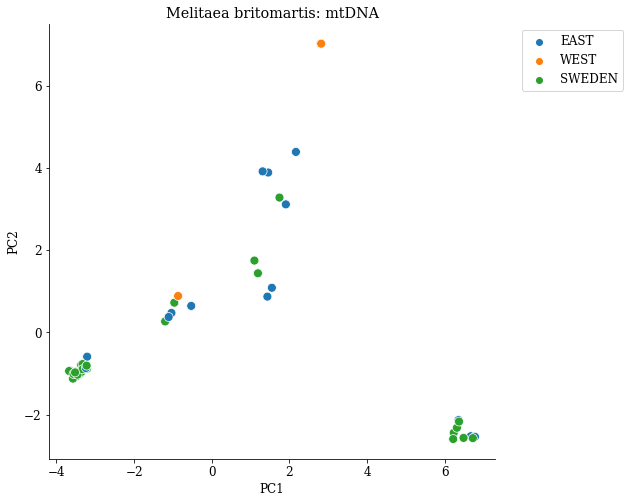

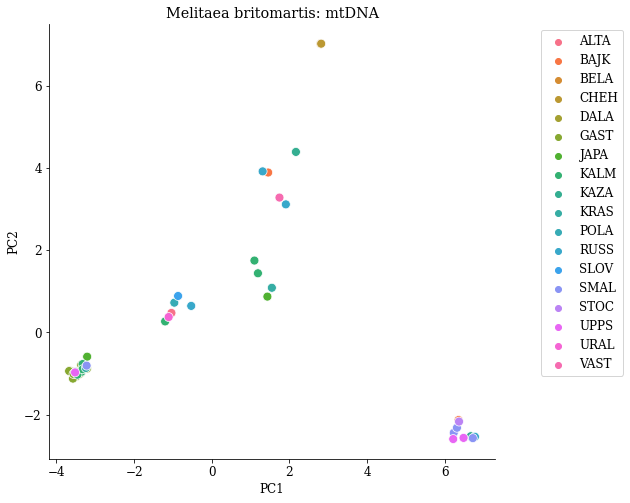

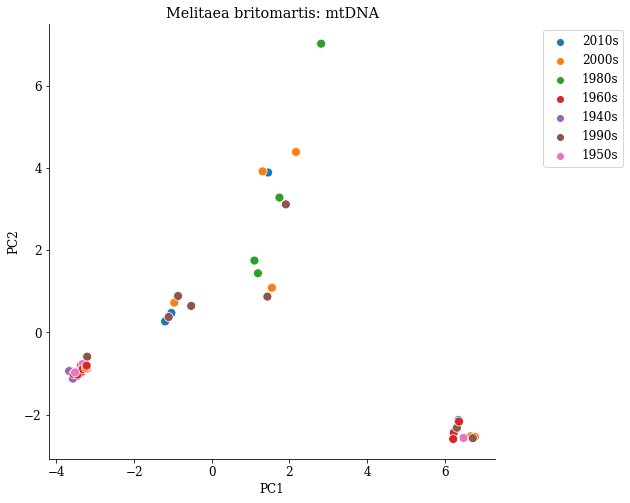

In [25]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Category'], s=80)


sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['popID'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Decade'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

In [11]:
pca_df.index = labels[0]

ValueError: Length mismatch: Expected axis has 47 elements, new values have 50 elements

# ANGSD whole genome

In [11]:
cov_matrix = np.genfromtxt("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/chroms_assmann.cov") # Reads in estimated covariance matrix (text)
cov_matrix

pca = PCA()
pca_result = pca.fit_transform(cov_matrix)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([5.36317813e-01, 3.41205472e-02, 1.92947690e-02, 1.54434396e-02,
       1.42248312e-02, 1.36548972e-02, 1.27694248e-02, 1.24781661e-02,
       1.21625020e-02, 1.18496836e-02, 1.14370597e-02, 1.12466709e-02,
       1.09543916e-02, 1.07579637e-02, 1.07351199e-02, 1.05757930e-02,
       1.02792815e-02, 1.00086018e-02, 9.82689524e-03, 9.73768046e-03,
       9.65479900e-03, 9.50534038e-03, 9.44536654e-03, 9.37358767e-03,
       9.15867520e-03, 9.07181681e-03, 8.88022760e-03, 8.79181310e-03,
       8.76868449e-03, 8.55065897e-03, 8.36188309e-03, 8.15150507e-03,
       7.98427024e-03, 7.92144010e-03, 7.88215884e-03, 7.82749651e-03,
       7.73780164e-03, 7.56495140e-03, 7.42558704e-03, 7.37551463e-03,
       7.29439400e-03, 7.26414152e-03, 7.11050519e-03, 7.07682833e-03,
       7.00893384e-03, 6.93608774e-03, 2.82666154e-31])

In [1]:
5.36317813e-01 *100


53.6317813

In [12]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sample_chroms.list", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\/crex/proj/uppstore2017185/b2014034_nobackup/Dasha/M.britomartis_Conservation/00_Mapping_Calling_sarek/08_ANGSD/mtDNAbams/', '', regex=True)
labels

pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df


PC1       PC2       PC3       PC4       PC5       PC6  \
0                                                                          
ALTA_1_2015   1.209075 -0.338639 -0.313413  0.205947  0.519143  0.464649   
BAJK_1_2016  -0.287972  0.297049 -0.100050  0.013392  0.161053 -0.143893   
BAJK_2_2016   0.833028  0.097938  0.404539 -0.184354  0.269095 -0.011654   
BELA_1_2004   1.142582 -0.158567 -0.013790 -0.004573  0.027500  0.003503   
CHEH_1_1989   1.437196 -0.125022 -0.055603 -0.002632 -0.073762 -0.033732   
DALA_1_1965  -1.105572 -0.169263  0.010542 -0.006901 -0.044917  0.016485   
GAST_10_1965 -1.049202 -0.164657  0.020116 -0.022139 -0.036123  0.008520   
GAST_11_1965 -1.008255 -0.118712  0.007134 -0.001377 -0.031302  0.012264   
GAST_1_1941  -1.078925 -0.240863  0.041520 -0.032876 -0.054601  0.009138   
GAST_12_1969 -0.700606 -0.028335  0.004708  0.016563 -0.021307  0.016985   
GAST_14_1969 -0.721589 -0.042930  0.010145 -0.019523  0.006243  0.003958   
GAST_2_1941  -1.055225 -0.154864  0.012388 -0.016358 -0.035517  0.008950   
GAST_3_1941  -0.806076 -0.080796  0.021532 -0.027299  0.002969 -0.000204   
GAST_4_1941  -0.855890 -0.090908  0.021336 -0.026945 -0.021736  0.001897   
GAST_5_1943  -1.068747 -0.180106  0.019262  0.002097 -0.044404  0.013986   
GAST_6_1965  -1.086096 -0.181885  0.014742  0.005265 -0.041117  0.002177   
GAST_7_1965  -1.058540 -0.170922  0.024085 -0.026768 -0.035649  0.005451   
JAPA_1_1994   0.223900  0.687019 -0.205676 -0.074986 -0.518439  0.676116   
JAPA_2_1994   1.264067 -0.192820 -0.098592 -0.042293 -0.025303  0.012199   
KALM_10_1983  0.992654 -0.031744  0.451963  0.962608 -0.223102  0.012433   
KALM_1_2018   1.420814 -0.271803 -0.251551 -0.003858  0.126090  0.118060   
KALM_2_1955  -0.730466 -0.034222  0.007156  0.027878 -0.005878  0.003365   
KALM_3_1955  -0.895365 -0.122551  0.026696 -0.029995 -0.025048 -0.000188   
KALM_5_1961  -0.648564 -0.010812  0.008231 -0.022405  0.023120 -0.006752   
KALM_6_1961  -0.999972 -0.158394  0.024932 -0.029438 -0.028142  0.002130   
KALM_8_1969  -0.729473 -0.019121 -0.000121  0.019029  0.012846  0.013423   
KALM_9_1981   1.136223  0.025735  0.287313  0.010232 -0.021044  0.001886   
KAZA_1_2006  -0.285039  0.357599 -0.142383  0.036295  0.197420 -0.177514   
KAZA_2_2006   0.912771  0.214689  0.391661 -0.226078  0.032279  0.045440   
KRAS_1_2002  -0.016441  0.369358 -0.027985 -0.078266 -0.005367 -0.094530   
KRAS_3_2002   1.538685 -0.170208 -0.148224 -0.065813 -0.135663 -0.087742   
POLA_2_2003   1.525664 -0.204504 -0.228095 -0.117710 -0.280324 -0.308280   
RUSS_1_1998   0.949437  0.225329  0.392130 -0.229677  0.002163  0.046790   
RUSS_3_1999   1.536870 -0.229286 -0.252470 -0.098152 -0.294888 -0.319472   
RUSS_4_2008  -0.009607  0.518855 -0.165461  0.002933  0.128998 -0.121353   
RUSS_5_2008   0.792756  0.093278  0.418144 -0.166547  0.284261 -0.013080   
SLOV_1_1990   1.433650 -0.110688 -0.041643 -0.042528 -0.177691 -0.096961   
SMAL_2_1967  -0.602560 -0.002289  0.007572 -0.029686  0.012250  0.000246   
SMAL_3_1967  -0.887324 -0.040546 -0.020512  0.019035  0.024500 -0.007441   
SMAL_4_1996  -0.034799  0.690661 -0.325004  0.303514  0.156783 -0.312152   
SMAL_5_1998  -0.361603  0.242916 -0.111784  0.116397  0.183831 -0.123702   
STOC_6_1965   0.094051  0.545461 -0.120949 -0.070666 -0.037712  0.125227   
UPPS_1_1951  -1.068684 -0.169459  0.022241 -0.022099 -0.040797  0.010900   
UPPS_2_1958  -0.895706 -0.056734 -0.023716  0.012079 -0.036843  0.009133   
UPPS_3_1969  -0.953857 -0.079121 -0.015497  0.010980 -0.032599  0.010484   
URAL_2_1995   1.345333 -0.288730 -0.259358  0.015360  0.228539  0.198789   
VAST_1_1983   1.213402  0.073616  0.271788 -0.057660 -0.069807  0.004071   

                   PC7       PC8       PC9      PC10  ...      PC44      PC45  \
0                                                     ...                       
ALTA_1_2015   0.046385 -0.098748  0.212870 -0.259562  ... -0.000167 -0.002110   
BAJK_1_2016  -0.149390 -0.006787 -0.164141 -0.09266

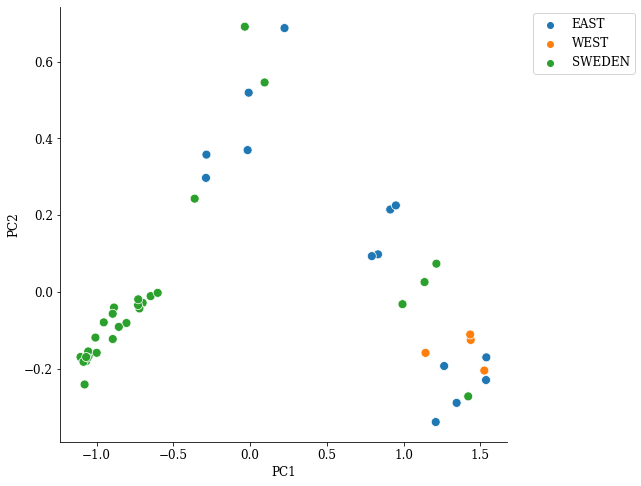

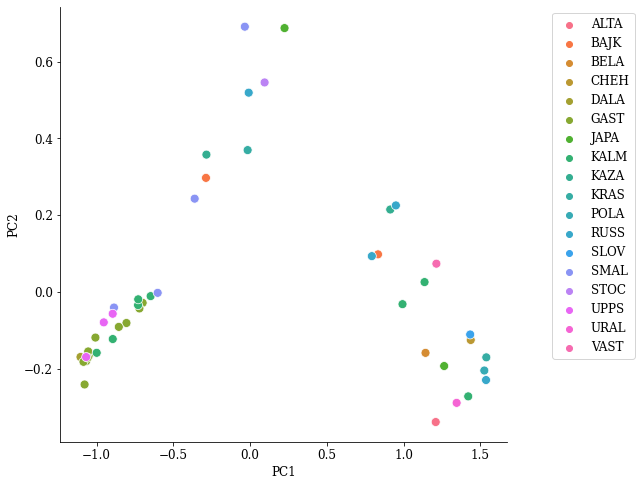

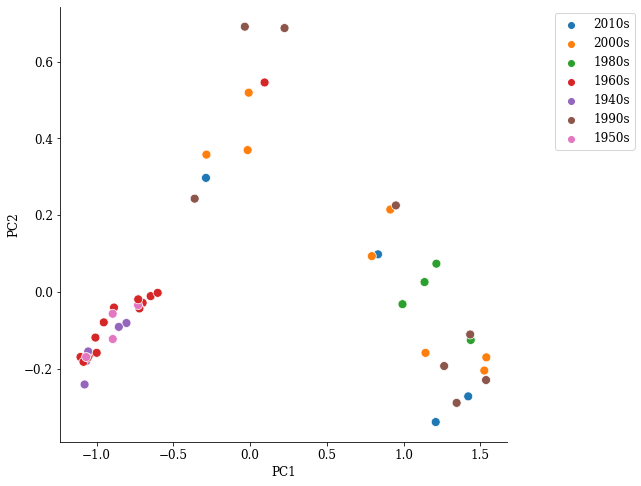

In [57]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Category'], s=80)


sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['popID'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Decade'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

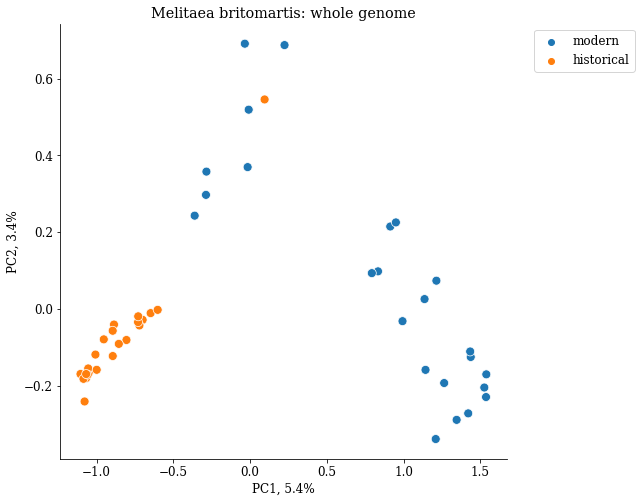

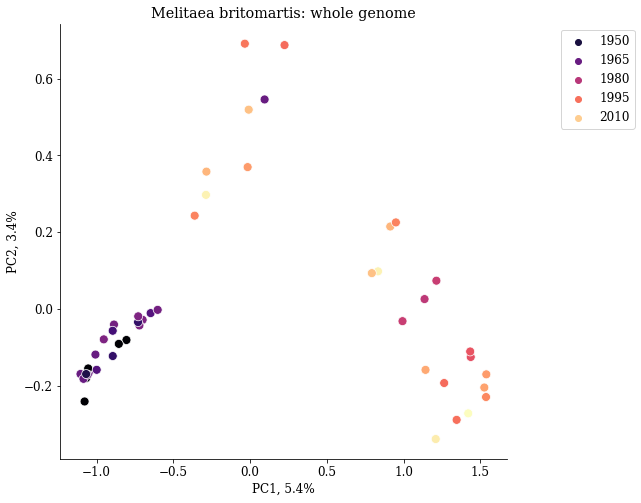

In [51]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['era'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, 5.4%')
plt.ylabel('PC2, 3.4%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Year'], palette="magma", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, 5.4%')
plt.ylabel('PC2, 3.4%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

In [8]:
pca_df['ID']

0
ALTA_1_2015      ALTA_1_2015
BAJK_1_2016      BAJK_1_2016
BAJK_2_2016      BAJK_2_2016
BELA_1_2004      BELA_1_2004
CHEH_1_1989      CHEH_1_1989
DALA_1_1965      DALA_1_1965
GAST_10_1965    GAST_10_1965
GAST_11_1965    GAST_11_1965
GAST_1_1941      GAST_1_1941
GAST_12_1969    GAST_12_1969
GAST_14_1969    GAST_14_1969
GAST_2_1941      GAST_2_1941
GAST_3_1941      GAST_3_1941
GAST_4_1941      GAST_4_1941
GAST_5_1943      GAST_5_1943
GAST_6_1965      GAST_6_1965
GAST_7_1965      GAST_7_1965
JAPA_1_1994      JAPA_1_1994
JAPA_2_1994      JAPA_2_1994
KALM_10_1983    KALM_10_1983
KALM_1_2018      KALM_1_2018
KALM_2_1955      KALM_2_1955
KALM_3_1955      KALM_3_1955
KALM_5_1961      KALM_5_1961
KALM_6_1961      KALM_6_1961
KALM_8_1969      KALM_8_1969
KALM_9_1981      KALM_9_1981
KAZA_1_2006      KAZA_1_2006
KAZA_2_2006      KAZA_2_2006
KRAS_1_2002      KRAS_1_2002
KRAS_3_2002      KRAS_3_2002
POLA_2_2003      POLA_2_2003
RUSS_1_1998      RUSS_1_1998
RUSS_3_1999      RUSS_3_1999
RUSS_4_2008 

In [ ]:
'KAZA': 'Eastern Russia',

EBC BAJK_1
EBC BAJK_2
EBC BELA_1
EBC CHEH_1
EBC JAPA_1
EBC JAPA_2
EBC KALM_1
EBC KRAS_3
EBC POLA_2
EBC RUSS_1
EBC RUSS_3
EBC RUSS_4
EBC RUSS_5
EBC SLOV_1
EBC SMAL_4
EBC URAL_2
EBC VAST_1
EBC ALTA_1
EBC KALM_9
EBC KAZA_1
EBC KAZA_2
Museet	Dalarna	Sweden	DALA_1
Museet	Gästrikland	Sweden	GAST_1
Museet	Gästrikland	Sweden	GAST_10
Museet	Gästrikland	Sweden	GAST_11
Museet	Gästrikland	Sweden	GAST_12
Museet	Gästrikland	Sweden	GAST_13
Museet	Gästrikland	Sweden	GAST_14
Museet	Gästrikland	Sweden	GAST_2
Museet	Gästrikland	Sweden	GAST_3
Museet	Gästrikland	Sweden	GAST_4
Museet	Gästrikland	Sweden	GAST_5
Museet	Gästrikland	Sweden	GAST_6
Museet	Gästrikland	Sweden	GAST_7
Museet	Gästrikland	Sweden	GAST_8
Museet	Gästrikland	Sweden	GAST_9
Museet	Italien	Abroad	ITAL_1
Museet	Krasnojarsk	Abroad	KRAS_1
Museet	c Ryssland	Abroad	RUSS_2
Museet	Småland	Sweden	SMAL_1
Museet	Småland	Sweden	SMAL_2
Museet	Småland	Sweden	SMAL_3
Museet	Småland	Sweden	SMAL_5
Museet	Stockholm	Sweden	STOC_1
Museet	Stockholm	Sweden	STOC_2
Museet	Stockholm	Sweden	STOC_3
Museet	Stockholm	Sweden	STOC_4
Museet	Stockholm	Sweden	STOC_5
Museet	Stockholm	Sweden	STOC_6
Museet	Uppsala	Sweden	UPPS_1
Museet	Uppsala	Sweden	UPPS_2
Museet	Uppsala	Sweden	UPPS_3
Museet	Kalmar	Sweden	КALM_2
Museet	Kalmar	Sweden	КALM_3
Museet	Kalmar	Sweden	КALM_4
Museet	Kalmar	Sweden	КALM_5
Museet	Kalmar	Sweden	КALM_6
Museet	Kalmar	Sweden	КALM_7
Museet	Kalmar	Sweden	КALM_8

## Only Sweden 

In [4]:
cov_matrix = np.genfromtxt("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sweden.test.cov") # Reads in estimated covariance matrix (text)
cov_matrix

pca = PCA()
pca_result = pca.fit_transform(cov_matrix)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([2.56763669e-01, 5.45957050e-02, 4.69052173e-02, 4.27290271e-02,
       3.22570624e-02, 3.10694882e-02, 3.00520983e-02, 2.94126638e-02,
       2.86153352e-02, 2.80465111e-02, 2.78292980e-02, 2.75346405e-02,
       2.72877457e-02, 2.59474875e-02, 2.53889981e-02, 2.49783284e-02,
       2.41403249e-02, 2.38560238e-02, 2.31092938e-02, 2.27463685e-02,
       2.24630208e-02, 2.20704807e-02, 2.18630951e-02, 2.14598323e-02,
       2.13827990e-02, 2.10562067e-02, 2.04947237e-02, 1.59445554e-02,
       1.81667347e-34])

In [13]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sample_chroms2.list", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels

pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df

PC1       PC2       PC3       PC4       PC5  \
0                                                                             
KALM_10_1983/KALM_10_1983  1.102144 -0.447656 -0.254130  0.919808 -0.024186   
KALM_1_2018/KALM_1_2018    0.940844 -0.453395 -0.742249 -0.666566 -0.028796   
KALM_9_1981/KALM_9_1981    1.070712 -0.448840  0.941529 -0.277345 -0.036692   
SMAL_4_1996/SMAL_4_1996   -0.416553  0.039156  0.027533  0.022422 -0.024215   
SMAL_5_1998/SMAL_5_1998   -0.555114  0.080828  0.003306  0.034131  0.019604   
STOC_6_1965/STOC_6_1965   -0.396407  0.045629  0.005483 -0.009185  0.003836   
VAST_1_1983/VAST_1_1983    1.472304  1.061031 -0.026992 -0.018622 -0.043974   
DALA_1_1965/DALA_1_1965   -0.190275 -0.009491  0.001450 -0.002889  0.003240   
GAST_10_1965/GAST_10_1965  0.120257 -0.002380  0.005480 -0.008847 -0.076399   
GAST_11_1965/GAST_11_1965 -0.163880 -0.013195 -0.002357  0.001531  0.002557   
GAST_1_1941/GAST_1_1941    0.490908  0.001807  0.018089 -0.017124  0.875985   
GAST_12_1969/GAST_12_1969 -0.447863  0.044982  0.017561 -0.000125  0.019695   
GAST_14_1969/GAST_14_1969 -0.409338  0.012820 -0.010333  0.020430  0.015606   
GAST_2_1941/GAST_2_1941   -0.014382 -0.005093  0.001521  0.001101 -0.024747   
GAST_3_1941/GAST_3_1941   -0.424285  0.007799  0.001610  0.007570  0.018535   
GAST_4_1941/GAST_4_1941   -0.284159 -0.010532  0.008432 -0.002355  0.014235   
GAST_5_1943/GAST_5_1943    0.156227 -0.004029  0.008402 -0.006660 -0.089541   
GAST_6_1965/GAST_6_1965   -0.008178 -0.013582 -0.002638 -0.005424 -0.027808   
GAST_7_1965/GAST_7_1965    0.285216  0.002507  0.013061 -0.007183 -0.457039   
KALM_2_1955/KALM_2_1955   -0.481921  0.029462 -0.008335  0.019043  0.020067   
KALM_3_1955/KALM_3_1955   -0.019437 -0.004003  0.002781  0.001304 -0.022457   
KALM_5_1961/KALM_5_1961   -0.414962  0.009262 -0.005693 -0.001734  0.018193   
KALM_6_1961/KALM_6_1961    0.254087 -0.002069  0.010719 -0.007206 -0.182938   
KALM_8_1969/KALM_8_1969   -0.463153  0.056419 -0.012921  0.005752  0.012561   
SMAL_2_1967/SMAL_2_1967   -0.377105  0.016503 -0.002672 -0.007504  0.017860   
SMAL_3_1967/SMAL_3_1967   -0.478755  0.030391 -0.004780  0.011237  0.022351   
UPPS_1_1951/UPPS_1_1951    0.009235 -0.006718  0.001775 -0.003896 -0.029567   
UPPS_2_1958/UPPS_2_1958   -0.095167 -0.003793  0.002188  0.003643 -0.005949   
UPPS_3_1969/UPPS_3_1969   -0.261000 -0.013822  0.002180 -0.005306  0.009984   

                                PC6       PC7       PC8       PC9      PC10  \
0                                                                             
KALM_10_1983/KALM_10_1983 -0.021179 -0.027662  0.005000  0.037714 -0.005391   
KALM_1_2018/KALM_1_2018   -0.020299 -0.024623  0.003273  0.040505 -0.008683   
KALM_9_1981/KALM_9_1981   -0.029292 -0.035367  0.005567  0.054282 -0.010735   
SMAL_4_1996/SMAL_4_1996   -0.016249 -0.027896  0.026482  0.078906 -0.003613   
SMAL_5_1998/SMAL_5_1998    0.016466  0.026525  0.005486 -0.034847  0.006134   
STOC_6_1965/STOC_6_1965    0.002365  0.007843 -0.005306 -0.005666 -0.003414   
VAST_1_1983/VAST_1_1983   -0.037808 -0.045089  0.004740  0.068238 -0.011911   
DALA_1_1965/DALA_1_1965   -0.001476  0.001534  0.003406  0.023032 -0.007453   
GAST_10_1965/GAST_10_1965 -0.129030 -0.425376  0.690669 -0.397893  0.041146   
GAST_11_1965/GAST_11_1965 -0.002393 -0.011017 -0.005409  0.016017  0.001656   
GAST_1_1941/GAST_1_1941    0.249851  0.178298 -0.008286 -0.162600  0.026968   
GAST_12_1969/GAST_12_1969  0.007930  0.008379 -0.011815 -0.030713  0.005815   
GAST_14_1969/GAST_14_1969  0.004026  0.018665 -0.003296 -0.022690  0.002104   
GAST_2_1941/GAST_2_1941   -0.039839 -0.059310 -0.001350  0.360833 -0.641526   
GAST_3_1941/GAST_3_1941    0.009965  0.019046 -0.002670 -0.025028  0.004936   
GAST_4_1941/GAST_4_1941    0.006991  0.009231 -0.001056 -0.010998  0.004031   
GAST_5_1943/GAST_5_1943   -0.147010 -0.428253 -0.682138 -0.400654  0.034338   
GAST_6_1965/GAST_6_1965   -0.038996 -0.068729  0.002503  0.254772 -0.116895   
GA

In [11]:
pca_df['ID'] = pca_df.index

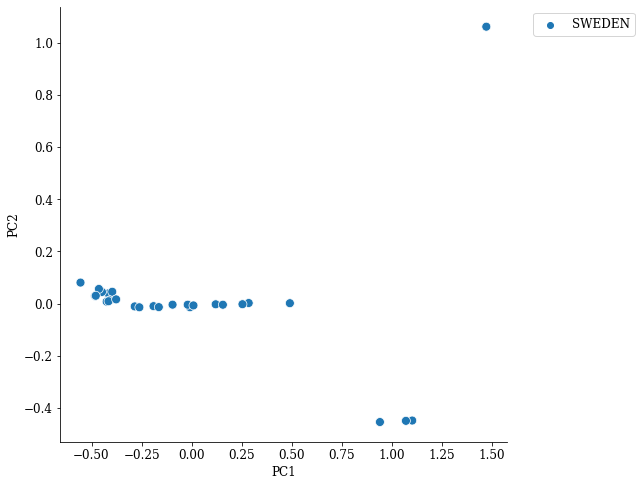

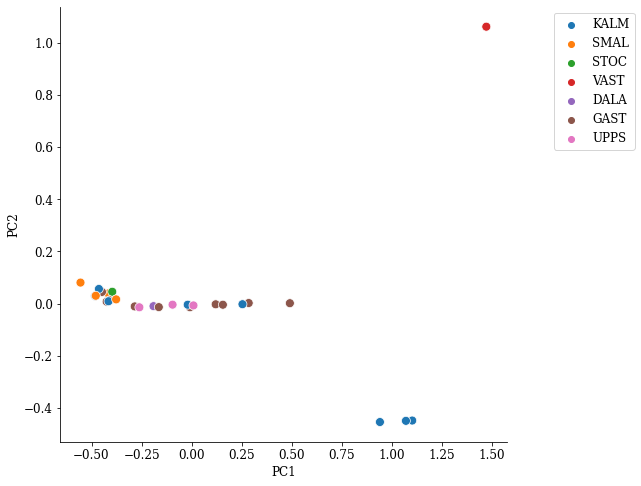

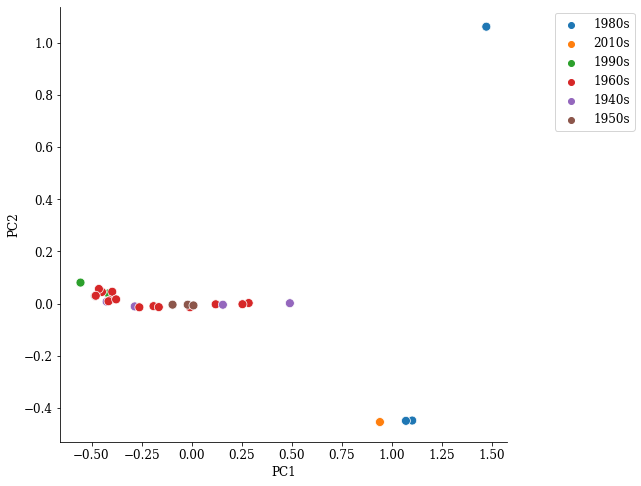

In [15]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Category'], s=80)


sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['popID'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Decade'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

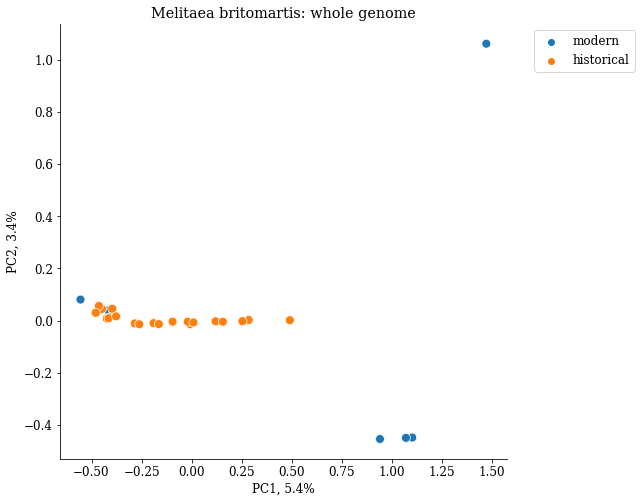

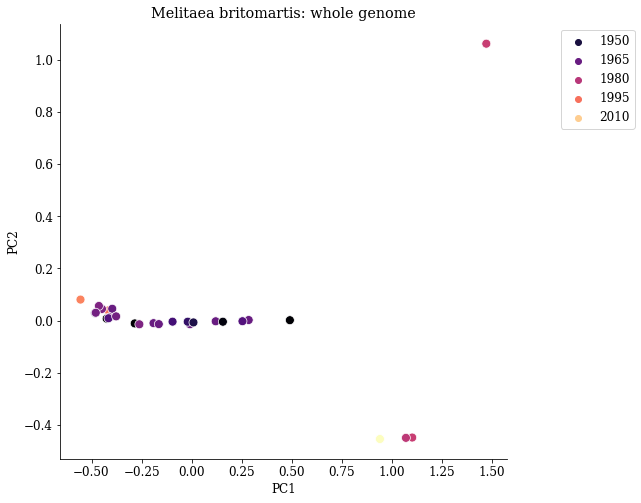

In [16]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['era'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, 5.4%')
plt.ylabel('PC2, 3.4%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Year'], palette="magma", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
#plt.xlabel('PC1, 5.4%')
#plt.ylabel('PC2, 3.4%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

In [60]:
cov_matrix = np.genfromtxt("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sweden2.test.cov") # Reads in estimated covariance matrix (text)
cov_matrix

pca = PCA()
pca_result = pca.fit_transform(cov_matrix)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([2.77851931e-01, 5.46898808e-02, 4.42583443e-02, 4.15666154e-02,
       3.15538019e-02, 3.05971873e-02, 3.01520806e-02, 2.99950503e-02,
       2.93609211e-02, 2.82776957e-02, 2.80435311e-02, 2.72882592e-02,
       2.64038334e-02, 2.41586954e-02, 2.38021063e-02, 2.35283212e-02,
       2.29458035e-02, 2.26586976e-02, 2.24178248e-02, 2.20144665e-02,
       2.17907659e-02, 2.14142462e-02, 2.11095307e-02, 2.03746840e-02,
       2.02677428e-02, 1.99140328e-02, 1.88117190e-02, 1.47522309e-02,
       2.32103372e-34])

In [28]:
"{:.1f}".format(explained_variance[0] * 100)

'27.8'

In [27]:
explained_variance[0]*100
value = explained_variance[0] * 100
formatted_value = "{:.1f}".format(explained_variance[0] * 100)
print(formatted_value)

27.8


In [62]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sample_hroms2.list", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels

pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df

PC1       PC2       PC3       PC4       PC5  \
0                                                                             
KALM_10_1983/KALM_10_1983  1.020248 -0.424888 -0.417931  0.898451  0.000886   
KALM_1_2018/KALM_1_2018    0.925152 -0.463919 -0.636038 -0.756682 -0.018209   
KALM_9_1981/KALM_9_1981    1.081148 -0.492969  0.950889 -0.111258 -0.019106   
SMAL_4_1996/SMAL_4_1996   -0.455538  0.019650  0.021014 -0.009438 -0.003832   
SMAL_5_1998/SMAL_5_1998   -0.648229  0.103370  0.006241  0.029214  0.013313   
STOC_6_1965/STOC_6_1965   -0.605162  0.125565  0.013709  0.005386  0.005813   
VAST_1_1983/VAST_1_1983    1.500473  1.077300 -0.006318 -0.027021 -0.026172   
DALA_1_1965/DALA_1_1965   -0.418347 -0.007519 -0.002808  0.001978  0.011744   
GAST_10_1965/GAST_10_1965  0.510192  0.004111  0.015738 -0.023992  0.912933   
GAST_11_1965/GAST_11_1965 -0.019399 -0.019873  0.002577 -0.000822 -0.013534   
GAST_1_1941/GAST_1_1941    0.326961 -0.004312  0.010648 -0.012108 -0.154880   
GAST_12_1969/GAST_12_1969 -0.520201  0.060299  0.007819  0.006772  0.003712   
GAST_14_1969/GAST_14_1969 -0.476583  0.020861  0.000732  0.014570  0.006091   
GAST_2_1941/GAST_2_1941   -0.433345 -0.005144 -0.004733  0.006036  0.010073   
GAST_3_1941/GAST_3_1941   -0.482893  0.008222  0.003792  0.009459  0.012021   
GAST_4_1941/GAST_4_1941   -0.128861 -0.009557  0.018175  0.000693 -0.000854   
GAST_5_1943/GAST_5_1943    0.488968 -0.005251  0.007617 -0.002197 -0.398406   
GAST_6_1965/GAST_6_1965    0.197478 -0.011813 -0.001397 -0.008952 -0.050830   
GAST_7_1965/GAST_7_1965   -0.041723 -0.003914  0.005359 -0.003068 -0.014345   
KALM_2_1955/KALM_2_1955   -0.471851 -0.017092  0.004862 -0.004923  0.005032   
KALM_3_1955/KALM_3_1955    0.332051 -0.000067  0.009515  0.000734 -0.137323   
KALM_5_1961/KALM_5_1961   -0.421836 -0.010301  0.006231 -0.002333  0.010044   
KALM_6_1961/KALM_6_1961    0.119444 -0.005301  0.007498 -0.000073 -0.048869   
KALM_8_1969/KALM_8_1969   -0.473943  0.059960 -0.006085 -0.000535  0.006205   
SMAL_2_1967/SMAL_2_1967   -0.230833 -0.005871 -0.018180 -0.006793  0.005937   
SMAL_3_1967/SMAL_3_1967   -0.525546  0.026944  0.006052  0.014433  0.009617   
UPPS_1_1951/UPPS_1_1951    0.289920 -0.002100  0.009389 -0.004023 -0.128765   
UPPS_2_1958/UPPS_2_1958   -0.226488 -0.006252 -0.003627 -0.008553 -0.002292   
UPPS_3_1969/UPPS_3_1969   -0.211257 -0.010141 -0.010738 -0.004956  0.003999   

                                PC6       PC7       PC8       PC9      PC10  \
0                                                                             
KALM_10_1983/KALM_10_1983 -0.015854  0.003503  0.005679  0.011604  0.007298   
KALM_1_2018/KALM_1_2018   -0.013065 -0.006812  0.003276  0.006300  0.001881   
KALM_9_1981/KALM_9_1981   -0.014409 -0.005236  0.003760  0.019415 -0.000051   
SMAL_4_1996/SMAL_4_1996   -0.039815  0.013058  0.042886 -0.008796  0.374152   
SMAL_5_1998/SMAL_5_1998    0.015475  0.003273 -0.008008  0.003995 -0.149619   
STOC_6_1965/STOC_6_1965    0.006756 -0.004757 -0.009032  0.016415 -0.174278   
VAST_1_1983/VAST_1_1983   -0.023114 -0.002455  0.007819  0.023357  0.041091   
DALA_1_1965/DALA_1_1965    0.016828  0.006001 -0.001908 -0.011115 -0.001842   
GAST_10_1965/GAST_10_1965  0.185177  0.042226 -0.024010 -0.094652 -0.093083   
GAST_11_1965/GAST_11_1965  0.010019  0.001223  0.004666 -0.001105  0.050262   
GAST_1_1941/GAST_1_1941   -0.449391  0.758586 -0.130331 -0.161537 -0.152938   
GAST_12_1969/GAST_12_1969  0.028757  0.010868 -0.003862 -0.007932 -0.051813   
GAST_14_1969/GAST_14_1969  0.018796 -0.000078 -0.005111 -0.009627 -0.039699   
GAST_2_1941/GAST_2_1941    0.013442  0.002505 -0.002883 -0.014146 -0.003515   
GAST_3_1941/GAST_3_1941    0.014924  0.003433 -0.008028 -0.012300 -0.021443   
GAST_4_1941/GAST_4_1941   -0.010581  0.012689  0.000046 -0.020861  0.044257   
GAST_5_1943/GAST_5_1943    0.793380  0.102235 -0.082483 -0.117432 -0.155899   
GAST_6_1965/GAST_6_1965   -0.102862 -0.090784 -0.026951  0.898555 -0.177862   
GA

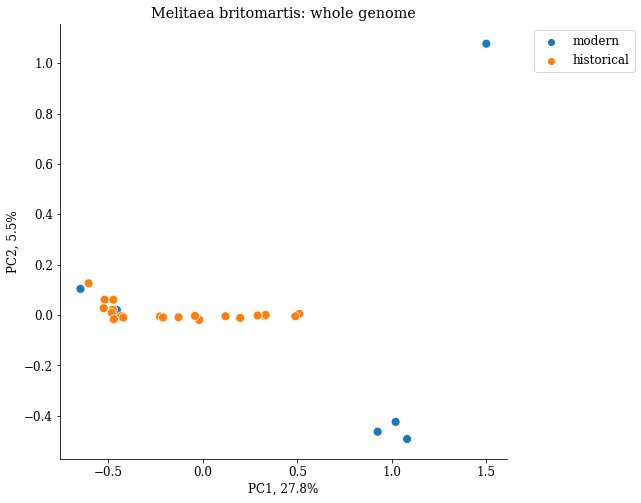

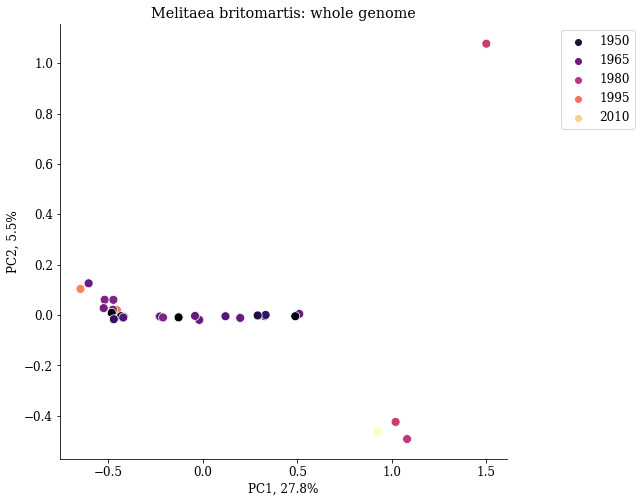

In [65]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['era'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Year'], palette="magma", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

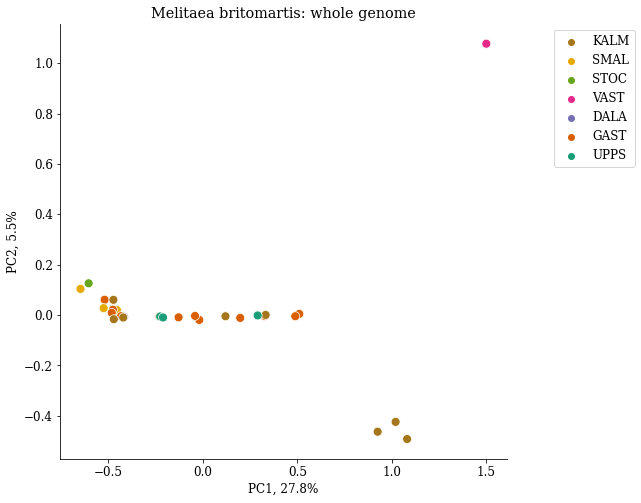

In [64]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['popID'], palette="Dark2_r", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

In [31]:
category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

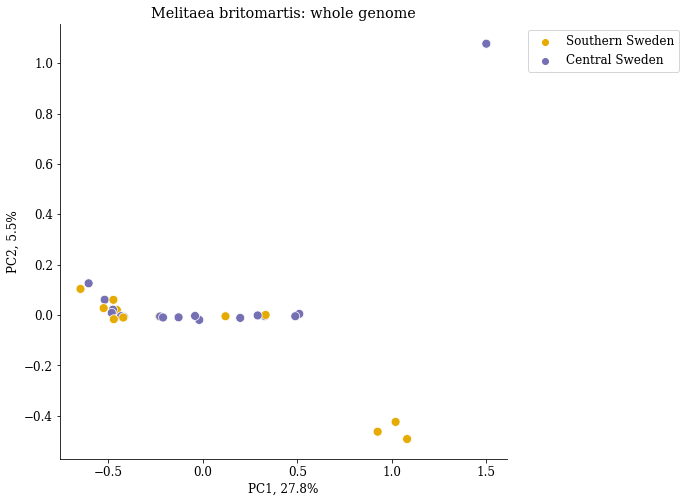

In [37]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Global'], palette="Dark2_r", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
#ml.rcParams['figure.figsize'] = (8.0, 8.0)
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

In [8]:
theta = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sweden_theta.thetas.idx.list", delimiter='\t') #, header=None)
theta

theta['thetaWaters'] = theta['tW']/theta['nSites']
theta['thetaPairwise'] = theta['tP']/theta['nSites']

mean_column1 = theta['thetaWaters'].mean()
mean_column2 = theta['thetaPairwise'].mean()
mean_column3 = theta['Tajima'].mean()
print(mean_column1)
print(mean_column2)
print(mean_column3)

print(theta['tW'].mean())
print(theta['tP'].mean())
print(theta['nSites'].sum())

0.28587804444334
0.2534190733070704
-0.3587656666666666
39.16601226666668
35.088903933333334
5342


In [68]:
theta

#(indexStart indexStop)(firstPos_withData lastPos_withData)(WinStart  \
0            (0                   176)(69512                25125554)(0   
1            (0                   276)(11334                24865908)(0   
2            (0                    250)(1174                23476298)(0   
3            (0                    193)(7411                22728333)(0   
4            (0                   270)(15263                22678830)(0   
5            (0                   251)(90618                22747191)(0   
6            (0                   197)(14501                21361863)(0   
7            (0                   182)(62796                21085081)(0   
8            (0                  206)(189332                21367319)(0   
9            (0                  178)(198476                21309208)(0   
10           (0                  240)(448248                21216369)(0   
11           (0                   200)(19125                20480635)(0   
12           (0                   145)(48443                19600591)(0   
13           (0                    186)(5938                20207321)(0   
14           (0                   248)(66753                19976679)(0   
15           (0                    141)(1206                19735898)(0   
16           (0                   164)(14943                19635524)(0   
17           (0                   168)(84944                19535247)(0   
18           (0                   176)(42132                18264772)(0   
19           (0                  144)(153225                18365472)(0   
20           (0                   197)(11271                17023358)(0   
21           (0                  151)(123136                16590356)(0   
22           (0                  193)(317036                15013460)(0   
23           (0                   156)(43361                14942967)(0   
24           (0                     119)(111                14840182)(0   
25           (0                   207)(28763                14248241)(0   
26           (0                    127)(5228                13254944)(0   
27           (0                     87)(5672                12680035)(0   
28           (0                  104)(437356                11827226)(0   
29           (0                  107)(186741                10790463)(0   

   WinStop)   Chr     WinCenter       tW      tP      tF      tH      tL      Tajima  fuf     fud     fayh    zeng    nSites  
0   25125554)     HG992177.1      12562777        ...                                                                         
1   24865908)     HG992178.1      12432954        ...                                                                         
2   23476298)      HG992179.1      11738149       ...                                                                         
3   22728333)      HG992180.1      11364166       ...                                                                         
4   22678830)     HG992181.1      11339415        ...                                                                         
5   22747191)     HG992182.1      11373595        ...                                                                         
6   21361863)     HG992183.1      10680931        ...                                                                         
7   21085081)     HG992184.1      10542540        ...                                                                         
8   21367319)    HG992185.1      10683659        4...                                                                         
9   21309208)    HG992186.1      10654604        3...                                                                         
10  21216369)    HG992187.1      10608184        5...                                                                         
11  20480635)     HG992188.1      10240317        ...                                                                         
12  19600591)     HG992189

### New trimming historical

In [6]:
cov_matrix = np.genfromtxt("Work_DSh/PCA_ANGSD/ansgd_hist_16.cov") # Reads in estimated covariance matrix (text)
cov_matrix

pca = PCA()
pca_result = pca.fit_transform(cov_matrix)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([6.45095031e-01, 1.72987932e-02, 1.69303553e-02, 1.63092849e-02,
       1.61184238e-02, 1.57808097e-02, 1.55861431e-02, 1.54517158e-02,
       1.47305286e-02, 1.44883735e-02, 1.41282617e-02, 1.39590394e-02,
       1.37598875e-02, 1.32718554e-02, 1.31676828e-02, 1.28566028e-02,
       1.11686098e-02, 1.10617264e-02, 1.05040600e-02, 1.03085687e-02,
       9.16602003e-03, 8.72654901e-03, 8.37774401e-03, 8.18697189e-03,
       7.93740774e-03, 7.83157100e-03, 7.81447994e-03, 7.72387668e-03,
       7.63228773e-03, 7.43737530e-03, 7.18996327e-03, 3.35927776e-36])

In [5]:
cov_matrix

array([[ 1.0788047,  0.0242913,  0.0103253, ...,  0.0194355, -0.023696 ,
        -0.0193102],
       [ 0.0242913,  1.2972579,  0.0438742, ...,  0.0635519, -0.0452578,
        -0.0339556],
       [ 0.0103253,  0.0438742,  1.1211454, ...,  0.0360537, -0.0378364,
        -0.0306615],
       ...,
       [ 0.0194355,  0.0635519,  0.0360537, ...,  1.2448262, -0.0375113,
        -0.0273435],
       [-0.023696 , -0.0452578, -0.0378364, ..., -0.0375113,  0.8865016,
         0.0675054],
       [-0.0193102, -0.0339556, -0.0306615, ..., -0.0273435,  0.0675054,
         0.9189851]])

In [7]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sampleID_historial.txt", delimiter=' ', header=None)
#labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
#labels

pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df

PC1       PC2       PC3       PC4       PC5       PC6  \
0                                                                          
DALA_1_1965   0.004894 -0.018541 -0.020355  0.001403 -0.029489 -0.024005   
GAST_1_01965  0.597715 -0.414562  1.084627  0.025320  0.131983  0.083570   
GAST_1_11965  0.220418 -0.014740 -0.025990 -0.005170 -0.035720 -0.033154   
GAST_1_1941   0.340890 -0.036896 -0.081434 -0.019862 -0.148287 -0.166968   
GAST_1_21969 -0.133623  0.006288  0.007805  0.000585 -0.006441 -0.003180   
GAST_1_31969  0.431214 -0.108840 -0.240974 -0.799309  0.722637  0.194612   
GAST_1_41969 -0.861121 -0.008728 -0.016727  0.000340 -0.007835 -0.007814   
GAST_2_1941   0.350486 -0.057793 -0.102792 -0.031248 -0.237397 -0.570492   
GAST_3_1941  -0.976354 -0.014834 -0.026559 -0.004398 -0.009445 -0.007729   
GAST_4_1941   0.290928 -0.005748 -0.009747 -0.008200 -0.042427  0.001928   
GAST_5_1943   0.068158  0.000881  0.005019 -0.003073 -0.016290 -0.013684   
GAST_6_1965   0.082901 -0.007001 -0.011694 -0.000044 -0.025015 -0.015134   
GAST_7_1965   0.656635  1.135480  0.312062  0.018031  0.108587  0.061642   
GAST_8_1965   0.294816 -0.064069 -0.109086 -0.004138 -0.207520 -0.393801   
GAST_9_1965   0.382419 -0.071865 -0.158072 -0.028052 -0.582503  0.884202   
KALM_2_1955  -0.277479  0.004551  0.008739 -0.000566 -0.004790  0.000772   
KALM_3_1955   0.302899 -0.021662 -0.020949  0.007293 -0.035505 -0.009323   
KALM_4_1957   6.719334 -0.061024 -0.096584 -0.009130 -0.052091 -0.040373   
KALM_5_1961  -0.978723 -0.015170 -0.026976 -0.002920 -0.006270 -0.009445   
KALM_6_1961   0.203946 -0.018427 -0.030439 -0.000916 -0.052028 -0.033371   
KALM_7_1961  -0.806376 -0.006620 -0.015942 -0.002048 -0.008863 -0.006377   
KALM_8_1969  -1.013197 -0.017713 -0.027996 -0.005344 -0.008236 -0.005596   
SMAL_1_1967  -0.783123 -0.007935 -0.013318 -0.002389 -0.008434 -0.007523   
SMAL_2_1967  -0.981948 -0.013483 -0.028428 -0.004186 -0.006888 -0.007914   
SMAL_3_1967  -0.825232 -0.007648 -0.014662 -0.001644 -0.005790 -0.004273   
STOC_1_1965  -0.366019 -0.012332 -0.019321 -0.001359 -0.018036 -0.015499   
STOC_2_1965  -0.762699 -0.004738 -0.007664  0.001122 -0.002896 -0.004490   
STOC_3_1965  -0.608069 -0.006496 -0.012669 -0.001508 -0.011019 -0.008800   
STOC_4_1965  -0.769171 -0.004942 -0.006369 -0.000935 -0.002981 -0.002053   
UPPS_1_1951   0.439281 -0.116312 -0.268508  0.882403  0.616187  0.174153   
UPPS_2_1958  -0.676488 -0.004517 -0.011342 -0.001376 -0.002917 -0.005286   
UPPS_3_1969  -0.567313 -0.004565 -0.013655  0.001317 -0.004281 -0.004595   

                   PC7       PC8       PC9      PC10  ...      PC30      PC31  \
0                                                     ...                       
DALA_1_1965   0.014246  0.013866  0.053608 -0.220315  ...  0.002004  0.002204   
GAST_1_01965 -0.017566 -0.036032 -0.091714  0.133754  ...  0.000896  0.001127   
GAST_1_11965 -0.016333  0.047044  0.397248 -0.017575  ... -0.004289 -0.000417   
GAST_1_1941   0.004435  1.018959 -0.286539  0.295471  ...  0.001526 -0.000087   
GAST_1_21969 -0.030935  0.019863  0.155746  0.138704  ...  0.001612 -0.006335   
GAST_1_31969 -0.041343 -0.067102 -0.079523  0.226114  ...  0.002307  0.003144   
GAST_1_41969  0.018303 -0.016735 -0.081871 -0.100634  ...  0.022702 -0.025001   
GAST_2_1941  -0.788016 -0.356018 -0.189624  0.303715  ...  0.001035  0.003604   
GAST_3_1941   0.034174 -0.031527 -0.160845 -0.180526  ... -0.031216  0.669615   
GAST_4_1941  -0.042230  0.053532  0.398606  0.211552  ... -0.002852 -0.001777   
GAST_5_1943  -0.013603  0.036529  0.164558  0.062146  ... -0.001228 -0.004974   
GAST_6_1965  -0.012188  0.019545  0.163651 -0.045207  ...  0.000227  0.000162   
GAST_7_1965  -0.010891 -0.041454 -0.080113  0.120165  ...  0.000887  0.000765   
GAST_8_1965   0.840396 -0.352034 -0.109962  0.438503  ...  0.002919  0.002232   
GAST_9_1965  -0.105669 -0.159587 -0.151400  0.283444  ...  0.003662  0.002341   
KALM_2_1955  -0.020278  0.019419  0.122649  0.090325  ...

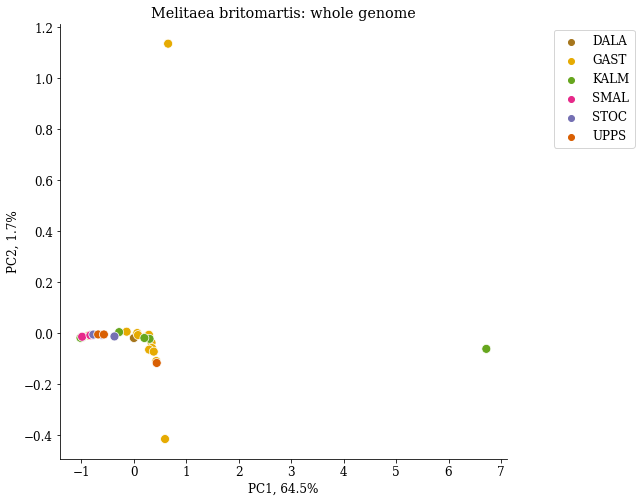

In [11]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['popID'], palette="Dark2_r", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

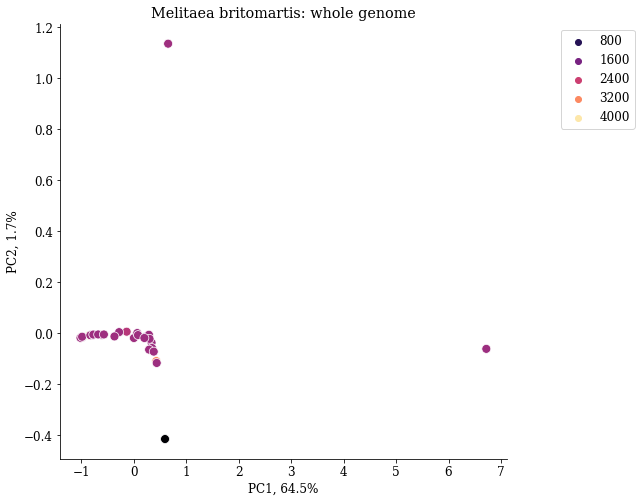

In [12]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Year'], palette="magma", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

## All new (all genome)

In [39]:
cov_matrix = np.genfromtxt("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/all.assmann.cov") # Reads in estimated covariance matrix (text)
cov_matrix

pca = PCA()
pca_result = pca.fit_transform(cov_matrix)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([3.68769284e-01, 1.64100252e-02, 1.50684950e-02, 1.47489653e-02,
       1.45141475e-02, 1.43779306e-02, 1.42111618e-02, 1.39910257e-02,
       1.39500046e-02, 1.37767875e-02, 1.37718881e-02, 1.37641620e-02,
       1.37519527e-02, 1.37493775e-02, 1.37429811e-02, 1.37409858e-02,
       1.37379335e-02, 1.37361851e-02, 1.37340598e-02, 1.37328388e-02,
       1.37323279e-02, 1.37314893e-02, 1.37305683e-02, 1.37298166e-02,
       1.36983133e-02, 1.36635820e-02, 1.36177081e-02, 1.35135004e-02,
       1.34946369e-02, 1.34578303e-02, 1.34502503e-02, 1.33993324e-02,
       1.29964054e-02, 1.28268809e-02, 1.27939844e-02, 1.27092994e-02,
       1.25424123e-02, 1.24983339e-02, 1.24246252e-02, 1.23451333e-02,
       1.21082865e-02, 1.15558702e-02, 1.13794952e-02, 1.13281961e-02,
       1.13094878e-02, 1.10193969e-02, 1.08722870e-02, 1.01420313e-02,
       8.64832630e-03, 3.58637456e-35])

In [51]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sample_chroms3.list", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels


pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df

PC1       PC2       PC3       PC4       PC5  \
0                                                                             
ALTA_1_2015/ALTA_1_2015   -1.014008 -0.048508 -0.040170 -0.014554 -0.015601   
BAJK_1_2016/BAJK_1_2016    1.058667 -0.010247 -0.012868 -0.000218 -0.012040   
BAJK_2_2016/BAJK_2_2016    0.331080  0.047295  0.105889  0.000891 -0.046856   
BELA_1_2004/BELA_1_2004   -0.928117 -0.019822 -0.008067  0.003380  0.003278   
CHEH_1_1989/CHEH_1_1989   -1.111166 -0.230730 -0.182604  0.760783  0.229141   
JAPA_1_1994/JAPA_1_1994    1.465563 -0.224982 -0.353243 -0.024067 -0.216273   
JAPA_2_1994/JAPA_2_1994   -0.951694 -0.023792 -0.024344 -0.006421 -0.004228   
KALM_10_1983/KALM_10_1983 -0.602798  0.078228  0.268067  0.014896 -0.032011   
KALM_1_2018/KALM_1_2018   -1.068444 -0.096351 -0.049251 -0.014435 -0.035824   
KALM_9_1981/KALM_9_1981   -0.559461  0.145148  0.592360  0.057743 -0.618866   
KAZA_1_2006/KAZA_1_2006    1.068105 -0.011654 -0.015099  0.000082 -0.011964   
KAZA_2_2006/KAZA_2_2006    0.576655  0.075552  0.252260  0.003393  0.144738   
KRAS_1_2002/KRAS_1_2002    1.148839 -0.039024 -0.049747 -0.002723 -0.042697   
KRAS_3_2002/KRAS_3_2002   -1.123109 -0.180890 -0.084442 -0.021028 -0.145842   
POLA_2_2003/POLA_2_2003   -1.067082 -0.100992 -0.042543 -0.018093 -0.053971   
RUSS_1_1998/RUSS_1_1998    0.658009  0.094873  0.465720  0.042304  0.654373   
RUSS_3_1999/RUSS_3_1999   -1.102321 -0.141450 -0.068988 -0.062958 -0.080231   
RUSS_4_2008/RUSS_4_2008    1.214191 -0.059423 -0.073485 -0.003173 -0.044326   
RUSS_5_2008/RUSS_5_2008    0.366121  0.047081  0.102621 -0.005520 -0.054237   
SLOV_1_1990/SLOV_1_1990   -1.085036 -0.205309 -0.086807 -0.695594  0.263032   
SMAL_4_1996/SMAL_4_1996    1.275671 -0.091910 -0.116679 -0.004470 -0.071056   
SMAL_5_1998/SMAL_5_1998    1.100911 -0.017839 -0.021671 -0.000931 -0.013884   
STOC_6_1965/STOC_6_1965    1.185571 -0.053678 -0.071795 -0.001394 -0.049120   
URAL_2_1995/URAL_2_1995   -1.026900 -0.060927 -0.036524 -0.014453 -0.022568   
VAST_1_1983/VAST_1_1983   -0.572591  0.951473 -0.399030 -0.005017  0.018521   
DALA_1_1965/DALA_1_1965   -0.229099  0.007089 -0.004304  0.001586  0.019717   
GAST_10_1965/GAST_10_1965 -0.227582  0.007074 -0.004358  0.001612  0.019661   
GAST_11_1965/GAST_11_1965 -0.181408  0.007342 -0.003622  0.000914  0.018757   
GAST_1_1941/GAST_1_1941   -0.228498  0.007094 -0.004360  0.001579  0.019725   
GAST_12_1969/GAST_12_1969  0.779087  0.005239  0.001654 -0.001899 -0.009030   
GAST_14_1969/GAST_14_1969  0.180229  0.007602  0.000871 -0.001459  0.001821   
GAST_2_1941/GAST_2_1941   -0.227296  0.007093 -0.004423  0.001653  0.019710   
GAST_3_1941/GAST_3_1941   -0.084319  0.007559 -0.002582  0.000566  0.015086   
GAST_4_1941/GAST_4_1941   -0.060093  0.007949 -0.002475  0.000899  0.014056   
GAST_5_1943/GAST_5_1943   -0.209813  0.006997 -0.004205  0.002006  0.018980   
GAST_6_1965/GAST_6_1965   -0.216861  0.007129 -0.004051  0.001477  0.019427   
GAST_7_1965/GAST_7_1965   -0.227242  0.007105 -0.004368  0.001616  0.019776   
KALM_2_1955/KALM_2_1955    0.626982  0.005764  0.001939 -0.001049 -0.007925   
KALM_3_1955/KALM_3_1955   -0.183502  0.007099 -0.003764  0.001953  0.018259   
KALM_5_1961/KALM_5_1961    0.284974  0.007555 -0.000780 -0.001652 -0.001770   
KALM_6_1961/KALM_6_1961   -0.224345  0.007112 -0.004300  0.001588  0.019609   
KALM_8_1969/KALM_8_1969    0.602950  0.006259  0.001689 -0.000557 -0.007968   
SMAL_2_1967/SMAL_2_1967    0.320151  0.007630  0.001854 -0.000854 -0.002935   
SMAL_3_1967/SMAL_3_1967    0.016143  0.007416 -0.002250 -0.000131  0.009784   
STOC_2_1965/STOC_2_1965    0.305911  0.007770  0.002501 -0.001743 -0.001798   
STOC_4_1965/STOC_4_1965    0.140068  0.007252 -0.000016  0.000381  0.004953   
STOC_5_1965/STOC_5_1965    0.321575  0.007001  0.001366 -0.001050 -0.002830   
UPPS_1_1951/UPPS_1_1951   -0.226252  0.007098 -0.004331  0.001598  0.019650   
UPPS_2_1958/UPPS_2_1958   -0.079819  0.007557 -0.003069  0.001244  0.014161   
UPP

In [50]:
labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sample_chroms3.list", delimiter=' ', header=None

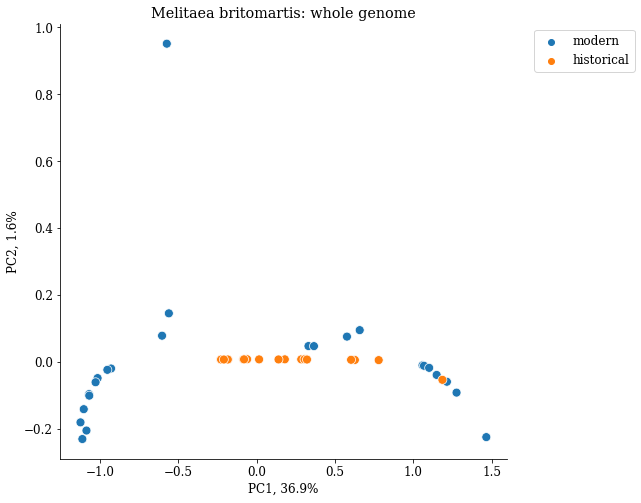

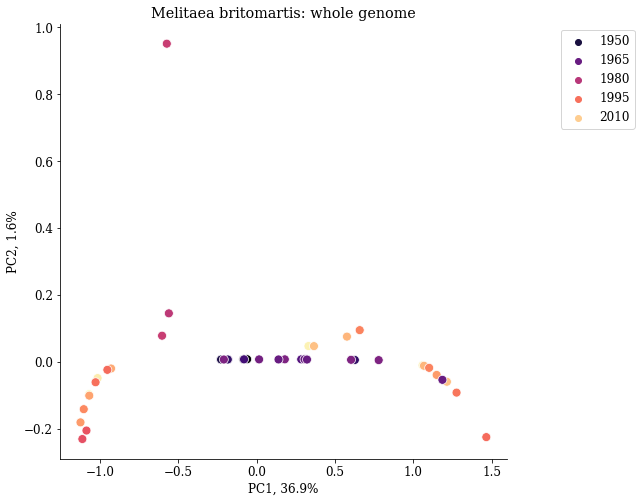

In [52]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['era'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Year'], palette="magma", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

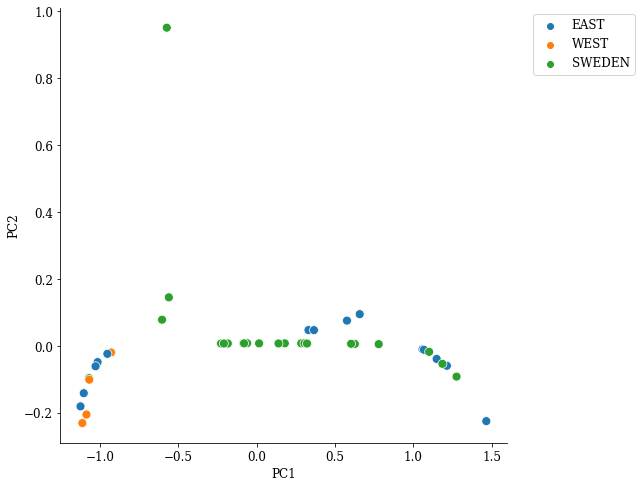

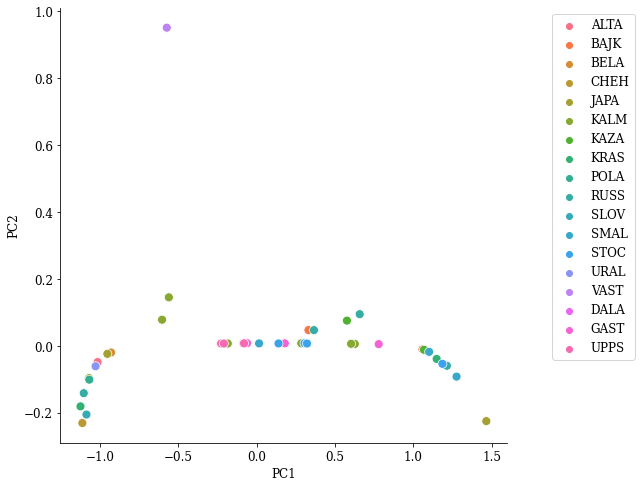

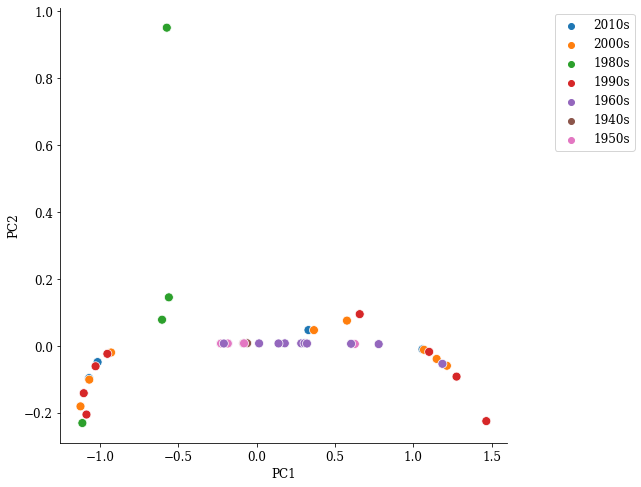

In [53]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Category'], s=80)


sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['popID'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Decade'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

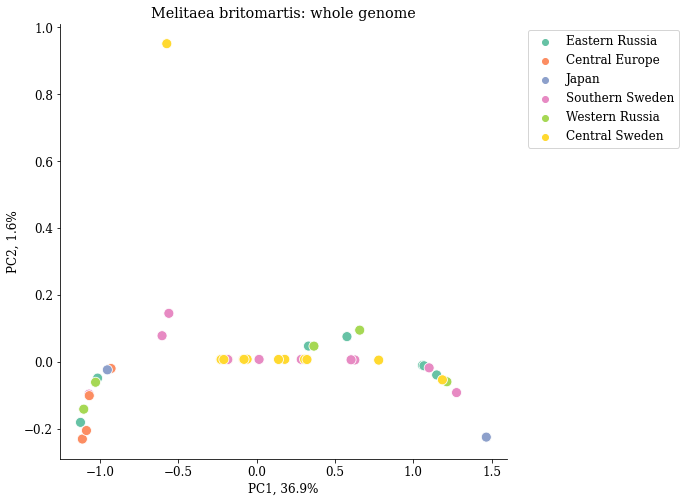

In [59]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Global'], palette="Set2", s=100)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
#ml.rcParams['figure.figsize'] = (8.0, 8.0)
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

### New filter for 0.33 likelihoods

In [4]:
cov_matrix = np.genfromtxt("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/edited_beagle3_filtered.assmann.cov") # Reads in estimated covariance matrix (text)
cov_matrix

pca = PCA()
pca_result = pca.fit_transform(cov_matrix)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([3.81969362e-01, 1.26432691e-01, 1.10979992e-01, 1.00357298e-01,
       6.26020534e-02, 5.80642207e-02, 5.51264170e-02, 5.29082430e-02,
       5.15597230e-02, 1.27344775e-34])

In [9]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sample_chromsFilt.list", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels


pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df

PC1       PC2       PC3       PC4       PC5  \
0                                                                             
KALM_10_1983/KALM_10_1983  0.724420 -0.447589 -0.278927  0.888207 -0.005751   
KALM_1_2018/KALM_1_2018    0.516811 -0.412238 -0.770119 -0.641027  0.018755   
KALM_9_1981/KALM_9_1981    0.810128 -0.535031  0.861202 -0.288126 -0.011452   
SMAL_4_1996/SMAL_4_1996   -0.541362  0.098950  0.074118  0.022990  0.718630   
SMAL_5_1998/SMAL_5_1998   -0.658620  0.123304  0.036356  0.032746 -0.340960   
STOC_6_1965/STOC_6_1965   -0.467605  0.068532  0.035797 -0.013567 -0.371511   
VAST_1_1983/VAST_1_1983    1.263259  0.962240  0.002737 -0.028245 -0.002423   
GAST_12_1969/GAST_12_1969 -0.522051  0.041031  0.039075 -0.003330 -0.126561   
KALM_2_1955/KALM_2_1955   -0.564826  0.024800  0.000689  0.024109  0.122424   
KALM_8_1969/KALM_8_1969   -0.560154  0.076001 -0.000927  0.006242 -0.001150   

                                PC6       PC7       PC8       PC9  \
0                                                                   
KALM_10_1983/KALM_10_1983  0.010293  0.013258 -0.016732  0.010163   
KALM_1_2018/KALM_1_2018    0.037928  0.030843 -0.006187  0.012409   
KALM_9_1981/KALM_9_1981    0.039655 -0.005910 -0.001690 -0.023797   
SMAL_4_1996/SMAL_4_1996    0.077119  0.154684 -0.117243  0.286157   
SMAL_5_1998/SMAL_5_1998    0.607568  0.333318  0.031177 -0.018445   
STOC_6_1965/STOC_6_1965   -0.218245 -0.275708 -0.047678  0.577279   
VAST_1_1983/VAST_1_1983   -0.004600 -0.003561  0.023480 -0.025866   
GAST_12_1969/GAST_12_1969 -0.563677  0.478505  0.008056 -0.216605   
KALM_2_1955/KALM_2_1955   -0.007091 -0.330114  0.634389 -0.211035   
KALM_8_1969/KALM_8_1969    0.021050 -0.395314 -0.507573 -0.390260   

                                   PC10            ID popID Category  Year  \
0                                                                            
KALM_10_1983/KALM_10_1983  1.277457e-17  KALM_10_1983  KALM   SWEDEN  1983   
KALM_1_2018/KALM_1_2018    1.277457e-17   KALM_1_2018  KALM   SWEDEN  2018   
KALM_9_1981/KALM_9_1981    1.277457e-17   KALM_9_1981  KALM   SWEDEN  1981   
SMAL_4_1996/SMAL_4_1996    1.277457e-17   SMAL_4_1996  SMAL   SWEDEN  1996   
SMAL_5_1998/SMAL_5_1998    1.277457e-17   SMAL_5_1998  SMAL   SWEDEN  1998   
STOC_6_1965/STOC_6_1965    1.277457e-17   STOC_6_1965  STOC   SWEDEN  1965   
VAST_1_1983/VAST_1_1983    1.277457e-17   VAST_1_1983  VAST   SWEDEN  1983   
GAST_12_1969/GAST_12_1969  1.277457e-17  GAST_12_1969  GAST   SWEDEN  1969   
KALM_2_1955/KALM_2_1955    1.277457e-17   KALM_2_1955  KALM   SWEDEN  1955   
KALM_8_1969/KALM_8_1969    1.277457e-17   KALM_8_1969  KALM   SWEDEN  1969   

                          Decade           Global         era  
0                                                              
KALM_10_1983/KALM_10_1983  1980s  Southern Sweden      modern  
KALM_1_2018/KALM_1_2018    2010s  Southern Sweden      modern  
KALM_9_1981/KALM_9_1981    1980s  Southern Sweden      modern  
SMAL_4_1996/SMAL_4_1996    1990s  Southern Sweden      modern  
SMAL_5_1998/SMAL_5_1998    1990s  Southern Sweden      modern  
STOC_6_1965/STOC_6_1965    1960s   Central Sweden  historical  
VAST_1_1983/VAST_1_1983    1980s   Central Sweden      modern  
GAST_12_1969/GAST_12_1969  1960s   Central Sweden  historical  
KALM_2_1955/KALM_2_1955    1950s  Southern Sweden  historical  
KALM_8_1969/KALM_8_1969    1960s  Southern Sweden  historical

In [6]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.724420 -0.447589 -0.278927  0.888207 -0.005751  0.010293  0.013258   
1  0.516811 -0.412238 -0.770119 -0.641027  0.018755  0.037928  0.030843   
2  0.810128 -0.535031  0.861202 -0.288126 -0.011452  0.039655 -0.005910   
3 -0.541362  0.098950  0.074118  0.022990  0.718630  0.077119  0.154684   
4 -0.658620  0.123304  0.036356  0.032746 -0.340960  0.607568  0.333318   
5 -0.467605  0.068532  0.035797 -0.013567 -0.371511 -0.218245 -0.275708   
6  1.263259  0.962240  0.002737 -0.028245 -0.002423 -0.004600 -0.003561   
7 -0.522051  0.041031  0.039075 -0.003330 -0.126561 -0.563677  0.478505   
8 -0.564826  0.024800  0.000689  0.024109  0.122424 -0.007091 -0.330114   
9 -0.560154  0.076001 -0.000927  0.006242 -0.001150  0.021050 -0.395314   

        PC8       PC9          PC10  
0 -0.016732  0.010163  1.277457e-17  
1 -0.006187  0.012409  1.277457e-17  
2 -0.001690 -0.023797  1.277457e-17  
3 -0.117243  0.286157  1.277457e-17  
4  0.031177 -0.018445  1.277457e-17  
5 -0.047678  0.577279  1.277457e-17  
6  0.023480 -0.025866  1.277457e-17  
7  0.008056 -0.216605  1.277457e-17  
8  0.634389 -0.211035  1.277457e-17  
9 -0.507573 -0.390260  1.277457e-17

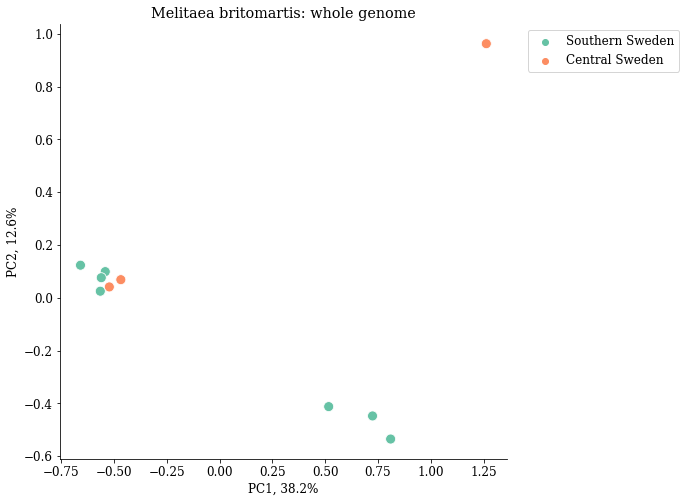

In [12]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Global'], palette="Set2", s=100)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
#ml.rcParams['figure.figsize'] = (8.0, 8.0)
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

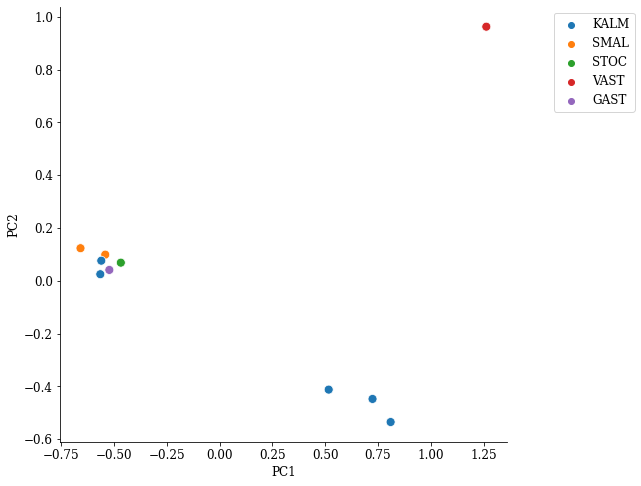

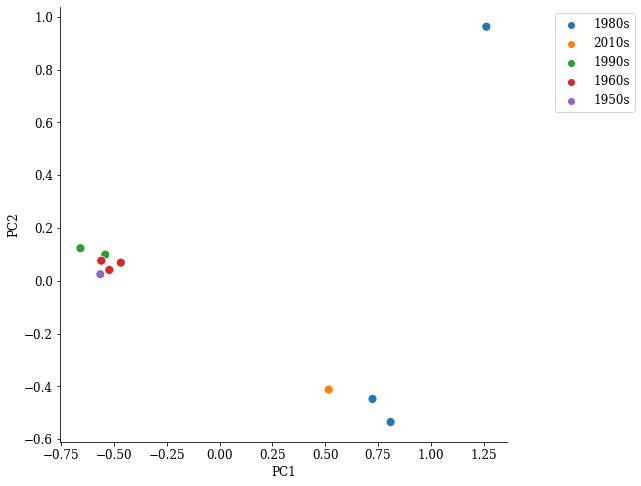

In [11]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['popID'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Decade'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

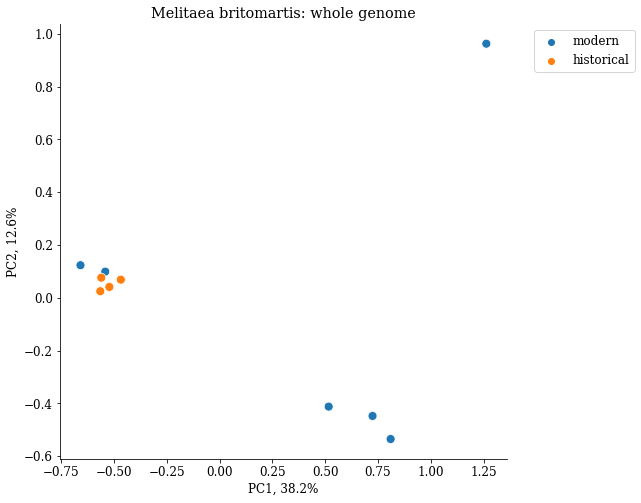

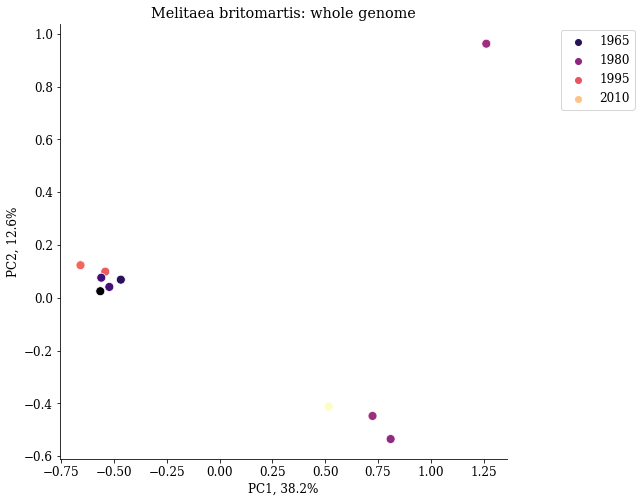

In [13]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['era'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Year'], palette="magma", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

#### w/o VAST

In [15]:
cov_matrix = np.genfromtxt("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/edited_beagle3_filtered.beagle.noVAST.assmann.cov") # Reads in estimated covariance matrix (text)
cov_matrix

pca = PCA()
pca_result = pca.fit_transform(cov_matrix)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([4.59686494e-01, 1.24123227e-01, 1.09874368e-01, 7.03812335e-02,
       6.28629569e-02, 5.93468654e-02, 5.75150384e-02, 5.62098159e-02,
       7.48945485e-35])

In [16]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sample_chromsFilt0.list", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels


pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df

PC1       PC2       PC3       PC4       PC5  \
0                                                                             
KALM_10_1983/KALM_10_1983  1.198001 -0.258802  0.895563 -0.015247 -0.009021   
KALM_1_2018/KALM_1_2018    1.084024 -0.703255 -0.694927 -0.003700  0.037205   
KALM_9_1981/KALM_9_1981    1.073818  0.984321 -0.259973 -0.015984  0.039854   
SMAL_4_1996/SMAL_4_1996   -0.496009  0.008865  0.014866  0.779129  0.068204   
SMAL_5_1998/SMAL_5_1998   -0.687536 -0.012939  0.050144 -0.296907  0.699209   
STOC_6_1965/STOC_6_1965   -0.470496 -0.001466 -0.021671 -0.392166 -0.299449   
GAST_12_1969/GAST_12_1969 -0.570242  0.020705 -0.007689 -0.106011 -0.424649   
KALM_2_1955/KALM_2_1955   -0.517292 -0.009953  0.014599  0.083067 -0.094902   
KALM_8_1969/KALM_8_1969   -0.614267 -0.027476  0.009089 -0.032180 -0.016451   

                                PC6       PC7       PC8           PC9  \
0                                                                       
KALM_10_1983/KALM_10_1983  0.011725 -0.003656  0.011822  1.013449e-17   
KALM_1_2018/KALM_1_2018    0.020403  0.012453  0.012906  1.013449e-17   
KALM_9_1981/KALM_9_1981   -0.006590  0.004928  0.025400  1.013449e-17   
SMAL_4_1996/SMAL_4_1996    0.104341 -0.234846 -0.182364  1.013449e-17   
SMAL_5_1998/SMAL_5_1998    0.207506  0.052906 -0.080230  1.013449e-17   
STOC_6_1965/STOC_6_1965   -0.177989 -0.416706 -0.432028  1.013449e-17   
GAST_12_1969/GAST_12_1969  0.595092  0.218039  0.156821  1.013449e-17   
KALM_2_1955/KALM_2_1955   -0.438454  0.609608 -0.158008  1.013449e-17   
KALM_8_1969/KALM_8_1969   -0.316033 -0.242727  0.645682  1.013449e-17   

                                     ID popID Category  Year Decade  \
0                                                                     
KALM_10_1983/KALM_10_1983  KALM_10_1983  KALM   SWEDEN  1983  1980s   
KALM_1_2018/KALM_1_2018     KALM_1_2018  KALM   SWEDEN  2018  2010s   
KALM_9_1981/KALM_9_1981     KALM_9_1981  KALM   SWEDEN  1981  1980s   
SMAL_4_1996/SMAL_4_1996     SMAL_4_1996  SMAL   SWEDEN  1996  1990s   
SMAL_5_1998/SMAL_5_1998     SMAL_5_1998  SMAL   SWEDEN  1998  1990s   
STOC_6_1965/STOC_6_1965     STOC_6_1965  STOC   SWEDEN  1965  1960s   
GAST_12_1969/GAST_12_1969  GAST_12_1969  GAST   SWEDEN  1969  1960s   
KALM_2_1955/KALM_2_1955     KALM_2_1955  KALM   SWEDEN  1955  1950s   
KALM_8_1969/KALM_8_1969     KALM_8_1969  KALM   SWEDEN  1969  1960s   

                                    Global         era  
0                                                       
KALM_10_1983/KALM_10_1983  Southern Sweden      modern  
KALM_1_2018/KALM_1_2018    Southern Sweden      modern  
KALM_9_1981/KALM_9_1981    Southern Sweden      modern  
SMAL_4_1996/SMAL_4_1996    Southern Sweden      modern  
SMAL_5_1998/SMAL_5_1998    Southern Sweden      modern  
STOC_6_1965/STOC_6_1965     Central Sweden  historical  
GAST_12_1969/GAST_12_1969   Central Sweden  historical  
KALM_2_1955/KALM_2_1955    Southern Sweden  historical  
KALM_8_1969/KALM_8_1969    Southern Sweden  historical

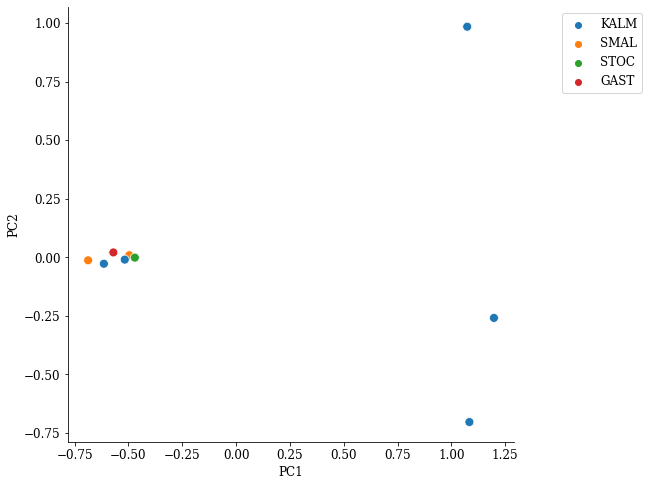

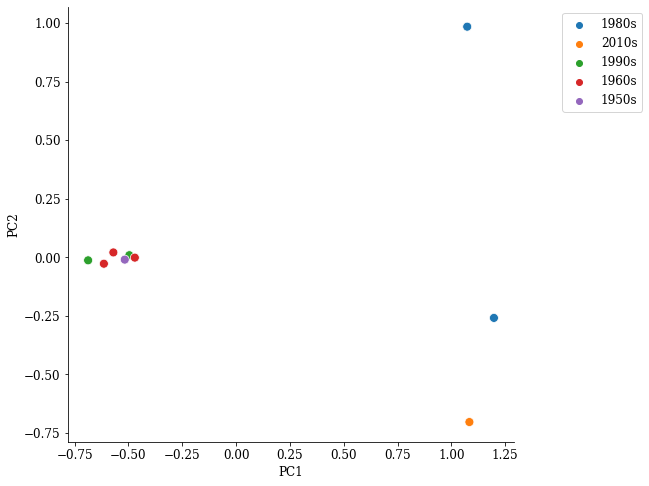

In [17]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['popID'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Decade'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Melitaea britomartis: mtDNA')

# Show the plot
plt.show()

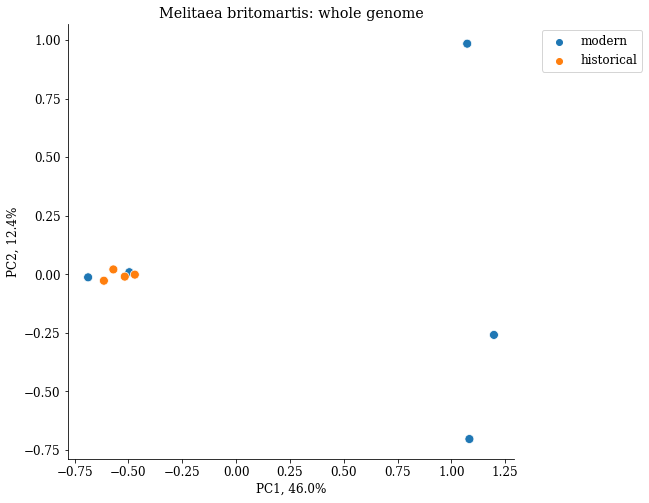

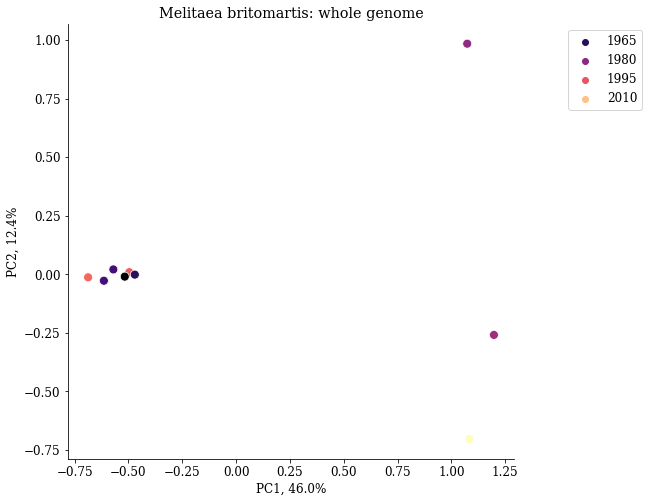

In [18]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['era'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Year'], palette="magma", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
plt.ylabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

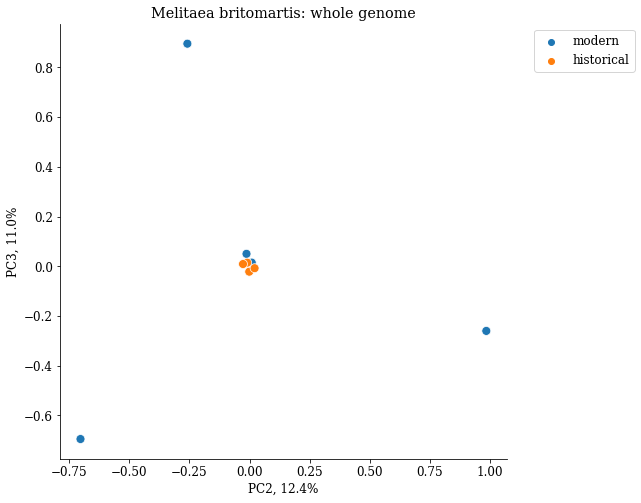

In [20]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC2', y='PC3',hue=pca_df['era'], s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC2, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.ylabel('PC3, '+"{:.1f}".format(explained_variance[2] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

## Inbreeding

In [ ]:
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F"],color='orange',alpha=0.6)
plt.ylabel("Mean F")
plt.xlabel("Individuals")
plt.title("Per Individual Inbreeding")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")
plt.show()

In [1]:
pca_df

NameError: name 'pca_df' is not defined

In [15]:
ind_depth = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/chroms_assmann.inbreed.samples", delimiter=' ', header=None)

In [16]:
ind_depth
ind_depth['F'] = ind_depth[0]
ind_depth['F'] = pd.to_numeric(ind_depth['F'], errors='coerce')
pca_df['Inbreeding'] = ind_depth['F'].values
pca_df

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

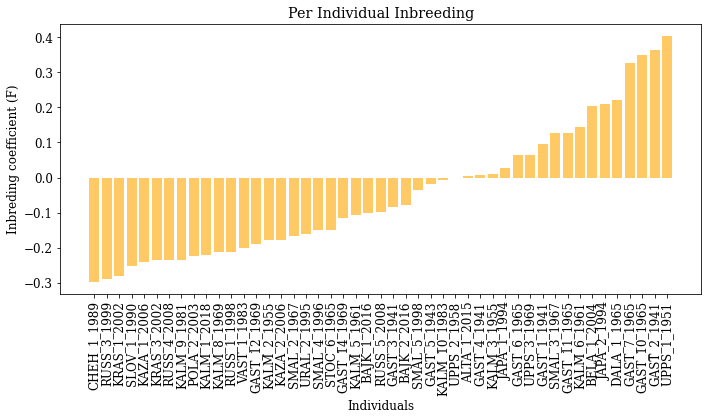

In [52]:
plt.figure(figsize=(10, 6))

ind_depth['F'] = ind_depth[0]
ind_depth

ind_depth.index = labels[0]

ind_depth_sorted = ind_depth.sort_values(by="F", ascending=True)

ind_depth
plt.bar(ind_depth_sorted["ID"], ind_depth_sorted["F"],color='orange',alpha=0.6)
plt.ylabel("Inbreding coefficient (F)")
plt.xlabel("Individuals")
plt.title("Per Individual Inbreeding")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")
plt.show()

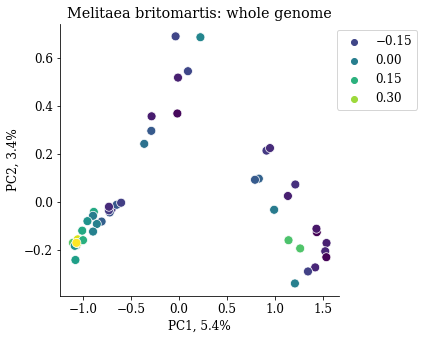

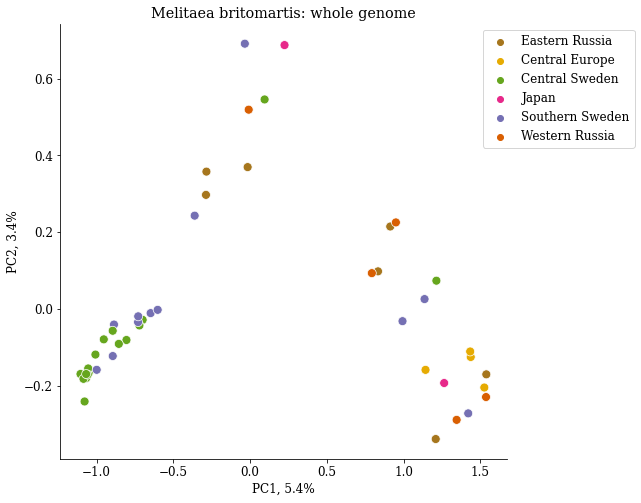

In [12]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Inbreeding'], palette="viridis", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, 5.4%')
plt.ylabel('PC2, 3.4%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Global'], palette="Dark2_r", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, 5.4%')
plt.ylabel('PC2, 3.4%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

In [36]:
ind_depth['F'] = ind_depth[0]
ind_depth

ind_depth.index = labels[0]
ind_depth['ID'] = labels[0]

ind_depth

0         F            ID
0                                             
ALTA_1_2015   0.004809  0.004809   ALTA_1_2015
BAJK_1_2016  -0.100376 -0.100376   BAJK_1_2016
BAJK_2_2016  -0.077953 -0.077953   BAJK_2_2016
BELA_1_2004   0.204141  0.204141   BELA_1_2004
CHEH_1_1989  -0.296157 -0.296157   CHEH_1_1989
DALA_1_1965   0.220299  0.220299   DALA_1_1965
GAST_10_1965  0.348127  0.348127  GAST_10_1965
GAST_11_1965  0.126567  0.126567  GAST_11_1965
GAST_1_1941   0.095847  0.095847   GAST_1_1941
GAST_12_1969 -0.188648 -0.188648  GAST_12_1969
GAST_14_1969 -0.116569 -0.116569  GAST_14_1969
GAST_2_1941   0.362879  0.362879   GAST_2_1941
GAST_3_1941  -0.085180 -0.085180   GAST_3_1941
GAST_4_1941   0.008350  0.008350   GAST_4_1941
GAST_5_1943  -0.017415 -0.017415   GAST_5_1943
GAST_6_1965   0.063113  0.063113   GAST_6_1965
GAST_7_1965   0.325765  0.325765   GAST_7_1965
JAPA_1_1994   0.025976  0.025976   JAPA_1_1994
JAPA_2_1994   0.210195  0.210195   JAPA_2_1994
KALM_10_1983 -0.007690 -0.007690  KALM_10_1983
KALM_1_2018  -0.220772 -0.220772   KALM_1_2018
KALM_2_1955  -0.177400 -0.177400   KALM_2_1955
KALM_3_1955   0.008965  0.008965   KALM_3_1955
KALM_5_1961  -0.105404 -0.105404   KALM_5_1961
KALM_6_1961   0.144973  0.144973   KALM_6_1961
KALM_8_1969  -0.212642 -0.212642   KALM_8_1969
KALM_9_1981  -0.234915 -0.234915   KALM_9_1981
KAZA_1_2006  -0.239558 -0.239558   KAZA_1_2006
KAZA_2_2006  -0.177083 -0.177083   KAZA_2_2006
KRAS_1_2002  -0.280654 -0.280654   KRAS_1_2002
KRAS_3_2002  -0.236050 -0.236050   KRAS_3_2002
POLA_2_2003  -0.222238 -0.222238   POLA_2_2003
RUSS_1_1998  -0.211198 -0.211198   RUSS_1_1998
RUSS_3_1999  -0.289954 -0.289954   RUSS_3_1999
RUSS_4_2008  -0.235592 -0.235592   RUSS_4_2008
RUSS_5_2008  -0.097362 -0.097362   RUSS_5_2008
SLOV_1_1990  -0.251953 -0.251953   SLOV_1_1990
SMAL_2_1967  -0.166649 -0.166649   SMAL_2_1967
SMAL_3_1967   0.125570  0.125570   SMAL_3_1967
SMAL_4_1996  -0.150387 -0.150387   SMAL_4_1996
SMAL_5_1998  -0.035566 -0.035566   SMAL_5_1998
STOC_6_1965  -0.148335 -0.148335   STOC_6_1965
UPPS_1_1951   0.403035  0.403035   UPPS_1_1951
UPPS_2_1958  -0.001044 -0.001044   UPPS_2_1958
UPPS_3_1969   0.063805  0.063805   UPPS_3_1969
URAL_2_1995  -0.161016 -0.161016   URAL_2_1995
VAST_1_1983  -0.200183 -0.200183   VAST_1_1983

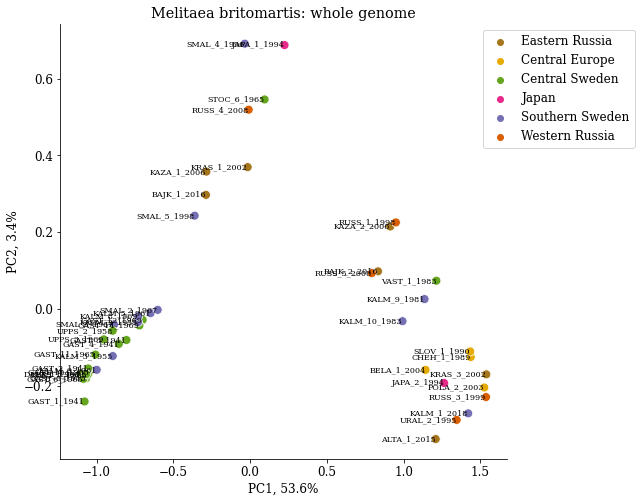

In [18]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue=pca_df['Global'], palette="Dark2_r", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.xlabel('PC1, 53.6%')
plt.ylabel('PC2, 3.4%')
plt.title('Melitaea britomartis: whole genome')

for i in range(len(pca_df)):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['ID'][i], ha='right', va='center', size=8)
    
# Show the plot
plt.show()

In [ ]:
EBC BAJK_1
EBC BAJK_2
EBC BELA_1
EBC CHEH_1
EBC JAPA_1
EBC JAPA_2
EBC KALM_1
EBC KRAS_3
EBC POLA_2
EBC RUSS_1
EBC RUSS_3
EBC RUSS_4
EBC RUSS_5
EBC SLOV_1
EBC SMAL_4
EBC URAL_2
EBC VAST_1
EBC ALTA_1
EBC KALM_9
EBC KAZA_1
EBC KAZA_2

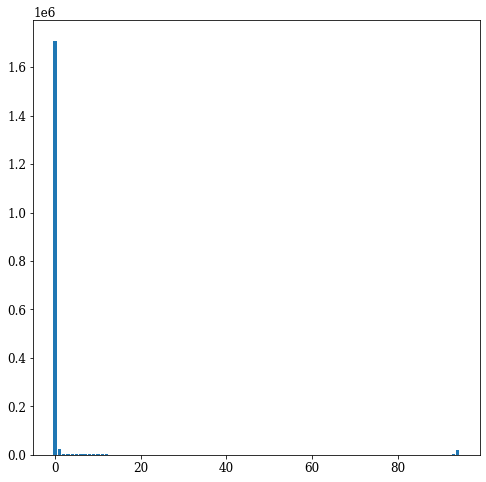

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt

basedir = "/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/"
sfs_filename = os.path.join(basedir, "PCA_ANGSD", "chroms_assmann_saf.sfs")

# Load data from the file
sfs = np.loadtxt(sfs_filename)

# Create a barplot
plt.bar(range(len(sfs)), sfs)

# Display the plot
plt.show()


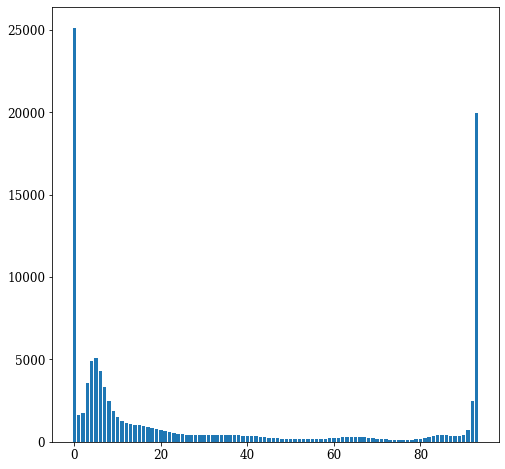

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

basedir = "/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/"
sfs_filename = os.path.join(basedir, "PCA_ANGSD", "chroms_assmann_saf.sfs")

# Load data from the file
sfs = np.loadtxt(sfs_filename)

# Create a barplot
plt.bar(range(len(sfs)), sfs)

# Display the plot
plt.show()

# GenErode

In [92]:
import pandas as pd
import re

# Read the data from the file
pca_df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisALLIND.hist.eigenvec", delimiter=' ', header=None)
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sampleID_hist.txt", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels


pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df.rename(index={2: "a", 3: "c"})
#pca_df = pca_df.iloc[2:]
pca_df


0  1         2         3         4         5         6  \
0                                                                       
DALA_1_1965    1  1 -0.046364  0.113425  0.060443  0.156389 -0.115067   
GAST_10_1965   2  1 -0.123038  0.219000  0.039907 -0.238458 -0.151972   
GAST_11_1965   3  1  0.017887  0.024235 -0.040364  0.116509  0.101428   
GAST_1_1941    4  1 -0.020829  0.056118 -0.124616  0.183013 -0.128135   
GAST_12_1969   5  1  0.132260 -0.015640 -0.112318  0.045722  0.048878   
GAST_13_1969   6  1 -0.315878  0.056657  0.060878  0.437694 -0.176093   
GAST_14_1969   7  1  0.125897 -0.004965 -0.176084  0.030462  0.141554   
GAST_2_1941    8  1 -0.100357 -0.066597 -0.036742  0.218391 -0.435070   
GAST_3_1941    9  1  0.101980 -0.101328 -0.227821 -0.032907 -0.006657   
GAST_4_1941   10  1  0.072373 -0.017699 -0.005786  0.002511  0.230902   
GAST_5_1943   11  1 -0.031368  0.008140 -0.139446  0.109256  0.133724   
GAST_6_1965   12  1 -0.000872 -0.094987 -0.086829 -0.266900 -0.306972   
GAST_7_1965   13  1  0.058771  0.079552 -0.046631 -0.366893 -0.329336   
GAST_8_1965   14  1 -0.048878  0.451537  0.016765 -0.254315 -0.163681   
GAST_9_1965   15  1 -0.112046  0.353828  0.156475 -0.191258  0.394187   
KALM_2_1955   16  1  0.082503  0.001472 -0.062694  0.204637  0.145508   
KALM_3_1955   17  1  0.048356  0.043891 -0.159343 -0.179201 -0.152156   
KALM_4_1957   18  1  0.648528  0.020081  0.677457  0.108803 -0.115747   
KALM_5_1961   19  1  0.076916 -0.018660 -0.194341  0.011874 -0.001312   
KALM_6_1961   20  1 -0.112192  0.103592 -0.003120  0.239387  0.077242   
KALM_7_1961   21  1 -0.157872 -0.268581  0.218368 -0.074881 -0.066684   
KALM_8_1969   22  1  0.116619 -0.004937 -0.166200  0.088096  0.029009   
SMAL_1_1967   23  1 -0.343198 -0.313382  0.241756 -0.163548  0.081055   
SMAL_2_1967   24  1  0.139832 -0.066809 -0.159181  0.015032  0.119424   
SMAL_3_1967   25  1 -0.255849 -0.313215  0.222895 -0.225900  0.202830   
STOC_1_1965   26  1 -0.277607  0.116930  0.227375  0.229853 -0.099667   
STOC_2_1965   27  1  0.002028  0.011863  0.027135 -0.044093  0.234724   
STOC_3_1965   28  1 -0.122438  0.277346  0.084257 -0.054796  0.024690   
STOC_4_1965   29  1  0.127044 -0.166811 -0.146694 -0.103557 -0.002442   
UPPS_1_1951   30  1 -0.045203  0.293893 -0.004241 -0.028220  0.195110   
UPPS_2_1958   31  1  0.062376 -0.061093 -0.084500  0.040879  0.055966   
UPPS_3_1969   32  1  0.007278 -0.278266  0.004996 -0.059816  0.018218   

                     7         8         9  ...        19        20        21  \
0                                           ...                                 
DALA_1_1965   0.089674  0.339241  0.029992  ...  0.007059 -0.560003 -0.027124   
GAST_10_1965  0.383769  0.000007  0.012497  ... -0.056945 -0.180987  0.112823   
GAST_11_1965 -0.151877 -0.121287  0.075755  ...  0.009817 -0.145553  0.176168   
GAST_1_1941   0.283879  0.174510 -0.163239  ... -0.037105  0.151748 -0.001859   
GAST_12_1969 -0.089363 -0.070283  0.106005  ... -0.012792 -0.002161  0.257477   
GAST_13_1969  0.065963 -0.476163 -0.177705  ...  0.069558 -0.153861  0.017713   
GAST_14_1969 -0.024095 -0.014970  0.238331  ...  0.028778 -0.234389 -0.216793   
GAST_2_1941   0.079871  0.455093  0.137295  ... -0.189973  0.215864  0.072648   
GAST_3_1941  -0.128709 -0.073523 -0.100762  ...  0.292151 -0.165186 -0.300998   
GAST_4_1941   0.171511 -0.073244  0.112873  ... -0.351268 -0.051143  0.039490   
GAST_5_1943   0.189370 -0.081186 -0.193174  ...  0.183481 -0.004830  0.354293   
GAST_6_1965   0.186662 -0.287050  0.109668  ... -0.050697 -0.084424 -0.079091   
GAST_7_1965  -0.006040 -0.234913  0.305125  ... -0.007726  0.078717 -0.020842   
GAST_8_1965  -0.170750  0.085356 -0.174673  ... -0.032646  0.154816 -0.260919   
GAST_9_1965   0.102737  0.009533  0.130808  ...  0.078705 -0.029913  0.028909   
KALM_2_1955   0.136882  0.053792  0.034144  ... -0.144476 -0.039262 -0.015327   
KALM_3_1955  -0.087765 -0.017768 -0.425507  ...  0.164351 -0.042847  0.314

In [14]:
pca_df

0  1         2         3         4         5         6  \
0                                                                       
DALA_1_1965    1  1 -0.046364  0.113425  0.060443  0.156389 -0.115067   
GAST_10_1965   2  1 -0.123038  0.219000  0.039907 -0.238458 -0.151972   
GAST_11_1965   3  1  0.017887  0.024235 -0.040364  0.116509  0.101428   
GAST_1_1941    4  1 -0.020829  0.056118 -0.124616  0.183013 -0.128135   
GAST_12_1969   5  1  0.132260 -0.015640 -0.112318  0.045722  0.048878   
GAST_13_1969   6  1 -0.315878  0.056657  0.060878  0.437694 -0.176093   
GAST_14_1969   7  1  0.125897 -0.004965 -0.176084  0.030462  0.141554   
GAST_2_1941    8  1 -0.100357 -0.066597 -0.036742  0.218391 -0.435070   
GAST_3_1941    9  1  0.101980 -0.101328 -0.227821 -0.032907 -0.006657   
GAST_4_1941   10  1  0.072373 -0.017699 -0.005786  0.002511  0.230902   
GAST_5_1943   11  1 -0.031368  0.008140 -0.139446  0.109256  0.133724   
GAST_6_1965   12  1 -0.000872 -0.094987 -0.086829 -0.266900 -0.306972   
GAST_7_1965   13  1  0.058771  0.079552 -0.046631 -0.366893 -0.329336   
GAST_8_1965   14  1 -0.048878  0.451537  0.016765 -0.254315 -0.163681   
GAST_9_1965   15  1 -0.112046  0.353828  0.156475 -0.191258  0.394187   
KALM_2_1955   16  1  0.082503  0.001472 -0.062694  0.204637  0.145508   
KALM_3_1955   17  1  0.048356  0.043891 -0.159343 -0.179201 -0.152156   
KALM_4_1957   18  1  0.648528  0.020081  0.677457  0.108803 -0.115747   
KALM_5_1961   19  1  0.076916 -0.018660 -0.194341  0.011874 -0.001312   
KALM_6_1961   20  1 -0.112192  0.103592 -0.003120  0.239387  0.077242   
KALM_7_1961   21  1 -0.157872 -0.268581  0.218368 -0.074881 -0.066684   
KALM_8_1969   22  1  0.116619 -0.004937 -0.166200  0.088096  0.029009   
SMAL_1_1967   23  1 -0.343198 -0.313382  0.241756 -0.163548  0.081055   
SMAL_2_1967   24  1  0.139832 -0.066809 -0.159181  0.015032  0.119424   
SMAL_3_1967   25  1 -0.255849 -0.313215  0.222895 -0.225900  0.202830   
STOC_1_1965   26  1 -0.277607  0.116930  0.227375  0.229853 -0.099667   
STOC_2_1965   27  1  0.002028  0.011863  0.027135 -0.044093  0.234724   
STOC_3_1965   28  1 -0.122438  0.277346  0.084257 -0.054796  0.024690   
STOC_4_1965   29  1  0.127044 -0.166811 -0.146694 -0.103557 -0.002442   
UPPS_1_1951   30  1 -0.045203  0.293893 -0.004241 -0.028220  0.195110   
UPPS_2_1958   31  1  0.062376 -0.061093 -0.084500  0.040879  0.055966   
UPPS_3_1969   32  1  0.007278 -0.278266  0.004996 -0.059816  0.018218   

                     7         8         9  ...        19        20        21  \
0                                           ...                                 
DALA_1_1965   0.089674  0.339241  0.029992  ...  0.007059 -0.560003 -0.027124   
GAST_10_1965  0.383769  0.000007  0.012497  ... -0.056945 -0.180987  0.112823   
GAST_11_1965 -0.151877 -0.121287  0.075755  ...  0.009817 -0.145553  0.176168   
GAST_1_1941   0.283879  0.174510 -0.163239  ... -0.037105  0.151748 -0.001859   
GAST_12_1969 -0.089363 -0.070283  0.106005  ... -0.012792 -0.002161  0.257477   
GAST_13_1969  0.065963 -0.476163 -0.177705  ...  0.069558 -0.153861  0.017713   
GAST_14_1969 -0.024095 -0.014970  0.238331  ...  0.028778 -0.234389 -0.216793   
GAST_2_1941   0.079871  0.455093  0.137295  ... -0.189973  0.215864  0.072648   
GAST_3_1941  -0.128709 -0.073523 -0.100762  ...  0.292151 -0.165186 -0.300998   
GAST_4_1941   0.171511 -0.073244  0.112873  ... -0.351268 -0.051143  0.039490   
GAST_5_1943   0.189370 -0.081186 -0.193174  ...  0.183481 -0.004830  0.354293   
GAST_6_1965   0.186662 -0.287050  0.109668  ... -0.050697 -0.084424 -0.079091   
GAST_7_1965  -0.006040 -0.234913  0.305125  ... -0.007726  0.078717 -0.020842   
GAST_8_1965  -0.170750  0.085356 -0.174673  ... -0.032646  0.154816 -0.260919   
GAST_9_1965   0.102737  0.009533  0.130808  ...  0.078705 -0.029913  0.028909   
KALM_2_1955   0.136882  0.053792  0.034144  ... -0.144476 -0.039262 -0.015327   
KALM_3_1955  -0.087765 -0.017768 -0.425507  ...  0.164351 -0.042847  0.314

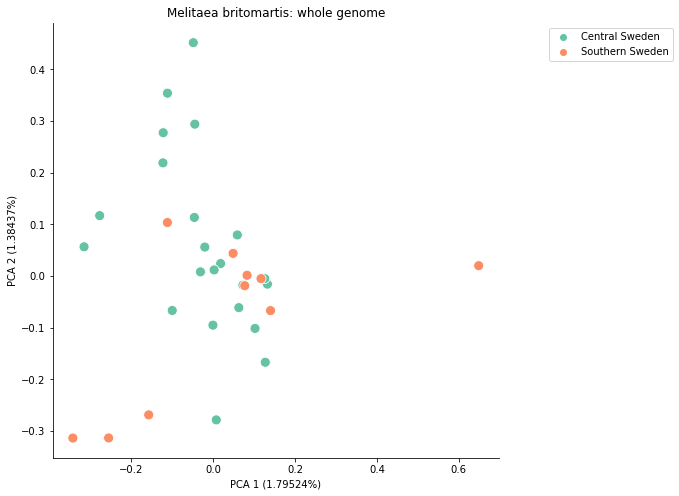

In [21]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x=pca_df[2], y=pca_df[3],hue=pca_df['Global'], palette="Set2", s=100)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
#ml.rcParams['figure.figsize'] = (8.0, 8.0)
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

#plt.xlabel('PC1') #, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
#plt.ylabel('PC2') #, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

In [93]:
eigval = open("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisALLIND.hist.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

1.20165


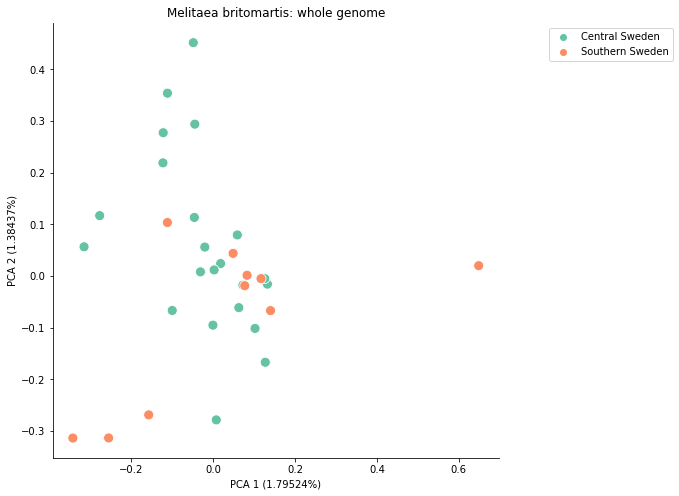

In [22]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df, x=pca_df[2], y=pca_df[3],hue=pca_df['Global'], palette="Set2", s=100)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
#ml.rcParams['figure.figsize'] = (8.0, 8.0)
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

#plt.xlabel('PC1') #, '+"{:.1f}".format(explained_variance[0] * 100)+'%')
#plt.ylabel('PC2') #, '+"{:.1f}".format(explained_variance[1] * 100)+'%')
plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

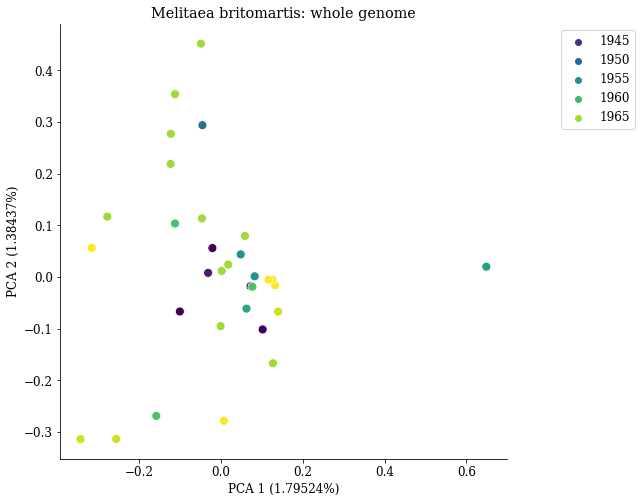

In [40]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['Year'], palette="viridis", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

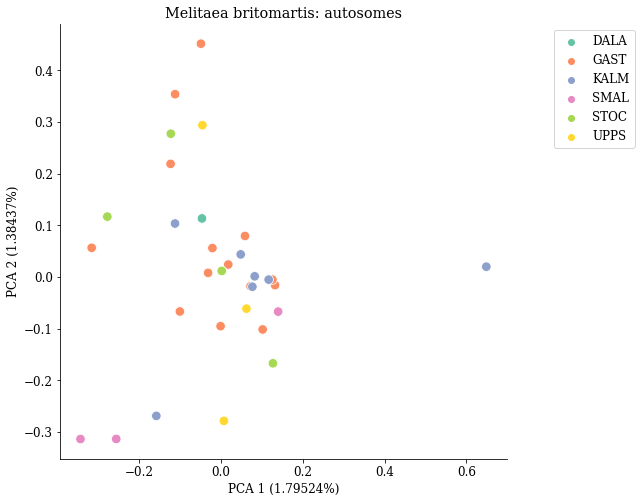

In [102]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['popID'], palette="Set2", s=90)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

plt.title('Melitaea britomartis: autosomes')

plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_historical.png",bbox_inches="tight")
# Show the plot
plt.show()

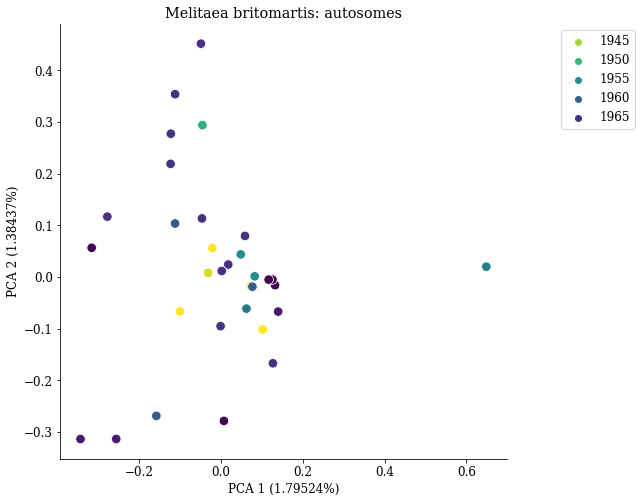

In [110]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['Year'], palette="viridis_r", s=90)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

plt.title('Melitaea britomartis: autosomes')

plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_historical_year.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_historical_year.png",bbox_inches="tight")
# Show the plot
plt.show()

In [43]:
import pandas as pd
import re

# Read the data from the file
pca_df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisSTRING.hist.eigenvec", delimiter=' ', header=None)
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sampleID_hist_reduce.txt", delimiter=' ', header=None)
labels


pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df.rename(index={2: "a", 3: "c"})
#pca_df = pca_df.iloc[2:]
pca_df

0  1         2         3         4         5         6  \
0                                                                       
DALA_1_1965    1  1 -0.059368 -0.022582 -0.261269 -0.558412 -0.170334   
GAST_11_1965   3  1 -0.055221  0.143360 -0.150751 -0.092628 -0.122879   
GAST_12_1969   5  1 -0.057568  0.150192  0.009714 -0.037846 -0.001753   
GAST_14_1969   7  1 -0.057426  0.090879  0.063224 -0.154937  0.303052   
GAST_3_1941    9  1 -0.061484  0.151685  0.114205  0.080370  0.018823   
GAST_4_1941   10  1 -0.057288  0.232990  0.019706  0.117049 -0.113856   
GAST_5_1943   11  1 -0.067030  0.133028 -0.174884 -0.098281 -0.061344   
GAST_6_1965   12  1 -0.060644  0.087021 -0.112942  0.348817 -0.558765   
KALM_2_1955   16  1 -0.055279  0.086976  0.008863 -0.047125 -0.007710   
KALM_3_1955   17  1 -0.051547  0.123846 -0.056860  0.005321  0.216303   
KALM_4_1957   18  1  0.966178 -0.003468 -0.005550  0.001192 -0.003538   
KALM_5_1961   19  1 -0.057761  0.076708  0.145443 -0.088715  0.225369   
KALM_6_1961   20  1 -0.047169  0.189703 -0.285880 -0.158775 -0.166607   
KALM_7_1961   21  1 -0.061076 -0.448775 -0.086873  0.036597 -0.305751   
KALM_8_1969   22  1 -0.055186  0.095820  0.140233  0.006605  0.128771   
SMAL_1_1967   23  1 -0.054663 -0.576624 -0.198579 -0.263423  0.258465   
SMAL_2_1967   24  1 -0.052889  0.120829  0.149781  0.056410  0.133090   
SMAL_3_1967   25  1 -0.058951 -0.336642 -0.254141  0.431978  0.056606   
STOC_2_1965   27  1 -0.053703 -0.032029 -0.158349  0.442033  0.329362   
STOC_4_1965   29  1 -0.051604  0.038337  0.048786  0.078533  0.207660   
UPPS_2_1958   31  1 -0.051181 -0.034553  0.459321 -0.053294 -0.180293   
UPPS_3_1969   32  1 -0.051040 -0.325701  0.591463 -0.048716 -0.165657   

                     7         8         9  ...        19        20        21  \
0                                           ...                                 
DALA_1_1965   0.536278  0.088659  0.284994  ...  0.083327 -0.001904  0.014202   
GAST_11_1965 -0.154583 -0.325842 -0.443562  ... -0.387327  0.121783 -0.028087   
GAST_12_1969 -0.000909 -0.075450  0.050328  ...  0.198423  0.362970 -0.318171   
GAST_14_1969 -0.083321 -0.217504  0.140831  ... -0.318983  0.108821  0.065446   
GAST_3_1941  -0.109493  0.149765  0.312442  ... -0.028368  0.056904 -0.056280   
GAST_4_1941  -0.056715  0.209861 -0.444167  ...  0.204789  0.028420  0.015726   
GAST_5_1943   0.131001  0.088234  0.036442  ... -0.403891 -0.169798 -0.054338   
GAST_6_1965   0.034490  0.410625  0.008572  ... -0.172423 -0.038615 -0.016956   
KALM_2_1955  -0.017585 -0.056636 -0.003144  ...  0.050948  0.087911  0.798248   
KALM_3_1955  -0.281833  0.371473  0.142620  ...  0.145746  0.098765  0.176364   
KALM_4_1957   0.000542  0.000065  0.006155  ... -0.005733  0.004146  0.001861   
KALM_5_1961  -0.215127  0.103500  0.018581  ... -0.083307  0.007565 -0.077706   
KALM_6_1961  -0.142638 -0.409060 -0.146754  ...  0.378944 -0.079377 -0.042291   
KALM_7_1961  -0.392687 -0.159935  0.365743  ... -0.036704  0.061451 -0.066040   
KALM_8_1969  -0.002938  0.008717  0.074054  ...  0.034797  0.270986 -0.370211   
SMAL_1_1967  -0.134675  0.340469 -0.385501  ...  0.015310 -0.165442 -0.091633   
SMAL_2_1967  -0.121086 -0.126145  0.173875  ... -0.111797 -0.609631  0.024387   
SMAL_3_1967   0.062691 -0.281609  0.094007  ...  0.180348  0.047776  0.088880   
STOC_2_1965   0.475338 -0.091273 -0.069058  ... -0.148859 -0.057755 -0.080524   
STOC_4_1965   0.154899  0.072439 -0.002605  ...  0.360128  0.049435  0.080722   
UPPS_2_1958   0.096528 -0.123620 -0.077357  ...  0.265924 -0.452499 -0.133520   
UPPS_3_1969   0.226823 -0.072129 -0.152954  ... -0.146695  0.307086  0.146859   

                        ID  popID  Category  Year  Decade           Global  \
0                                                                            
DALA_1_1965    DALA_1_1965   DALA    SWEDEN  1965   1960s   Central Sweden   
GAST_11_1965  GAST_11_1965   GAST    SWEDEN  1965   1960s   Central Sweden   
GAST_

DALA_1_1965


KeyError: "None of [Float64Index([-0.0593678, -0.0552214, -0.0575681,  -0.057426, -0.0614837,\n              -0.0572884, -0.0670296, -0.0606435,  -0.055279, -0.0515474,\n                0.966178,  -0.057761, -0.0471694, -0.0610762, -0.0551865,\n               -0.054663, -0.0528887, -0.0589507, -0.0537029, -0.0516038,\n              -0.0511814, -0.0510401],\n             dtype='float64')] are in the [index]"

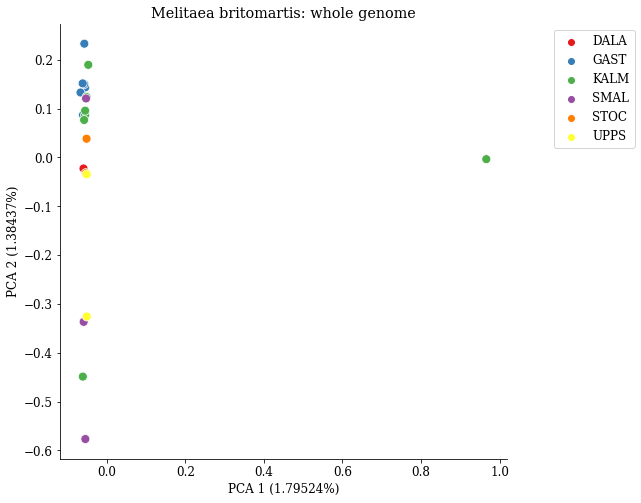

In [50]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['popID'], palette="Set1", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

plt.title('Melitaea britomartis: whole genome')

#for i in range(len(df)):
    #if pca_df[2][i] < 0.1:
#plt.text(pca_df[2], pca_df[3], pca_df['ID'], ha='center', va='center', fontsize=14)

for index, row in pca_df.iterrows():
    print(index)
    print(row[pca_df[2]])
    plt.text(row[pca_df[2]], row[pca_df[3]], row['ID'], ha='center', va='center', fontsize=14)


# Show the plot
plt.show()

In [51]:
pca_df
#remove lines 2,4,6,8,13,14,15,26,28,30

0  1         2         3         4         5         6  \
0                                                                       
DALA_1_1965    1  1 -0.059368 -0.022582 -0.261269 -0.558412 -0.170334   
GAST_11_1965   3  1 -0.055221  0.143360 -0.150751 -0.092628 -0.122879   
GAST_12_1969   5  1 -0.057568  0.150192  0.009714 -0.037846 -0.001753   
GAST_14_1969   7  1 -0.057426  0.090879  0.063224 -0.154937  0.303052   
GAST_3_1941    9  1 -0.061484  0.151685  0.114205  0.080370  0.018823   
GAST_4_1941   10  1 -0.057288  0.232990  0.019706  0.117049 -0.113856   
GAST_5_1943   11  1 -0.067030  0.133028 -0.174884 -0.098281 -0.061344   
GAST_6_1965   12  1 -0.060644  0.087021 -0.112942  0.348817 -0.558765   
KALM_2_1955   16  1 -0.055279  0.086976  0.008863 -0.047125 -0.007710   
KALM_3_1955   17  1 -0.051547  0.123846 -0.056860  0.005321  0.216303   
KALM_4_1957   18  1  0.966178 -0.003468 -0.005550  0.001192 -0.003538   
KALM_5_1961   19  1 -0.057761  0.076708  0.145443 -0.088715  0.225369   
KALM_6_1961   20  1 -0.047169  0.189703 -0.285880 -0.158775 -0.166607   
KALM_7_1961   21  1 -0.061076 -0.448775 -0.086873  0.036597 -0.305751   
KALM_8_1969   22  1 -0.055186  0.095820  0.140233  0.006605  0.128771   
SMAL_1_1967   23  1 -0.054663 -0.576624 -0.198579 -0.263423  0.258465   
SMAL_2_1967   24  1 -0.052889  0.120829  0.149781  0.056410  0.133090   
SMAL_3_1967   25  1 -0.058951 -0.336642 -0.254141  0.431978  0.056606   
STOC_2_1965   27  1 -0.053703 -0.032029 -0.158349  0.442033  0.329362   
STOC_4_1965   29  1 -0.051604  0.038337  0.048786  0.078533  0.207660   
UPPS_2_1958   31  1 -0.051181 -0.034553  0.459321 -0.053294 -0.180293   
UPPS_3_1969   32  1 -0.051040 -0.325701  0.591463 -0.048716 -0.165657   

                     7         8         9  ...        19        20        21  \
0                                           ...                                 
DALA_1_1965   0.536278  0.088659  0.284994  ...  0.083327 -0.001904  0.014202   
GAST_11_1965 -0.154583 -0.325842 -0.443562  ... -0.387327  0.121783 -0.028087   
GAST_12_1969 -0.000909 -0.075450  0.050328  ...  0.198423  0.362970 -0.318171   
GAST_14_1969 -0.083321 -0.217504  0.140831  ... -0.318983  0.108821  0.065446   
GAST_3_1941  -0.109493  0.149765  0.312442  ... -0.028368  0.056904 -0.056280   
GAST_4_1941  -0.056715  0.209861 -0.444167  ...  0.204789  0.028420  0.015726   
GAST_5_1943   0.131001  0.088234  0.036442  ... -0.403891 -0.169798 -0.054338   
GAST_6_1965   0.034490  0.410625  0.008572  ... -0.172423 -0.038615 -0.016956   
KALM_2_1955  -0.017585 -0.056636 -0.003144  ...  0.050948  0.087911  0.798248   
KALM_3_1955  -0.281833  0.371473  0.142620  ...  0.145746  0.098765  0.176364   
KALM_4_1957   0.000542  0.000065  0.006155  ... -0.005733  0.004146  0.001861   
KALM_5_1961  -0.215127  0.103500  0.018581  ... -0.083307  0.007565 -0.077706   
KALM_6_1961  -0.142638 -0.409060 -0.146754  ...  0.378944 -0.079377 -0.042291   
KALM_7_1961  -0.392687 -0.159935  0.365743  ... -0.036704  0.061451 -0.066040   
KALM_8_1969  -0.002938  0.008717  0.074054  ...  0.034797  0.270986 -0.370211   
SMAL_1_1967  -0.134675  0.340469 -0.385501  ...  0.015310 -0.165442 -0.091633   
SMAL_2_1967  -0.121086 -0.126145  0.173875  ... -0.111797 -0.609631  0.024387   
SMAL_3_1967   0.062691 -0.281609  0.094007  ...  0.180348  0.047776  0.088880   
STOC_2_1965   0.475338 -0.091273 -0.069058  ... -0.148859 -0.057755 -0.080524   
STOC_4_1965   0.154899  0.072439 -0.002605  ...  0.360128  0.049435  0.080722   
UPPS_2_1958   0.096528 -0.123620 -0.077357  ...  0.265924 -0.452499 -0.133520   
UPPS_3_1969   0.226823 -0.072129 -0.152954  ... -0.146695  0.307086  0.146859   

                        ID  popID  Category  Year  Decade           Global  \
0                                                                            
DALA_1_1965    DALA_1_1965   DALA    SWEDEN  1965   1960s   Central Sweden   
GAST_11_1965  GAST_11_1965   GAST    SWEDEN  1965   1960s   Central Sweden   
GAST_

In [13]:
import pandas as pd
import re

# Read the data from the file
pca_df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisALLIND.hist.eigenvec", delimiter=' ', header=None)
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sampleID_hist.txt", delimiter=' ', header=None)
labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels


pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df.rename(index={2: "a", 3: "c"})
#pca_df = pca_df.iloc[2:]
pca_df


0  1         2         3         4         5         6  \
0                                                                       
DALA_1_1965    1  1 -0.046364  0.113425  0.060443  0.156389 -0.115067   
GAST_10_1965   2  1 -0.123038  0.219000  0.039907 -0.238458 -0.151972   
GAST_11_1965   3  1  0.017887  0.024235 -0.040364  0.116509  0.101428   
GAST_1_1941    4  1 -0.020829  0.056118 -0.124616  0.183013 -0.128135   
GAST_12_1969   5  1  0.132260 -0.015640 -0.112318  0.045722  0.048878   
GAST_13_1969   6  1 -0.315878  0.056657  0.060878  0.437694 -0.176093   
GAST_14_1969   7  1  0.125897 -0.004965 -0.176084  0.030462  0.141554   
GAST_2_1941    8  1 -0.100357 -0.066597 -0.036742  0.218391 -0.435070   
GAST_3_1941    9  1  0.101980 -0.101328 -0.227821 -0.032907 -0.006657   
GAST_4_1941   10  1  0.072373 -0.017699 -0.005786  0.002511  0.230902   
GAST_5_1943   11  1 -0.031368  0.008140 -0.139446  0.109256  0.133724   
GAST_6_1965   12  1 -0.000872 -0.094987 -0.086829 -0.266900 -0.306972   
GAST_7_1965   13  1  0.058771  0.079552 -0.046631 -0.366893 -0.329336   
GAST_8_1965   14  1 -0.048878  0.451537  0.016765 -0.254315 -0.163681   
GAST_9_1965   15  1 -0.112046  0.353828  0.156475 -0.191258  0.394187   
KALM_2_1955   16  1  0.082503  0.001472 -0.062694  0.204637  0.145508   
KALM_3_1955   17  1  0.048356  0.043891 -0.159343 -0.179201 -0.152156   
KALM_4_1957   18  1  0.648528  0.020081  0.677457  0.108803 -0.115747   
KALM_5_1961   19  1  0.076916 -0.018660 -0.194341  0.011874 -0.001312   
KALM_6_1961   20  1 -0.112192  0.103592 -0.003120  0.239387  0.077242   
KALM_7_1961   21  1 -0.157872 -0.268581  0.218368 -0.074881 -0.066684   
KALM_8_1969   22  1  0.116619 -0.004937 -0.166200  0.088096  0.029009   
SMAL_1_1967   23  1 -0.343198 -0.313382  0.241756 -0.163548  0.081055   
SMAL_2_1967   24  1  0.139832 -0.066809 -0.159181  0.015032  0.119424   
SMAL_3_1967   25  1 -0.255849 -0.313215  0.222895 -0.225900  0.202830   
STOC_1_1965   26  1 -0.277607  0.116930  0.227375  0.229853 -0.099667   
STOC_2_1965   27  1  0.002028  0.011863  0.027135 -0.044093  0.234724   
STOC_3_1965   28  1 -0.122438  0.277346  0.084257 -0.054796  0.024690   
STOC_4_1965   29  1  0.127044 -0.166811 -0.146694 -0.103557 -0.002442   
UPPS_1_1951   30  1 -0.045203  0.293893 -0.004241 -0.028220  0.195110   
UPPS_2_1958   31  1  0.062376 -0.061093 -0.084500  0.040879  0.055966   
UPPS_3_1969   32  1  0.007278 -0.278266  0.004996 -0.059816  0.018218   

                     7         8         9  ...        19        20        21  \
0                                           ...                                 
DALA_1_1965   0.089674  0.339241  0.029992  ...  0.007059 -0.560003 -0.027124   
GAST_10_1965  0.383769  0.000007  0.012497  ... -0.056945 -0.180987  0.112823   
GAST_11_1965 -0.151877 -0.121287  0.075755  ...  0.009817 -0.145553  0.176168   
GAST_1_1941   0.283879  0.174510 -0.163239  ... -0.037105  0.151748 -0.001859   
GAST_12_1969 -0.089363 -0.070283  0.106005  ... -0.012792 -0.002161  0.257477   
GAST_13_1969  0.065963 -0.476163 -0.177705  ...  0.069558 -0.153861  0.017713   
GAST_14_1969 -0.024095 -0.014970  0.238331  ...  0.028778 -0.234389 -0.216793   
GAST_2_1941   0.079871  0.455093  0.137295  ... -0.189973  0.215864  0.072648   
GAST_3_1941  -0.128709 -0.073523 -0.100762  ...  0.292151 -0.165186 -0.300998   
GAST_4_1941   0.171511 -0.073244  0.112873  ... -0.351268 -0.051143  0.039490   
GAST_5_1943   0.189370 -0.081186 -0.193174  ...  0.183481 -0.004830  0.354293   
GAST_6_1965   0.186662 -0.287050  0.109668  ... -0.050697 -0.084424 -0.079091   
GAST_7_1965  -0.006040 -0.234913  0.305125  ... -0.007726  0.078717 -0.020842   
GAST_8_1965  -0.170750  0.085356 -0.174673  ... -0.032646  0.154816 -0.260919   
GAST_9_1965   0.102737  0.009533  0.130808  ...  0.078705 -0.029913  0.028909   
KALM_2_1955   0.136882  0.053792  0.034144  ... -0.144476 -0.039262 -0.015327   
KALM_3_1955  -0.087765 -0.017768 -0.425507  ...  0.164351 -0.042847  0.314

In [ ]:
# modern

In [52]:
import pandas as pd
import re

# Read the data from the file
pca_df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisMISS01.modern.eigenvec", delimiter=' ', header=None)
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sampleID_modern.txt", delimiter=' ', header=None)
#labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels


pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df.rename(index={2: "a", 3: "c"})
#pca_df = pca_df.iloc[2:]
pca_df


0  1         2         3         4         5         6  \
0                                                                      
ALTA_1_2015   1  1  0.045109 -0.229159 -0.148510  0.150568 -0.080075   
ALTA_2_2015   2  1 -0.974376  0.014895 -0.012899  0.005091  0.003965   
BAJK_1_2016   3  1  0.046748  0.345989 -0.124650  0.095762 -0.261627   
BAJK_2_2016   4  1  0.042689  0.010877  0.568564  0.248888  0.018537   
CHEH_1_1989   5  1  0.042894 -0.143995 -0.052909 -0.026924  0.061772   
JAPA_1_1994   6  1  0.062277  0.322406 -0.132548  0.007195  0.833289   
KALM_1_2018   7  1  0.054273 -0.272796 -0.191233  0.183484 -0.134063   
KALM_9_1981   8  1  0.039609 -0.083651  0.051531 -0.133254  0.054030   
KAZA_1_2006   9  1  0.052480  0.333519 -0.130727  0.094146 -0.201983   
KAZA_2_2006  10  1  0.049170  0.007874  0.178127 -0.563923 -0.169588   
KRAS_1_2002  11  1  0.057176  0.256431 -0.048117 -0.023357 -0.003340   
KRAS_3_2002  12  1  0.049121 -0.207430 -0.099901  0.007257  0.055600   
POLA_2_2003  13  1  0.051929 -0.229604 -0.113908  0.037216  0.088454   
RUSS_1_1998  14  1  0.046810  0.008979  0.172201 -0.568174 -0.097263   
RUSS_3_1999  15  1  0.050604 -0.190920 -0.102444  0.007069  0.105957   
RUSS_4_2008  16  1  0.061449  0.340707 -0.135360  0.100792 -0.201403   
RUSS_5_2008  17  1  0.046256  0.005887  0.623939  0.345913  0.006482   
SLOV_1_1990  18  1  0.046772 -0.168310 -0.061652 -0.027281  0.100558   
SMAL_4_1996  19  1  0.057244  0.290073 -0.121757  0.065054 -0.145976   
URAL_2_1995  20  1  0.054375 -0.272949 -0.185497  0.184289 -0.147452   
VAST_1_1983  21  1  0.040960 -0.094471  0.066987 -0.183048  0.103745   

                    7         8         9  ...        19        20        21  \
0                                          ...                                 
ALTA_1_2015  0.206196 -0.030395  0.017157  ...  0.025633  0.126041 -0.025111   
ALTA_2_2015  0.008090 -0.002335 -0.008036  ... -0.004199  0.004206  0.001383   
BAJK_1_2016 -0.034073  0.160175 -0.029064  ...  0.658348 -0.111802 -0.190534   
BAJK_2_2016  0.042797  0.050510 -0.018999  ... -0.001256 -0.001926 -0.008754   
CHEH_1_1989 -0.134572  0.000681  0.019144  ... -0.048171 -0.887460  0.291863   
JAPA_1_1994  0.331013  0.137589 -0.011579  ...  0.032133  0.013933 -0.000669   
KALM_1_2018  0.424450 -0.028954  0.113811  ...  0.042851  0.038458 -0.007075   
KALM_9_1981 -0.177934 -0.015145  0.349811  ... -0.005232  0.154223 -0.026126   
KAZA_1_2006 -0.020201  0.112100 -0.010567  ... -0.673724  0.093775  0.208393   
KAZA_2_2006  0.251762  0.061580 -0.197469  ... -0.017440  0.016000 -0.001410   
KRAS_1_2002 -0.028704 -0.930800 -0.091811  ...  0.030871  0.010608  0.001093   
KRAS_3_2002 -0.184778  0.016262 -0.226422  ... -0.018289  0.102786 -0.030894   
POLA_2_2003 -0.290531  0.075357 -0.411542  ... -0.011683  0.038108 -0.021836   
RUSS_1_1998  0.197132  0.078926 -0.090246  ...  0.006667  0.012044  0.007834   
RUSS_3_1999 -0.253216  0.034721 -0.256727  ...  0.065839  0.134163 -0.026377   
RUSS_4_2008 -0.110933  0.181788  0.041888  ...  0.173429  0.191932  0.589952   
RUSS_5_2008  0.026932 -0.004387 -0.070293  ... -0.007459  0.004397  0.002300   
SLOV_1_1990 -0.249887  0.016138 -0.017223  ... -0.008816  0.209296 -0.034564   
SMAL_4_1996 -0.117181  0.141090  0.047551  ... -0.257372 -0.183488 -0.694003   
URAL_2_1995  0.394244 -0.033197  0.163895  ... -0.048646 -0.032827 -0.019042   
VAST_1_1983 -0.290078 -0.020124  0.695901  ...  0.043083  0.061790 -0.014311   

                      ID  popID  Category  Year  Decade           Global  \
0                                                                          
ALTA_1_2015  ALTA_1_2015   ALTA      EAST  2015   2010s   Eastern Russia   
ALTA_2_2015  ALTA_2_2015   ALTA      EAST  2015   2010s   Eastern Russia   
BAJK_1_2016  BAJK_1_2016   BAJK      EAST  2016   2010s   Eastern Russia   
BAJK_2_2016  BAJK_2_2016   BAJK      EAST  2016   2010s   Eastern Russia   
CHEH_1_1989  CHEH_1_1989   CHEH      WEST  1989   1980s   Ce

1.49672


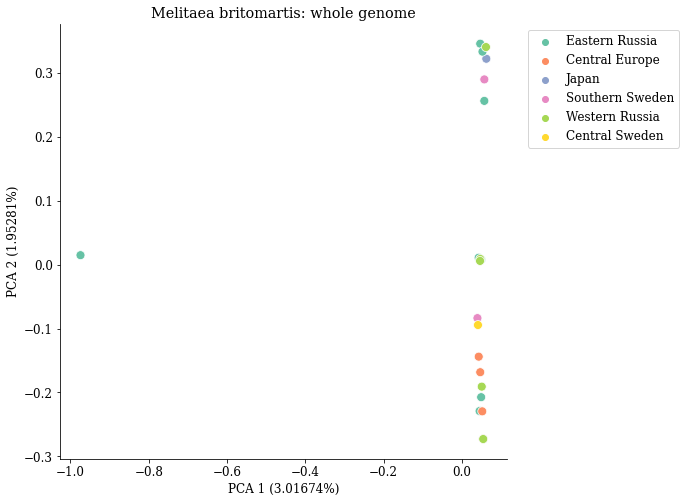

In [61]:
eigval = open("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisMISS01.modern.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['Global'], palette="Set2", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

1.49672


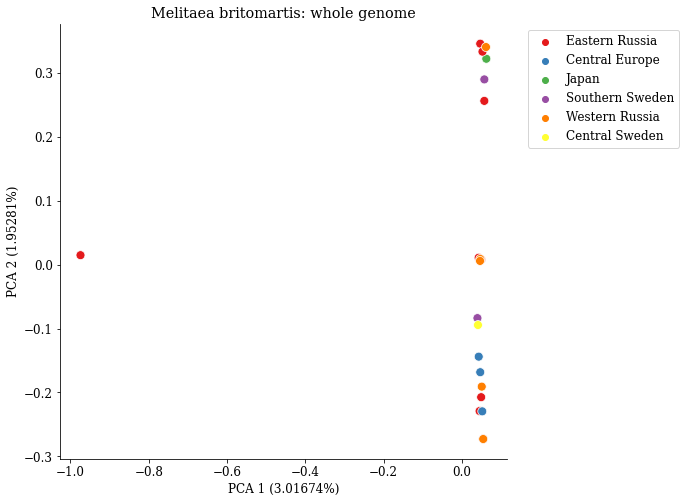

In [57]:
eigval = open("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisMISS01.modern.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['Global'], palette="Set1", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

plt.title('Melitaea britomartis: whole genome')

# Show the plot
plt.show()

In [112]:
import pandas as pd
import re

# Read the data from the file
pca_df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisNOALT2.modern.eigenvec", delimiter=' ', header=None)
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sampleID_modern0.txt", delimiter=' ', header=None)
#labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels


pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df.rename(index={2: "a", 3: "c"})
#pca_df = pca_df.iloc[2:]
pca_df

0  1         2         3         4         5         6  \
0                                                                      
ALTA_1_2015   1  1  0.242183 -0.116440  0.147071 -0.213063  0.032941   
BAJK_1_2016   3  1 -0.354560 -0.131380  0.115571 -0.092647 -0.276187   
BAJK_2_2016   4  1 -0.032688  0.593698  0.142782 -0.034063  0.067184   
CHEH_1_1989   5  1  0.141832 -0.055802 -0.000352  0.129447 -0.002123   
JAPA_1_1994   6  1 -0.295520 -0.123736  0.031507  0.080189  0.733027   
KALM_1_2018   7  1  0.292674 -0.130431  0.194037 -0.450910  0.065653   
KALM_9_1981   8  1  0.077812  0.014281 -0.111260  0.276754 -0.053335   
KAZA_1_2006   9  1 -0.334268 -0.129439  0.120184 -0.079045 -0.245449   
KAZA_2_2006  10  1 -0.015356  0.077908 -0.607494 -0.308033 -0.279864   
KRAS_1_2002  11  1 -0.260188 -0.080572  0.013471  0.000089  0.283138   
KRAS_3_2002  12  1  0.209959 -0.086604  0.043180  0.128981 -0.035606   
POLA_2_2003  13  1  0.239288 -0.091521  0.078741  0.231062 -0.039407   
RUSS_1_1998  14  1 -0.015728  0.069843 -0.603487 -0.183940  0.250053   
RUSS_3_1999  15  1  0.195466 -0.087258  0.043658  0.212271 -0.005971   
RUSS_4_2008  16  1 -0.332109 -0.137954  0.126277 -0.004747 -0.217173   
RUSS_5_2008  17  1 -0.038152  0.685835  0.222179 -0.045164 -0.031215   
SLOV_1_1990  18  1  0.160151 -0.053431 -0.016437  0.241166  0.004490   
SMAL_4_1996  19  1 -0.262172 -0.110350  0.070965  0.028549 -0.143833   
URAL_2_1995  20  1  0.283102 -0.134749  0.175108 -0.362935  0.033488   
VAST_1_1983  21  1  0.098276  0.028101 -0.185702  0.446038 -0.139808   

                    7         8         9  ...        19        20        21  \
0                                          ...                                 
ALTA_1_2015 -0.057050  0.074057 -0.005183  ... -0.089040  0.034721 -0.223607   
BAJK_1_2016  0.124368  0.082492  0.124561  ...  0.079777  0.199098 -0.223607   
BAJK_2_2016 -0.004379  0.100181  0.563345  ...  0.023427  0.000253 -0.223607   
CHEH_1_1989  0.018266 -0.025240 -0.056214  ...  0.864198 -0.355332 -0.223607   
JAPA_1_1994  0.253010  0.209849 -0.322770  ... -0.034830 -0.012208 -0.223607   
KALM_1_2018 -0.132534  0.148473 -0.030478  ... -0.078054  0.009272 -0.223607   
KALM_9_1981 -0.231468  0.221238 -0.078969  ... -0.121217  0.044441 -0.223607   
KAZA_1_2006  0.067155  0.091597  0.085964  ... -0.077144 -0.299046 -0.223607   
KAZA_2_2006  0.038619 -0.241322 -0.354187  ... -0.029677  0.006695 -0.223607   
KRAS_1_2002 -0.637811 -0.602311  0.123440  ... -0.013188  0.000413 -0.223607   
KRAS_3_2002  0.180716 -0.158923  0.034770  ... -0.089822  0.012118 -0.223607   
POLA_2_2003  0.334008 -0.349877  0.131700  ... -0.035089  0.039858 -0.223607   
RUSS_1_1998  0.174998  0.146021  0.378816  ... -0.004468 -0.026489 -0.223607   
RUSS_3_1999  0.173100 -0.187831  0.047201  ... -0.146871  0.006588 -0.223607   
RUSS_4_2008  0.060889  0.050983 -0.006309  ... -0.227504 -0.471997 -0.223607   
RUSS_5_2008  0.064307 -0.105880 -0.480471  ... -0.027323 -0.001688 -0.223607   
SLOV_1_1990  0.109138 -0.083592 -0.011891  ... -0.230479  0.061188 -0.223607   
SMAL_4_1996  0.049275  0.050570 -0.020079  ...  0.260141  0.714839 -0.223607   
URAL_2_1995 -0.159840  0.153635 -0.037094  ...  0.037908  0.034634 -0.223607   
VAST_1_1983 -0.424766  0.425880 -0.086152  ... -0.060744  0.002643 -0.223607   

                      ID  popID  Category  Year  Decade           Global  \
0                                                                          
ALTA_1_2015  ALTA_1_2015   ALTA      EAST  2015   2010s   Eastern Russia   
BAJK_1_2016  BAJK_1_2016   BAJK      EAST  2016   2010s   Eastern Russia   
BAJK_2_2016  BAJK_2_2016   BAJK      EAST  2016   2010s   Eastern Russia   
CHEH_1_1989  CHEH_1_1989   CHEH      WEST  1989   1980s   Central Europe   
JAPA_1_1994  JAPA_1_1994   JAPA      EAST  1994   1990s            Japan   
KALM_1_2018  KALM_1_2018   KALM    SWEDEN  2018   2010s  Southern Sweden   
KALM_9_1981  KALM_9_1981   KALM    SWEDEN  1981   1980s  Sou

1.30426


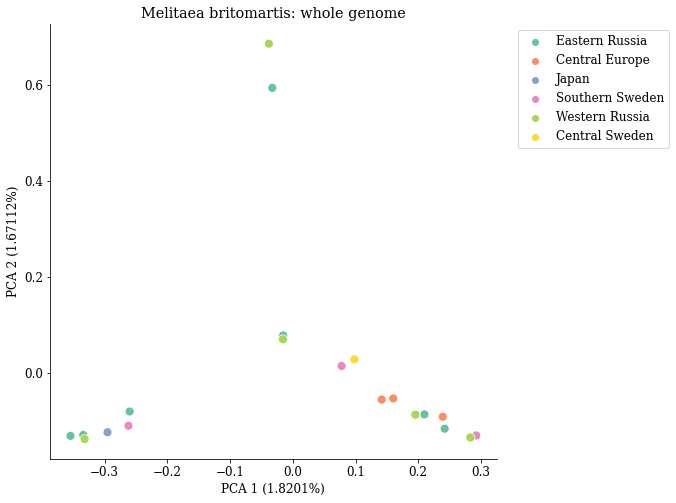

In [113]:
eigval = open("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisNOALT2.modern.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['Global'], palette="Set2", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")


plt.title('Melitaea britomartis: whole genome')

#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_historical_year.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_historical_year.png",bbox_inches="tight")

# Show the plot
plt.show()

IndexError: index 20 is out of bounds for axis 0 with size 20

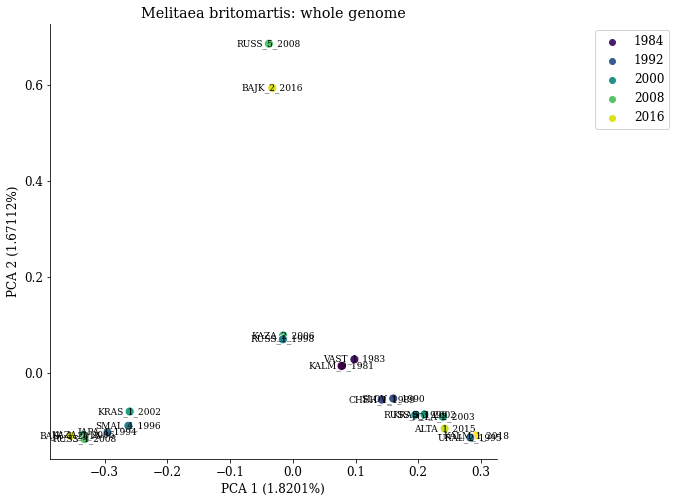

In [77]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['Year'], palette="viridis", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

plt.title('Melitaea britomartis: whole genome')

for i in range(len(df)):
    if -1 < pca_df[2][i] < 1:
        plt.text(pca_df[2][i], pca_df[3][i], pca_df['ID'][i], ha='center', va='center', fontsize=9) 

# Show the plot
plt.show()

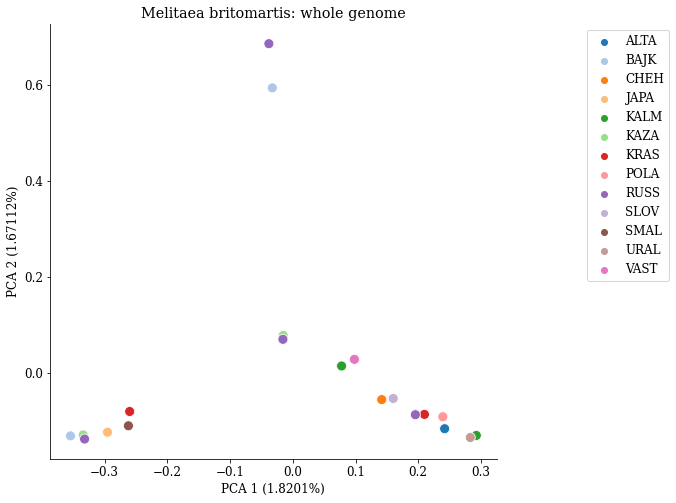

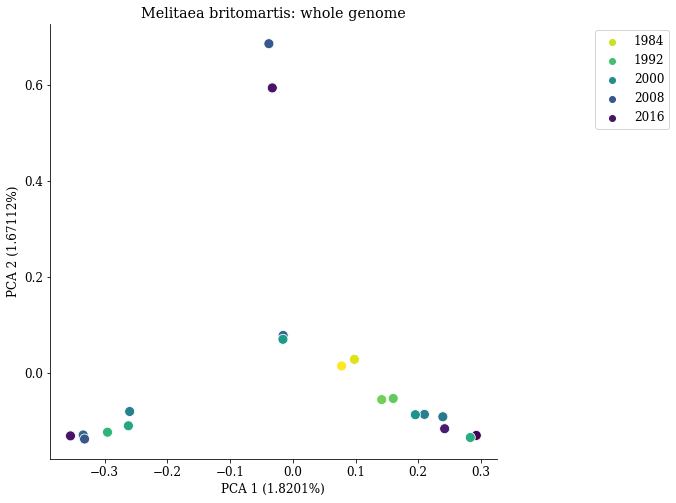

In [117]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['popID'], palette="tab20", s=100)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

plt.title('Melitaea britomartis: whole genome')

#for i in range(len(df)):
#    if -1 < pca_df[2][i] < 1:
#        plt.text(pca_df[2][i], pca_df[3][i], pca_df['ID'][i], ha='center', va='center', fontsize=7) 
        
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_modernall.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_modernall.png",bbox_inches="tight")

# Show the plot
plt.show()


# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['Year'], palette="viridis_r", s=100)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

plt.title('Melitaea britomartis: whole genome')

#for i in range(len(df)):
#    if -1 < pca_df[2][i] < 1:
#        plt.text(pca_df[2][i], pca_df[3][i], pca_df['ID'][i], ha='center', va='center', fontsize=7) 
        
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_modernall_year.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_modernall_year.png",bbox_inches="tight")

# Show the plot
plt.show()

In [119]:
import pandas as pd
import re

# Read the data from the file
pca_df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisSWEDEN.modern.eigenvec", delimiter=' ', header=None)
pca_df

labels = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/sampleID_modern_sweden.txt", delimiter=' ', header=None)
#labels[0] = labels[0].str.replace(r'\./|\.md', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.cram', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.01_MappingAll/results/preprocessing/markduplicates/', '', regex=True)
#labels[0] = labels[0].str.replace(r'\./|\.03_MappingHistorical/results/preprocessing/markduplicates/', '', regex=True)
labels


pca_df.index = labels[0]


pca_df

pca_df['ID'] = pca_df.index

pca_df['popID'] = pca_df['ID'].str.split('_').str[0]
pca_df['ID'] = pca_df['ID'].str.split('/').str[0]

#pca_df["ID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#pca_df["popID"] = pca_df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

pca_df['Category'] = pca_df['popID'].map(category_dict)

pca_df['Year'] = pca_df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
pca_df['Decade'] = pca_df['Year'].apply(categorize_by_decade)

category_dict_regions = {
'KAZA': 'Eastern Russia',
 'SLOV': 'Central Europe',
 'URAL': 'Western Russia',
 'RUSS': 'Western Russia',
 'BAJK': 'Eastern Russia',
 'JAPA': 'Japan',
 'CHEH': 'Central Europe',
 'KRAS': 'Eastern Russia',
 'STOC': 'Central Sweden',
 'VAST': 'Central Sweden',
 'SMAL': 'Southern Sweden',
 'ALTA': 'Eastern Russia',
 'KALM': 'Southern Sweden',
 'POLA': 'Central Europe',
 'VORO': 'Central Europe',
 'BELA': 'Central Europe',
 'GAST': 'Central Sweden',
 'UPPS': 'Central Sweden',
 'DALA': 'Central Sweden',
 'ITAL': 'Central Europe'}

pca_df['Global'] = pca_df['popID'].map(category_dict_regions)

pca_df['era'] = pca_df['Year'].apply(lambda x: 'historical' if x < 1979 else 'modern')

pca_df.rename(index={2: "a", 3: "c"})
#pca_df = pca_df.iloc[2:]
pca_df

0  1         2         3         4         5         6  \
0                                                                      
ALTA_1_2015   1  1 -0.209387 -0.090050 -0.215329 -0.194794  0.049152   
BAJK_1_2016   3  1  0.250333 -0.099435 -0.019104  0.014328  0.081065   
BAJK_2_2016   4  1  0.064832  0.399091 -0.051362  0.039469  0.391023   
CHEH_1_1989   5  1 -0.251634 -0.024214  0.070431 -0.713324 -0.066840   
JAPA_1_1994   6  1  0.401790 -0.415578  0.063143 -0.076511 -0.198755   
KAZA_1_2006   9  1  0.282838 -0.133464 -0.015201  0.014031  0.091133   
KAZA_2_2006  10  1  0.071070  0.366211  0.053194  0.050892 -0.424407   
KRAS_1_2002  11  1  0.314237 -0.105773  0.005308  0.045434  0.060520   
KRAS_3_2002  12  1 -0.286477 -0.118122 -0.303698  0.052990 -0.092988   
POLA_2_2003  13  1 -0.269214 -0.116038 -0.265563  0.118463 -0.032216   
RUSS_1_1998  14  1  0.073734  0.424516  0.084928  0.074536 -0.584226   
RUSS_3_1999  15  1 -0.325413 -0.208586  0.014315  0.629070 -0.033244   
RUSS_4_2008  16  1  0.301605 -0.158418 -0.016633  0.011982  0.100572   
RUSS_5_2008  17  1  0.065831  0.443257 -0.067619  0.047722  0.463963   
SLOV_1_1990  18  1 -0.276466 -0.093235  0.852968  0.025553  0.150094   
URAL_2_1995  20  1 -0.207680 -0.070162 -0.189780 -0.139841  0.045153   

                    7         8         9  ...        15        16    17  \
0                                          ...                             
ALTA_1_2015  0.014236 -0.519867  0.335255  ... -0.011550  0.007843 -0.25   
BAJK_1_2016  0.185925 -0.005230  0.005058  ... -0.309163 -0.759023 -0.25   
BAJK_2_2016 -0.214332  0.057706 -0.020868  ...  0.701511 -0.267625 -0.25   
CHEH_1_1989  0.034471  0.567658  0.130833  ... -0.003770  0.000421 -0.25   
JAPA_1_1994 -0.725916 -0.020584 -0.005104  ...  0.000381  0.001345 -0.25   
KAZA_1_2006  0.202338  0.002438  0.012197  ...  0.204332  0.510368 -0.25   
KAZA_2_2006  0.035996 -0.047469  0.023670  ... -0.023323  0.021363 -0.25   
KRAS_1_2002  0.464356  0.112621 -0.068435  ... -0.005643  0.025181 -0.25   
KRAS_3_2002 -0.018167 -0.053413 -0.763985  ... -0.000494  0.008277 -0.25   
POLA_2_2003 -0.015508  0.147579 -0.121412  ...  0.001023  0.003430 -0.25   
RUSS_1_1998  0.030785 -0.066148  0.035703  ...  0.000231  0.016180 -0.25   
RUSS_3_1999 -0.049997  0.369846  0.404165  ...  0.000489 -0.000099 -0.25   
RUSS_4_2008  0.239593  0.014720 -0.002450  ...  0.048204  0.148933 -0.25   
RUSS_5_2008 -0.261719  0.074564 -0.022928  ... -0.606086  0.260351 -0.25   
SLOV_1_1990  0.026141 -0.227874 -0.193714  ... -0.006807  0.006066 -0.25   
URAL_2_1995  0.051798 -0.406548  0.252016  ...  0.010665  0.016988 -0.25   

                      ID  popID  Category  Year  Decade          Global  \
0                                                                         
ALTA_1_2015  ALTA_1_2015   ALTA      EAST  2015   2010s  Eastern Russia   
BAJK_1_2016  BAJK_1_2016   BAJK      EAST  2016   2010s  Eastern Russia   
BAJK_2_2016  BAJK_2_2016   BAJK      EAST  2016   2010s  Eastern Russia   
CHEH_1_1989  CHEH_1_1989   CHEH      WEST  1989   1980s  Central Europe   
JAPA_1_1994  JAPA_1_1994   JAPA      EAST  1994   1990s           Japan   
KAZA_1_2006  KAZA_1_2006   KAZA      EAST  2006   2000s  Eastern Russia   
KAZA_2_2006  KAZA_2_2006   KAZA      EAST  2006   2000s  Eastern Russia   
KRAS_1_2002  KRAS_1_2002   KRAS      EAST  2002   2000s  Eastern Russia   
KRAS_3_2002  KRAS_3_2002   KRAS      EAST  2002   2000s  Eastern Russia   
POLA_2_2003  POLA_2_2003   POLA      WEST  2003   2000s  Central Europe   
RUSS_1_1998  RUSS_1_1998   RUSS      EAST  1998   1990s  Western Russia   
RUSS_3_1999  RUSS_3_1999   RUSS      EAST  1999   1990s  Western Russia   
RUSS_4_2008  RUSS_4_2008   RUSS      EAST  2008   2000s  Western Russia   
RUSS_5_2008  RUSS_5_2008   RUSS      EAST  2008   2000s  Western Russia   
SLOV_1_1990  SLOV_1_1990   SLOV      WEST  1990   1990s  Central Europe   
URAL_2_1995  URAL_2_1995   URAL      EAST  1995   1990s  Western Russia  

1.17757


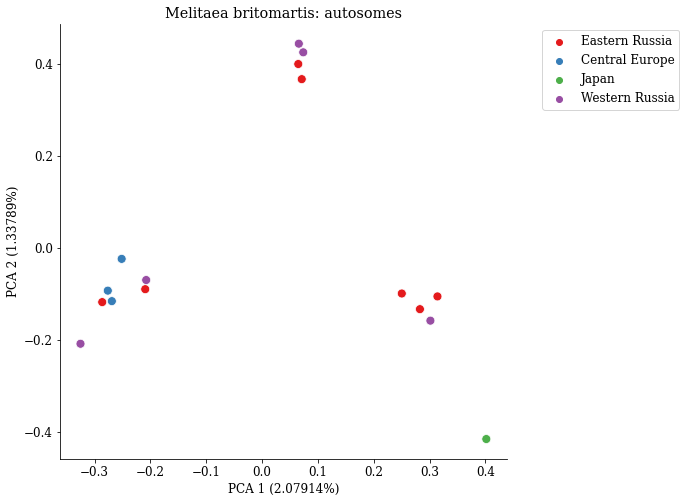

In [121]:
eigval = open("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisSWEDEN.modern.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['Global'], palette="Set1", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

#for i in range(len(df)):
#    if -1 < pca_df[2][i] < 1:
#        plt.text(pca_df[2][i], pca_df[3][i], pca_df['ID'][i], ha='center', va='center', fontsize=9) 

plt.title('Melitaea britomartis: autosomes')

# Show the plot
plt.show()

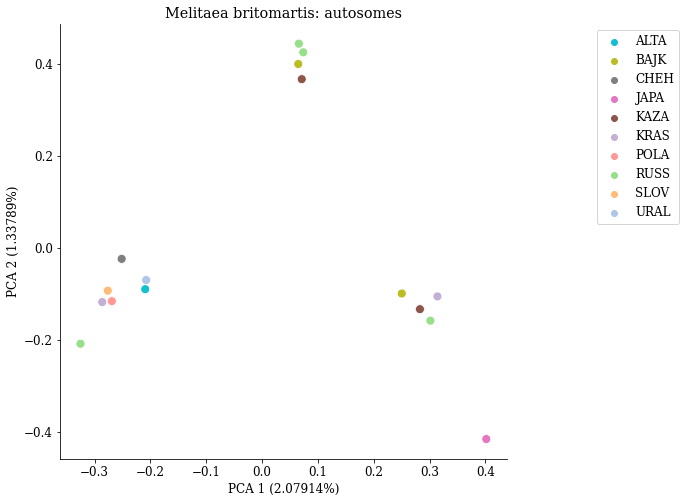

In [126]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['popID'], palette="tab20_r", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

#for i in range(len(df)):
#    if -1 < pca_df[2][i] < 1:
#        plt.text(pca_df[2][i], pca_df[3][i], pca_df['ID'][i], ha='center', va='center', fontsize=9) 

plt.title('Melitaea britomartis: autosomes')

plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_modernnos.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_modernnos.png",bbox_inches="tight")

# Show the plot
plt.show()

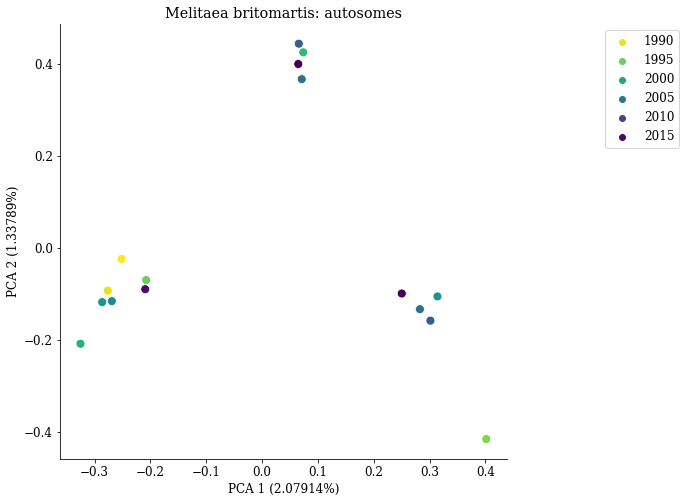

In [125]:
# Create a scatter plot of PC1 vs PC2
sns.scatterplot(data=pca_df,x=pca_df[2], y=pca_df[3],hue=pca_df['Year'], palette="viridis_r", s=80)
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add labels and title
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")

#for i in range(len(df)):
#    if -1 < pca_df[2][i] < 1:
#        plt.text(pca_df[2][i], pca_df[3][i], pca_df['ID'][i], ha='center', va='center', fontsize=9) 

plt.title('Melitaea britomartis: autosomes')

plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_modernnos_year.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartis_PCA_modernnos_year.png",bbox_inches="tight")

# Show the plot
plt.show()

# relatdness 

Text(0.5, 1.0, 'Relatedness Heatmap')

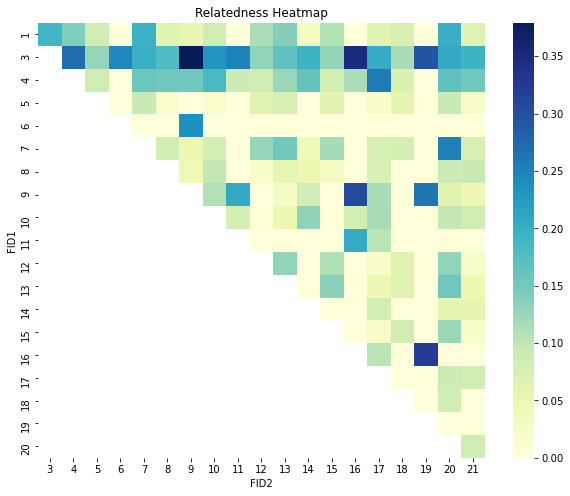

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a Pandas DataFrame
# Replace 'your_file.txt' with your PLINK --genome output file
data = pd.read_csv('/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisNOALT2.modern.relate.genome', delim_whitespace=True)

# Pivot the DataFrame to get a matrix form if necessary
# Adjust the column names based on your file's structure
heatmap_data = data.pivot("FID1", "FID2", "PI_HAT")

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu")
plt.title("Relatedness Heatmap")

In [5]:
heatmap_data

FID2      3       4       5       6       7       8       9       10      11  \
FID1                                                                           
1     0.1886  0.1409  0.0823  0.0000  0.1959  0.0613  0.0548  0.0855  0.0000   
3        NaN  0.2709  0.1287  0.2455  0.1990  0.1777  0.3790  0.2299  0.2503   
4        NaN     NaN  0.0864  0.0000  0.1577  0.1545  0.1553  0.1827  0.0888   
5        NaN     NaN     NaN  0.0000  0.0906  0.0163  0.0000  0.0151  0.0000   
6        NaN     NaN     NaN     NaN  0.0000  0.0000  0.2362  0.0000  0.0000   
7        NaN     NaN     NaN     NaN     NaN  0.0833  0.0489  0.0791  0.0000   
8        NaN     NaN     NaN     NaN     NaN     NaN  0.0420  0.0968  0.0000   
9        NaN     NaN     NaN     NaN     NaN     NaN     NaN  0.1082  0.2060   
10       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  0.0778   
11       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
12       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
13       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
14       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
15       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
16       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
17       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
18       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
19       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

FID2      12      13      14      15      16      17      18      19      20  \
FID1                                                                           
1     0.1130  0.1379  0.0292  0.1081  0.0000  0.0607  0.0766  0.0000  0.2007   
3     0.1305  0.1662  0.1929  0.1289  0.3468  0.2038  0.1154  0.2956  0.2058   
4     0.0869  0.1249  0.1622  0.0811  0.1126  0.2572  0.0725  0.0000  0.1659   
5     0.0638  0.0747  0.0000  0.0600  0.0000  0.0195  0.0563  0.0000  0.0915   
6     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
7     0.1277  0.1526  0.0398  0.1174  0.0000  0.0756  0.0788  0.0000  0.2527   
8     0.0194  0.0552  0.0502  0.0241  0.0000  0.0758  0.0000  0.0000  0.0874   
9     0.0000  0.0264  0.0834  0.0000  0.3045  0.1152  0.0000  0.2612  0.0635   
10    0.0046  0.0481  0.1319  0.0000  0.0813  0.1161  0.0000  0.0000  0.0965   
11    0.0000  0.0000  0.0000  0.0000  0.2052  0.1029  0.0000  0.0000  0.0000   
12       NaN  0.1305  0.0000  0.1099  0.0000  0.0198  0.0656  0.0000  0.1307   
13       NaN     NaN  0.0000  0.1339  0.0000  0.0471  0.0622  0.0000  0.1549   
14       NaN     NaN     NaN  0.0000  0.0000  0.0800  0.0000  0.0000  0.0565   
15       NaN     NaN     NaN     NaN  0.0000  0.0215  0.0823  0.0000  0.1252   
16       NaN     NaN     NaN     NaN     NaN  0.1036  0.0000  0.3236  0.0000   
17       NaN     NaN     NaN     NaN     NaN     NaN  0.0000  0.0000  0.0874   
18       NaN     NaN     NaN     NaN     NaN     NaN     NaN  0.0000  0.0830   
19       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  0.0000   
20       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

FID2      21  
FID1          
1     0.0634  
3     0.1932  
4     0.1528  
5     0.0203  
6     0.0000  
7     0.0749  
8     0.0915  
9     0.0454  
10    0.0854  
11    0.0000  
12    0.0218  
13    0.0484  
14    0.0566  
15    0.0207  
16    0.0000  
17    0.0837  
18    0.0000  
19    0.0000  
20    0.0869

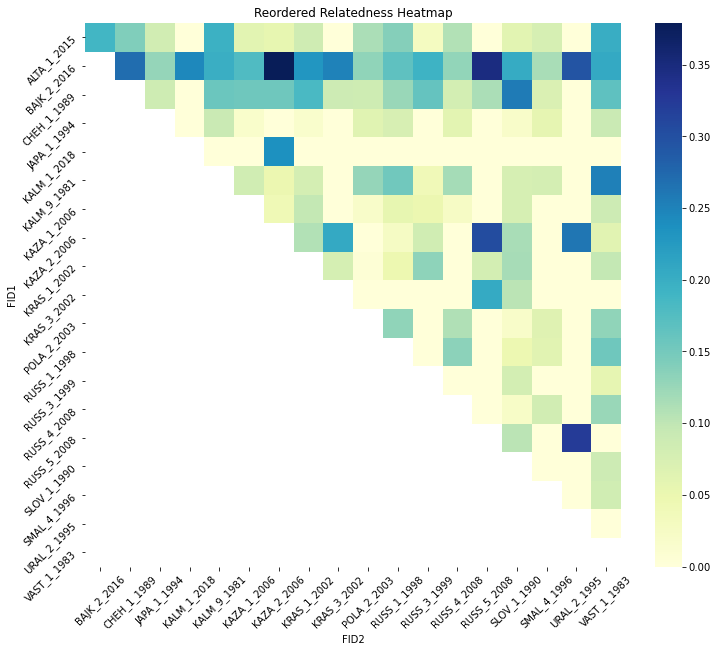

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your PLINK --genome output data
data = pd.read_csv('/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisNOALT2.modern.relate.genome', delim_whitespace=True)

# Sample data
sample_labels = [
    "ALTA_1_2015", "BAJK_1_2016", "BAJK_2_2016", "CHEH_1_1989", "JAPA_1_1994",
    "KALM_1_2018", "KALM_9_1981", "KAZA_1_2006", "KAZA_2_2006", "KRAS_1_2002",
    "KRAS_3_2002", "POLA_2_2003", "RUSS_1_1998", "RUSS_3_1999", "RUSS_4_2008",
    "RUSS_5_2008", "SLOV_1_1990", "SMAL_4_1996", "URAL_2_1995", "VAST_1_1983"
]

# Map the labels to the IDs in your data
data['FID1'] = data['FID1'].map(dict(zip(range(1, 21), sample_labels)))
data['FID2'] = data['FID2'].map(dict(zip(range(1, 21), sample_labels)))

# Pivot the data for the heatmap
heatmap_data = data.pivot("FID1", "FID2", "PI_HAT")

# Drop the 'NaN' column if it exists
heatmap_data = heatmap_data.drop(heatmap_data.columns[0], axis=1)

desired_order = [
    "KALM_1_2018", "KALM_9_1981", "SMAL_4_1996", "VAST_1_1983", "CHEH_1_1989",
    "POLA_2_2003", "SLOV_1_1990", "URAL_2_1995", "RUSS_1_1998", "RUSS_3_1999",
    "RUSS_4_2008", "RUSS_5_2008", "KAZA_1_2006", "KAZA_2_2006", "ALTA_1_2015",
    "KRAS_1_2002", "KRAS_3_2002", "BAJK_1_2016", "BAJK_2_2016", "JAPA_1_1994"
]

# Reorder the DataFrame
#heatmap_data = heatmap_data.loc[desired_order, desired_order]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu")
plt.title("Reordered Relatedness Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



In [19]:
desired_order

['KALM_1_2018',
 'KALM_9_1981',
 'SMAL_4_1996',
 'VAST_1_1983',
 'CHEH_1_1989',
 'POLA_2_2003',
 'SLOV_1_1990',
 'URAL_2_1995',
 'RUSS_1_1998',
 'RUSS_3_1999',
 'RUSS_4_2008',
 'RUSS_5_2008',
 'KAZA_1_2006',
 'KAZA_2_2006',
 'ALTA_1_2015',
 'KRAS_1_2002',
 'KRAS_3_2002',
 'BAJK_1_2016',
 'BAJK_2_2016',
 'JAPA_1_1994']

In [22]:
heatmap_data

FID2            NaN  BAJK_2_2016  CHEH_1_1989  JAPA_1_1994  KALM_1_2018  \
FID1                                                                      
ALTA_1_2015  0.0634       0.1886       0.1409       0.0823       0.0000   
BAJK_2_2016  0.1932          NaN       0.2709       0.1287       0.2455   
CHEH_1_1989  0.1528          NaN          NaN       0.0864       0.0000   
JAPA_1_1994  0.0203          NaN          NaN          NaN       0.0000   
KALM_1_2018  0.0000          NaN          NaN          NaN          NaN   
KALM_9_1981  0.0749          NaN          NaN          NaN          NaN   
KAZA_1_2006  0.0915          NaN          NaN          NaN          NaN   
KAZA_2_2006  0.0454          NaN          NaN          NaN          NaN   
KRAS_1_2002  0.0854          NaN          NaN          NaN          NaN   
KRAS_3_2002  0.0000          NaN          NaN          NaN          NaN   
POLA_2_2003  0.0218          NaN          NaN          NaN          NaN   
RUSS_1_1998  0.0484          NaN          NaN          NaN          NaN   
RUSS_3_1999  0.0566          NaN          NaN          NaN          NaN   
RUSS_4_2008  0.0207          NaN          NaN          NaN          NaN   
RUSS_5_2008  0.0000          NaN          NaN          NaN          NaN   
SLOV_1_1990  0.0837          NaN          NaN          NaN          NaN   
SMAL_4_1996  0.0000          NaN          NaN          NaN          NaN   
URAL_2_1995  0.0000          NaN          NaN          NaN          NaN   
VAST_1_1983  0.0869          NaN          NaN          NaN          NaN   

FID2         KALM_9_1981  KAZA_1_2006  KAZA_2_2006  KRAS_1_2002  KRAS_3_2002  \
FID1                                                                           
ALTA_1_2015       0.1959       0.0613       0.0548       0.0855       0.0000   
BAJK_2_2016       0.1990       0.1777       0.3790       0.2299       0.2503   
CHEH_1_1989       0.1577       0.1545       0.1553       0.1827       0.0888   
JAPA_1_1994       0.0906       0.0163       0.0000       0.0151       0.0000   
KALM_1_2018       0.0000       0.0000       0.2362       0.0000       0.0000   
KALM_9_1981          NaN       0.0833       0.0489       0.0791       0.0000   
KAZA_1_2006          NaN          NaN       0.0420       0.0968       0.0000   
KAZA_2_2006          NaN          NaN          NaN       0.1082       0.2060   
KRAS_1_2002          NaN          NaN          NaN          NaN       0.0778   
KRAS_3_2002          NaN          NaN          NaN          NaN          NaN   
POLA_2_2003          NaN          NaN          NaN          NaN          NaN   
RUSS_1_1998          NaN          NaN          NaN          NaN          NaN   
RUSS_3_1999          NaN          NaN          NaN          NaN          NaN   
RUSS_4_2008          NaN          NaN          NaN          NaN          NaN   
RUSS_5_2008          NaN          NaN          NaN          NaN          NaN   
SLOV_1_1990          NaN          NaN          NaN          NaN          NaN   
SMAL_4_1996          NaN          NaN          NaN          NaN          NaN   
URAL_2_1995          NaN          NaN          NaN          NaN          NaN   
VAST_1_1983          NaN          NaN          NaN          NaN          NaN   

FID2         POLA_2_2003  RUSS_1_1998  RUSS_3_1999  RUSS_4_2008  RUSS_5_2008  \
FID1                                                                           
ALTA_1_2015       0.1130       0.1379       0.0292       0.1081       0.0000   
BAJK_2_2016       0.1305       0.1662       0.1929       0.1289       0.3468   
CHEH_1_1989       0.0869       0.1249       0.1622       0.0811       0.1126   
JAPA_1_1994       0.0638       0.0747       0.0000       0.0600       0.0000   
KALM_1_2018       0.0000       0.0000       0.0000       0.0000       0.0000   
KALM_9_1981       0.1277       0.1526       0.0398       0.1174       0.0000   
KAZA_1_2006       0.0194       0.0552       0.0502       0.0241       0.0000   
KAZA_2_2006       0.000

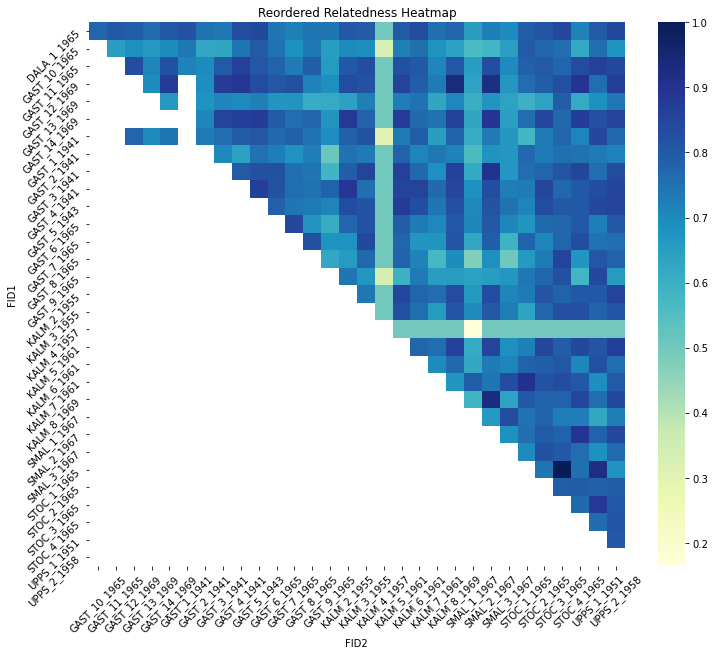

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your PLINK --genome output data
data = pd.read_csv('/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/PCA_ANGSD/britomartisALLIND.hist.relate.genome', delim_whitespace=True)

# Sample data
sample_labels = [
    "DALA_1_1965",
    "GAST_10_1965",
    "GAST_11_1965",
    "GAST_1_1941",
    "GAST_12_1969",
    "GAST_13_1969",
    "GAST_14_1969",
    "GAST_2_1941",
    "GAST_3_1941",
    "GAST_4_1941",
    "GAST_5_1943",
    "GAST_6_1965",
    "GAST_7_1965",
    "GAST_8_1965",
    "GAST_9_1965",
    "KALM_2_1955",
    "KALM_3_1955",
    "KALM_4_1957",
    "KALM_5_1961",
    "KALM_6_1961",
    "KALM_7_1961",
    "KALM_8_1969",
    "SMAL_1_1967",
    "SMAL_2_1967",
    "SMAL_3_1967",
    "STOC_1_1965",
    "STOC_2_1965",
    "STOC_3_1965",
    "STOC_4_1965",
    "UPPS_1_1951",
    "UPPS_2_1958",
    "UPPS_3_1969"
]


# Map the labels to the IDs in your data
data['FID1'] = data['FID1'].map(dict(zip(range(1, 32), sample_labels)))
data['FID2'] = data['FID2'].map(dict(zip(range(1, 32), sample_labels)))

# Pivot the data for the heatmap
heatmap_data = data.pivot("FID1", "FID2", "PI_HAT")

# Drop the 'NaN' column if it exists
heatmap_data = heatmap_data.drop(heatmap_data.columns[0], axis=1)

# Reorder the DataFrame
#heatmap_data = heatmap_data.loc[desired_order, desired_order]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu")
plt.title("Reordered Relatedness Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



In [20]:
heatmap_data = heatmap_data.loc[desired_order, desired_order]

KeyError: "['BAJK_1_2016'] not in index"

In [16]:
heatmap_data = heatmap_data.drop(columns=heatmap_data["NaN"], errors='ignore')
heatmap_data

KeyError: 'NaN'

# L/O

In [63]:
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.all.meta.csv", delimiter=',')
df

FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0   GAST_1_1941_GAST_1_1941 -0.030509 -0.028270 -0.247731 -0.012805  0.008864   
1   GAST_2_1941_GAST_2_1941 -0.035225 -0.009817 -0.098259  0.010800 -0.003453   
2   GAST_3_1941_GAST_3_1941 -0.041621 -0.000322  0.012224 -0.003925  0.002202   
3   GAST_4_1941_GAST_4_1941 -0.050848  0.009795  0.019103  0.010203  0.016096   
4   GAST_5_1943_GAST_5_1943 -0.031113 -0.005485 -0.042047  0.025239 -0.009523   
..                      ...       ...       ...       ...       ...       ...   
68  BAJK_3_2016_BAJK_3_2016 -0.021797  0.031261  0.076869  0.016044  0.016390   
69  BAJK_1_2016_BAJK_1_2016 -0.049447  0.015015  0.054413 -0.001879 -0.010808   
70  BAJK_2_2016_BAJK_2_2016 -0.053682  0.021675  0.074194  0.008524 -0.005016   
71  BAJK_4_2016_BAJK_4_2016 -0.047027  0.024907  0.059125 -0.008148  0.022251   
72  KALM_1_2018_KALM_1_2018 -0.047384  0.021009  0.051715 -0.001000 -0.000895   

        PCA6      PCA7      PCA8      PCA9           ID popID  year  time  \
0   0.004697  0.097096  0.090557 -0.092995  GAST_1_1941  GAST  1941  hist   
1  -0.040524  0.057942  0.064749  0.042074  GAST_2_1941  GAST  1941  hist   
2   0.014635  0.002924 -0.020733 -0.016675  GAST_3_1941  GAST  1941  hist   
3   0.024237  0.008468  0.001704 -0.007174  GAST_4_1941  GAST  1941  hist   
4  -0.002522  0.027949 -0.028462 -0.063397  GAST_5_1943  GAST  1943  hist   
..       ...       ...       ...       ...          ...   ...   ...   ...   
68  0.037616 -0.025416 -0.001160  0.012147  BAJK_3_2016  BAJK  2016  cont   
69  0.026160 -0.017030 -0.013659 -0.017223  BAJK_1_2016  BAJK  2016  cont   
70 -0.001045 -0.019263 -0.007041 -0.021761  BAJK_2_2016  BAJK  2016  cont   
71 -0.007465 -0.012454 -0.033137 -0.001397  BAJK_4_2016  BAJK  2016  cont   
72  0.007024  0.000825 -0.014909 -0.001877  KALM_1_2018  KALM  2018  cont   

   country  
0      swe  
1      swe  
2      swe  
3      swe  
4      swe  
..     ...  
68     abr  
69     abr  
70     abr  
71     abr  
72     swe  

[73 rows x 15 columns]

In [47]:
palette = sns.color_palette("hsv", 73)
palette

[(1.0, 0.06948536360301065, 0.0),
 (1.0, 0.1389707272060213, 0.0),
 (1.0, 0.2316178786767022, 0.0),
 (1.0, 0.3011032422797128, 0.0),
 (1.0, 0.3937503937503937, 0.0),
 (1.0, 0.4632357573534044, 0.0),
 (1.0, 0.5558829088240852, 0.0),
 (1.0, 0.6253682724270958, 0.0),
 (1.0, 0.7180154238977768, 0.0),
 (1.0, 0.7875007875007874, 0.0),
 (1.0, 0.8801479389714684, 0.0),
 (0.9959555658085071, 0.9455888683829858, 0.0),
 (0.9727937779408368, 0.9919124441183264, 0.0),
 (0.8882341823518295, 1.0, 0.0),
 (0.8187488187488188, 1.0, 0.0),
 (0.726101667278138, 1.0, 0.0),
 (0.6566163036751272, 1.0, 0.0),
 (0.5639691522044463, 1.0, 0.0),
 (0.4944837886014357, 1.0, 0.0),
 (0.4018366371307548, 1.0, 0.0),
 (0.3323512735277442, 1.0, 0.0),
 (0.23970412205706326, 1.0, 0.0),
 (0.17021875845405265, 1.0, 0.0),
 (0.07757160698337173, 1.0, 0.0),
 (0.0235287477934537, 1.0, 0.015442504413092598),
 (0.0003669599257835228, 1.0, 0.061766080148432954),
 (0.0, 1.0, 0.15404569495487538),
 (0.0, 1.0, 0.22353062080241548),
 (0.0, 1.0, 0.3161771885991356),
 (0.0, 1.0, 0.3856621144466757),
 (0.0, 1.0, 0.47830868224339584),
 (0.0, 1.0, 0.547793608090936),
 (0.0, 1.0, 0.6404401758876557),
 (0.0, 1.0, 0.7099251017351961),
 (0.0, 1.0, 0.8025716695319163),
 (0.0, 1.0, 0.8720565953794563),
 (0.0, 1.0, 0.9647031631761764),
 (0.0, 0.9658116955911072, 1.0),
 (0.0, 0.8963263319880966, 1.0),
 (0.0, 0.8036791805174157, 1.0),
 (0.0, 0.7341938169144051, 1.0),
 (0.0, 0.6415466654437243, 1.0),
 (0.0, 0.5720613018407144, 1.0),
 (0.0, 0.4794141503700329, 1.0),
 (0.0, 0.40992878676702216, 1.0),
 (0.0, 0.31728163529634135, 1.0),
 (0.0, 0.24779627169333063, 1.0),
 (0.0, 0.15514912022264993, 1.0),
 (0.0, 0.08566375661963932, 1.0),
 (0.015440535661123769, 0.03161892867775246, 1.0),
 (0.07646875845405214, 0.0, 1.0),
 (0.14595412205706287, 0.0, 1.0),
 (0.23860127352774382, 0.0, 1.0),
 (0.30808663713075457, 0.0, 1.0),
 (0.40073378860143555, 0.0, 1.0),
 (0.47021915220444627, 0.0, 1.0),
 (0.5628663036751272, 0.0, 1.0),
 (0.632351667278138, 0.0, 1.0),
 (0.724998818748819, 0.0, 1.0),
 (0.7944841823518297, 0.0, 1.0),
 (0.8871313338225106, 0.0, 1.0),
 (0.9566166974255214, 0.0, 1.0),
 (0.9878673536761773, 0.0, 0.9617652926476454),
 (1.0, 0.0, 0.8812507875007872),
 (1.0, 0.0, 0.8117654238977766),
 (1.0, 0.0, 0.7191182724270964),
 (1.0, 0.0, 0.6496329088240851),
 (1.0, 0.0, 0.5569857573534043),
 (1.0, 0.0, 0.4875003937503936),
 (1.0, 0.0, 0.39485324227971275),
 (1.0, 0.0, 0.32536787867670214),
 (1.0, 0.0, 0.23272072720602122),
 (1.0, 0.0, 0.16323536360301072)]

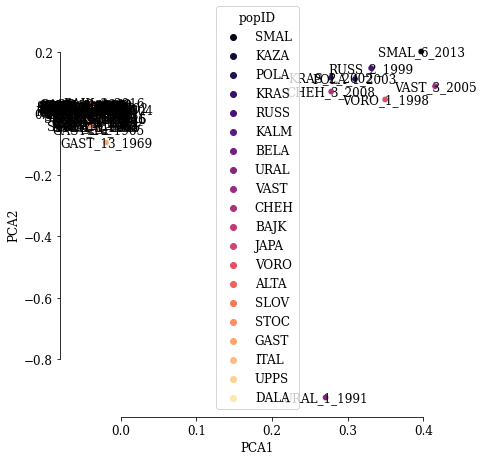

No handles with labels found to put in legend.


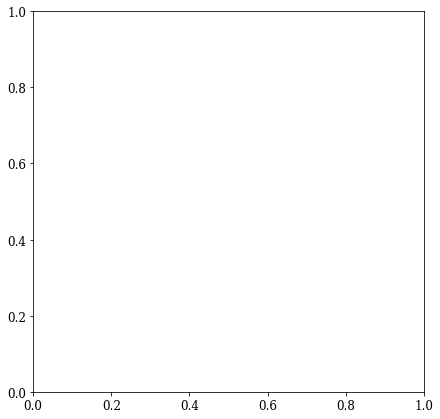

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatterplot
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette="magma")
sns.despine(offset=2, trim=True)
#plt.xlabel("PCA 1 (" + split_eigval[0] + "%)")
#plt.ylabel("PCA 2 (" + split_eigval[1] + "%)")

# Add text labels
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Save the scatterplot
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf", bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png", bbox_inches="tight")
plt.show()

# Create a separate legend plot
legend = plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/legend.pdf", bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/legend.png", bbox_inches="tight")

# Show the scatterplot
plt.show()

# Extras

In [98]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

Location   SampleID                 pop popID              FullID  \
0       Ethiopia     14L679     Ethiopia_14L679  SHEA     Ethiopia_14L679   
1       Ethiopia     14L834     Ethiopia_14L834  SHEA     Ethiopia_14L834   
2       Ethiopia     14L847     Ethiopia_14L847  SHEA     Ethiopia_14L847   
3       Ethiopia     14L879     Ethiopia_14L879  SHEA     Ethiopia_14L879   
4       Ethiopia     14L880     Ethiopia_14L880  SHEA     Ethiopia_14L880   
5       Ethiopia     14L881     Ethiopia_14L881  SHEA     Ethiopia_14L881   
6       Ethiopia     14L882     Ethiopia_14L882  SHEA     Ethiopia_14L882   
7       Ethiopia     14L883     Ethiopia_14L883  SHEA     Ethiopia_14L883   
8       Ethiopia     14L884     Ethiopia_14L884  SHEA     Ethiopia_14L884   
9       Ethiopia     14L885     Ethiopia_14L885  SHEA     Ethiopia_14L885   
10      Ethiopia     14L886     Ethiopia_14L886  SHEA     Ethiopia_14L886   
11      Ethiopia     14L887     Ethiopia_14L887  SHEA     Ethiopia_14L887   
12      Ethiopia     14L888     Ethiopia_14L888  SHEA     Ethiopia_14L888   
13      Ethiopia     14L889     Ethiopia_14L889  SHEA     Ethiopia_14L889   
14      Ethiopia     14L890     Ethiopia_14L890  SHEA     Ethiopia_14L890   
15      Ethiopia     14L891     Ethiopia_14L891  SHEA     Ethiopia_14L891   
16      Ethiopia     14L892     Ethiopia_14L892  SHEA     Ethiopia_14L892   
17      Ethiopia     14L894     Ethiopia_14L894  SHEA     Ethiopia_14L894   
18      Ethiopia     14L895     Ethiopia_14L895  SHEA     Ethiopia_14L895   
19         Kenya     16E222        Kenya_16E222  SHEA        Kenya_16E222   
20         Kenya     16E223        Kenya_16E223  SHEA        Kenya_16E223   
21         Kenya     16E224        Kenya_16E224  SHEA        Kenya_16E224   
22         Kenya     16E225        Kenya_16E225  SHEA        Kenya_16E225   
23         Kenya     16E251        Kenya_16E251  SHEA        Kenya_16E251   
24         Kenya  DJM07A185     Kenya_DJM07A185  SHEA     Kenya_DJM07A185   
25         Kenya  DJM07A191     Kenya_DJM07A191  SHEA     Kenya_DJM07A191   
26      Tanzania     14K873     Tanzania_14K873  SHEA     Tanzania_14K873   
27      Tanzania     14K880     Tanzania_14K880  SHEA     Tanzania_14K880   
28      Tanzania     14K887     Tanzania_14K887  SHEA     Tanzania_14K887   
29      Tanzania     14K907     Tanzania_14K907  SHEA     Tanzania_14K907   
..           ...        ...                 ...   ...                 ...   
317        Spain     13S259        Spain_13S259   NHE        Spain_13S259   
318        Spain     13S390        Spain_13S390   NHE        Spain_13S390   
319        Spain     14K196        Spain_14K196   NHE        Spain_14K196   
320        Spain     15D678        Spain_15D678   NHE        Spain_15D678   
321        Spain     15D930        Spain_15D930   NHE        Spain_15D930   
322        Spain     16D104        Spain_16D104   NHE        Spain_16D104   
323        Spain     16D185        Spain_16D185   NHE        Spain_16D185   
324       Sweden     12Q564       Sweden_12Q564   NHE       Sweden_12Q564   
325       Sweden     14C065       Sweden_14C065   NHE       Sweden_14C065   
326       Sweden     16E210       Sweden_16E210   NHE       Sweden_16E210   
327       Sweden     16E211       Sweden_16E211   NHE       Sweden_16E211   
328       Sweden     16H700       Sweden_16H700   NHE       Sweden_16H700   
329  Switzerland     15H949  Switzerland_15H949   NHE  Switzerland_15H949   
330  Switzerland     16E549  Switzerland_16E549   NHE  Switzerland_16E549   
331  Switzerland     16E550  Switzerland_16E550   NHE  Switzerland_16E550   
332  Switzerland     16E551  Switzerland_16E551   NHE  Switzerland_16E551   
333  Switzerland     16E623  Switzerland_16E623   NHE  Switzerland_16E623   
334     Tenerife     16A390     Tenerife_16A390   NHE     Tenerife_16A390   
335      Tunisia     12N265      Tunisia_12N265   NHE      Tunisia_12N265   
336      Tunisia     12N266      Tunisia_12N266   NHE      Tunisia_12N266   
337 

In [2]:
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
sns.despine(offset=2, trim=True)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

NameError: name 'sns' is not defined

In [11]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['chrom','begin','end','repts']
df3 = df3.drop(labels=[171], axis=0)
df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df3

#df4= pd.concat([df3,df],axis=1)
#print(df4)
#df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
#df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
#df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
#df4 = df4.drop(labels=[347], axis=0)
#df4[100:150]

LR999924.1	200001	300000	66


chrom       begin       end  repts
0    LR999924.1         1.0    100000  181.0
1    LR999924.1    100001.0    200000  129.0
2    LR999924.1    200001.0    300000   66.0
3    LR999924.1    300001.0    400000   58.0
4    LR999924.1    400001.0    500000   80.0
5    LR999924.1    500001.0    600000   83.0
6    LR999924.1    600001.0    700000  126.0
7    LR999924.1    700001.0    800000  109.0
8    LR999924.1    800001.0    900000  110.0
9    LR999924.1    900001.0   1000000  135.0
10   LR999924.1   1000001.0   1100000  131.0
11   LR999924.1   1100001.0   1200000   99.0
12   LR999924.1   1200001.0   1300000  101.0
13   LR999924.1   1300001.0   1400000  151.0
14   LR999924.1   1400001.0   1500000  141.0
15   LR999924.1   1500001.0   1600000  178.0
16   LR999924.1   1600001.0   1700000  235.0
17   LR999924.1   1700001.0   1800000  192.0
18   LR999924.1   1800001.0   1900000  221.0
19   LR999924.1   1900001.0   2000000  205.0
20   LR999924.1   2000001.0   2100000  148.0
21   LR999924.1   2100001.0   2200000  137.0
22   LR999924.1   2200001.0   2300000  162.0
23   LR999924.1   2300001.0   2400000  148.0
24   LR999924.1   2400001.0   2500000  176.0
25   LR999924.1   2500001.0   2600000  131.0
26   LR999924.1   2600001.0   2700000  146.0
27   LR999924.1   2700001.0   2800000  184.0
28   LR999924.1   2800001.0   2900000  169.0
29   LR999924.1   2900001.0   3000000  154.0
..          ...         ...       ...    ...
141  LR999924.1  14100001.0  14200000  149.0
142  LR999924.1  14200001.0  14300000  107.0
143  LR999924.1  14300001.0  14400000  109.0
144  LR999924.1  14400001.0  14500000  115.0
145  LR999924.1  14500001.0  14600000  132.0
146  LR999924.1  14600001.0  14700000  138.0
147  LR999924.1  14700001.0  14800000  112.0
148  LR999924.1  14800001.0  14900000  105.0
149  LR999924.1  14900001.0  15000000   75.0
150  LR999924.1  15000001.0  15100000  116.0
151  LR999924.1  15100001.0  15200000  109.0
152  LR999924.1  15200001.0  15300000  126.0
153  LR999924.1  15300001.0  15400000  142.0
154  LR999924.1  15400001.0  15500000  131.0
155  LR999924.1  15500001.0  15600000  108.0
156  LR999924.1  15600001.0  15700000  122.0
157  LR999924.1  15700001.0  15800000  117.0
158  LR999924.1  15800001.0  15900000  124.0
159  LR999924.1  15900001.0  16000000  183.0
160  LR999924.1  16000001.0  16100000  145.0
161  LR999924.1  16100001.0  16200000  160.0
162  LR999924.1  16200001.0  16300000  134.0
163  LR999924.1  16300001.0  16400000  194.0
164  LR999924.1  16400001.0  16500000  127.0
165  LR999924.1  16500001.0  16600000  122.0
166  LR999924.1  16600001.0  16700000  120.0
167  LR999924.1  16700001.0  16800000   98.0
168  LR999924.1  16800000.0  16900000   81.0
169  LR999924.1  16900000.0  17000000   51.0
170  LR999924.1  17000000.0  17040296   34.0

[171 rows x 4 columns]

In [ ]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['chrom','begin','end','repts']
df3 = df3.drop(labels=[171], axis=0)
df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df3

Text(0,0.5,'Number of repeats')

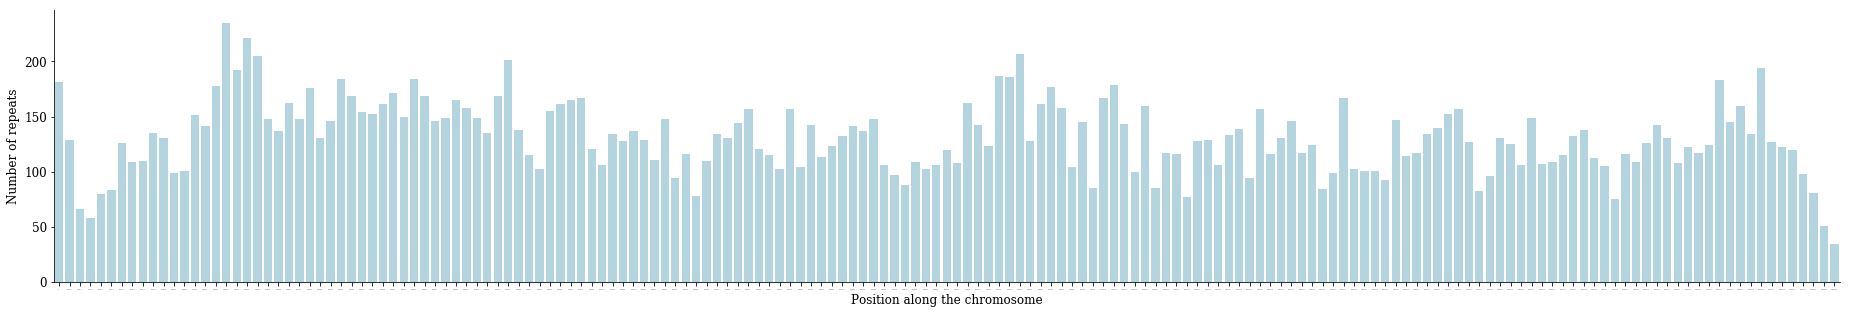

In [24]:
ml.rcParams['figure.figsize'] = (32, 5)
sns.barplot(x=df3["begin"], y=df3["repts"] , color='lightblue')
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=1)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the chromosome")
plt.ylabel("Number of repeats")
plt.show()



## Dataset 1: Variants w/o singletons and doubletons 

First, PCA analysis was preformed for the data with only necessary filtering to retain maximum coverage.
Short summary of filtering:
- Input file from Aurora: `cardui_migrdiv_indv.vcf.gz`
- Maximum missing % of individuals: 0.3
- Minor allele frequency cutoff fixed to 0.006: which correspond to removing singletons only in dataset of 347 individuals 
- Variant depth set to maximum possible: 4 (see justification in Evernote)


### Creating data frames

In [98]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

Location   SampleID                 pop popID              FullID  \
0       Ethiopia     14L679     Ethiopia_14L679  SHEA     Ethiopia_14L679   
1       Ethiopia     14L834     Ethiopia_14L834  SHEA     Ethiopia_14L834   
2       Ethiopia     14L847     Ethiopia_14L847  SHEA     Ethiopia_14L847   
3       Ethiopia     14L879     Ethiopia_14L879  SHEA     Ethiopia_14L879   
4       Ethiopia     14L880     Ethiopia_14L880  SHEA     Ethiopia_14L880   
5       Ethiopia     14L881     Ethiopia_14L881  SHEA     Ethiopia_14L881   
6       Ethiopia     14L882     Ethiopia_14L882  SHEA     Ethiopia_14L882   
7       Ethiopia     14L883     Ethiopia_14L883  SHEA     Ethiopia_14L883   
8       Ethiopia     14L884     Ethiopia_14L884  SHEA     Ethiopia_14L884   
9       Ethiopia     14L885     Ethiopia_14L885  SHEA     Ethiopia_14L885   
10      Ethiopia     14L886     Ethiopia_14L886  SHEA     Ethiopia_14L886   
11      Ethiopia     14L887     Ethiopia_14L887  SHEA     Ethiopia_14L887   
12      Ethiopia     14L888     Ethiopia_14L888  SHEA     Ethiopia_14L888   
13      Ethiopia     14L889     Ethiopia_14L889  SHEA     Ethiopia_14L889   
14      Ethiopia     14L890     Ethiopia_14L890  SHEA     Ethiopia_14L890   
15      Ethiopia     14L891     Ethiopia_14L891  SHEA     Ethiopia_14L891   
16      Ethiopia     14L892     Ethiopia_14L892  SHEA     Ethiopia_14L892   
17      Ethiopia     14L894     Ethiopia_14L894  SHEA     Ethiopia_14L894   
18      Ethiopia     14L895     Ethiopia_14L895  SHEA     Ethiopia_14L895   
19         Kenya     16E222        Kenya_16E222  SHEA        Kenya_16E222   
20         Kenya     16E223        Kenya_16E223  SHEA        Kenya_16E223   
21         Kenya     16E224        Kenya_16E224  SHEA        Kenya_16E224   
22         Kenya     16E225        Kenya_16E225  SHEA        Kenya_16E225   
23         Kenya     16E251        Kenya_16E251  SHEA        Kenya_16E251   
24         Kenya  DJM07A185     Kenya_DJM07A185  SHEA     Kenya_DJM07A185   
25         Kenya  DJM07A191     Kenya_DJM07A191  SHEA     Kenya_DJM07A191   
26      Tanzania     14K873     Tanzania_14K873  SHEA     Tanzania_14K873   
27      Tanzania     14K880     Tanzania_14K880  SHEA     Tanzania_14K880   
28      Tanzania     14K887     Tanzania_14K887  SHEA     Tanzania_14K887   
29      Tanzania     14K907     Tanzania_14K907  SHEA     Tanzania_14K907   
..           ...        ...                 ...   ...                 ...   
317        Spain     13S259        Spain_13S259   NHE        Spain_13S259   
318        Spain     13S390        Spain_13S390   NHE        Spain_13S390   
319        Spain     14K196        Spain_14K196   NHE        Spain_14K196   
320        Spain     15D678        Spain_15D678   NHE        Spain_15D678   
321        Spain     15D930        Spain_15D930   NHE        Spain_15D930   
322        Spain     16D104        Spain_16D104   NHE        Spain_16D104   
323        Spain     16D185        Spain_16D185   NHE        Spain_16D185   
324       Sweden     12Q564       Sweden_12Q564   NHE       Sweden_12Q564   
325       Sweden     14C065       Sweden_14C065   NHE       Sweden_14C065   
326       Sweden     16E210       Sweden_16E210   NHE       Sweden_16E210   
327       Sweden     16E211       Sweden_16E211   NHE       Sweden_16E211   
328       Sweden     16H700       Sweden_16H700   NHE       Sweden_16H700   
329  Switzerland     15H949  Switzerland_15H949   NHE  Switzerland_15H949   
330  Switzerland     16E549  Switzerland_16E549   NHE  Switzerland_16E549   
331  Switzerland     16E550  Switzerland_16E550   NHE  Switzerland_16E550   
332  Switzerland     16E551  Switzerland_16E551   NHE  Switzerland_16E551   
333  Switzerland     16E623  Switzerland_16E623   NHE  Switzerland_16E623   
334     Tenerife     16A390     Tenerife_16A390   NHE     Tenerife_16A390   
335      Tunisia     12N265      Tunisia_12N265   NHE      Tunisia_12N265   
336      Tunisia     12N266      Tunisia_12N266   NHE      Tunisia_12N266   
337 

### Plotting

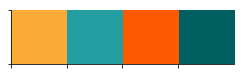

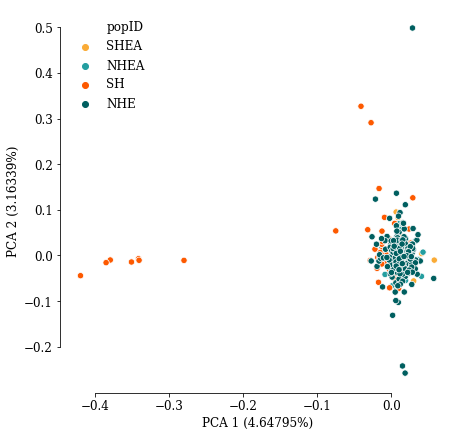

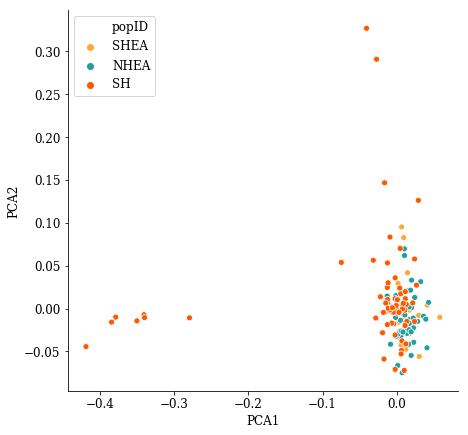

In [99]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()


df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
#plt.show()





#df

#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)

#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

## Dataset 1: Variants w/o singletons and doubletons, no LD

We observe distinct outliers in Southern Hemisphere, all belonging to Namibia sampling site. Such pattern, along with excessive grouping of other populations may be an effect of LD in the sample. Here we attempt to correct for LD, removing SNPs, where r^2>0.2 on 50Kb overlapping blocks (performed in plink).

### Creating data frames

In [5]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

Location   SampleID                 pop popID              FullID  \
0       Ethiopia     14L679     Ethiopia_14L679  SHEA     Ethiopia_14L679   
1       Ethiopia     14L834     Ethiopia_14L834  SHEA     Ethiopia_14L834   
2       Ethiopia     14L847     Ethiopia_14L847  SHEA     Ethiopia_14L847   
3       Ethiopia     14L879     Ethiopia_14L879  SHEA     Ethiopia_14L879   
4       Ethiopia     14L880     Ethiopia_14L880  SHEA     Ethiopia_14L880   
5       Ethiopia     14L881     Ethiopia_14L881  SHEA     Ethiopia_14L881   
6       Ethiopia     14L882     Ethiopia_14L882  SHEA     Ethiopia_14L882   
7       Ethiopia     14L883     Ethiopia_14L883  SHEA     Ethiopia_14L883   
8       Ethiopia     14L884     Ethiopia_14L884  SHEA     Ethiopia_14L884   
9       Ethiopia     14L885     Ethiopia_14L885  SHEA     Ethiopia_14L885   
10      Ethiopia     14L886     Ethiopia_14L886  SHEA     Ethiopia_14L886   
11      Ethiopia     14L887     Ethiopia_14L887  SHEA     Ethiopia_14L887   
12      Ethiopia     14L888     Ethiopia_14L888  SHEA     Ethiopia_14L888   
13      Ethiopia     14L889     Ethiopia_14L889  SHEA     Ethiopia_14L889   
14      Ethiopia     14L890     Ethiopia_14L890  SHEA     Ethiopia_14L890   
15      Ethiopia     14L891     Ethiopia_14L891  SHEA     Ethiopia_14L891   
16      Ethiopia     14L892     Ethiopia_14L892  SHEA     Ethiopia_14L892   
17      Ethiopia     14L894     Ethiopia_14L894  SHEA     Ethiopia_14L894   
18      Ethiopia     14L895     Ethiopia_14L895  SHEA     Ethiopia_14L895   
19         Kenya     16E222        Kenya_16E222  SHEA        Kenya_16E222   
20         Kenya     16E223        Kenya_16E223  SHEA        Kenya_16E223   
21         Kenya     16E224        Kenya_16E224  SHEA        Kenya_16E224   
22         Kenya     16E225        Kenya_16E225  SHEA        Kenya_16E225   
23         Kenya     16E251        Kenya_16E251  SHEA        Kenya_16E251   
24         Kenya  DJM07A185     Kenya_DJM07A185  SHEA     Kenya_DJM07A185   
25         Kenya  DJM07A191     Kenya_DJM07A191  SHEA     Kenya_DJM07A191   
26      Tanzania     14K873     Tanzania_14K873  SHEA     Tanzania_14K873   
27      Tanzania     14K880     Tanzania_14K880  SHEA     Tanzania_14K880   
28      Tanzania     14K887     Tanzania_14K887  SHEA     Tanzania_14K887   
29      Tanzania     14K907     Tanzania_14K907  SHEA     Tanzania_14K907   
..           ...        ...                 ...   ...                 ...   
317        Spain     13S259        Spain_13S259   NHE        Spain_13S259   
318        Spain     13S390        Spain_13S390   NHE        Spain_13S390   
319        Spain     14K196        Spain_14K196   NHE        Spain_14K196   
320        Spain     15D678        Spain_15D678   NHE        Spain_15D678   
321        Spain     15D930        Spain_15D930   NHE        Spain_15D930   
322        Spain     16D104        Spain_16D104   NHE        Spain_16D104   
323        Spain     16D185        Spain_16D185   NHE        Spain_16D185   
324       Sweden     12Q564       Sweden_12Q564   NHE       Sweden_12Q564   
325       Sweden     14C065       Sweden_14C065   NHE       Sweden_14C065   
326       Sweden     16E210       Sweden_16E210   NHE       Sweden_16E210   
327       Sweden     16E211       Sweden_16E211   NHE       Sweden_16E211   
328       Sweden     16H700       Sweden_16H700   NHE       Sweden_16H700   
329  Switzerland     15H949  Switzerland_15H949   NHE  Switzerland_15H949   
330  Switzerland     16E549  Switzerland_16E549   NHE  Switzerland_16E549   
331  Switzerland     16E550  Switzerland_16E550   NHE  Switzerland_16E550   
332  Switzerland     16E551  Switzerland_16E551   NHE  Switzerland_16E551   
333  Switzerland     16E623  Switzerland_16E623   NHE  Switzerland_16E623   
334     Tenerife     16A390     Tenerife_16A390   NHE     Tenerife_16A390   
335      Tunisia     12N265      Tunisia_12N265   NHE      Tunisia_12N265   
336      Tunisia     12N266      Tunisia_12N266   NHE      Tunisia_12N266   
337 

### Plotting

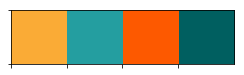

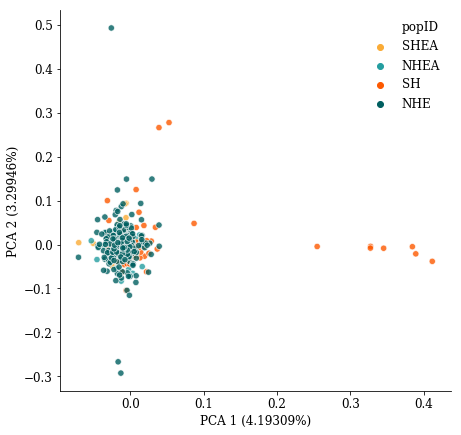

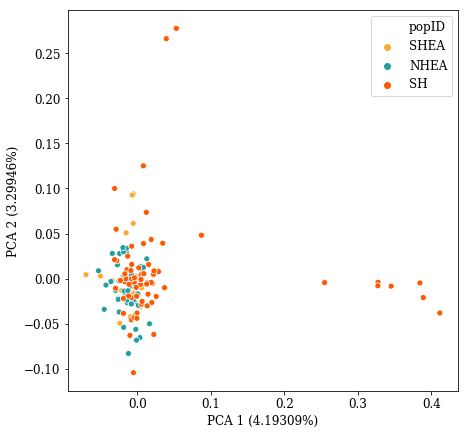

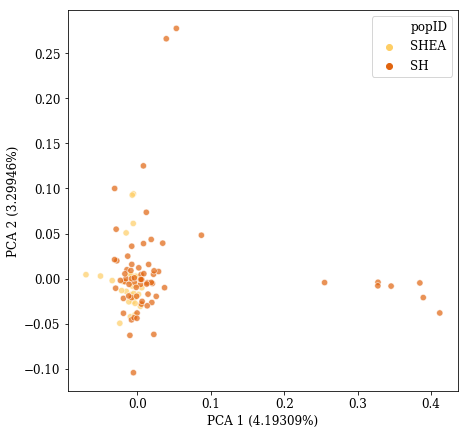

Text(0.5,0,'PCA 2 (3.29946%)')

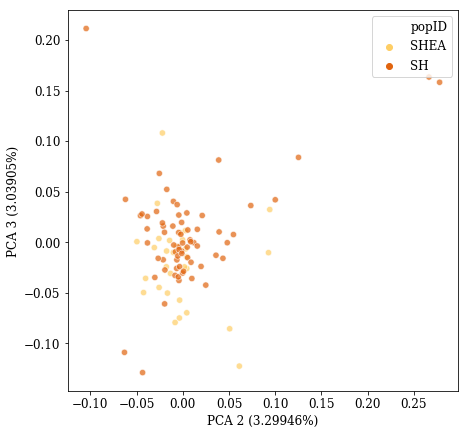

In [43]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
sns.palplot(sns.color_palette())
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.png",bbox_inches="tight")
plt.show()

df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#sns.despine(offset=0, trim=True)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.png",bbox_inches="tight")
plt.show()

#df["alpha"] = np.where(dfnor, 0, 1)
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
plt.show()
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA2'], y=data['PCA3'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 3 ("+ (split_eigval[2])+"%)")
plt.xlabel("PCA 2 ("+split_eigval[1]+"%)")
#sns.scatterplot(x=north['PCA1'], y=north['PCA2'], hue=north['popID'])
#north

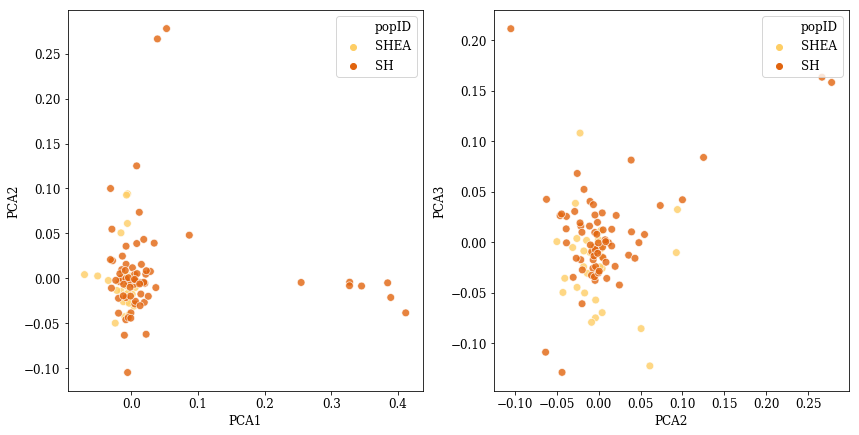

In [56]:
#fig_dims = (6, 6)
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.png",bbox_inches="tight")

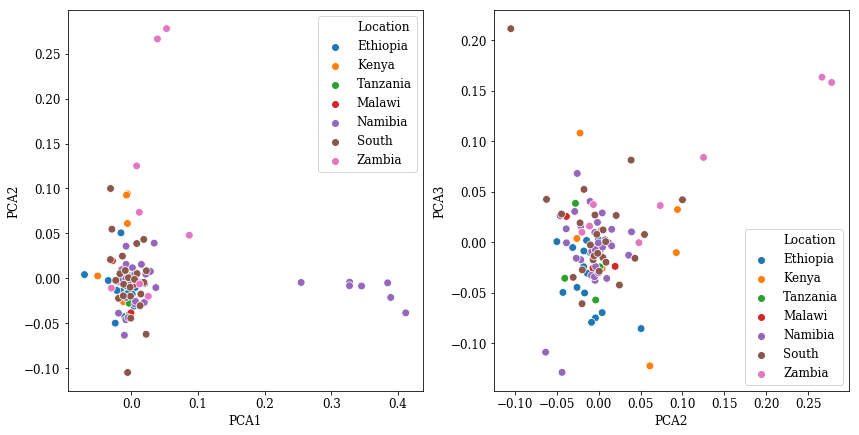

In [73]:
#fig_dims = (6, 6)
#sns.set_palette("muted")
 
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Location'],palette="tab10",s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['Location'], palette="tab10",s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.png",bbox_inches="tight")

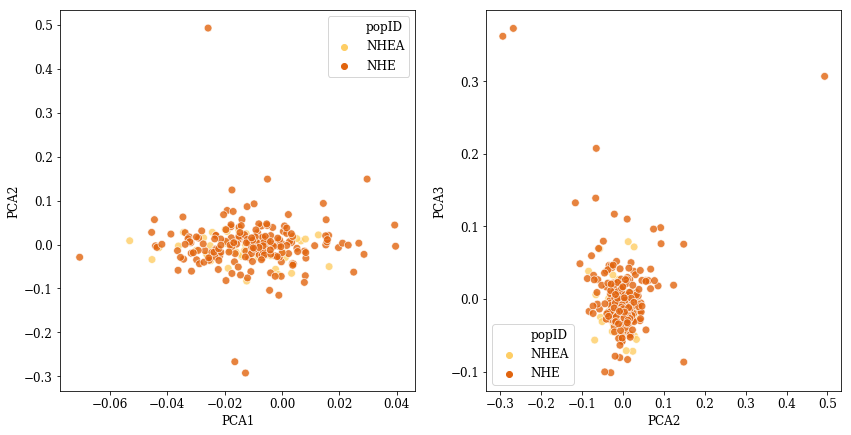

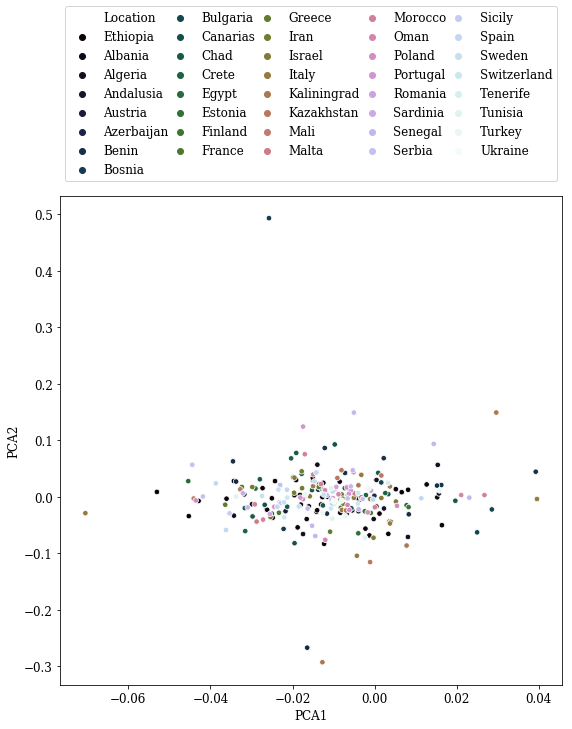

In [102]:
#fig_dims = (6, 6)
data_north=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]

ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.png",bbox_inches="tight") 
plt.show()
    
ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="cubehelix",s=30)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.png",bbox_inches="tight")

In [108]:
#data3=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]
df.loc[df["PCA2"] >= 0.2]
#174 158 249
df.loc[df["PCA2"] <= -0.15]

Location SampleID                 pop popID              FullID  \
158   Azerbaijan   14M918   Azerbaijan_14M918   NHE   Azerbaijan_14M918   
249  Kaliningrad   15O460  Kaliningrad_15O460   NHE  Kaliningrad_15O460   

         PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
158 -0.016421 -0.267026  0.372889 -0.080433 -0.220775  0.009525 -0.215330   
249 -0.012714 -0.292747  0.362053 -0.069919 -0.196652  0.090881 -0.103491   

         PCA8      PCA9  alpha  
158  0.161766 -0.033656      0  
249 -0.013407  0.040324      0

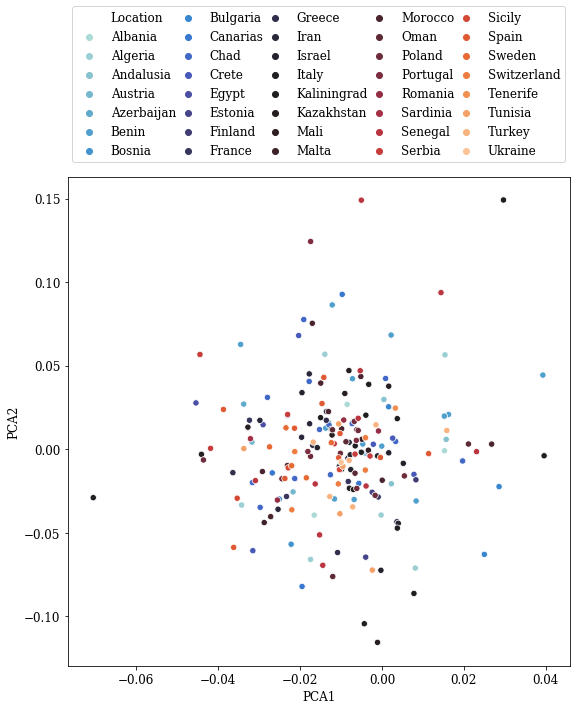

In [119]:
data = df.drop(labels=[174,158,249], axis=0)
data_north=data.loc[(data["popID"] == "NHE")]
data_north

ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="icefire",s=40)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.png",bbox_inches="tight")

## Dataset 2: Rare variants, no LD (Aurora)

Here we briefly check population structure based on rare variants (MAF: 0.001-0.010, MAC: 1-4)

### Creating data frames

In [120]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
#eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)


Location   SampleID                 pop popID              FullID  \
0       Ethiopia     14L679     Ethiopia_14L679  SHEA     Ethiopia_14L679   
1       Ethiopia     14L834     Ethiopia_14L834  SHEA     Ethiopia_14L834   
2       Ethiopia     14L847     Ethiopia_14L847  SHEA     Ethiopia_14L847   
3       Ethiopia     14L879     Ethiopia_14L879  SHEA     Ethiopia_14L879   
4       Ethiopia     14L880     Ethiopia_14L880  SHEA     Ethiopia_14L880   
5       Ethiopia     14L881     Ethiopia_14L881  SHEA     Ethiopia_14L881   
6       Ethiopia     14L882     Ethiopia_14L882  SHEA     Ethiopia_14L882   
7       Ethiopia     14L883     Ethiopia_14L883  SHEA     Ethiopia_14L883   
8       Ethiopia     14L884     Ethiopia_14L884  SHEA     Ethiopia_14L884   
9       Ethiopia     14L885     Ethiopia_14L885  SHEA     Ethiopia_14L885   
10      Ethiopia     14L886     Ethiopia_14L886  SHEA     Ethiopia_14L886   
11      Ethiopia     14L887     Ethiopia_14L887  SHEA     Ethiopia_14L887   
12      Ethiopia     14L888     Ethiopia_14L888  SHEA     Ethiopia_14L888   
13      Ethiopia     14L889     Ethiopia_14L889  SHEA     Ethiopia_14L889   
14      Ethiopia     14L890     Ethiopia_14L890  SHEA     Ethiopia_14L890   
15      Ethiopia     14L891     Ethiopia_14L891  SHEA     Ethiopia_14L891   
16      Ethiopia     14L892     Ethiopia_14L892  SHEA     Ethiopia_14L892   
17      Ethiopia     14L894     Ethiopia_14L894  SHEA     Ethiopia_14L894   
18      Ethiopia     14L895     Ethiopia_14L895  SHEA     Ethiopia_14L895   
19         Kenya     16E222        Kenya_16E222  SHEA        Kenya_16E222   
20         Kenya     16E223        Kenya_16E223  SHEA        Kenya_16E223   
21         Kenya     16E224        Kenya_16E224  SHEA        Kenya_16E224   
22         Kenya     16E225        Kenya_16E225  SHEA        Kenya_16E225   
23         Kenya     16E251        Kenya_16E251  SHEA        Kenya_16E251   
24         Kenya  DJM07A185     Kenya_DJM07A185  SHEA     Kenya_DJM07A185   
25         Kenya  DJM07A191     Kenya_DJM07A191  SHEA     Kenya_DJM07A191   
26      Tanzania     14K873     Tanzania_14K873  SHEA     Tanzania_14K873   
27      Tanzania     14K880     Tanzania_14K880  SHEA     Tanzania_14K880   
28      Tanzania     14K887     Tanzania_14K887  SHEA     Tanzania_14K887   
29      Tanzania     14K907     Tanzania_14K907  SHEA     Tanzania_14K907   
..           ...        ...                 ...   ...                 ...   
317        Spain     13S259        Spain_13S259   NHE        Spain_13S259   
318        Spain     13S390        Spain_13S390   NHE        Spain_13S390   
319        Spain     14K196        Spain_14K196   NHE        Spain_14K196   
320        Spain     15D678        Spain_15D678   NHE        Spain_15D678   
321        Spain     15D930        Spain_15D930   NHE        Spain_15D930   
322        Spain     16D104        Spain_16D104   NHE        Spain_16D104   
323        Spain     16D185        Spain_16D185   NHE        Spain_16D185   
324       Sweden     12Q564       Sweden_12Q564   NHE       Sweden_12Q564   
325       Sweden     14C065       Sweden_14C065   NHE       Sweden_14C065   
326       Sweden     16E210       Sweden_16E210   NHE       Sweden_16E210   
327       Sweden     16E211       Sweden_16E211   NHE       Sweden_16E211   
328       Sweden     16H700       Sweden_16H700   NHE       Sweden_16H700   
329  Switzerland     15H949  Switzerland_15H949   NHE  Switzerland_15H949   
330  Switzerland     16E549  Switzerland_16E549   NHE  Switzerland_16E549   
331  Switzerland     16E550  Switzerland_16E550   NHE  Switzerland_16E550   
332  Switzerland     16E551  Switzerland_16E551   NHE  Switzerland_16E551   
333  Switzerland     16E623  Switzerland_16E623   NHE  Switzerland_16E623   
334     Tenerife     16A390     Tenerife_16A390   NHE     Tenerife_16A390   
335      Tunisia     12N265      Tunisia_12N265   NHE      Tunisia_12N265   
336      Tunisia     12N266      Tunisia_12N266   NHE      Tunisia_12N266   
337 

### Plotting

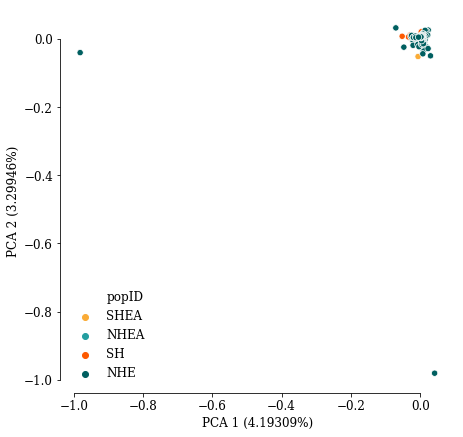

In [123]:
flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.png",bbox_inches="tight")
plt.show()

In [4]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
#dftmp2 =dftmp2.drop(dftmp2.columns[0], axis=1)
#dftmp2["hem"] = dftmp2['popID'] 
#dftmp2=dftmp2["hem"].str.split('H',expand=True)
#dftmp2 =dftmp2.drop(dftmp2.columns[1], axis=1)
#dftmp2.columns=["hem"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
#remove outliers
#df = df.drop(labels=[347,241,148], axis=0)
df[0:50]

Location   SampleID              pop popID           FullID      PCA1  \
0   Ethiopia     14L679  Ethiopia_14L679  SHEA  Ethiopia_14L679  0.002802   
1   Ethiopia     14L834  Ethiopia_14L834  SHEA  Ethiopia_14L834  0.002761   
2   Ethiopia     14L847  Ethiopia_14L847  SHEA  Ethiopia_14L847  0.003473   
3   Ethiopia     14L879  Ethiopia_14L879  SHEA  Ethiopia_14L879  0.004469   
4   Ethiopia     14L880  Ethiopia_14L880  SHEA  Ethiopia_14L880  0.004953   
5   Ethiopia     14L881  Ethiopia_14L881  SHEA  Ethiopia_14L881  0.001845   
6   Ethiopia     14L882  Ethiopia_14L882  SHEA  Ethiopia_14L882  0.004616   
7   Ethiopia     14L883  Ethiopia_14L883  SHEA  Ethiopia_14L883  0.001977   
8   Ethiopia     14L884  Ethiopia_14L884  SHEA  Ethiopia_14L884  0.006280   
9   Ethiopia     14L885  Ethiopia_14L885  SHEA  Ethiopia_14L885  0.002480   
10  Ethiopia     14L886  Ethiopia_14L886  SHEA  Ethiopia_14L886  0.002644   
11  Ethiopia     14L887  Ethiopia_14L887  SHEA  Ethiopia_14L887  0.003003   
12  Ethiopia     14L888  Ethiopia_14L888  SHEA  Ethiopia_14L888  0.000175   
13  Ethiopia     14L889  Ethiopia_14L889  SHEA  Ethiopia_14L889 -0.011826   
14  Ethiopia     14L890  Ethiopia_14L890  SHEA  Ethiopia_14L890  0.003324   
15  Ethiopia     14L891  Ethiopia_14L891  SHEA  Ethiopia_14L891  0.005389   
16  Ethiopia     14L892  Ethiopia_14L892  SHEA  Ethiopia_14L892  0.006842   
17  Ethiopia     14L894  Ethiopia_14L894  SHEA  Ethiopia_14L894  0.006575   
18  Ethiopia     14L895  Ethiopia_14L895  SHEA  Ethiopia_14L895  0.005473   
19     Kenya     16E222     Kenya_16E222  SHEA     Kenya_16E222  0.004310   
20     Kenya     16E223     Kenya_16E223  SHEA     Kenya_16E223  0.004715   
21     Kenya     16E224     Kenya_16E224  SHEA     Kenya_16E224  0.004664   
22     Kenya     16E225     Kenya_16E225  SHEA     Kenya_16E225  0.010083   
23     Kenya     16E251     Kenya_16E251  SHEA     Kenya_16E251  0.009329   
24     Kenya  DJM07A185  Kenya_DJM07A185  SHEA  Kenya_DJM07A185  0.002233   
25     Kenya  DJM07A191  Kenya_DJM07A191  SHEA  Kenya_DJM07A191  0.001450   
26  Tanzania     14K873  Tanzania_14K873  SHEA  Tanzania_14K873 -0.010262   
27  Tanzania     14K880  Tanzania_14K880  SHEA  Tanzania_14K880  0.004692   
28  Tanzania     14K887  Tanzania_14K887  SHEA  Tanzania_14K887 -0.006156   
29  Tanzania     14K907  Tanzania_14K907  SHEA  Tanzania_14K907  0.007586   
30  Ethiopia     14L359  Ethiopia_14L359  NHEA  Ethiopia_14L359  0.001844   
31  Ethiopia     14L373  Ethiopia_14L373  NHEA  Ethiopia_14L373  0.004297   
32  Ethiopia     14U082  Ethiopia_14U082  NHEA  Ethiopia_14U082  0.001855   
33  Ethiopia     14U087  Ethiopia_14U087  NHEA  Ethiopia_14U087  0.006104   
34  Ethiopia     14U096  Ethiopia_14U096  NHEA  Ethiopia_14U096  0.007302   
35  Ethiopia     14U104  Ethiopia_14U104  NHEA  Ethiopia_14U104  0.004694   
36  Ethiopia     14U125  Ethiopia_14U125  NHEA  Ethiopia_14U125  0.003253   
37  Ethiopia     14U142  Ethiopia_14U142  NHEA  Ethiopia_14U142  0.004233   
38  Ethiopia     14U144  Ethiopia_14U144  NHEA  Ethiopia_14U144  0.003056   
39  Ethiopia     14U149  Ethiopia_14U149  NHEA  Ethiopia_14U149  0.004903   
40  Ethiopia     14U193  Ethiopia_14U193  NHEA  Ethiopia_14U193  0.004900   
41  Ethiopia     14U199  Ethiopia_14U199  NHEA  Ethiopia_14U199  0.005736   
42  Ethiopia     14U200  Ethiopia_14U200  NHEA  Ethiopia_14U200  0.003390   
43  Ethiopia     14U286  Ethiopia_14U286  NHEA  Ethiopia_14U286  0.004420   
44  Ethiopia     14U287  Ethiopia_14U287  NHEA  Ethiopia_14U287  0.001662   
45  Ethiopia     14U289  Ethiopia_14U289  NHEA  Ethiopia_14U289 -0.015788   
46  Ethiopia     14U290  Ethiopia_14U290  NHEA  Ethiopia_14U290  0.004057   
47  Ethiopia     14U291  Ethiopia_14U291  NHEA  Ethiopia_14U291  0.003335   
48  Ethiopia     14U296  Ethiopia_14U296  NHEA  Ethiopia_14U296  0.004487   
49  Ethiopia     14U297  Ethiopia_14U297  NHEA  Ethiopia_14U297  0.006873   

        PCA2      PCA3          PCA4          PCA5          PCA6         PCA

1.96112


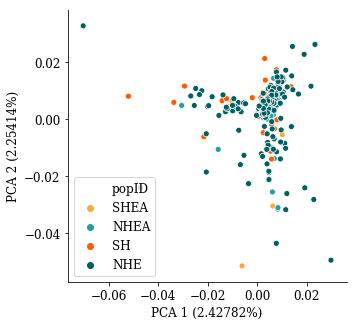

In [132]:
#print(df['loc'])
#df = df.drop(labels=[241,148], axis=0)
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'])#,palette="dark")
#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
#plt.legend(loc='center left') #mode="expand") #loc='center left', bbox_to_anchor=(1, 0.5),
           #ncol=2, mode="expand", borderaxespad=0.4)
plt.legend(loc='lower left')#, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(bbox_to_anchor=(0., 1.0, 1., .102), loc='lower left') #,
          #ncol=2, mode="expand", borderaxespad=0.4)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
#plt.legend([])
#plt.legend('',frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

In [145]:
#Check outliers

#df['PCA1'].max()
print(df['PCA1'].idxmin(axis = 0))
print(df['PCA2'].idxmin(axis = 0))

241
148


## Dataset 3

In [6]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

Location   SampleID                 pop popID              FullID  \
0       Ethiopia     14L679     Ethiopia_14L679  SHEA     Ethiopia_14L679   
1       Ethiopia     14L834     Ethiopia_14L834  SHEA     Ethiopia_14L834   
2       Ethiopia     14L847     Ethiopia_14L847  SHEA     Ethiopia_14L847   
3       Ethiopia     14L879     Ethiopia_14L879  SHEA     Ethiopia_14L879   
4       Ethiopia     14L880     Ethiopia_14L880  SHEA     Ethiopia_14L880   
5       Ethiopia     14L881     Ethiopia_14L881  SHEA     Ethiopia_14L881   
6       Ethiopia     14L882     Ethiopia_14L882  SHEA     Ethiopia_14L882   
7       Ethiopia     14L883     Ethiopia_14L883  SHEA     Ethiopia_14L883   
8       Ethiopia     14L884     Ethiopia_14L884  SHEA     Ethiopia_14L884   
9       Ethiopia     14L885     Ethiopia_14L885  SHEA     Ethiopia_14L885   
10      Ethiopia     14L886     Ethiopia_14L886  SHEA     Ethiopia_14L886   
11      Ethiopia     14L887     Ethiopia_14L887  SHEA     Ethiopia_14L887   
12      Ethiopia     14L888     Ethiopia_14L888  SHEA     Ethiopia_14L888   
13      Ethiopia     14L889     Ethiopia_14L889  SHEA     Ethiopia_14L889   
14      Ethiopia     14L890     Ethiopia_14L890  SHEA     Ethiopia_14L890   
15      Ethiopia     14L891     Ethiopia_14L891  SHEA     Ethiopia_14L891   
16      Ethiopia     14L892     Ethiopia_14L892  SHEA     Ethiopia_14L892   
17      Ethiopia     14L894     Ethiopia_14L894  SHEA     Ethiopia_14L894   
18      Ethiopia     14L895     Ethiopia_14L895  SHEA     Ethiopia_14L895   
19         Kenya     16E222        Kenya_16E222  SHEA        Kenya_16E222   
20         Kenya     16E223        Kenya_16E223  SHEA        Kenya_16E223   
21         Kenya     16E224        Kenya_16E224  SHEA        Kenya_16E224   
22         Kenya     16E225        Kenya_16E225  SHEA        Kenya_16E225   
23         Kenya     16E251        Kenya_16E251  SHEA        Kenya_16E251   
24         Kenya  DJM07A185     Kenya_DJM07A185  SHEA     Kenya_DJM07A185   
25         Kenya  DJM07A191     Kenya_DJM07A191  SHEA     Kenya_DJM07A191   
26      Tanzania     14K873     Tanzania_14K873  SHEA     Tanzania_14K873   
27      Tanzania     14K880     Tanzania_14K880  SHEA     Tanzania_14K880   
28      Tanzania     14K887     Tanzania_14K887  SHEA     Tanzania_14K887   
29      Tanzania     14K907     Tanzania_14K907  SHEA     Tanzania_14K907   
..           ...        ...                 ...   ...                 ...   
317        Spain     13S259        Spain_13S259   NHE        Spain_13S259   
318        Spain     13S390        Spain_13S390   NHE        Spain_13S390   
319        Spain     14K196        Spain_14K196   NHE        Spain_14K196   
320        Spain     15D678        Spain_15D678   NHE        Spain_15D678   
321        Spain     15D930        Spain_15D930   NHE        Spain_15D930   
322        Spain     16D104        Spain_16D104   NHE        Spain_16D104   
323        Spain     16D185        Spain_16D185   NHE        Spain_16D185   
324       Sweden     12Q564       Sweden_12Q564   NHE       Sweden_12Q564   
325       Sweden     14C065       Sweden_14C065   NHE       Sweden_14C065   
326       Sweden     16E210       Sweden_16E210   NHE       Sweden_16E210   
327       Sweden     16E211       Sweden_16E211   NHE       Sweden_16E211   
328       Sweden     16H700       Sweden_16H700   NHE       Sweden_16H700   
329  Switzerland     15H949  Switzerland_15H949   NHE  Switzerland_15H949   
330  Switzerland     16E549  Switzerland_16E549   NHE  Switzerland_16E549   
331  Switzerland     16E550  Switzerland_16E550   NHE  Switzerland_16E550   
332  Switzerland     16E551  Switzerland_16E551   NHE  Switzerland_16E551   
333  Switzerland     16E623  Switzerland_16E623   NHE  Switzerland_16E623   
334     Tenerife     16A390     Tenerife_16A390   NHE     Tenerife_16A390   
335      Tunisia     12N265      Tunisia_12N265   NHE      Tunisia_12N265   
336      Tunisia     12N266      Tunisia_12N266   NHE      Tunisia_12N266   
337 

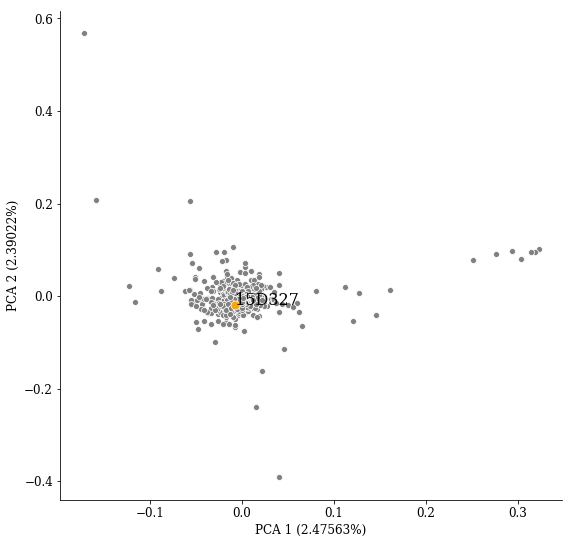

In [25]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
#sns.palplot(sns.color_palette())
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], color='grey')
sns.scatterplot(xout, yout, color='orange', s=80)#, hue=df['popID'], s=20,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (9.0, 9.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
#plt.text(df['PCA1'],df['PCA2'],"TOT", color='red')
plt.text(xout,yout,"15D327",size=16)#, color='red')
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.png",bbox_inches="tight")
plt.show()

In [15]:
#dot labler
xout=df['PCA1'][df["FullID"]=='Namibia_15D327']
yout=df['PCA2'][df["FullID"]=='Namibia_15D327']

## ADMIXTURE

In [3]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ADMIXTURE/cardui_migrdiv_indv_rarev_md25.2.Q").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['pop1','pop2']
df3

df4= pd.concat([df3,df],axis=1)
#print(df4)
df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
df4 = df4.drop(labels=[347], axis=0)
df4[100:150]

0.000010 0.999990


NameError: name 'df' is not defined

In [ ]:
ml.rcParams['figure.figsize'] = (32, 5)
#index = range(len(df4["FullID"]))
plt.bar(df4["FullID"],height=1)#,width=0.98)
#plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
#index = range(len(df4["FullID"]))
#plt.xticks(index, df4["FullID"])  # set the X ticks and labels
#sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=7)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("SHEA  SH   NHEA  NHE")
plt.ylabel("inferred allele frequences")

# show the graph
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v4.pdf",bbox_inches="tight")
#plt.show

In [ ]:
sns.barplot(x=df3[""], y=df4["pop1"], color='lightblue')

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# #print(df4)
# #df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# #df4.sort_values(by=["pop2"], inplace=True)
# df4.sort_values(["pop", "popID"])#, ascending = (False, True))
# #print(df)
# #df4 = df4.drop(labels=[347], axis=0)
# df4[167:190]

In [ ]:
# ml.rcParams['figure.figsize'] = (30, 5)
# #index = range(len(df4["FullID"]))
# plt.bar(df5["FullID"],height=1)#,width=0.98)
# #plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# #index = range(len(df4["FullID"]))
# #plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# sns.barplot(x=df5["FullID"], y=df5["pop1"], color='lightblue')
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=8)
# plt.rcParams['axes.spines.left'] = False
# #plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# #plt.rcParams['axes.spines.bottom'] = False
# plt.xlabel("")
# plt.ylabel("inferred allele frequences")
# index = range(len(df5["FullID"]))
# plt.xticks(index, df5["FullID"])

# # show the graph
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v5.pdf",bbox_inches="tight")
# plt.show

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# print(df4)
# df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# df4.sort_values(by=["pop2"], inplace=True)
# print(df4)
# #sns.axes_style("whitegrid")
# ml.rcParams['figure.figsize'] = (30, 5)
# plt.bar(df4["FullID"],height=1)#,width=0.98)
# plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# index = range(len(df4["FullID"]))
# plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #bar1 = sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# #bar2 = sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue',edgecolor="none")
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=6)
# #plt.rcParams['axes.spines.left'] = False
# plt.rcParams['axes.spines.right'] = False
# #plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.bottom'] = False

# #plt.show()  

# #plt.bar(df4["FullID"],height=1)

# #print(df4["pop1"])
# #tips = sns.load_dataset("tips")
# #tips
                         

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# #bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# # add legend
# #top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
# #bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
# #plt.legend(handles=[top_bar, bottom_bar])

# # show the graph
# #plt.show()
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_3.pdf",bbox_inches="tight")